### Poin-poin Assignment
1. Pilih Dataset House Price California (california_dataset.csv) atau dataset House Price (house_price.csv) Untuk kasus Regresi -> Pilih salah satu dataset saja (Wajib dikerjakan) : https://drive.google.com/drive/folders/19eH6N3Oj0byCYORqA0Zq90SunomYFuOe?usp=sharing
2. Jika ingin memilih dataset klasifikasi (dataset_1.csv) dengan kolom target bernama target, lakukan PCA dan bandingkan modelling tanpa PCA dan dengan PCA.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

#Model ML Regresi
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, Lasso
from sklearn.tree import DecisionTreeRegressor

#Evaluation Regresi -> tambahkan matrix yang lain jika dibutuhkan
from sklearn.metrics import mean_squared_error


#import model classification
from sklearn.linear_model import LogisticRegression #logistic regression
from sklearn.svm import SVC #SVM
from sklearn.naive_bayes import GaussianNB #Naive Bayes
from sklearn.neighbors import KNeighborsClassifier #KNN
#import for metrics evaluasi klasifikasi
from sklearn.metrics import precision_score, \
    recall_score, confusion_matrix, classification_report, \
    accuracy_score, f1_score, roc_auc_score
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay,classification_report,accuracy_score

In [2]:
# # california_dataset : Regresi

# df1 = pd.read_csv("california_dataset.csv")
# df1.shape

In [3]:
# # house_price : Regresi

# df1 = pd.read_csv("house_price.csv")
# df1.shape

In [4]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
# dataset_1 : Klasifikasi

df3 = pd.read_csv("/content/drive/MyDrive/Bootcamp/Day 13 - Case Study 3 PCA + Supervised Learning/dataset_1.csv")
df3.shape

(50000, 301)

### Assignment 1
Dari 3 dataset diatas, pilih salah satu saja
1. Pahami dataset yang dipilih dengan cek dataset menggunakan : info(), sample(5), head(), tail() dan melihat value counts di tiap-tiap kolom.

In [6]:
df3.head()

var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  var_10  ...  \
0      0      0    0.0   0.00    0.0      0      0      0      0       0  ...   
1      0      0    0.0   3.00    0.0      0      0      0      0       0  ...   
2      0      0    0.0   5.88    0.0      0      0      0      0       0  ...   
3      0      0    0.0  14.10    0.0      0      0      0      0       0  ...   
4      0      0    0.0   5.76    0.0      0      0      0      0       0  ...   

   var_292  var_293  var_294  var_295  var_296  var_297  var_298  var_299  \
0      0.0        0        0        0        0        0        0      0.0   
1      0.0        0        0        0        0        0        0      0.0   
2      0.0        0        0        3        0        0        0      0.0   
3      0.0        0        0        0        0        0        0      0.0   
4      0.0        0        0        0        0        0        0      0.0   

      var_300  target  
0      0.0000       0  
1      0.0000       0  
2  67772.7216       0  
3      0.0000       0  
4      0.0000       0  

[5 rows x 301 columns]

In [7]:
df3.sample(5)

var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  var_10  \
18293      0      0    0.0   2.94    0.0      0      0      0      0       0   
5192       0      0    0.0   0.00    0.0      0      0      0      0       0   
26331      0      0    0.0   2.85    0.0      0      0      0      0       0   
5743       0      0    0.0   2.91    0.0      0      0      0      0       0   
39459      0      0    0.0   0.00    0.0      0      0      0      0       0   

       ...  var_292  var_293  var_294  var_295  var_296  var_297  var_298  \
18293  ...      0.0        0        0        0        0        0        0   
5192   ...      0.0        0        0        0        0        0        0   
26331  ...      0.0        0        0        0        0        0        0   
5743   ...      0.0        0        0        0        0        0        0   
39459  ...      0.0        0        0        0        0        0        0   

       var_299  var_300  target  
18293      0.0      0.0       0  
5192       0.0      0.0       0  
26331      0.0      0.0       0  
5743       0.0      0.0       0  
39459      0.0      0.0       0  

[5 rows x 301 columns]

In [8]:
df3.tail()

var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  var_10  \
49995      0      0    0.0   2.85    0.0      0      0      0      0       0   
49996      0      0    0.0   2.91    0.0      0      0      0      0       0   
49997      0      0    0.0   8.46    0.0      0      0      0      0       0   
49998      0      0    0.0   2.76    0.0      0      0      0      0       0   
49999      0      0    0.0   5.64    0.0      0      0      0      0       0   

       ...  var_292  var_293  var_294  var_295  var_296  var_297  var_298  \
49995  ...     0.00        0        0        0        0        0        0   
49996  ...     0.00        0        0        0        0        0        0   
49997  ...     0.00        0        0        0        0        0        0   
49998  ...     0.00        0        0        0        0        0        0   
49999  ...     2.85        0        0        0        0        0        0   

       var_299  var_300  target  
49995      0.0      0.0       0  
49996      0.0      0.0       0  
49997      0.0      0.0       0  
49998      0.0      0.0       0  
49999      0.0      0.0       0  

[5 rows x 301 columns]

In [9]:
df3.describe()

var_1         var_2          var_3         var_4          var_5  \
count  50000.000000  50000.000000   50000.000000  50000.000000   50000.000000   
mean       0.002220      0.000060      15.593002      3.149633     608.681764   
std        0.108145      0.007746    1280.571855      2.740114   10951.361737   
min        0.000000      0.000000       0.000000      0.000000       0.000000   
25%        0.000000      0.000000       0.000000      0.000000       0.000000   
50%        0.000000      0.000000       0.000000      2.850000       0.000000   
75%        0.000000      0.000000       0.000000      3.000000       0.000000   
max        9.000000      1.000000  207901.336500     35.280000  445500.000000   

              var_6         var_7         var_8         var_9       var_10  \
count  5.000000e+04  50000.000000  50000.000000  50000.000000  50000.00000   
mean   4.000000e+03      0.000300      0.035040      0.000240      0.00018   
std    6.324492e+05      0.029999      0.322884      0.026832      0.03000   
min    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
25%    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
50%    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
75%    0.000000e+00      0.000000      0.000000      0.000000      0.00000   
max    1.000000e+08      3.000000      6.000000      3.000000      6.00000   

       ...       var_292       var_293  var_294       var_295       var_296  \
count  ...  50000.000000  50000.000000  50000.0  50000.000000  50000.000000   
mean   ...      0.085164      0.009900      0.0      0.127260      0.086880   
std    ...      1.148319      0.214016      0.0      0.607019      0.622398   
min    ...      0.000000      0.000000      0.0      0.000000      0.000000   
25%    ...      0.000000      0.000000      0.0      0.000000      0.000000   
50%    ...      0.000000      0.000000      0.0      0.000000      0.000000   
75%    ...      0.000000      0.000000      0.0      0.000000      0.000000   
max    ...     74.520000     12.000000      0.0      6.000000     33.000000   

       var_297       var_298        var_299       var_300        target  
count  50000.0  50000.000000   50000.000000  5.000000e+04  50000.000000  
mean       0.0      0.003060      12.462960  5.683960e+03      0.039820  
std        0.0      0.078808     832.417622  4.736482e+04      0.195538  
min        0.0      0.000000       0.000000  0.000000e+00      0.000000  
25%        0.0      0.000000       0.000000  0.000000e+00      0.000000  
50%        0.0      0.000000       0.000000  0.000000e+00      0.000000  
75%        0.0      0.000000       0.000000  0.000000e+00      0.000000  
max        0.0      3.000000  134666.681100  2.857673e+06      1.000000  

[8 rows x 301 columns]

In [10]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Columns: 301 entries, var_1 to target
dtypes: float64(127), int64(174)
memory usage: 114.8 MB


In [11]:
df3.target.value_counts() #variabel target (biner : 1 dan 0 -> klasifikasi)

0    48009
1     1991
Name: target, dtype: int64

### Assignment 2 : Lakukan EDA untuk kolom numerik dan kategorikal, silahkan anda eksplor.

#### Column Target

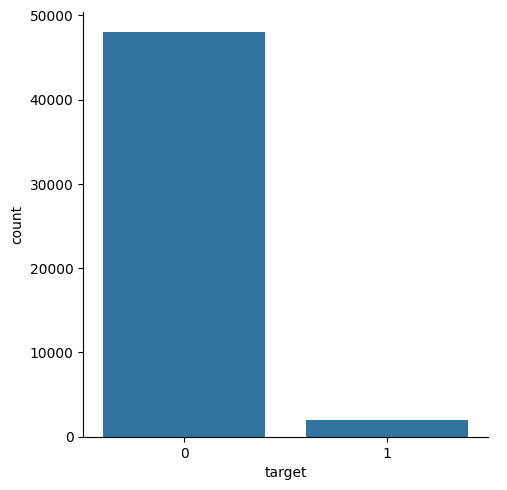

In [12]:
sns.catplot(x = "target", kind = "count", data = df3);

#### Column Numerical

In [13]:
features = list(df3.columns)
features

['var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91',
 'var_92

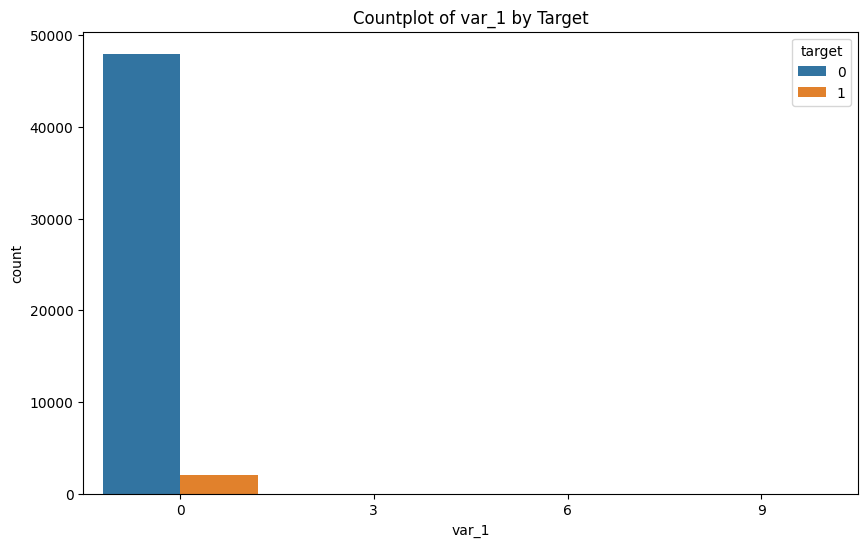

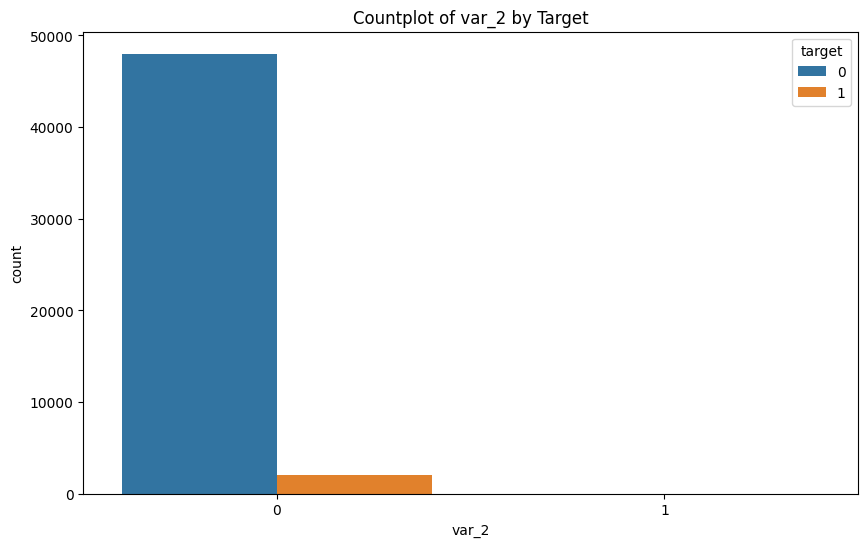

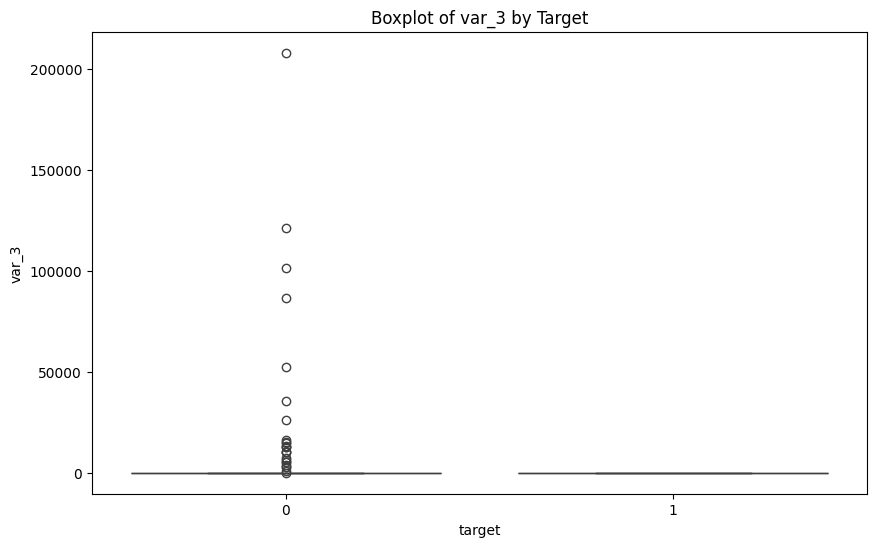

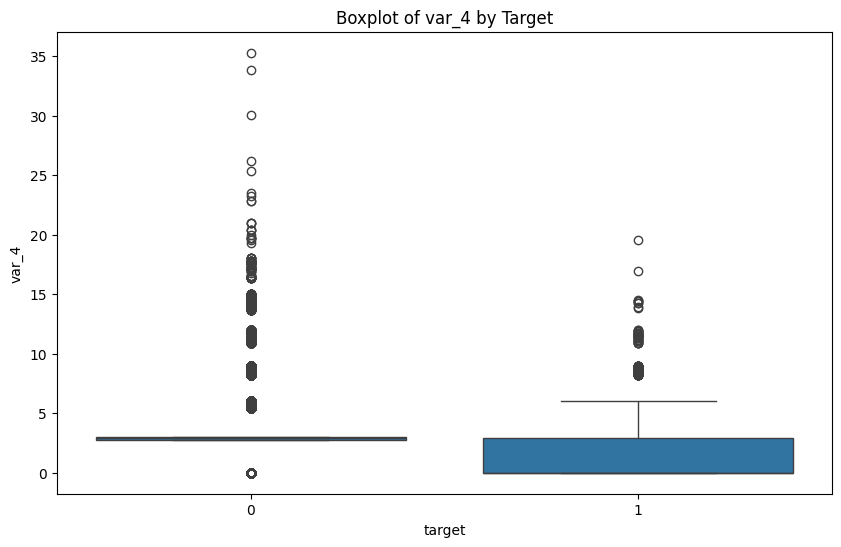

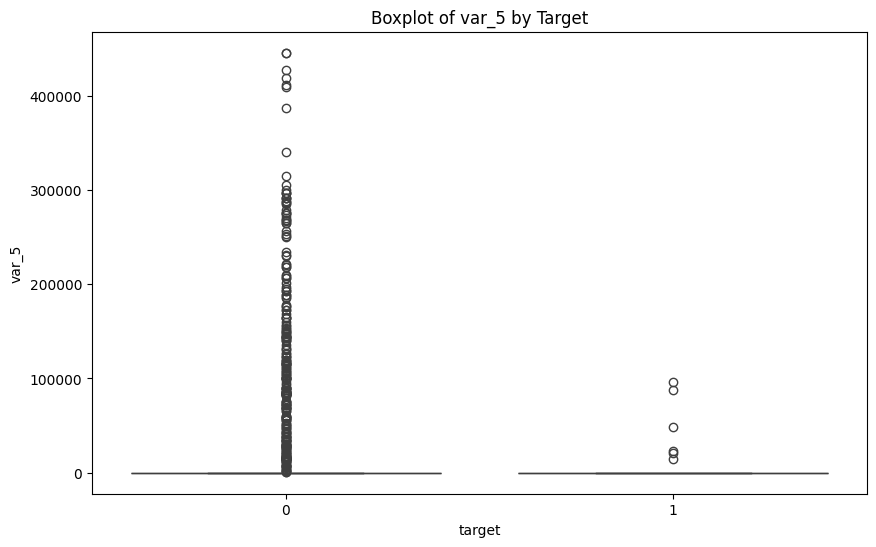

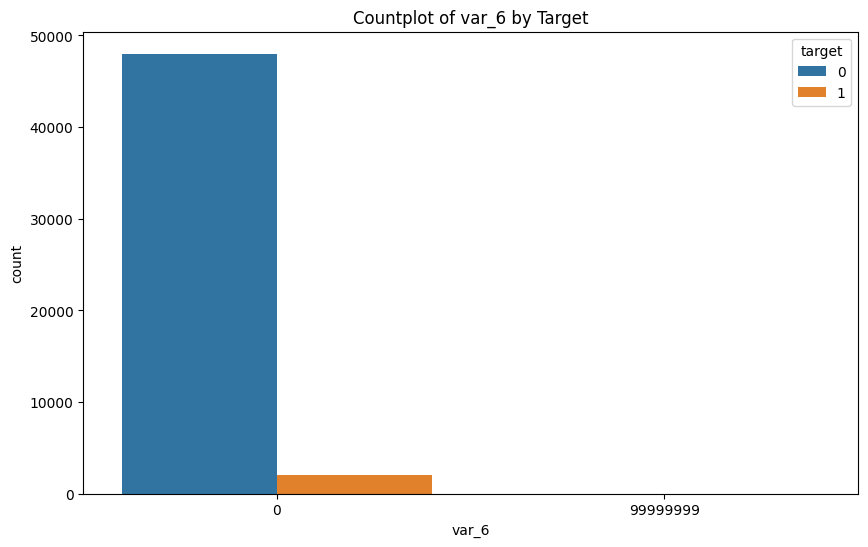

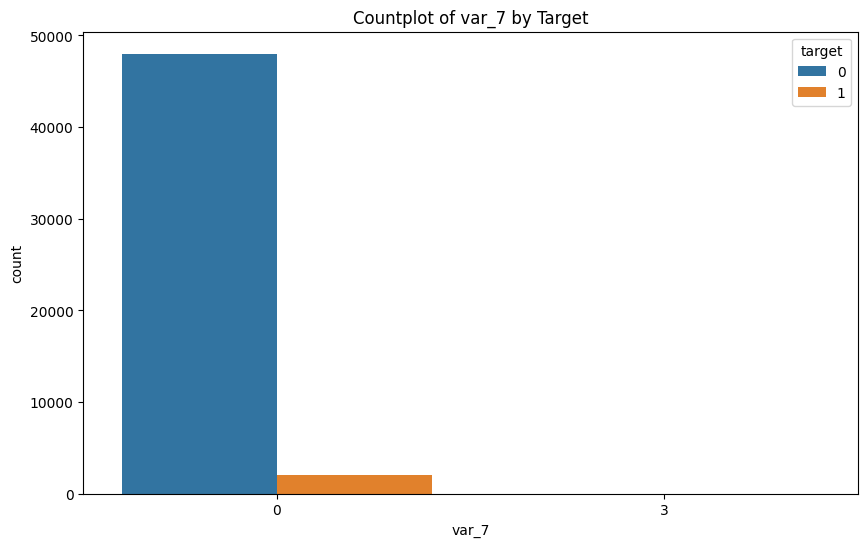

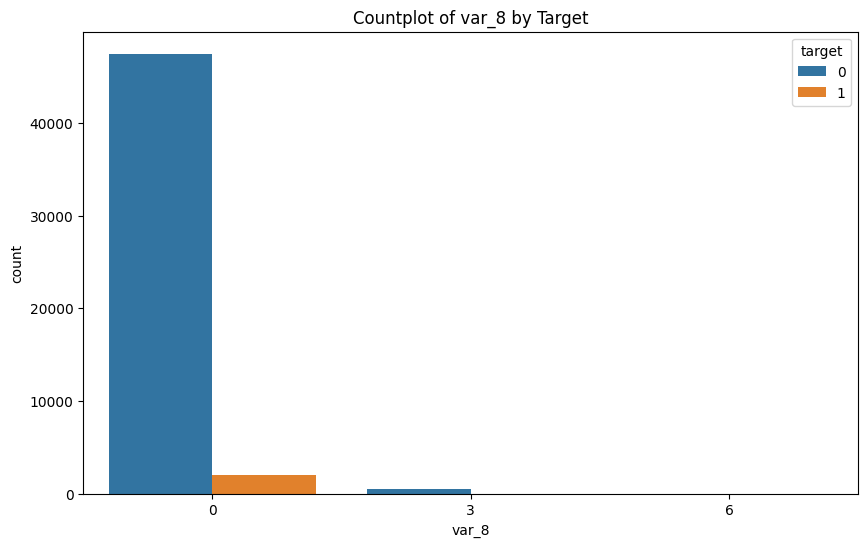

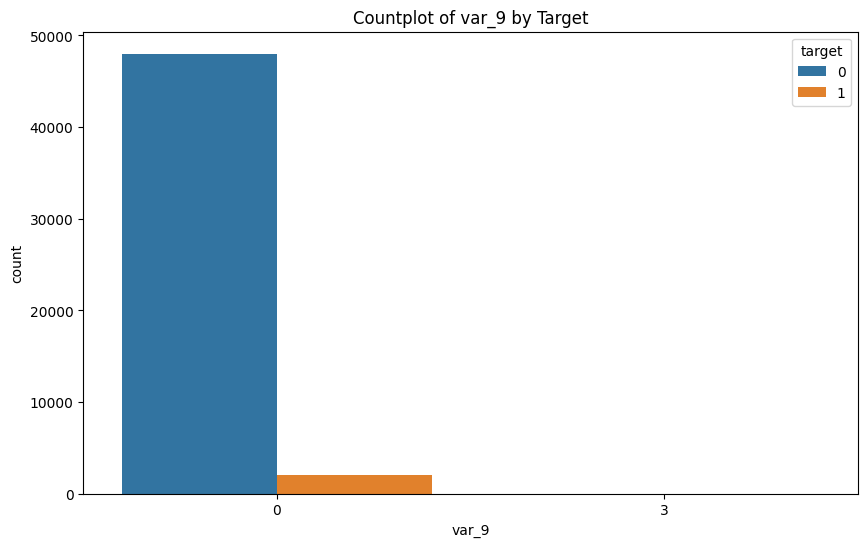

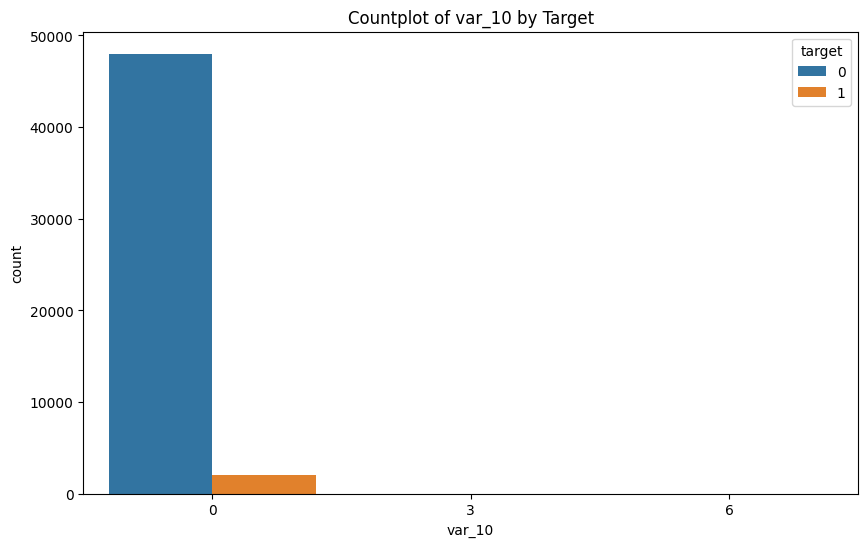

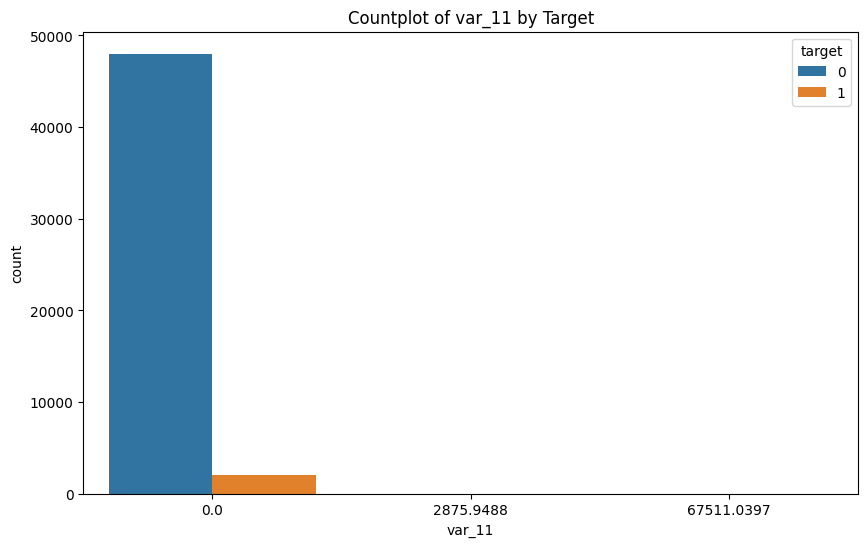

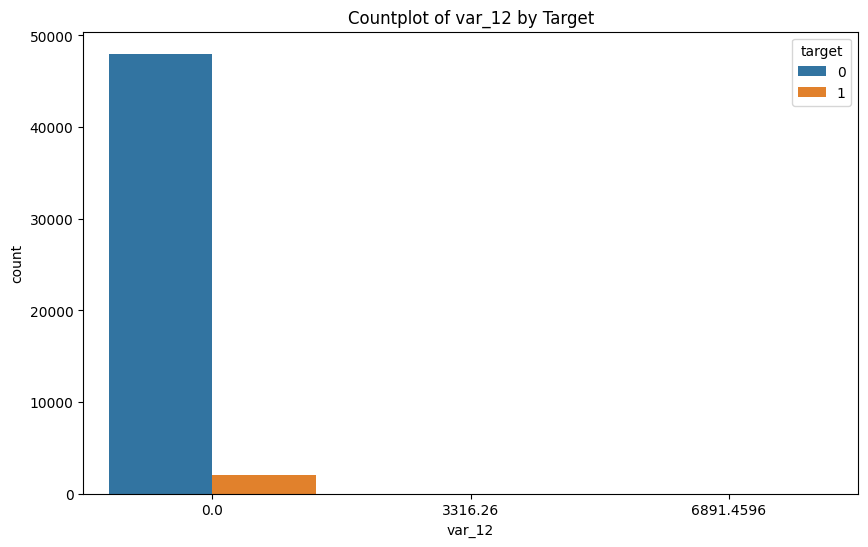

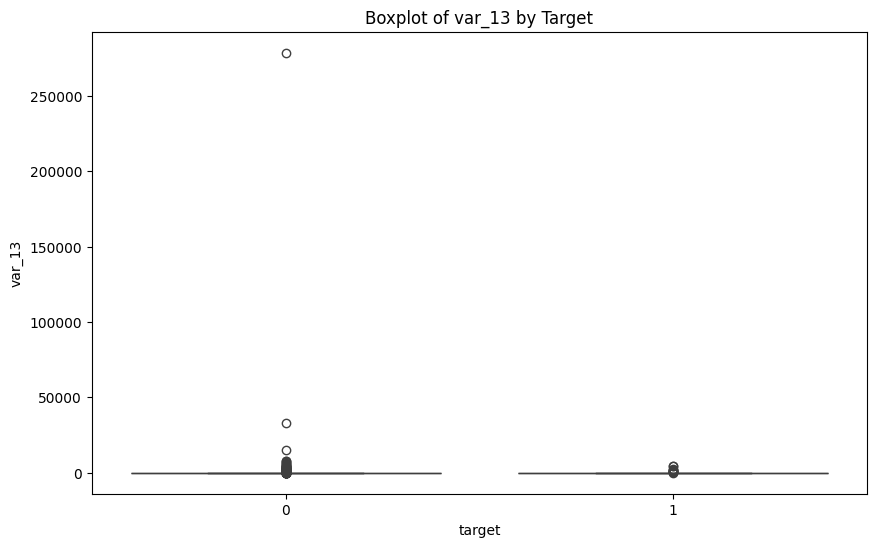

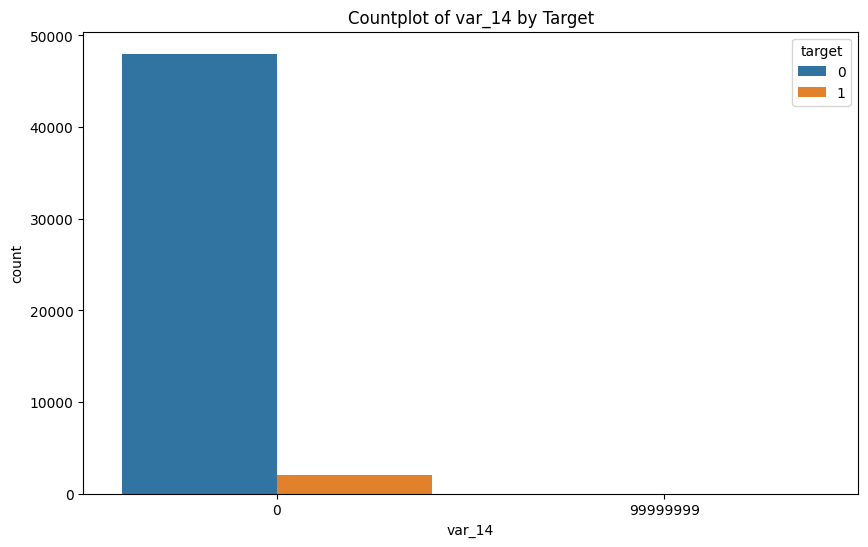

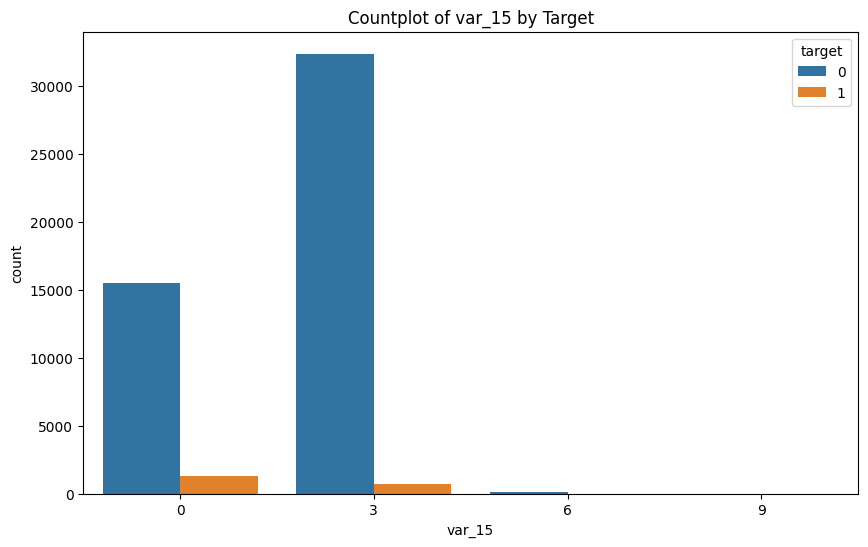

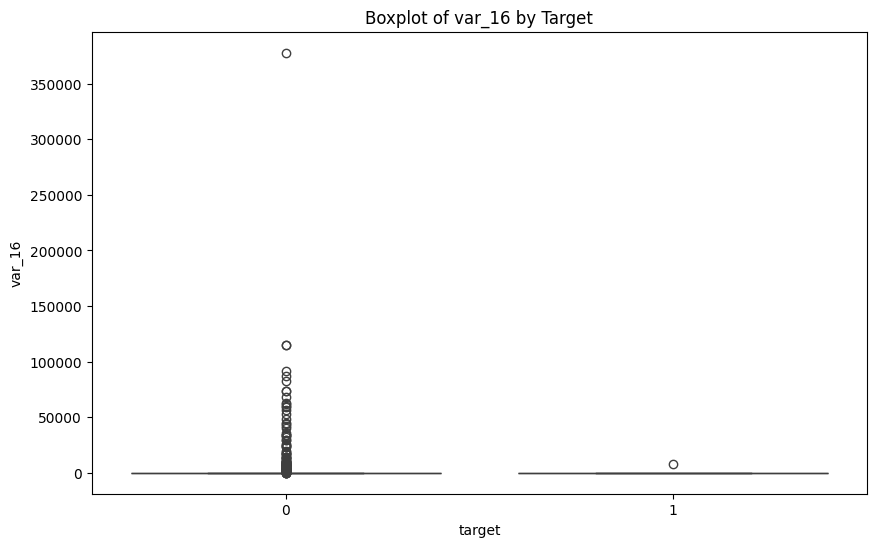

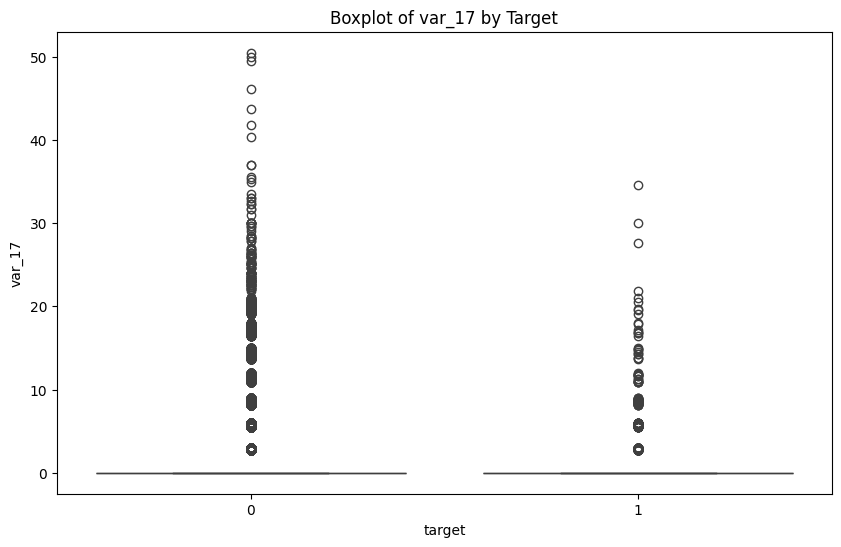

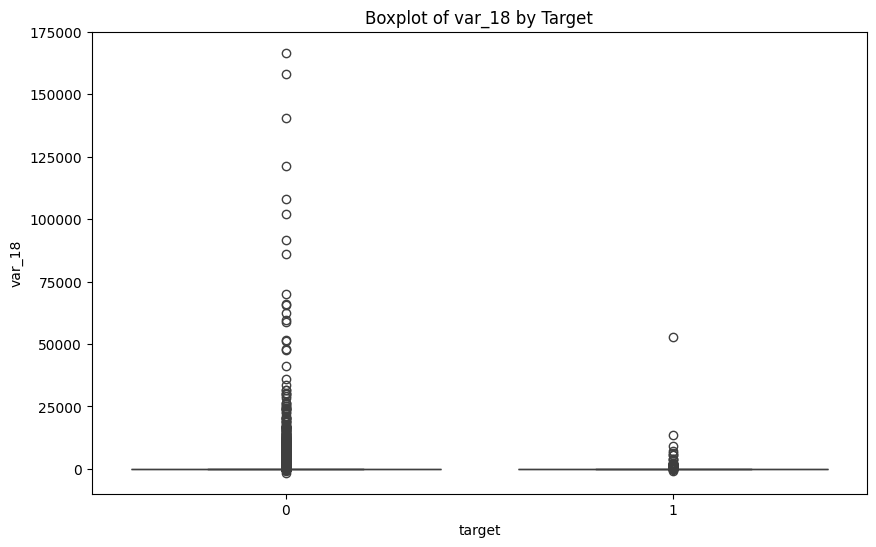

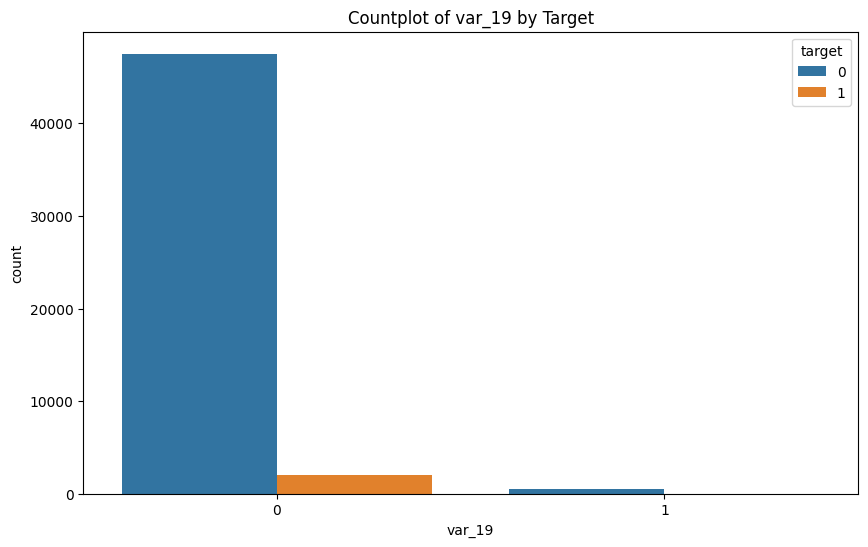

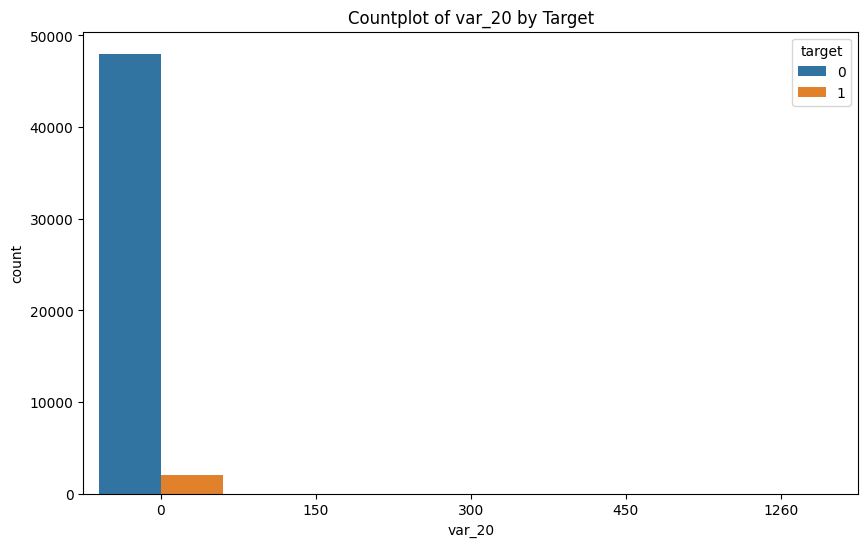

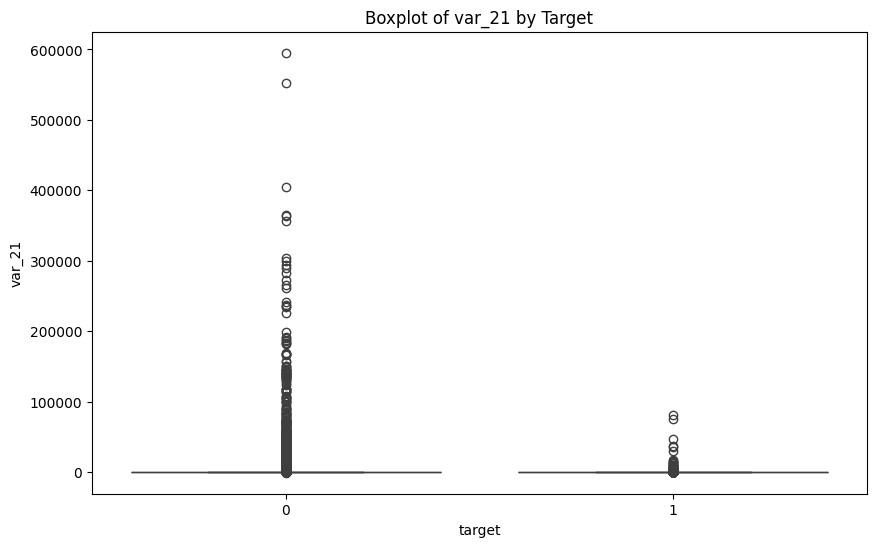

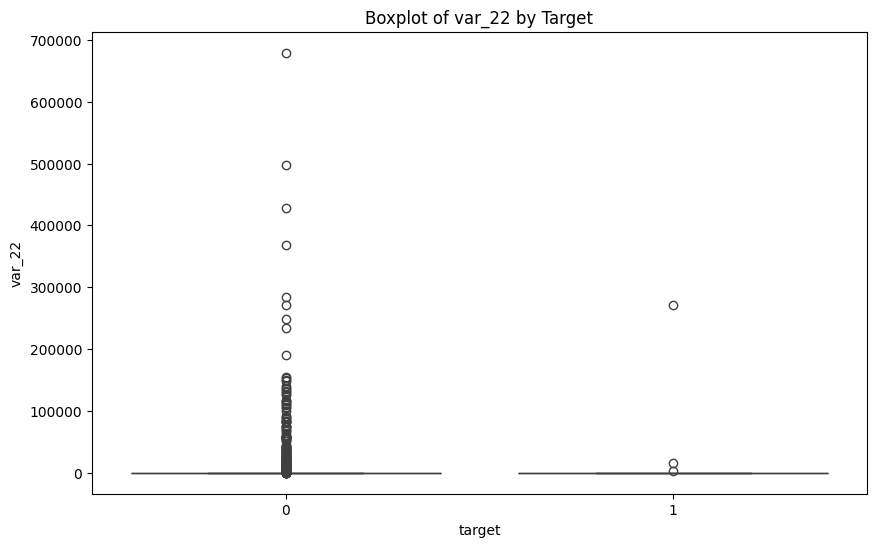

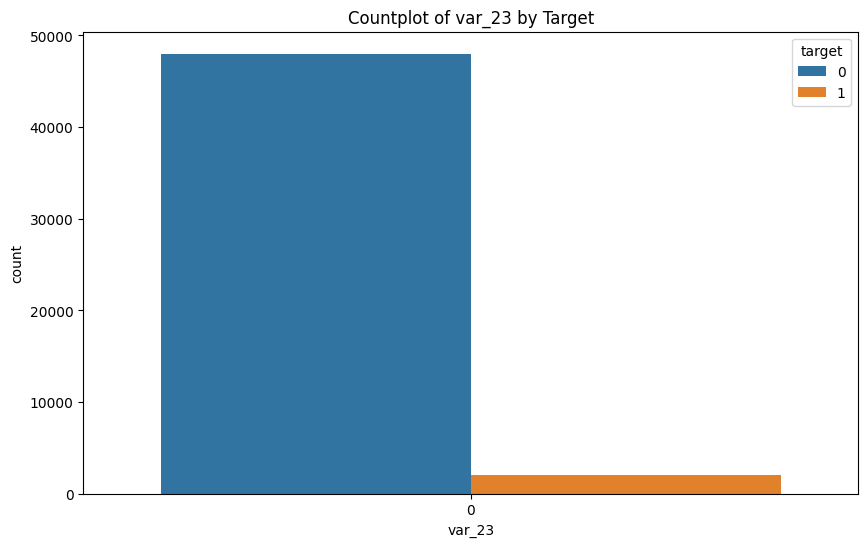

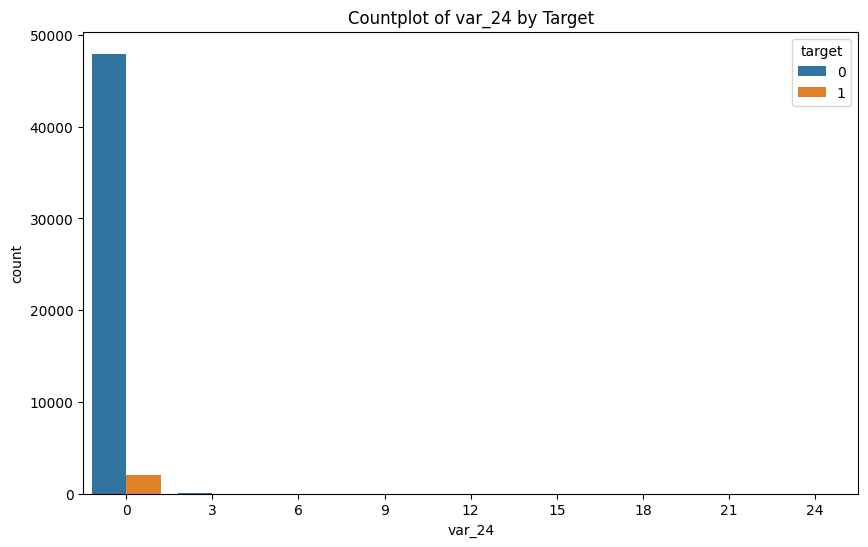

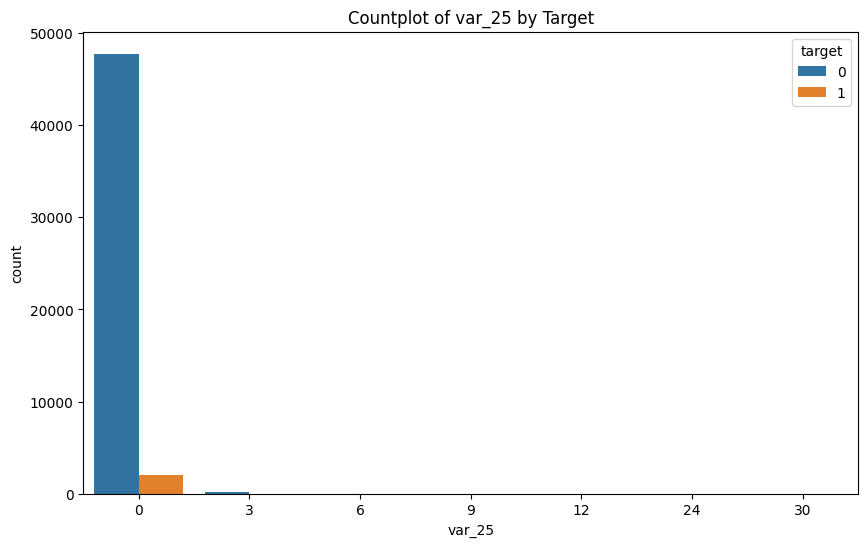

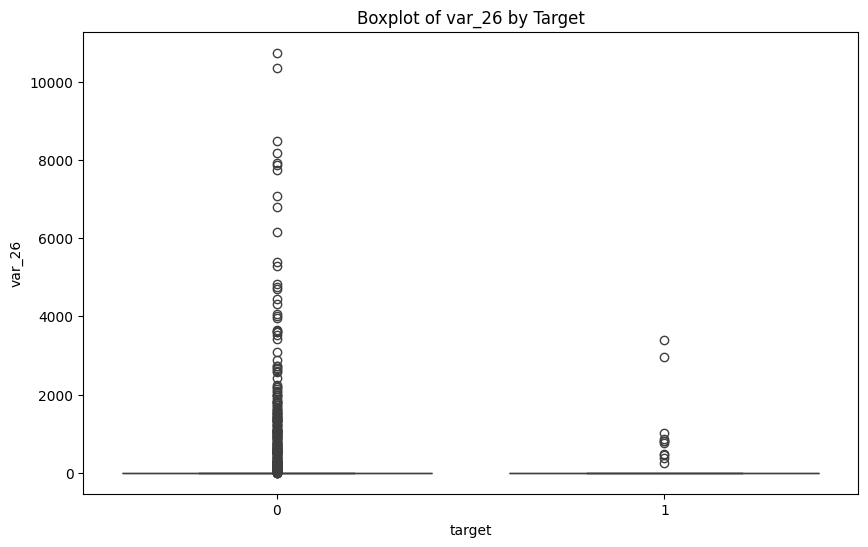

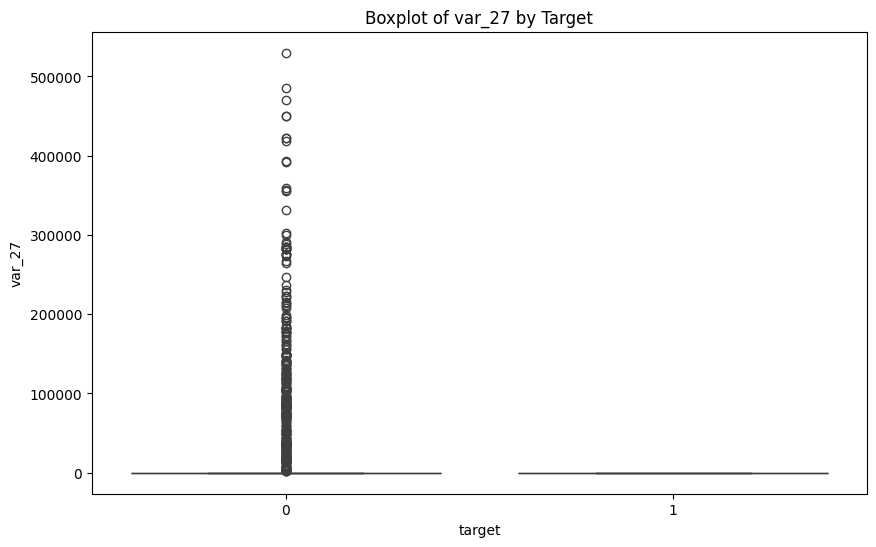

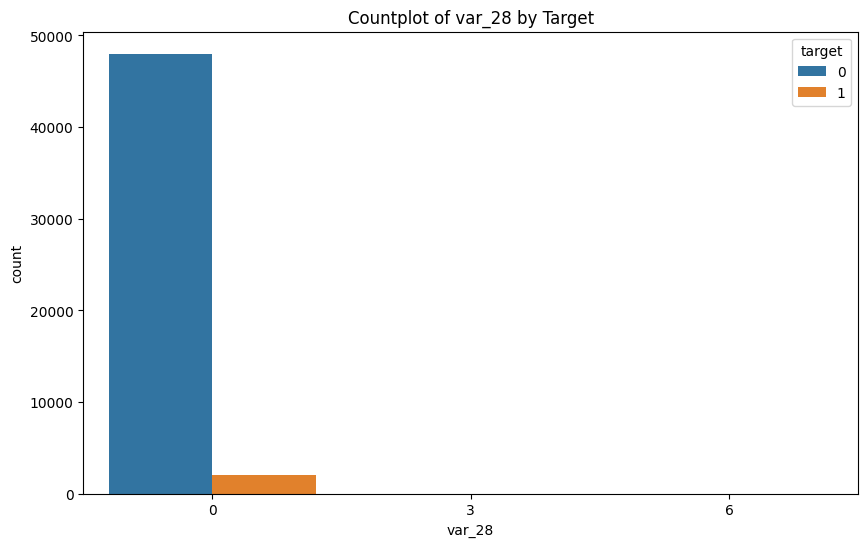

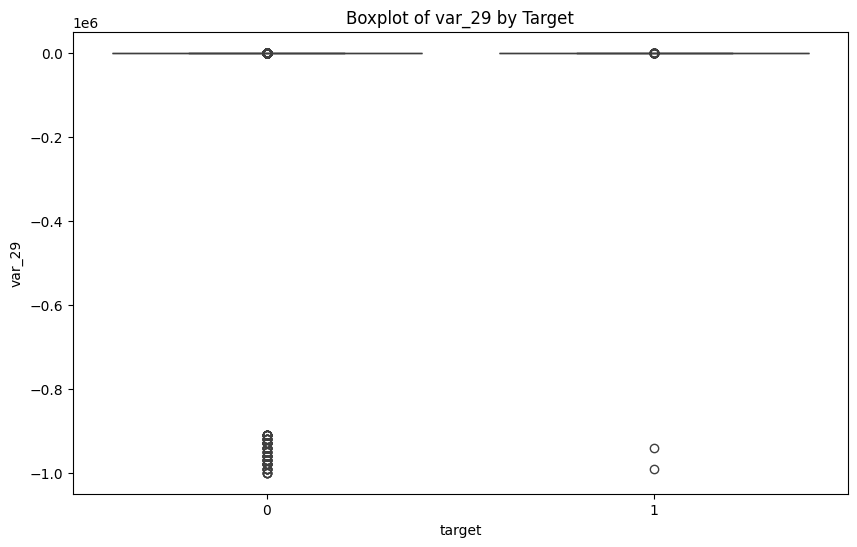

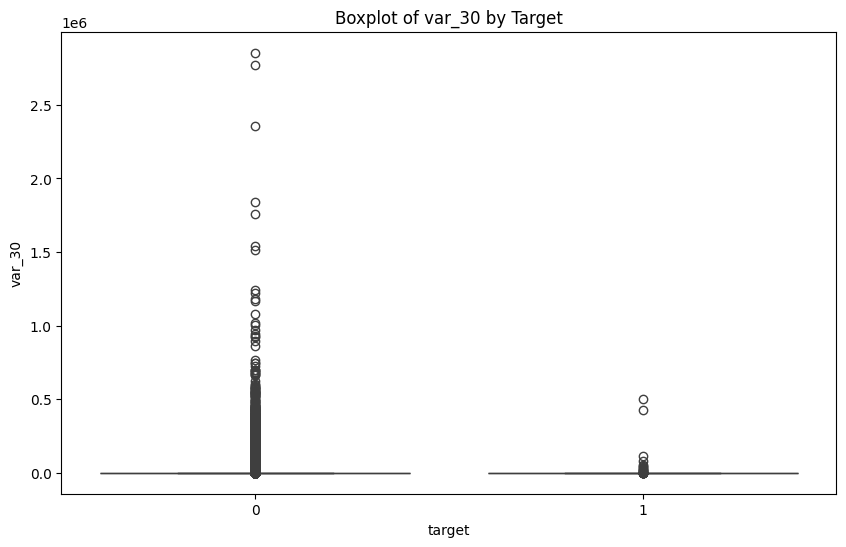

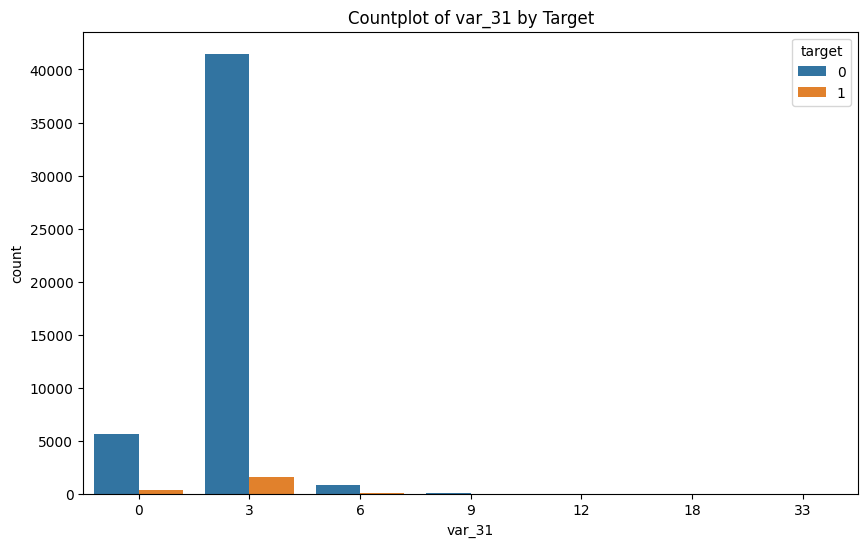

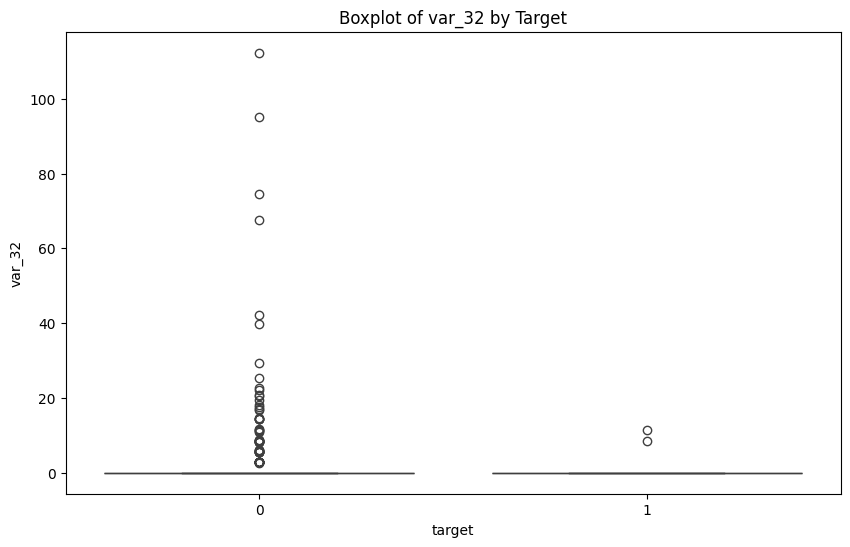

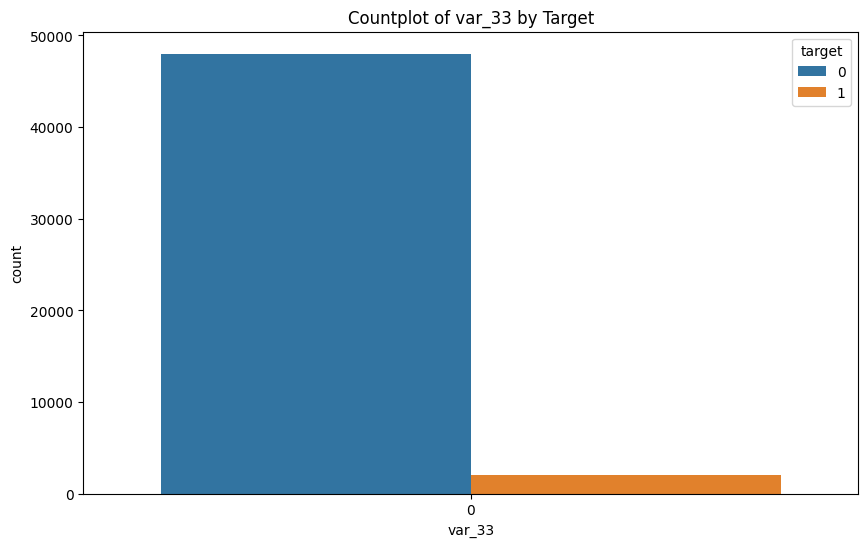

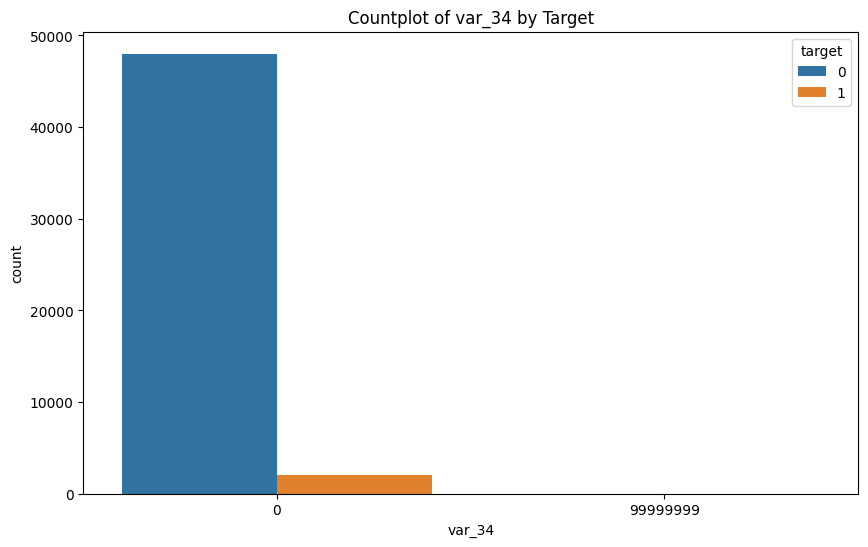

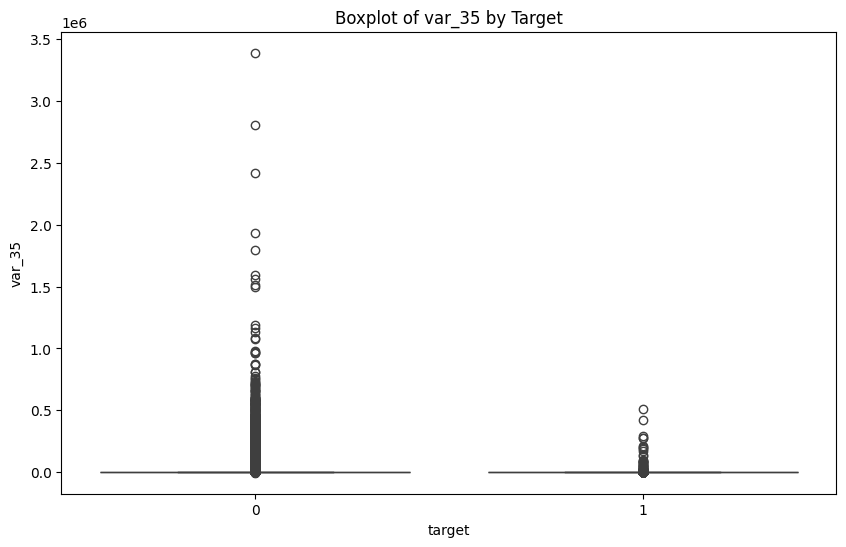

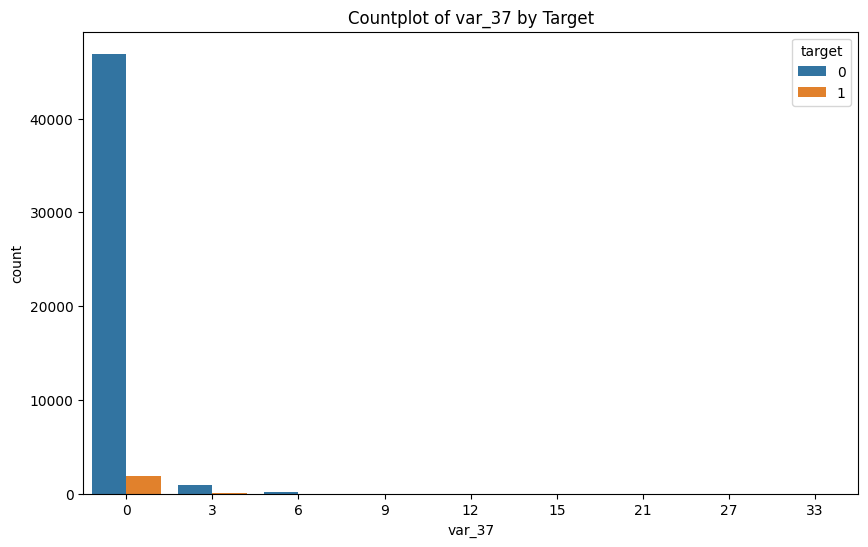

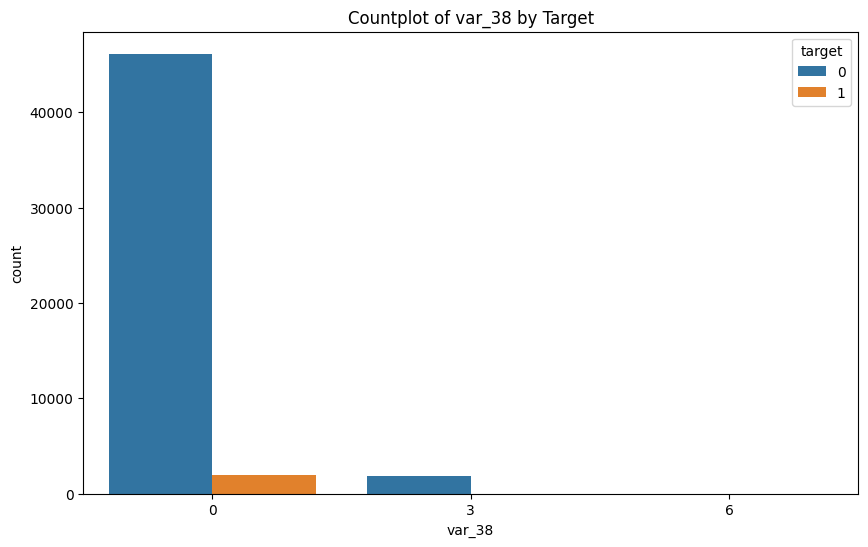

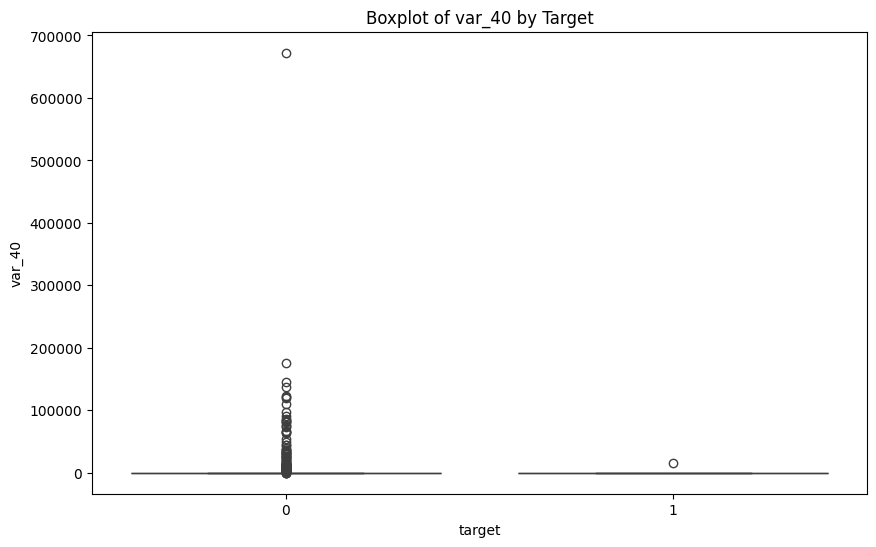

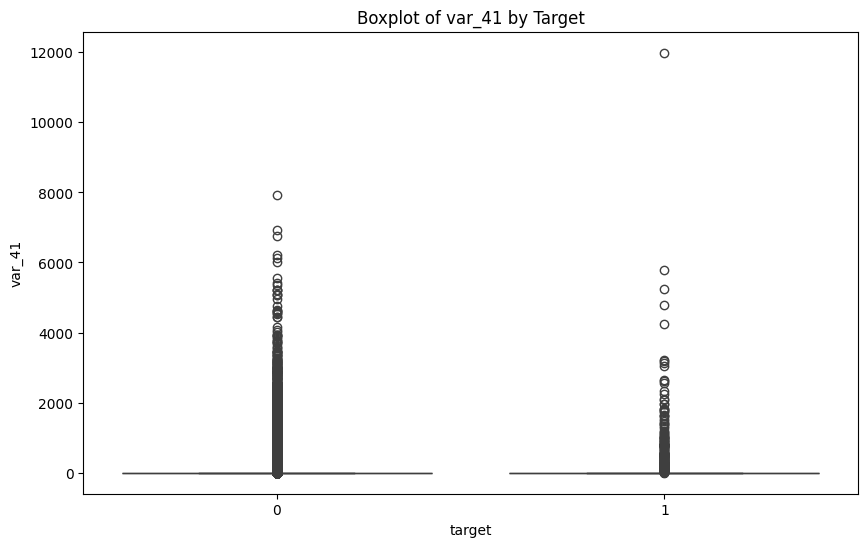

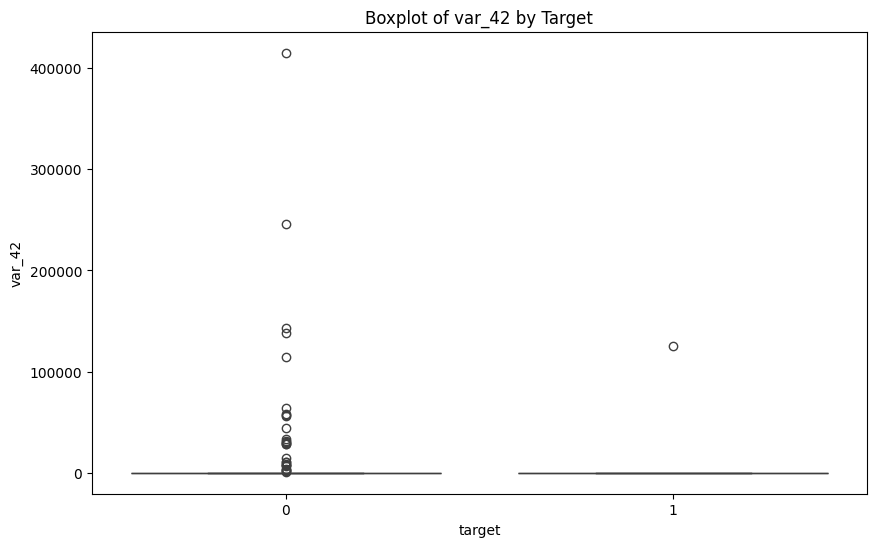

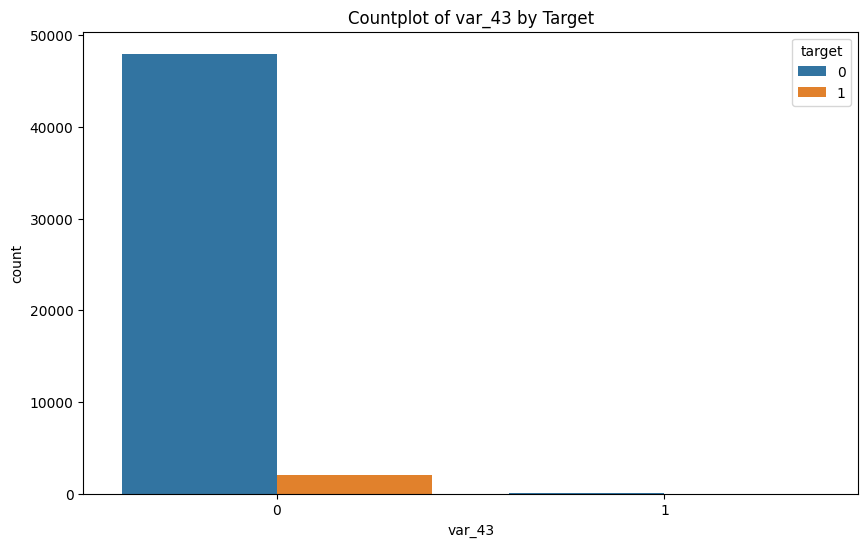

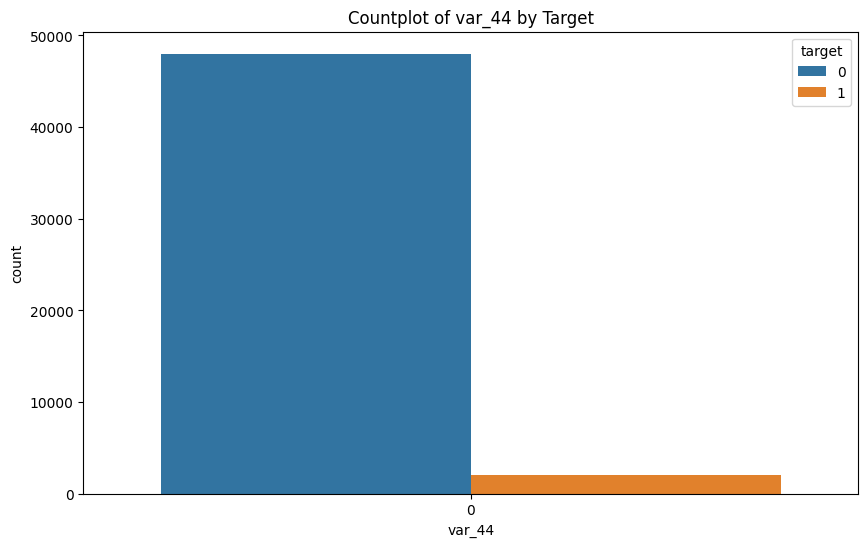

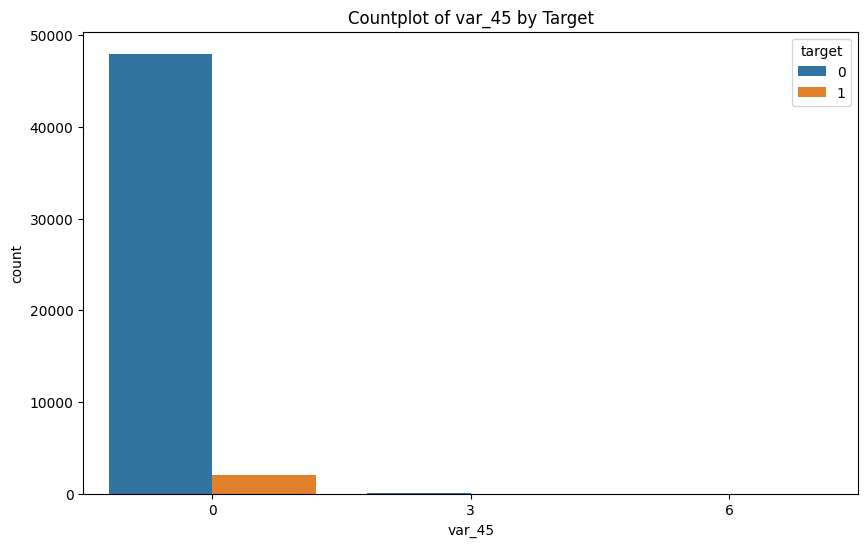

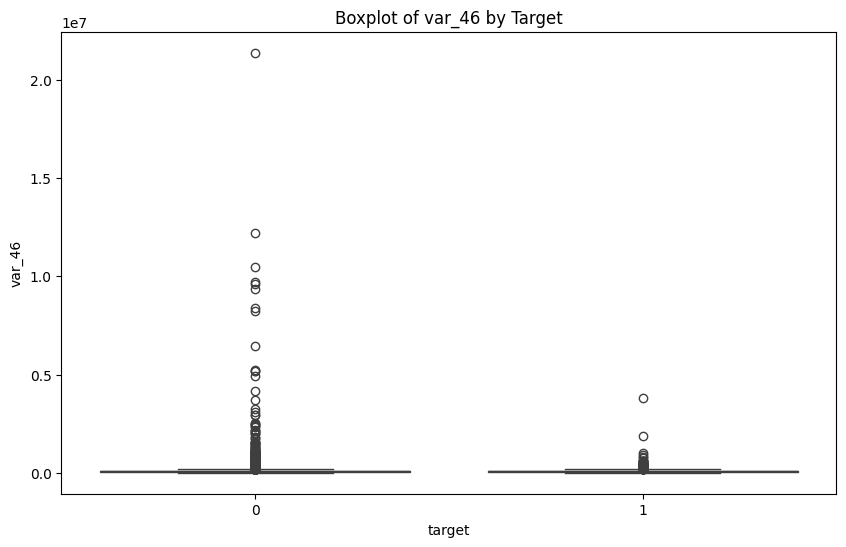

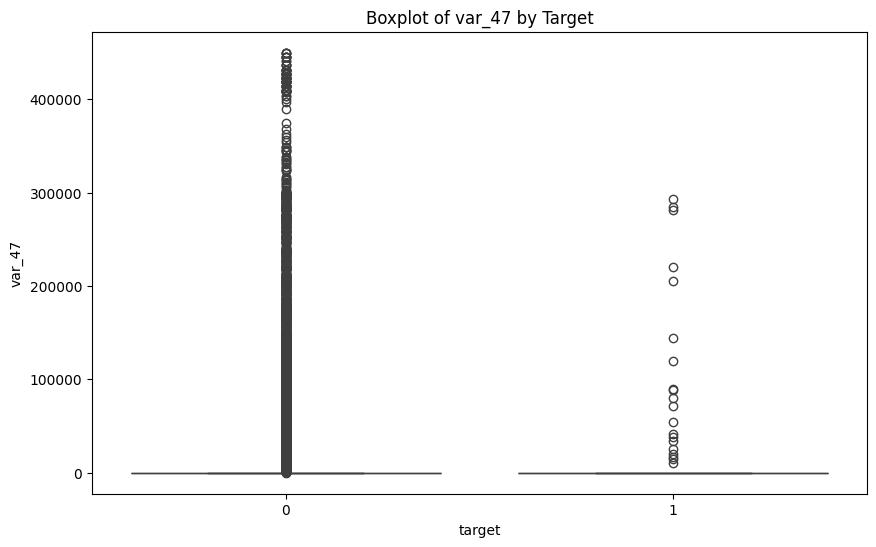

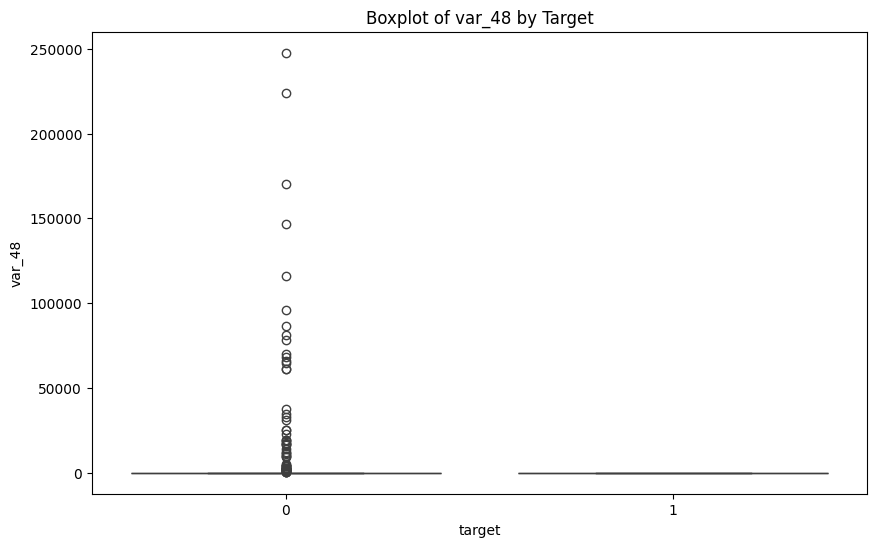

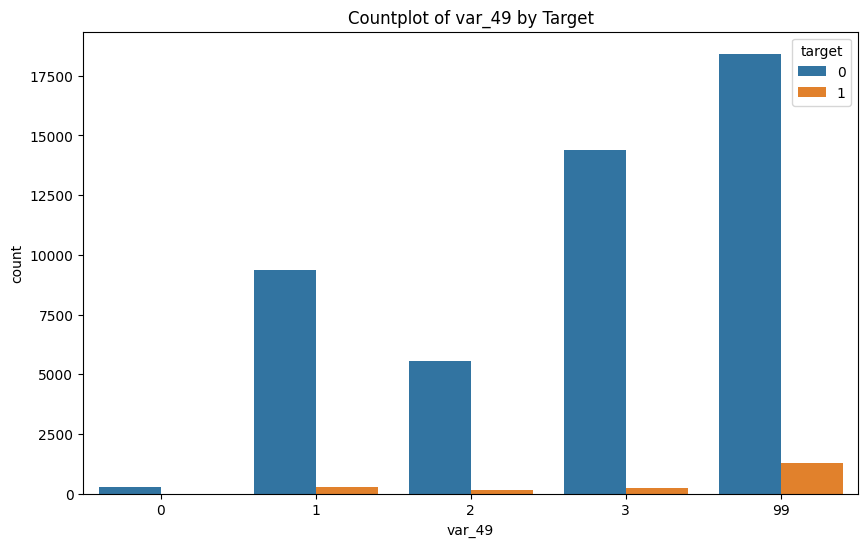

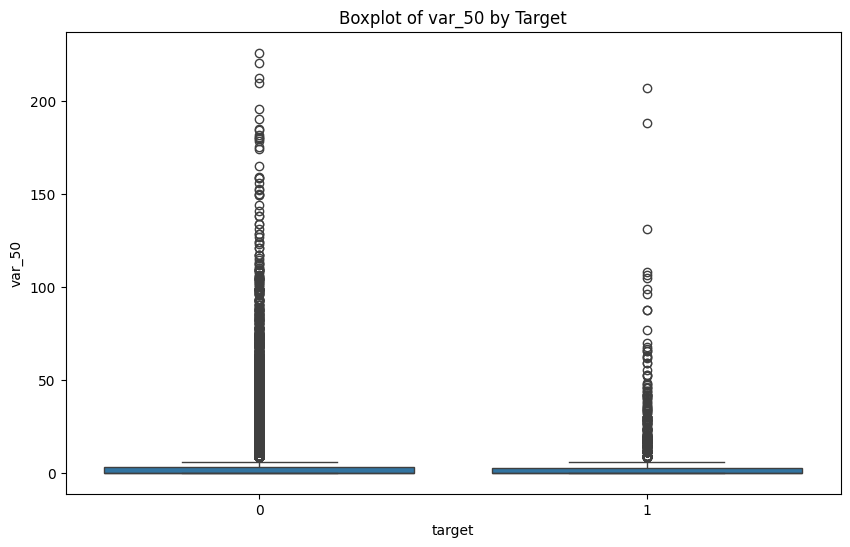

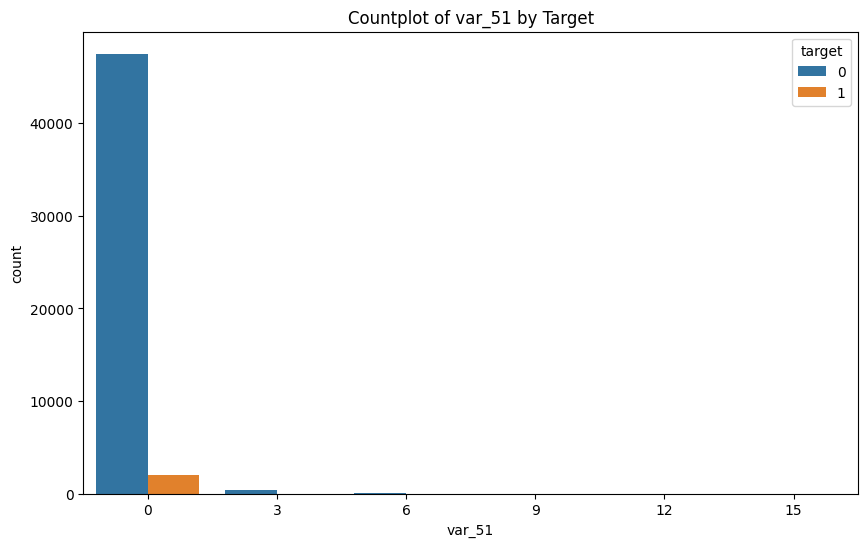

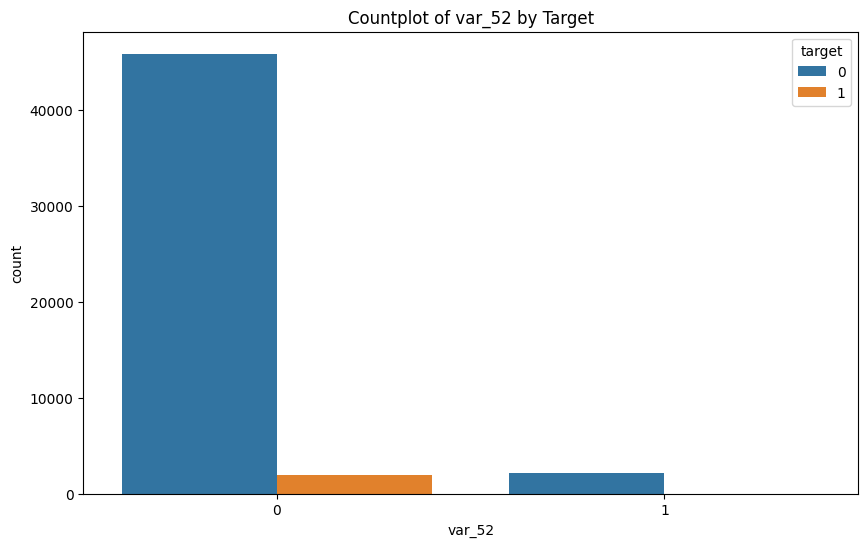

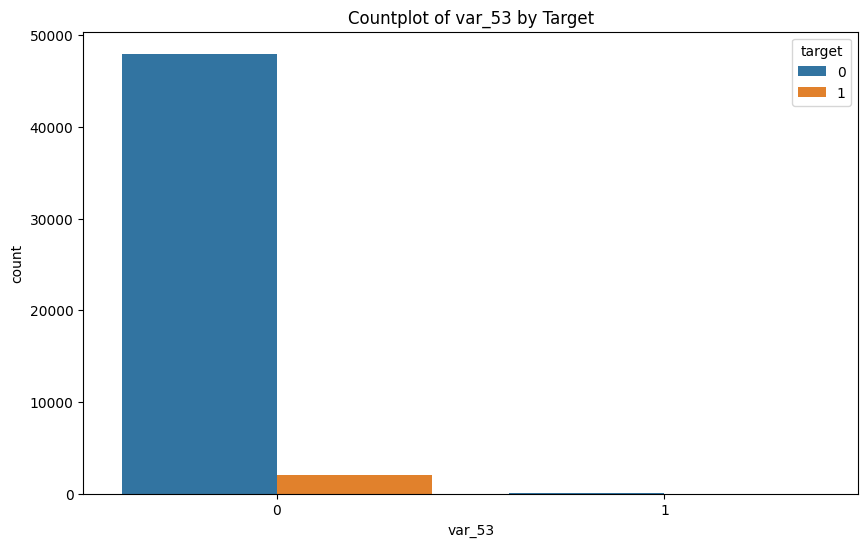

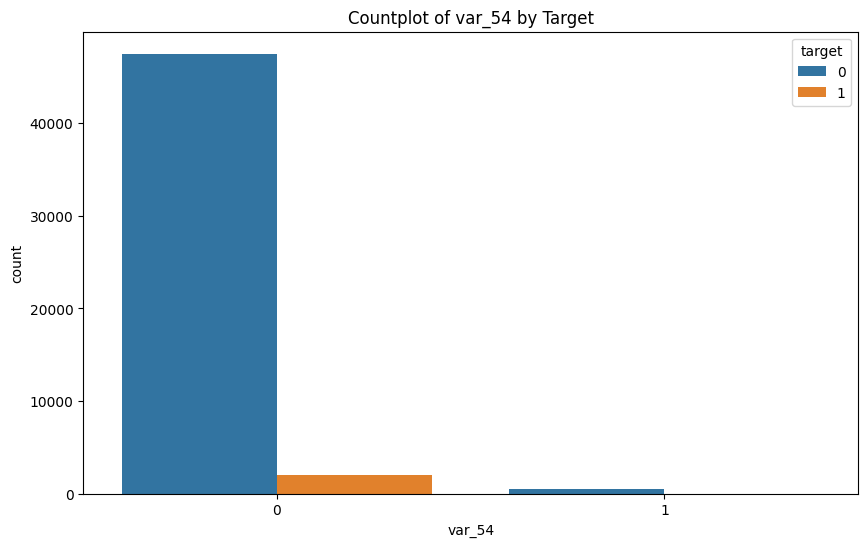

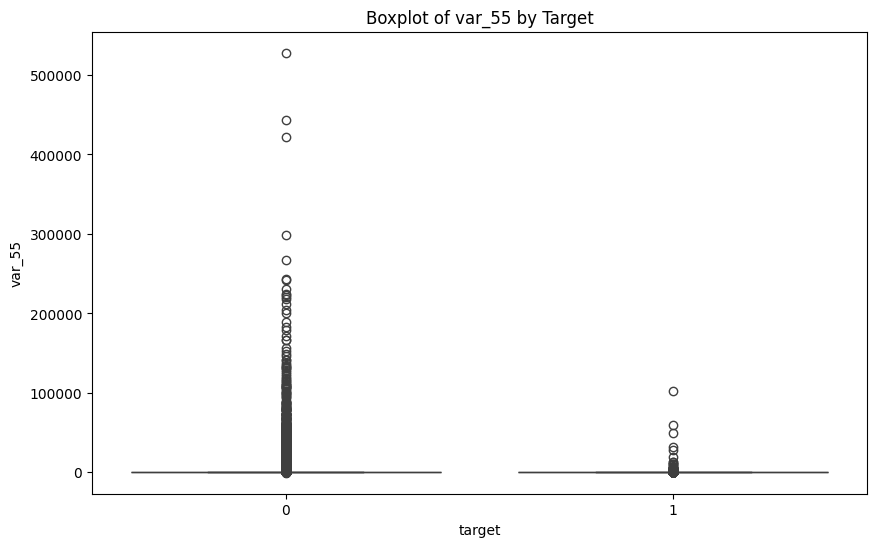

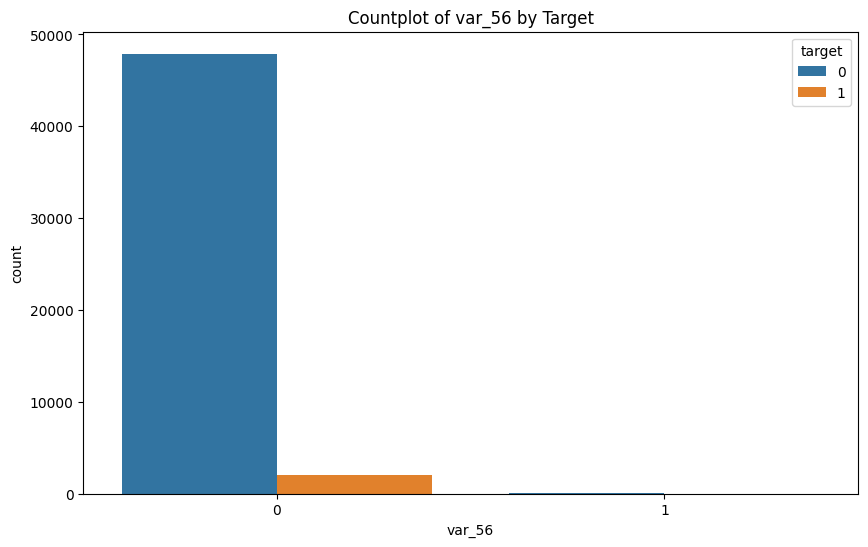

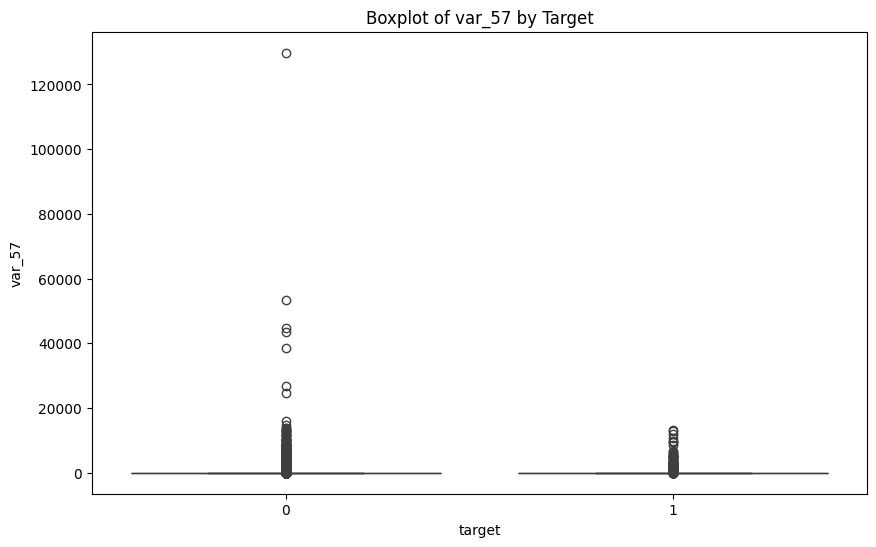

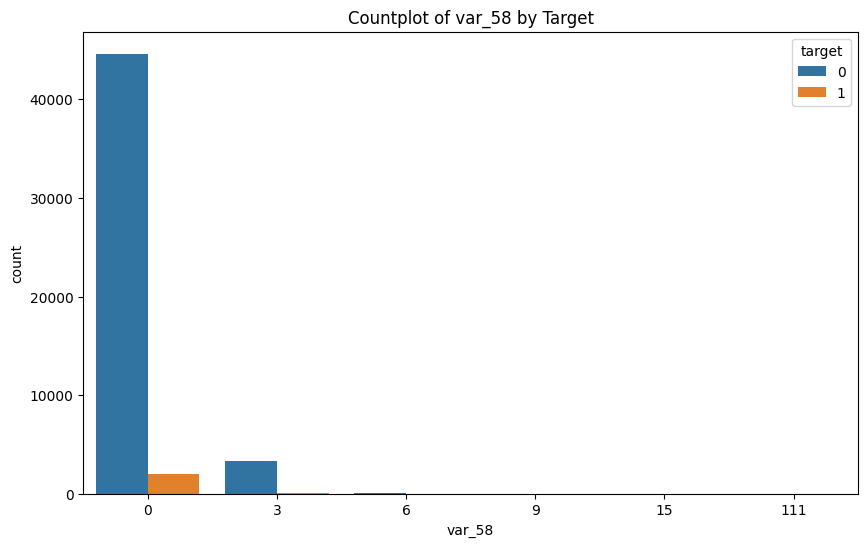

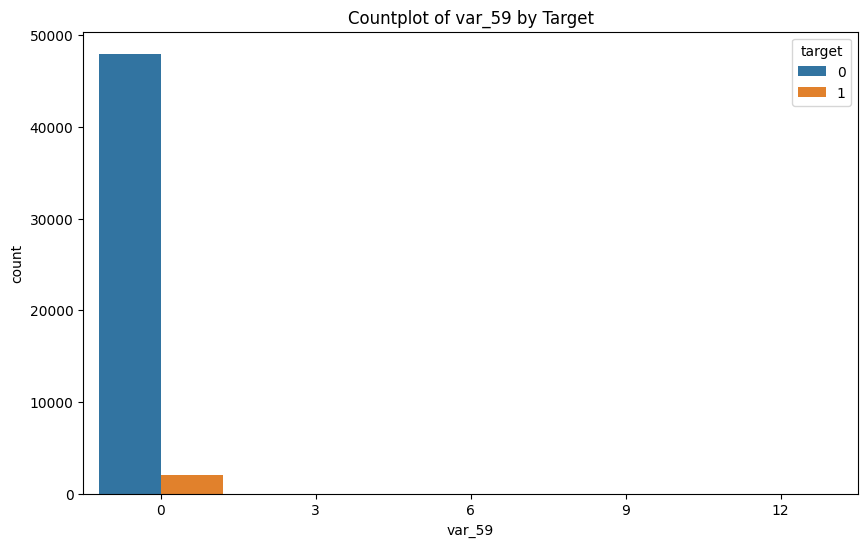

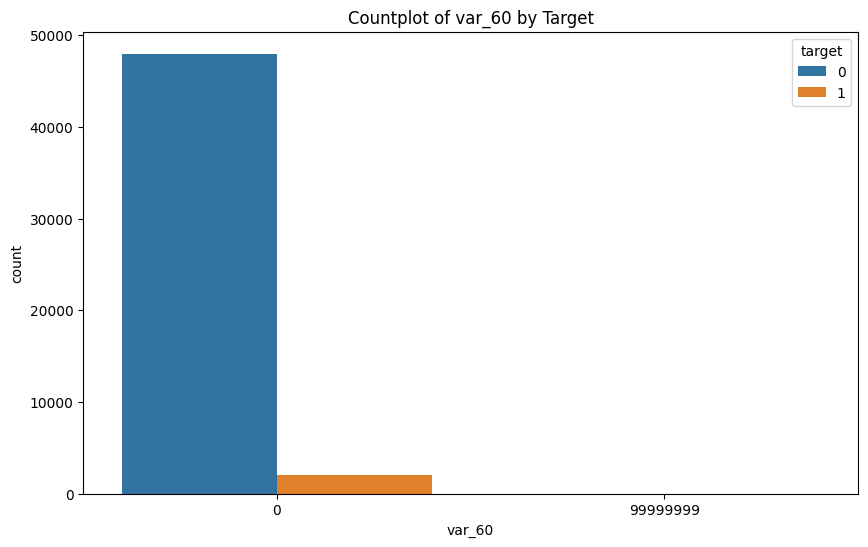

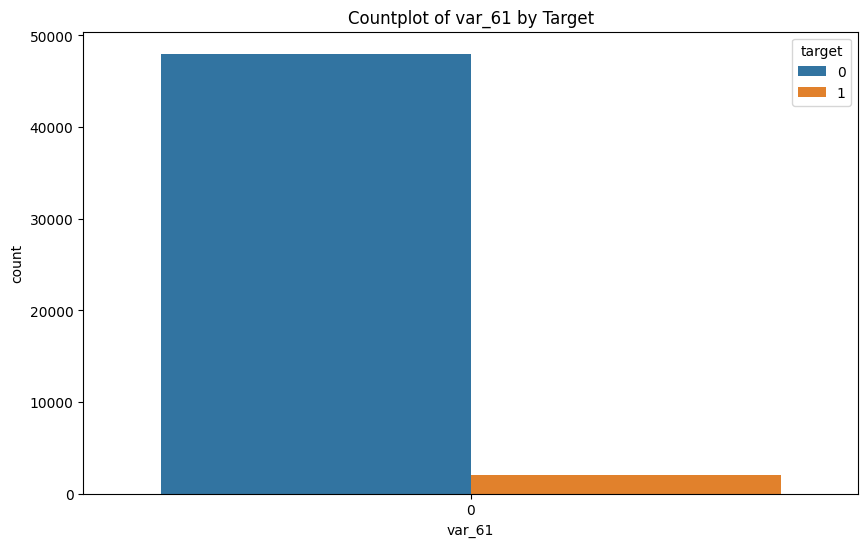

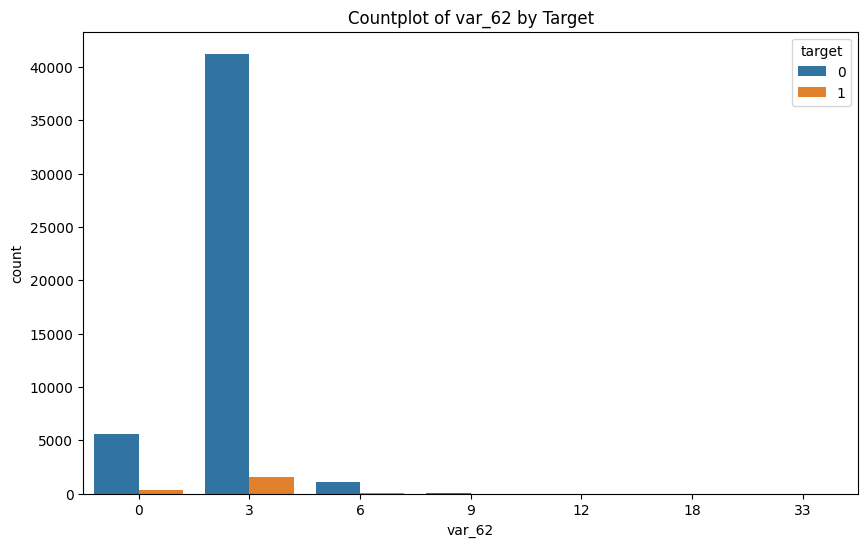

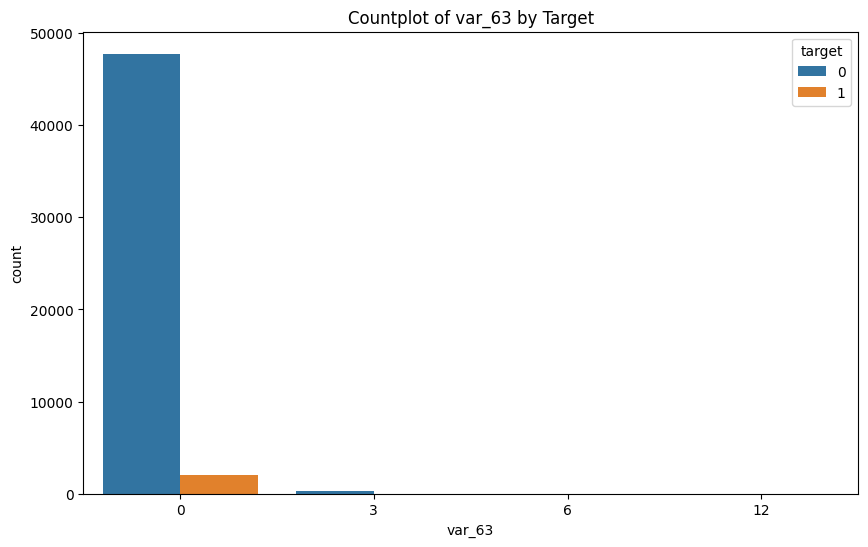

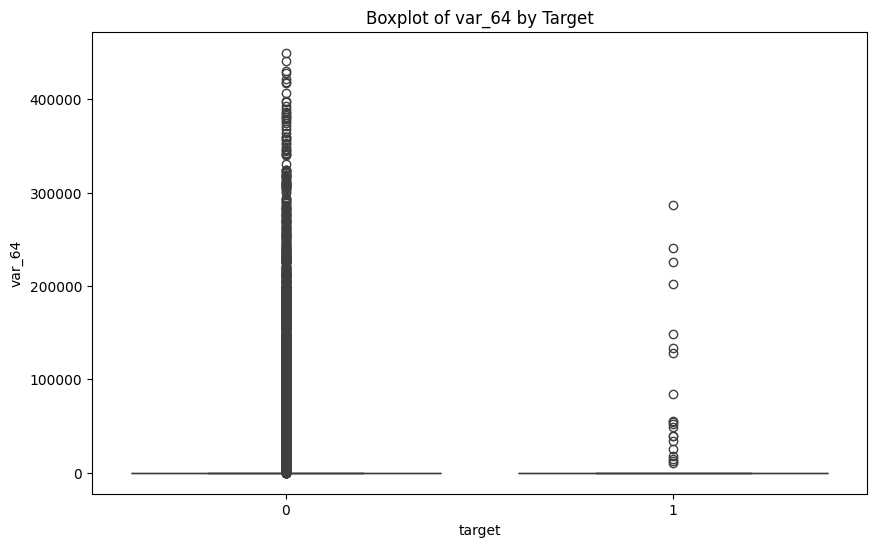

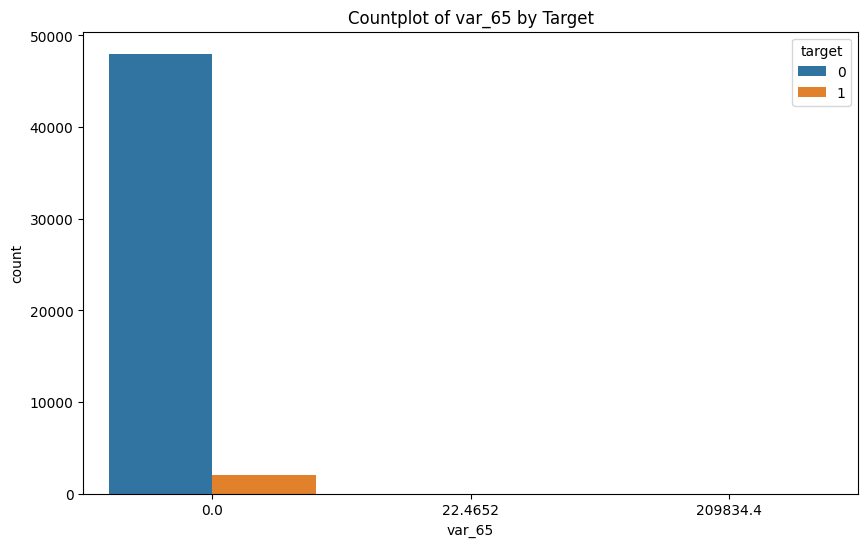

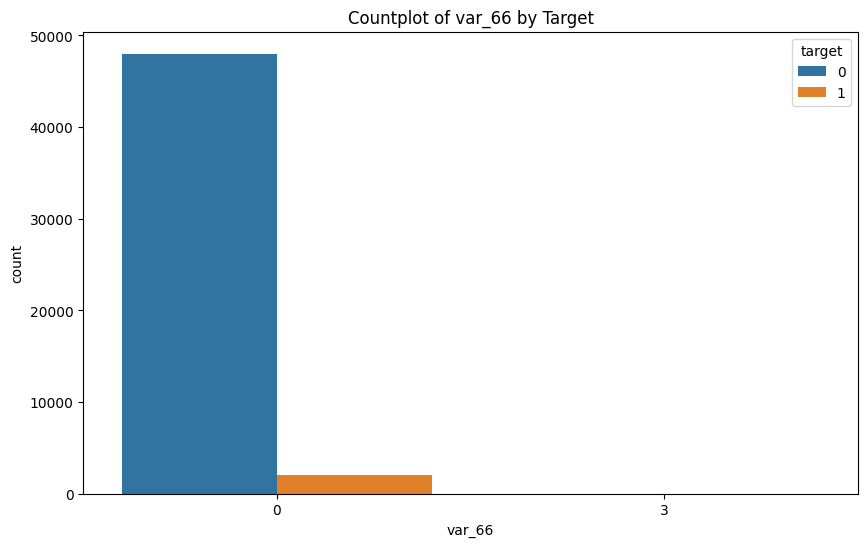

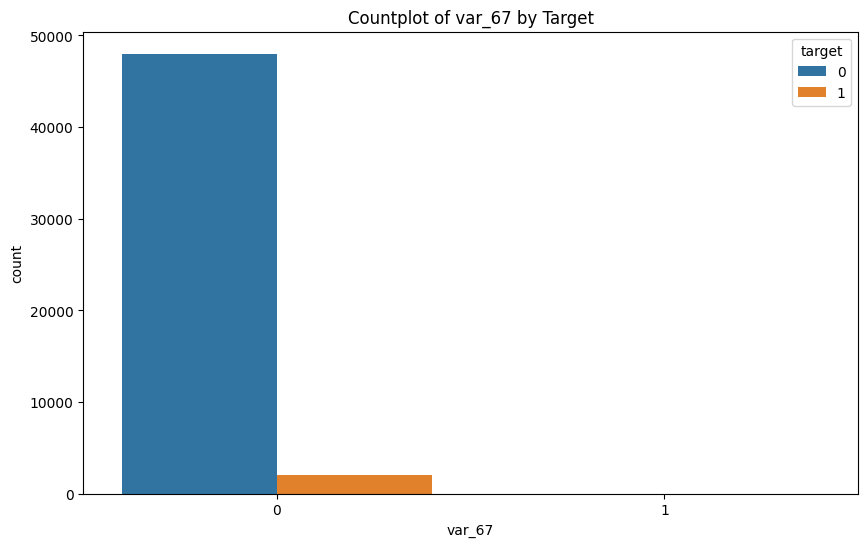

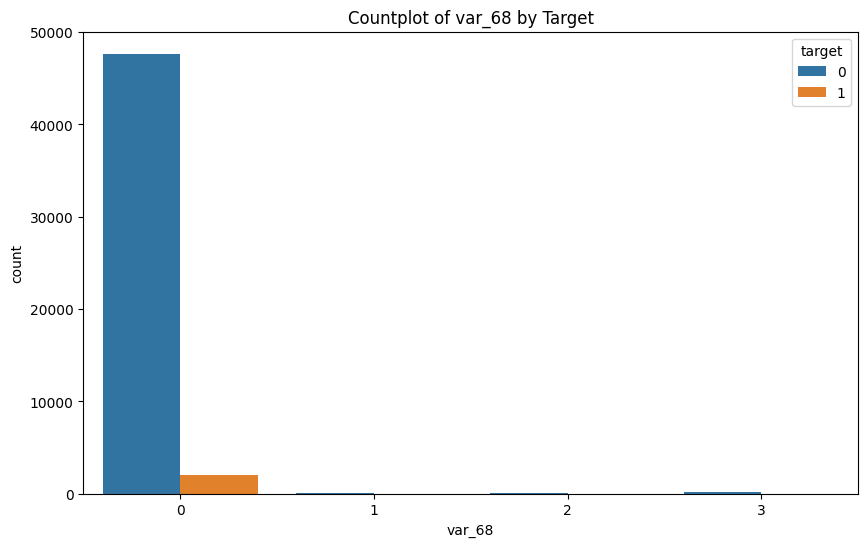

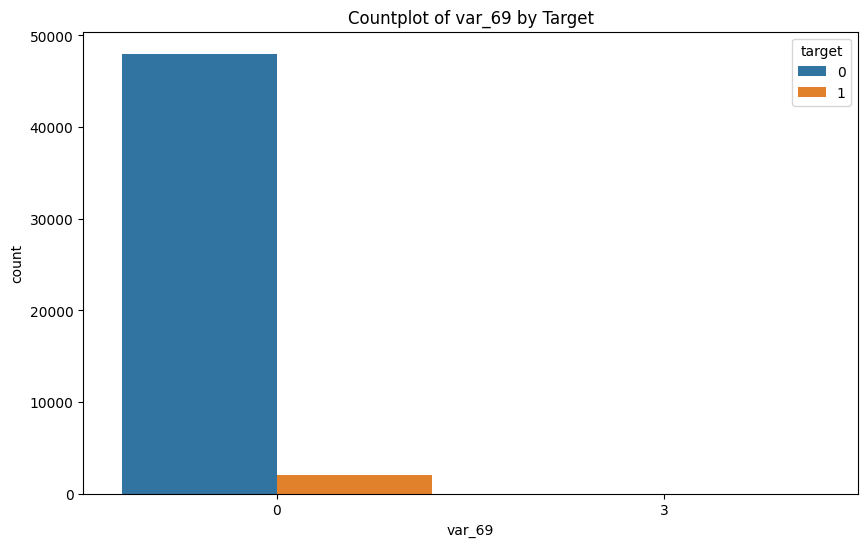

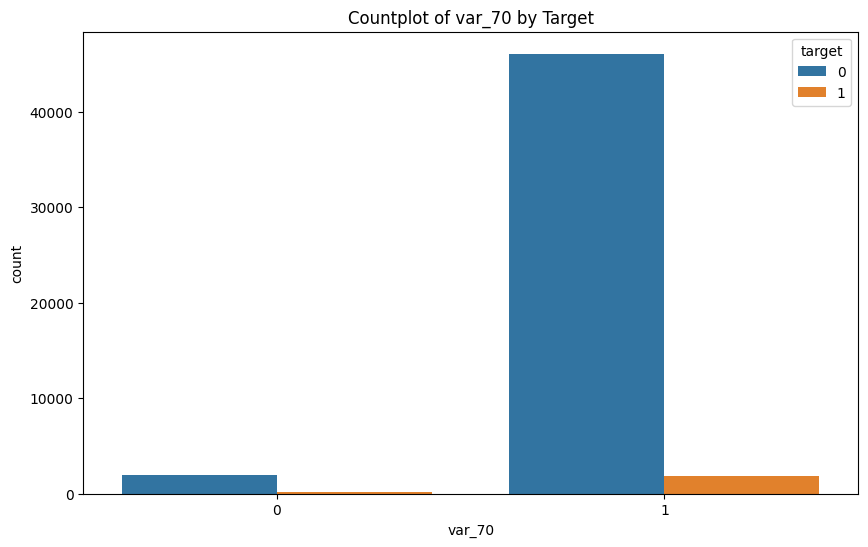

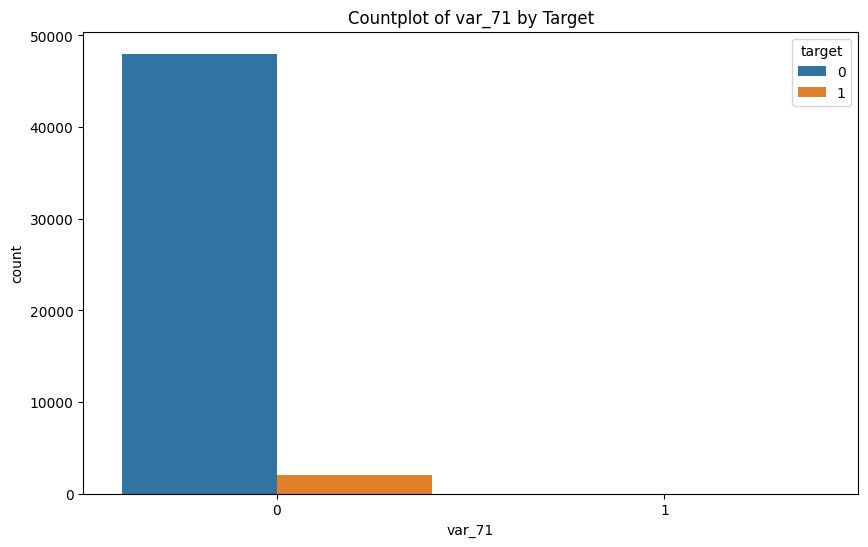

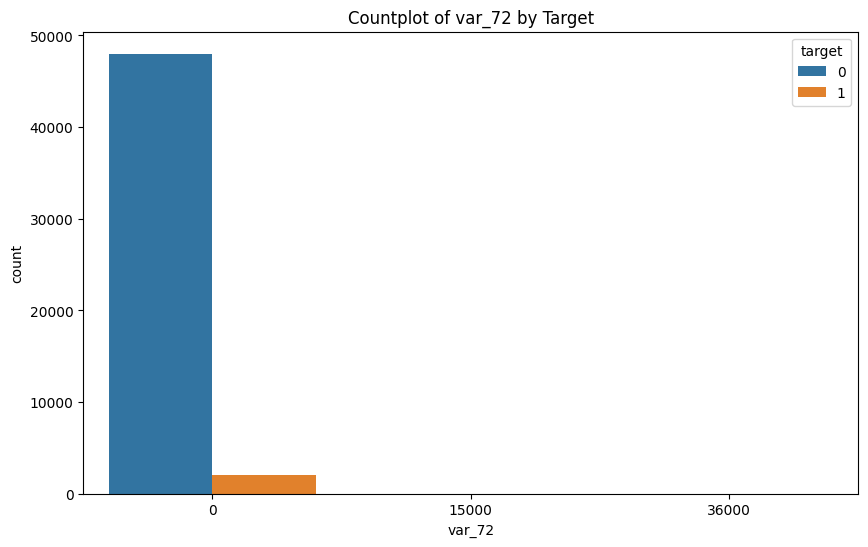

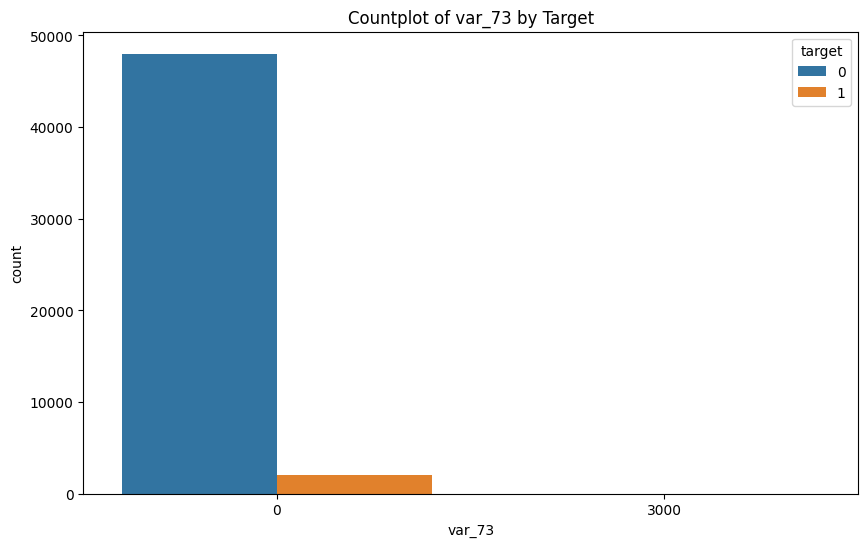

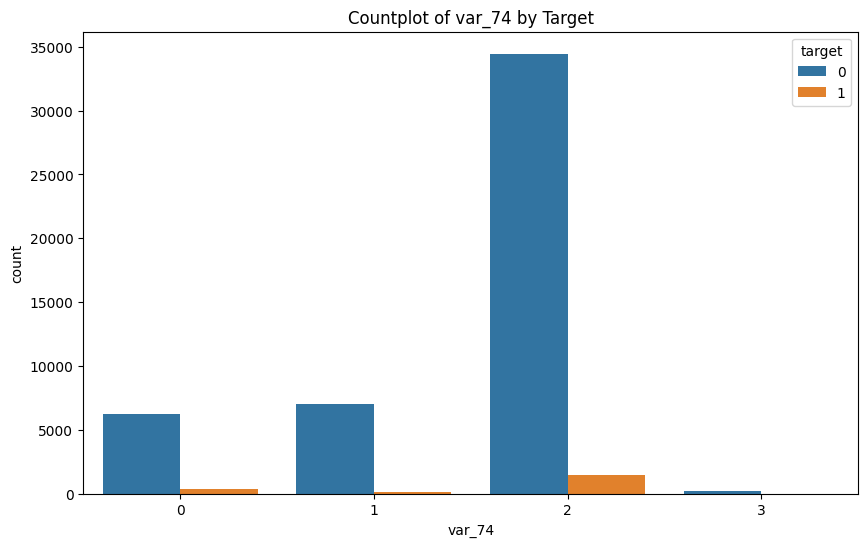

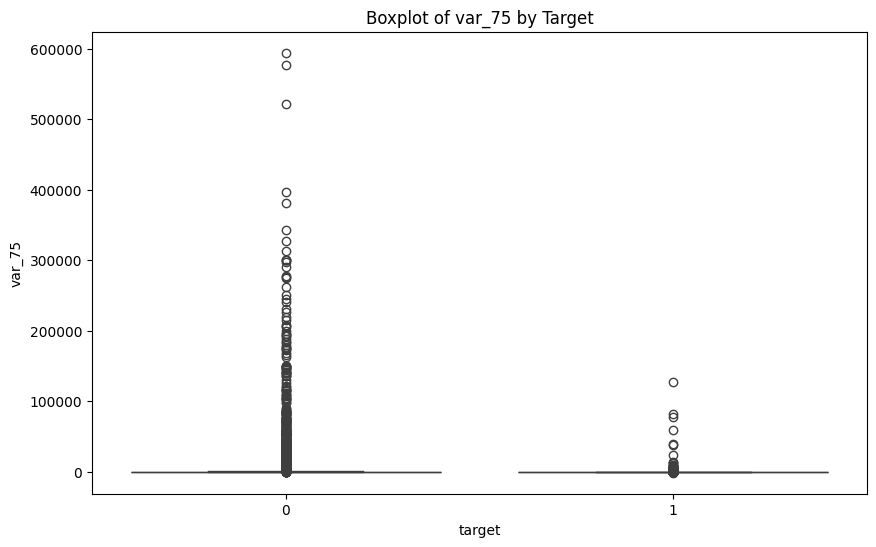

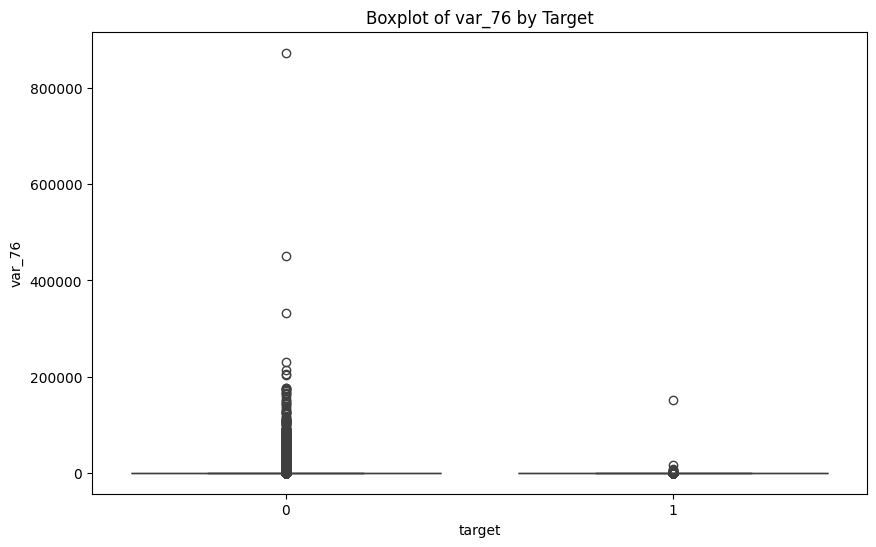

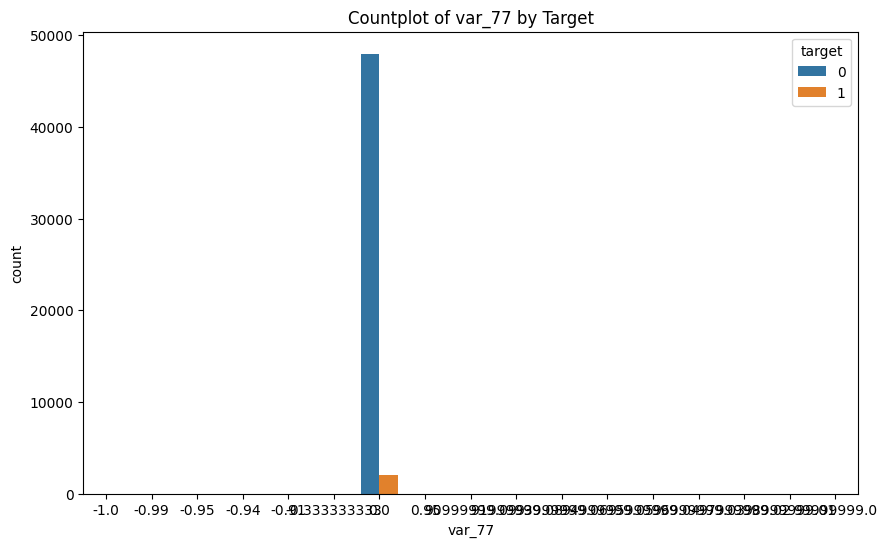

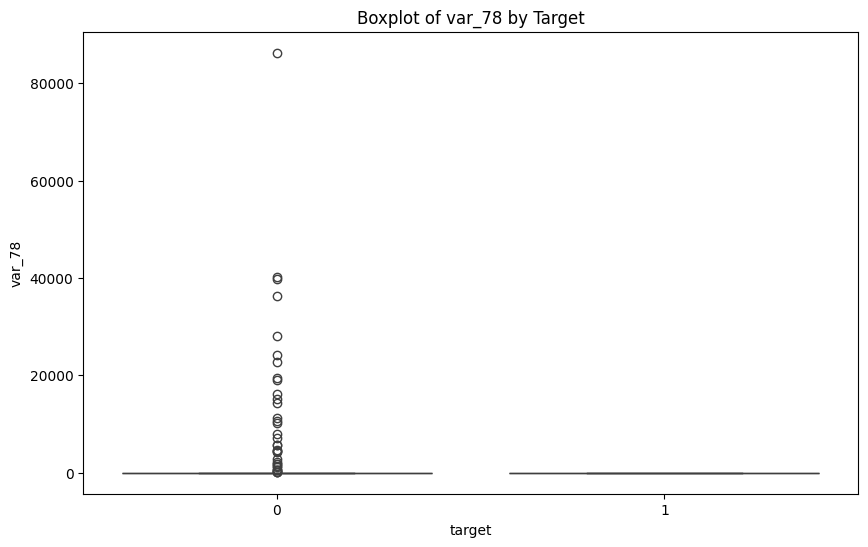

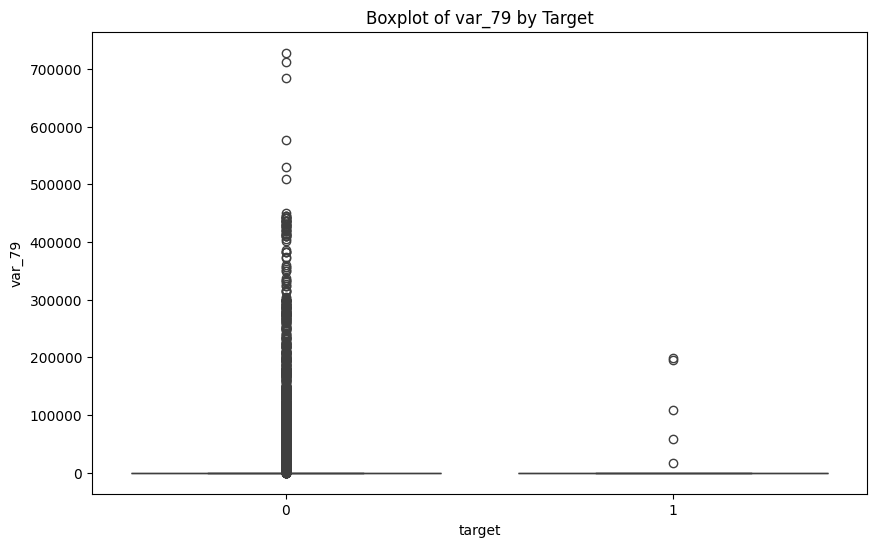

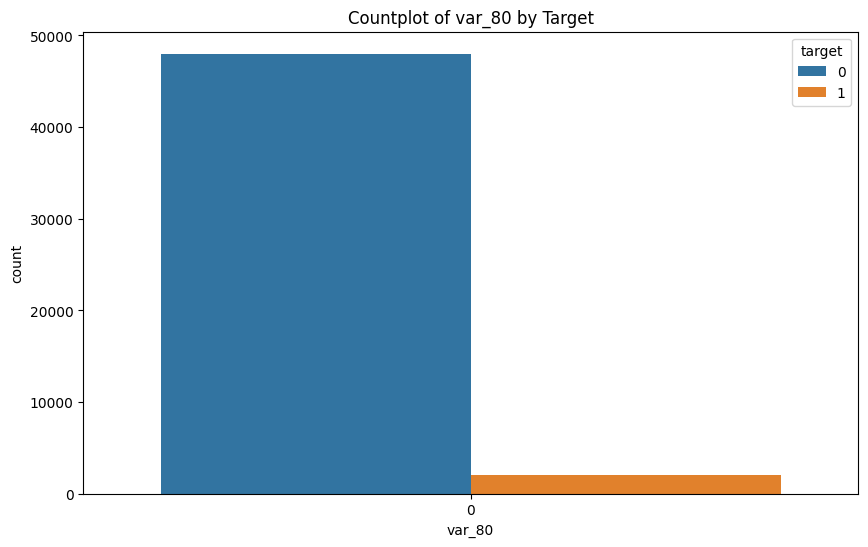

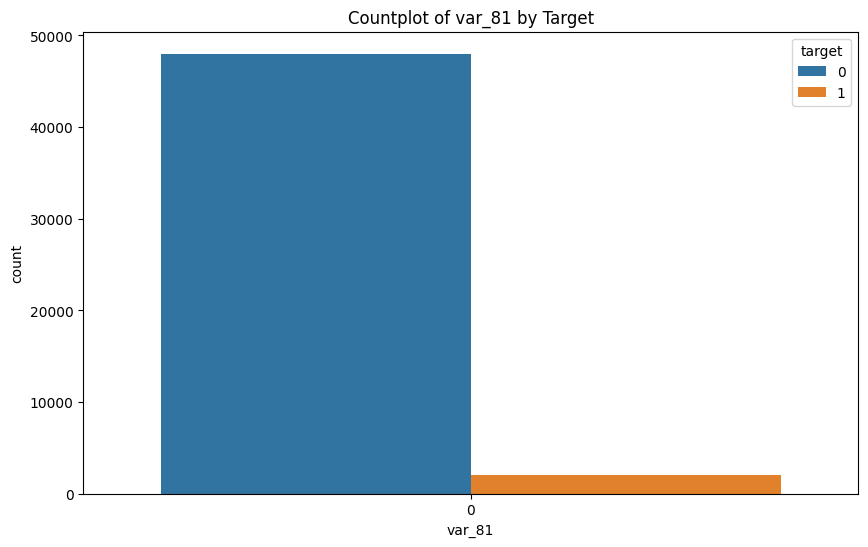

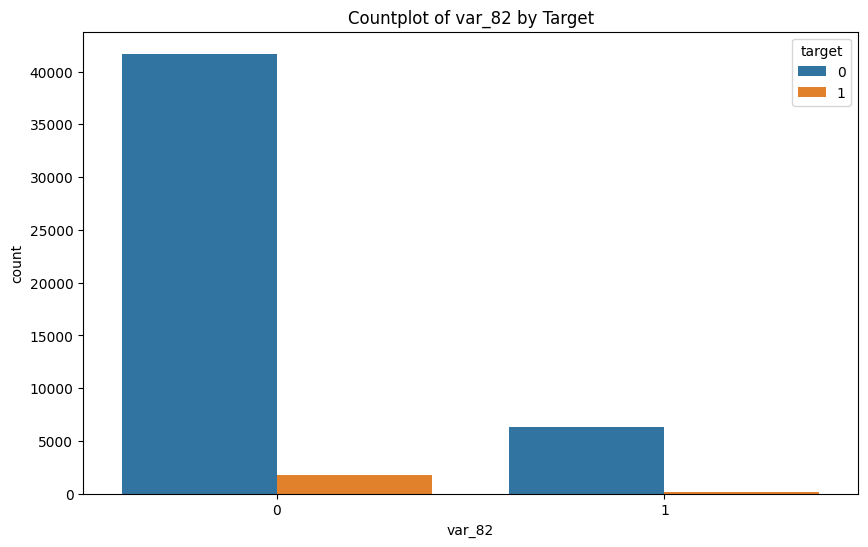

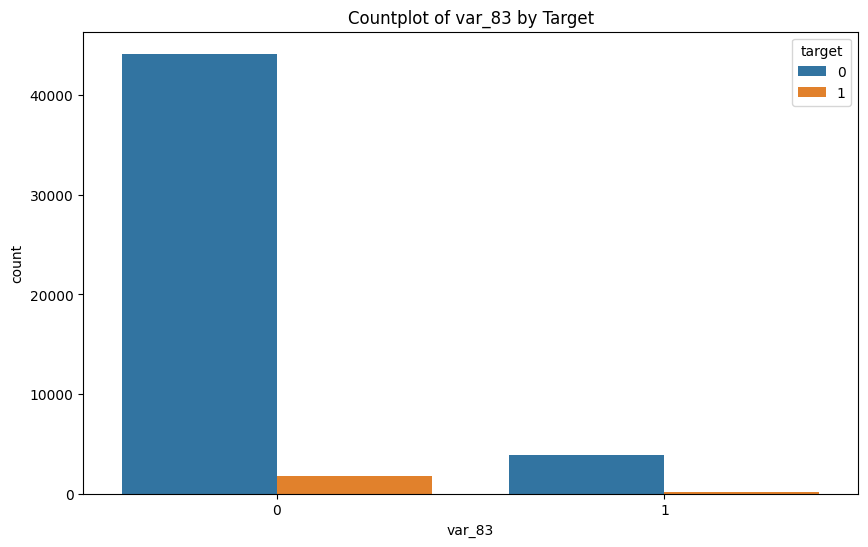

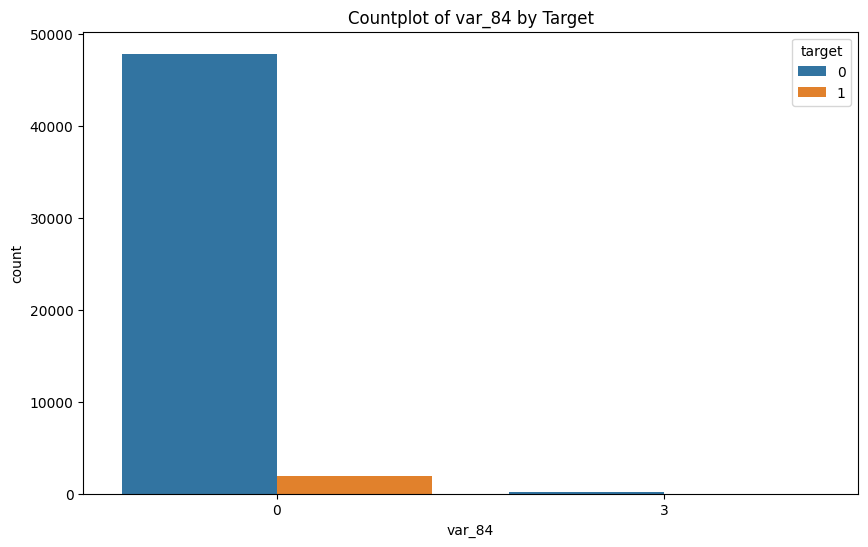

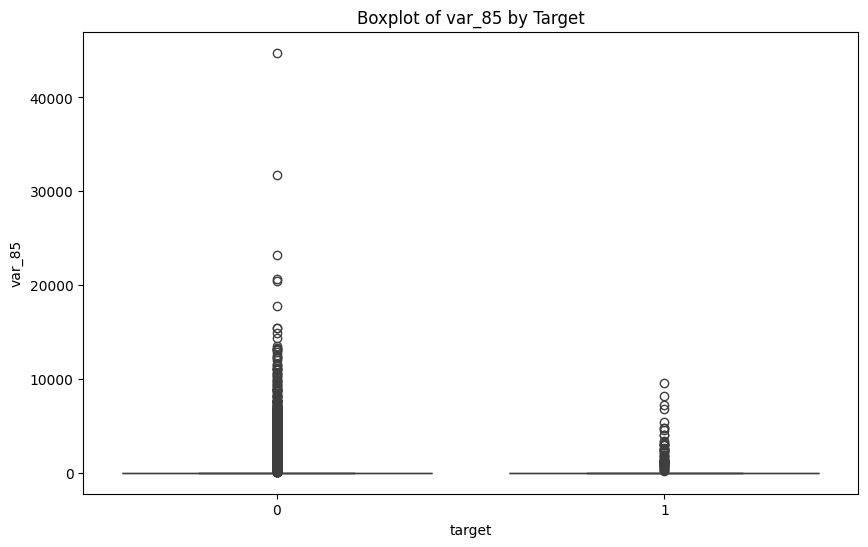

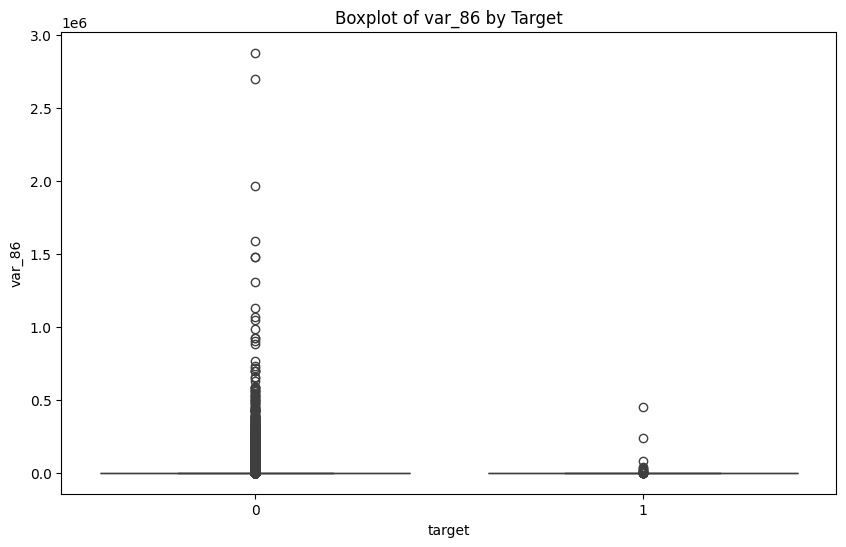

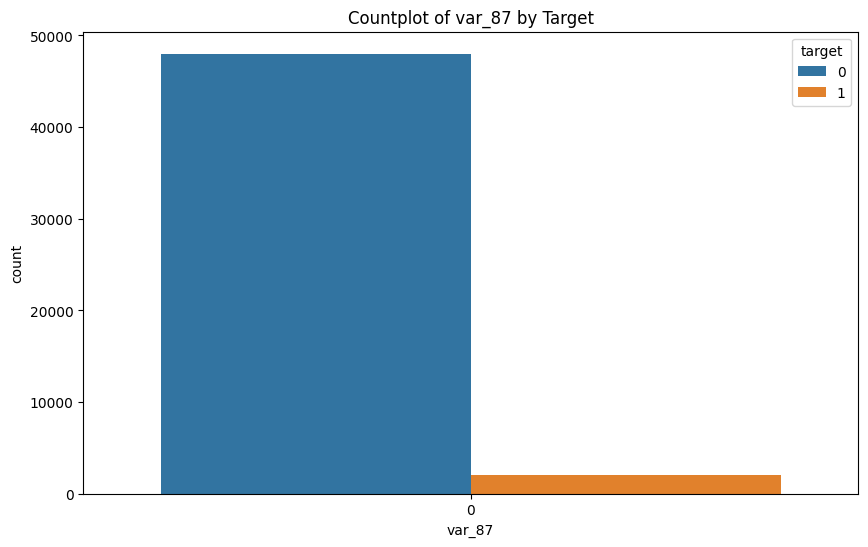

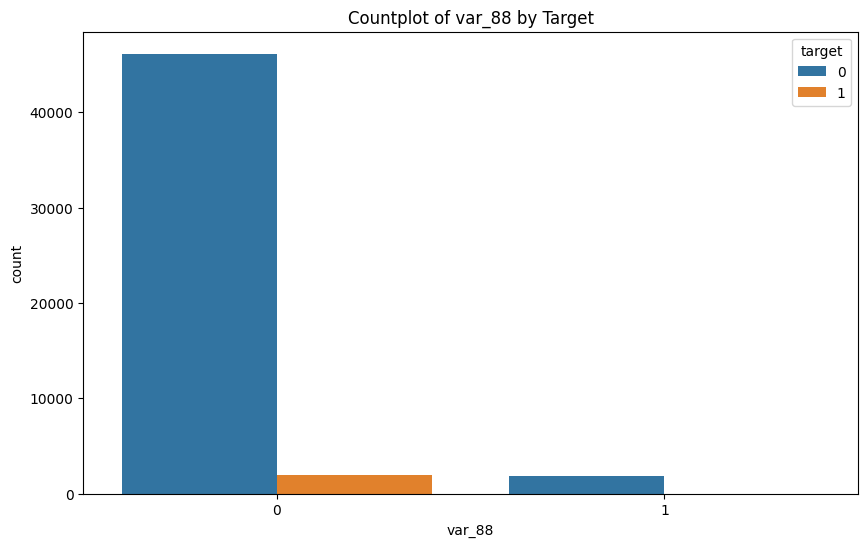

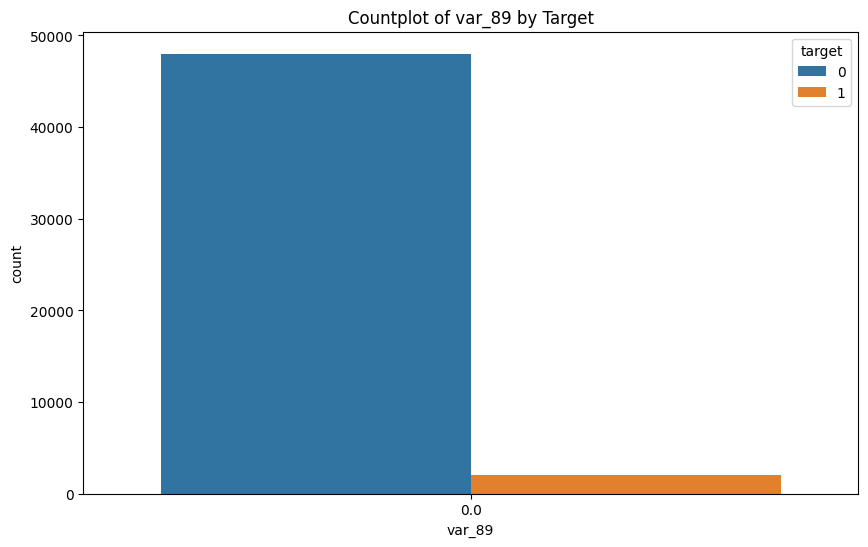

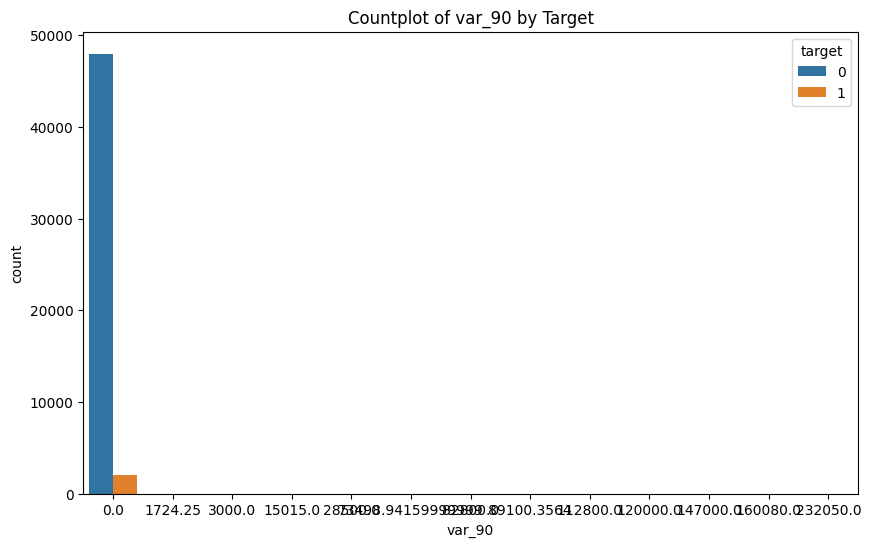

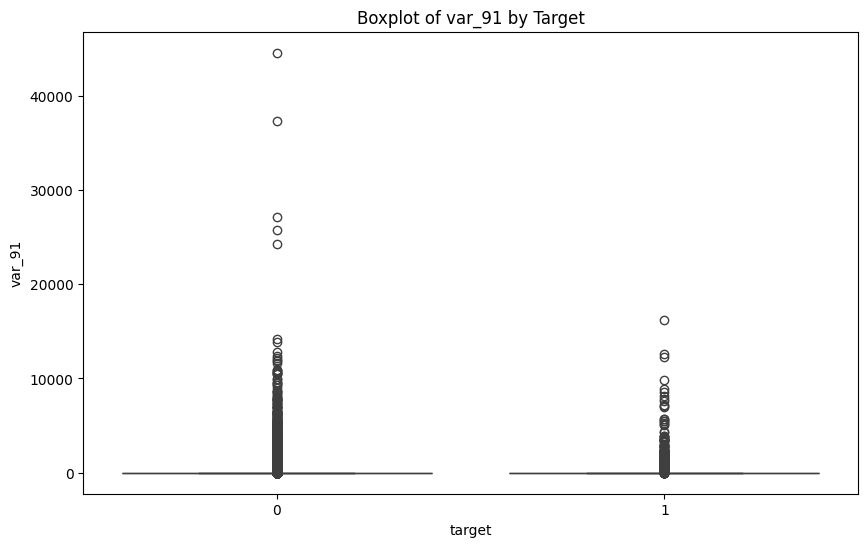

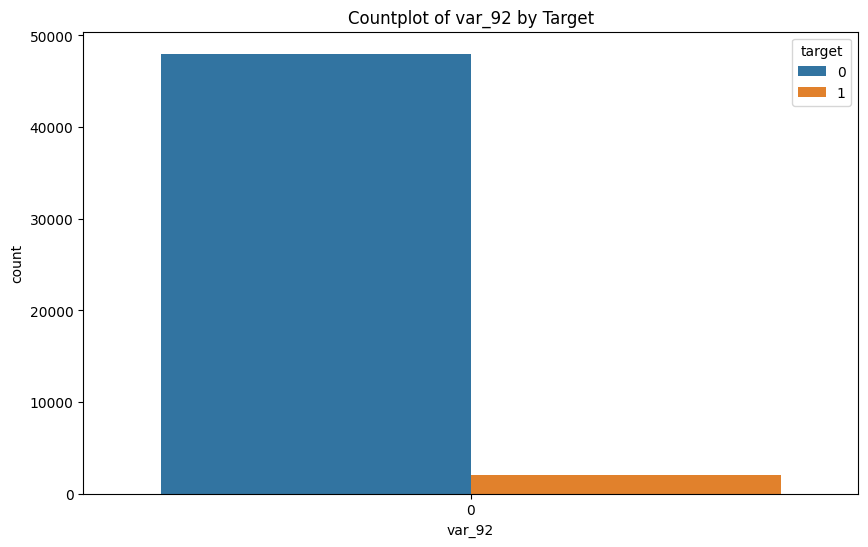

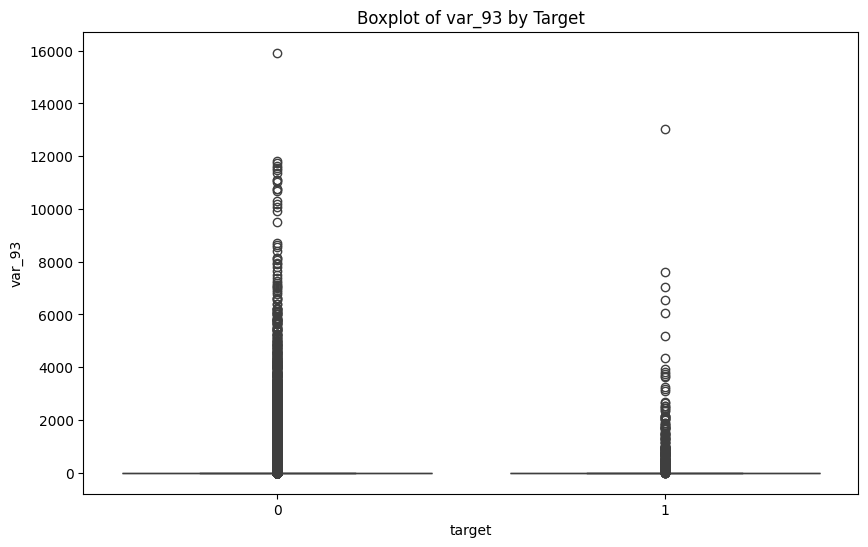

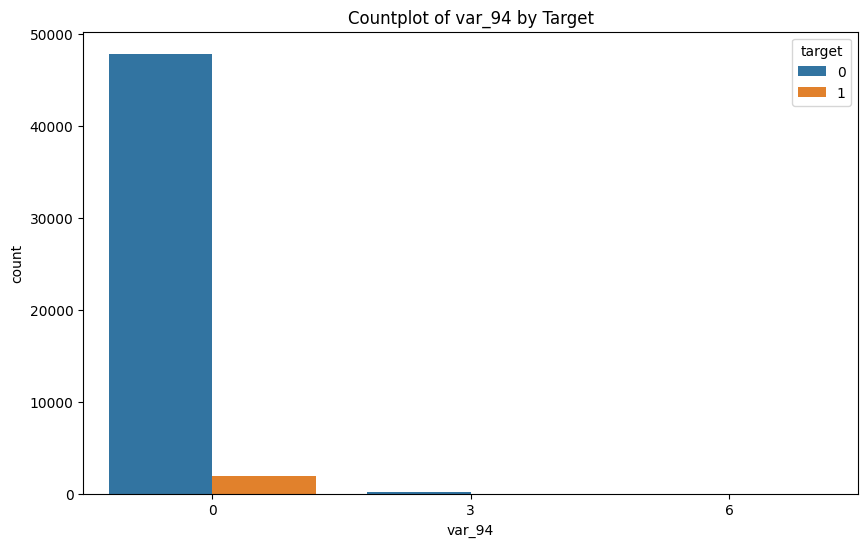

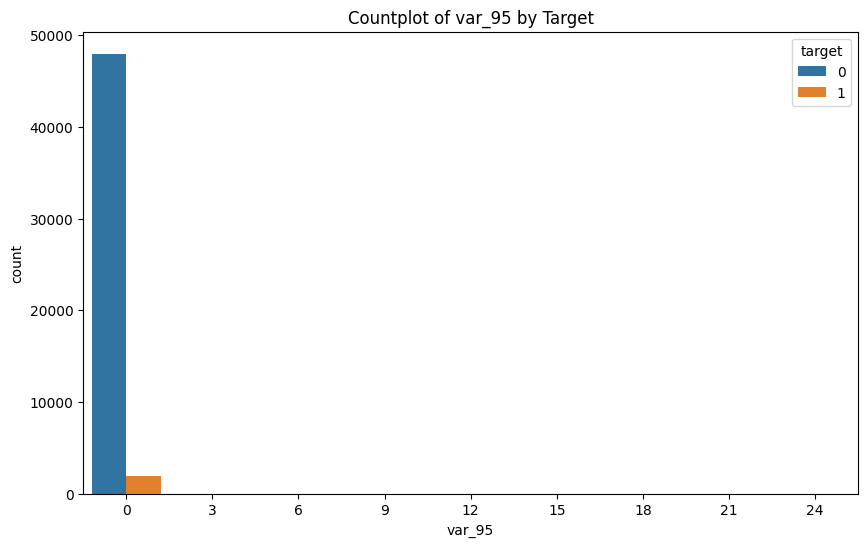

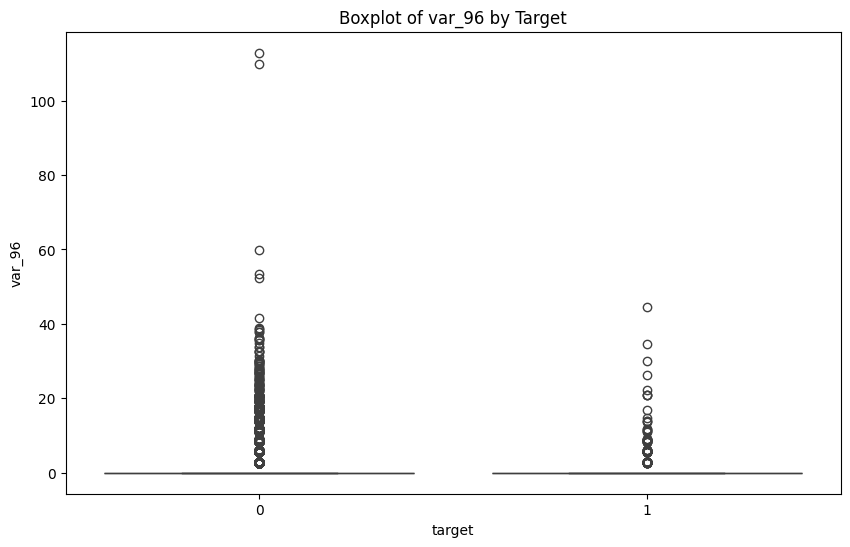

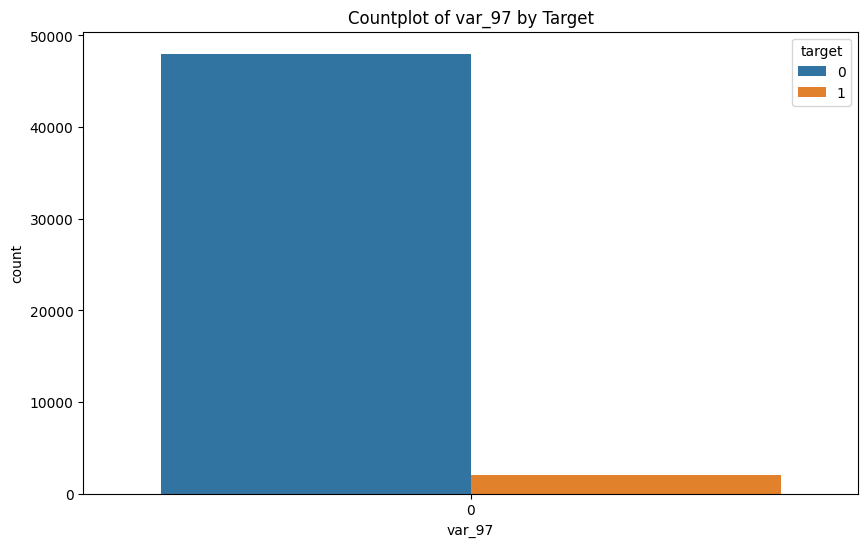

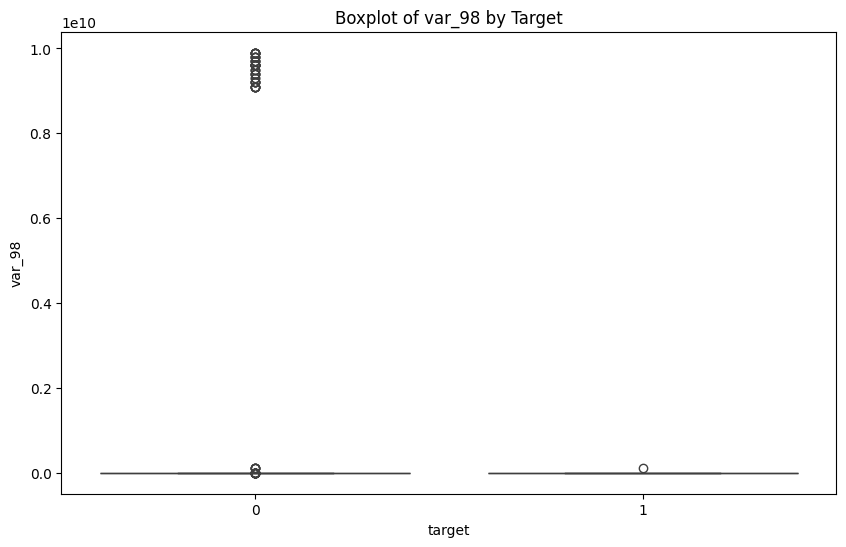

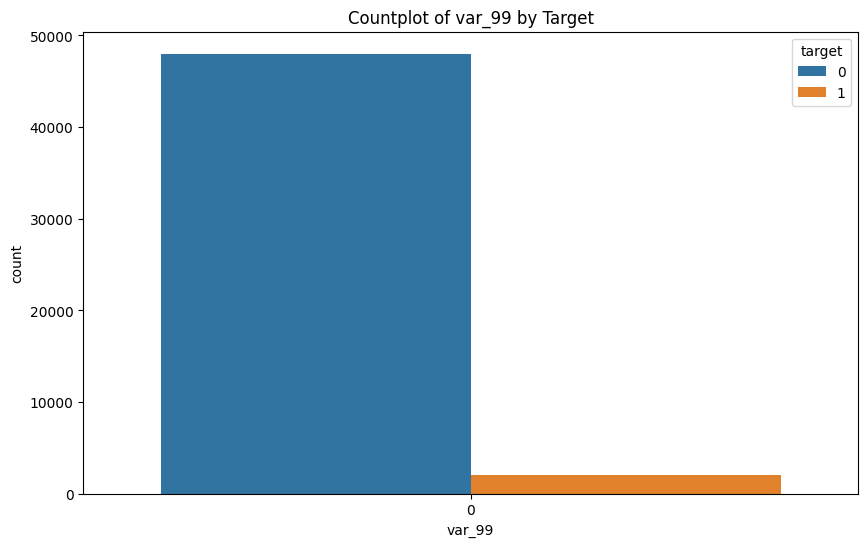

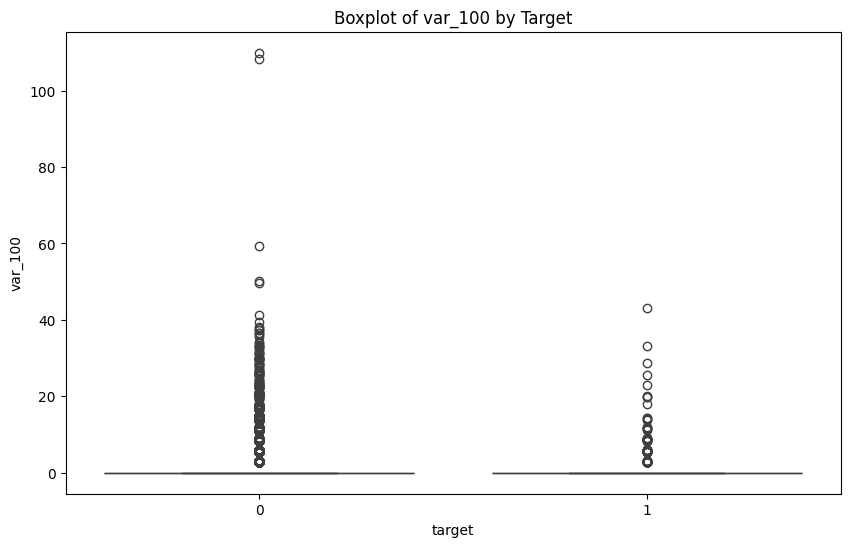

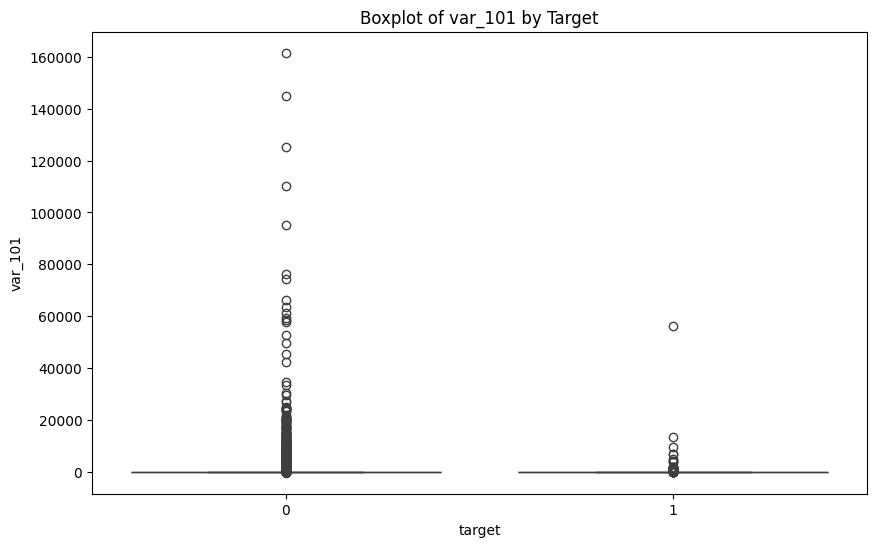

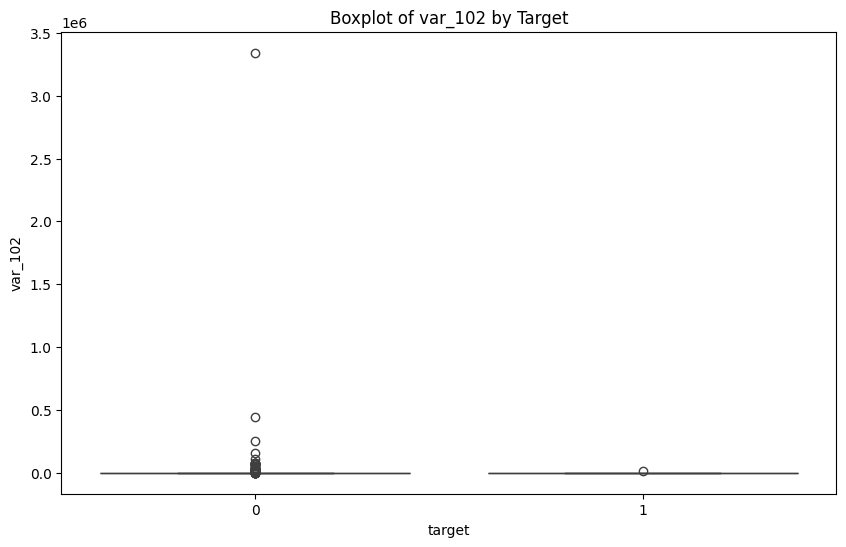

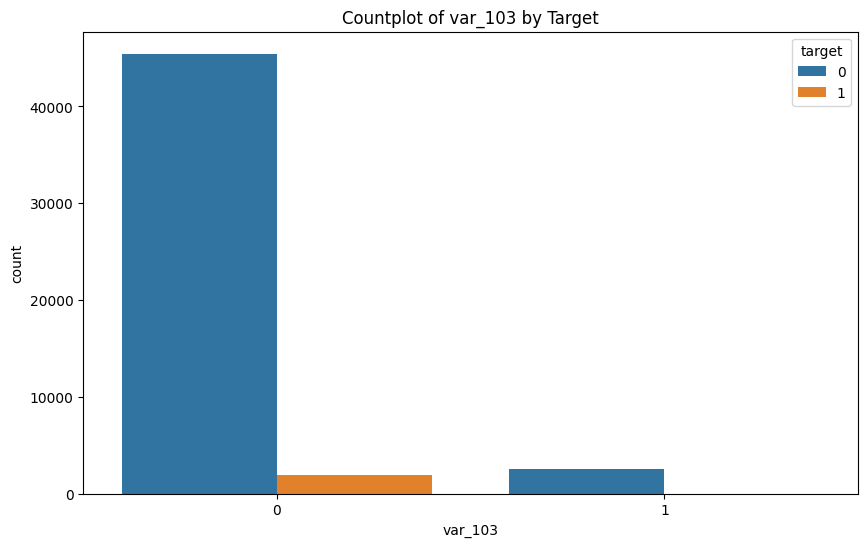

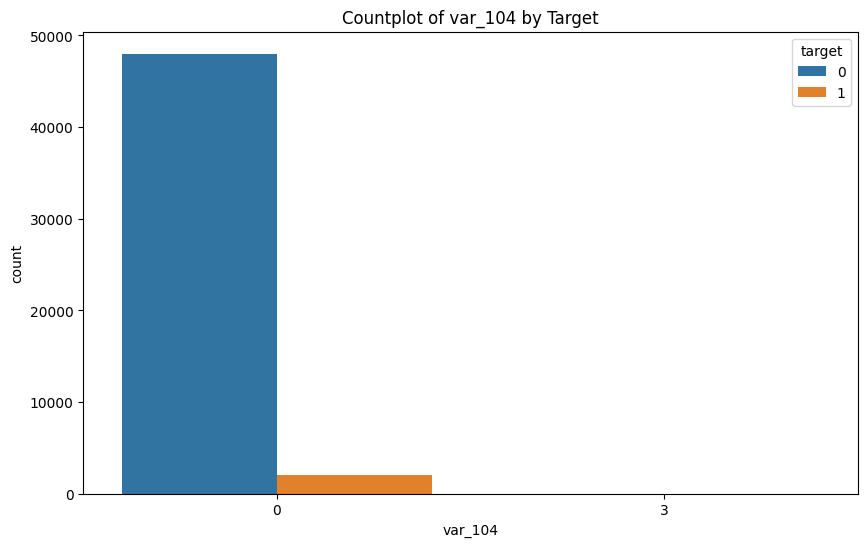

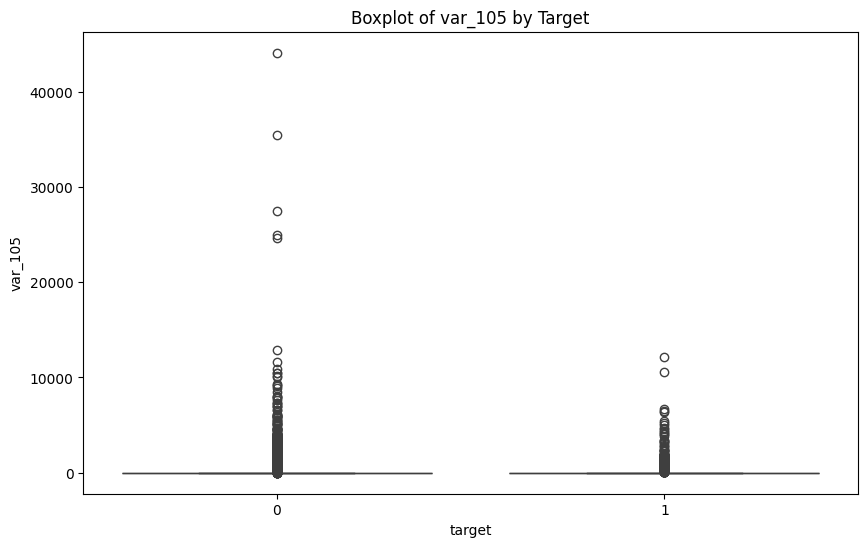

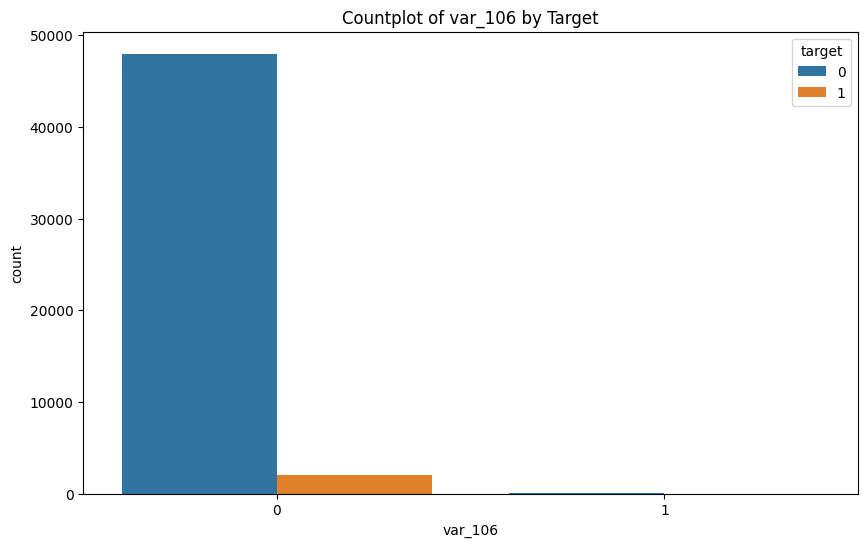

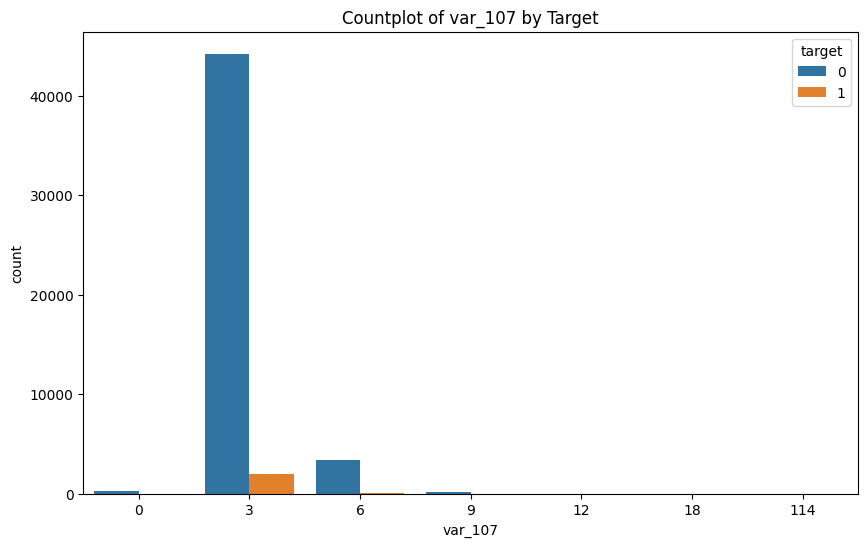

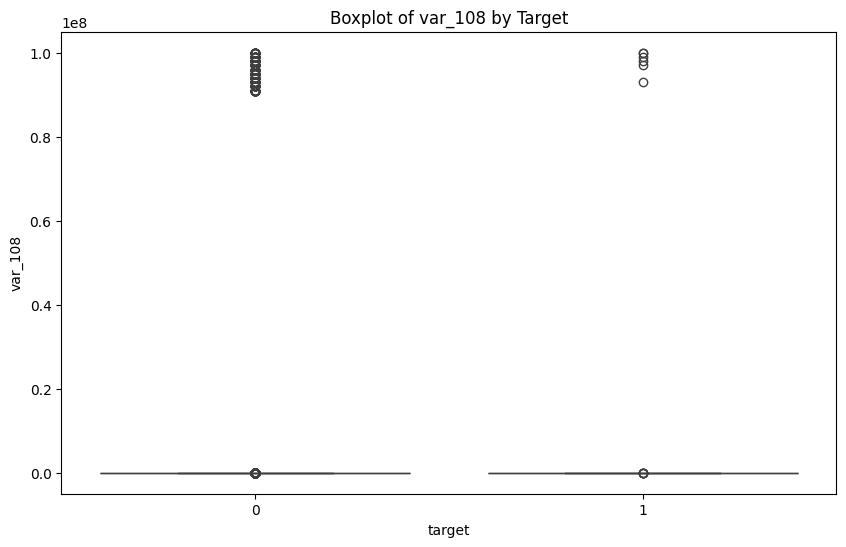

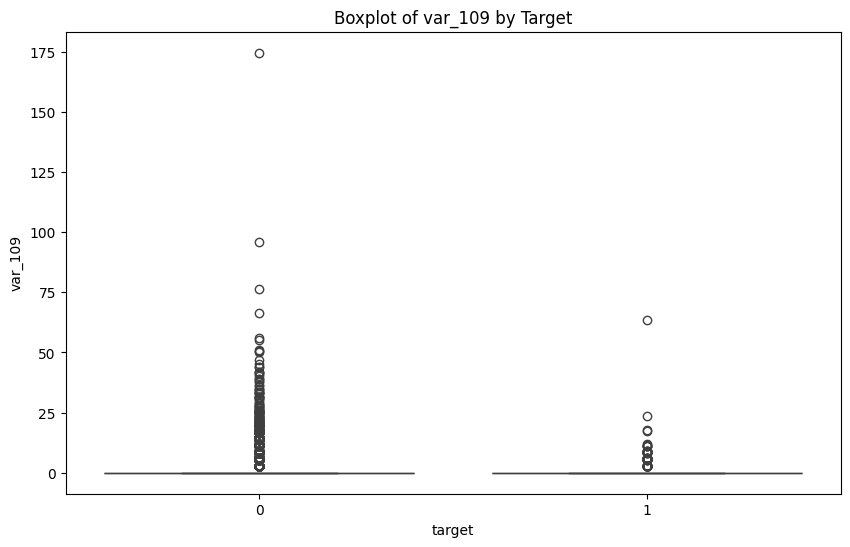

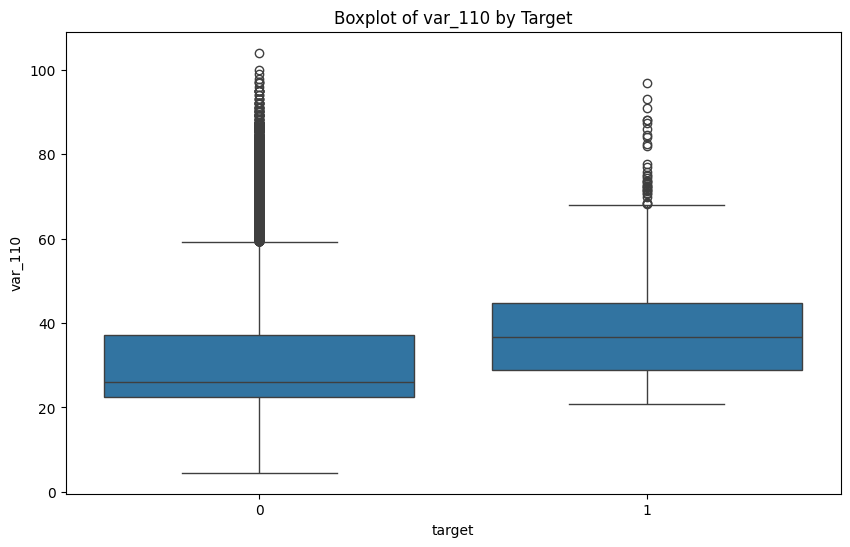

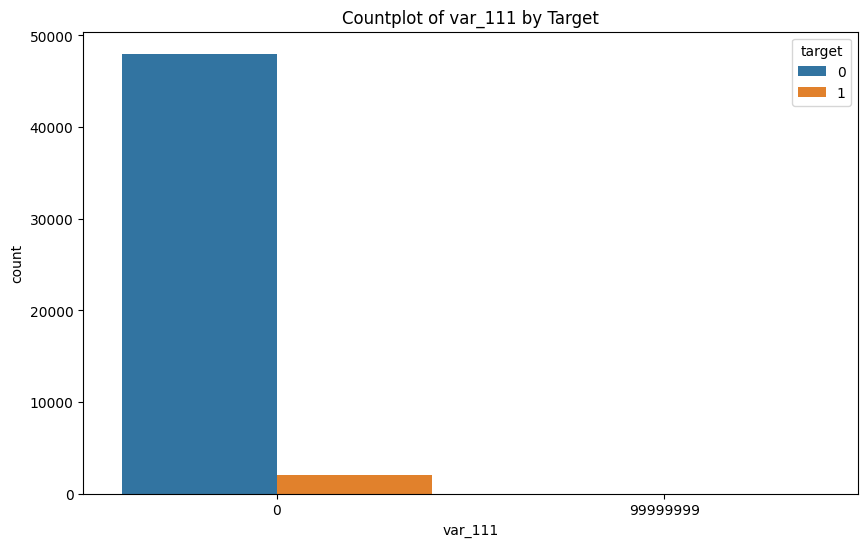

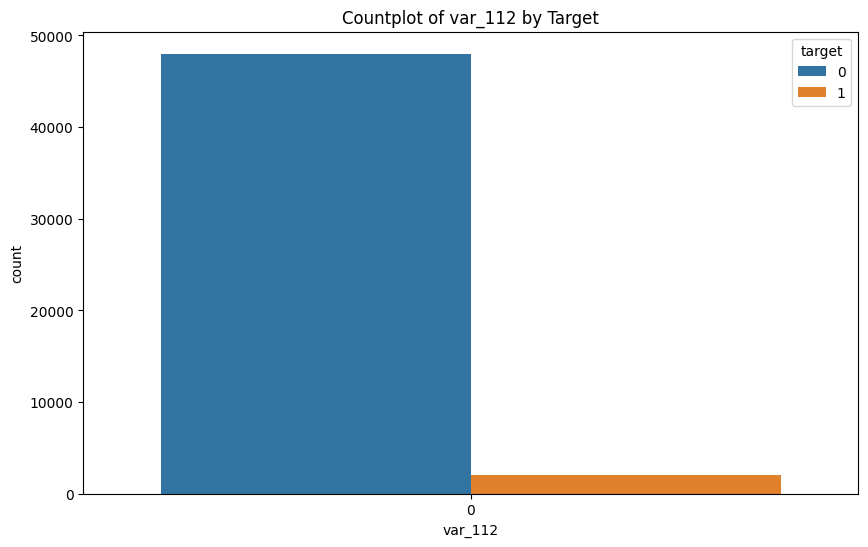

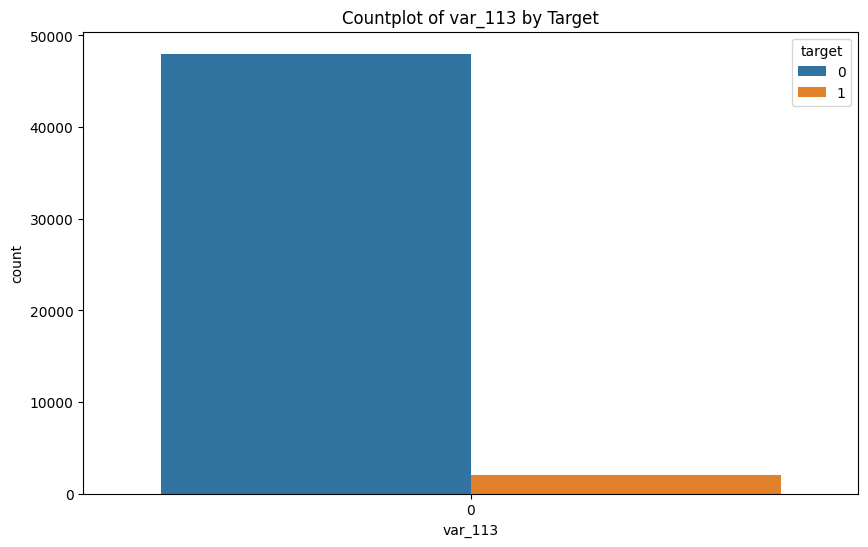

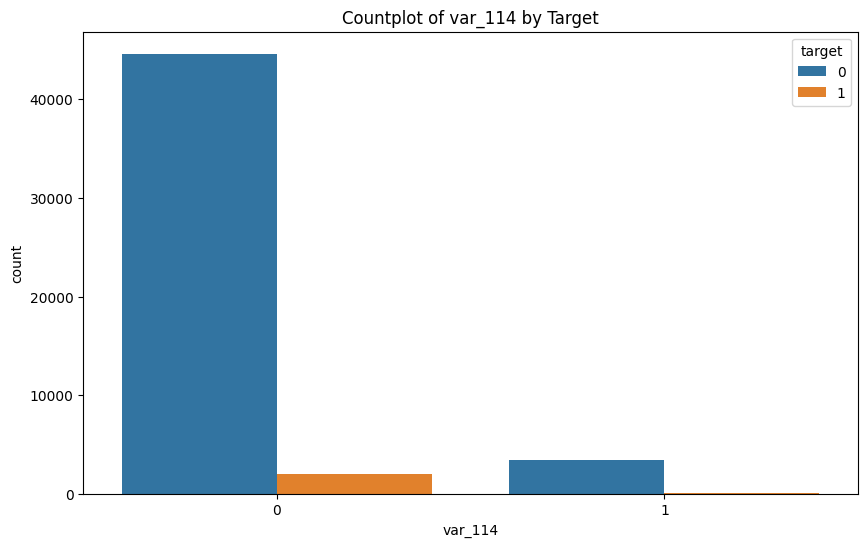

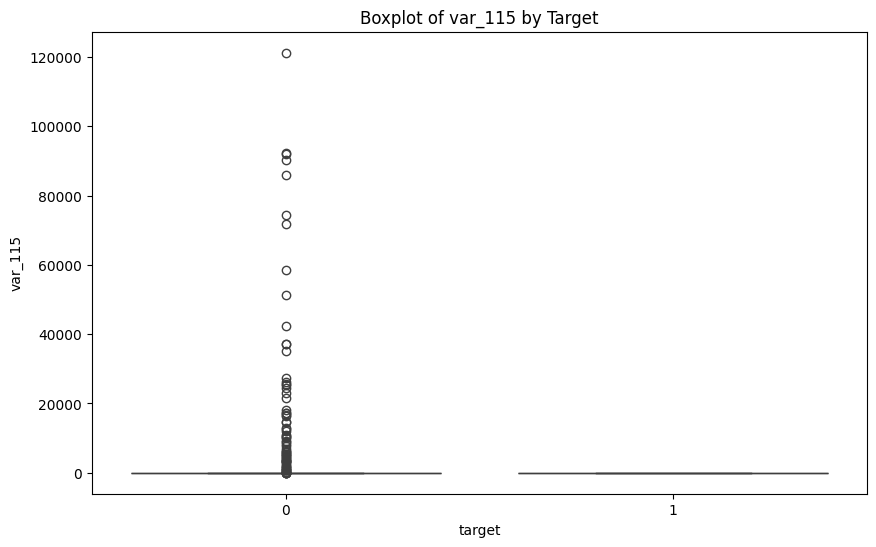

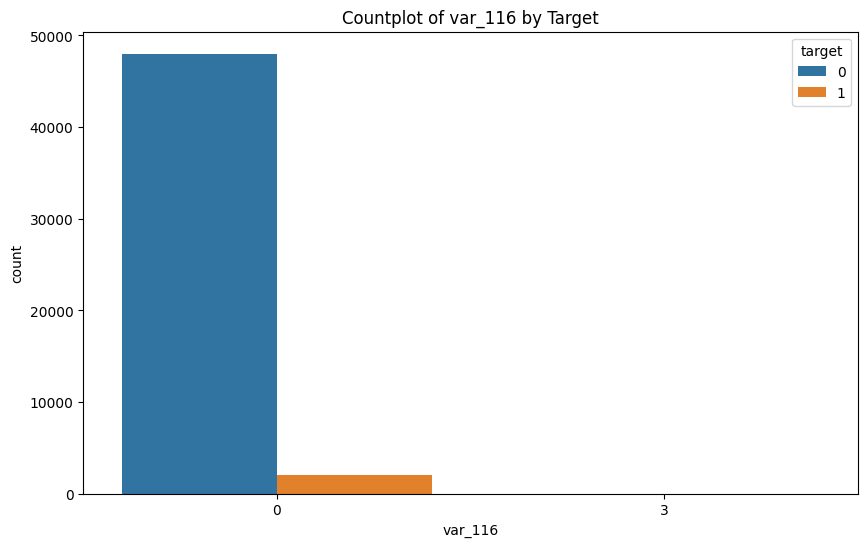

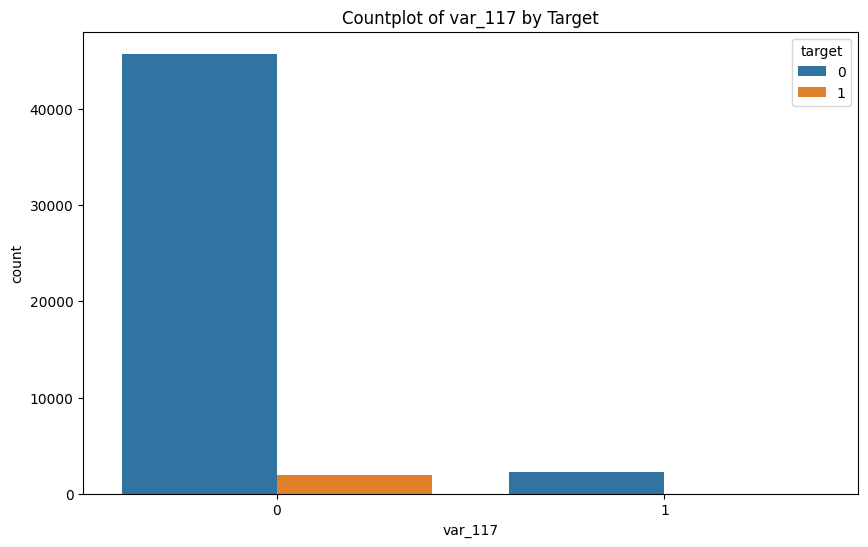

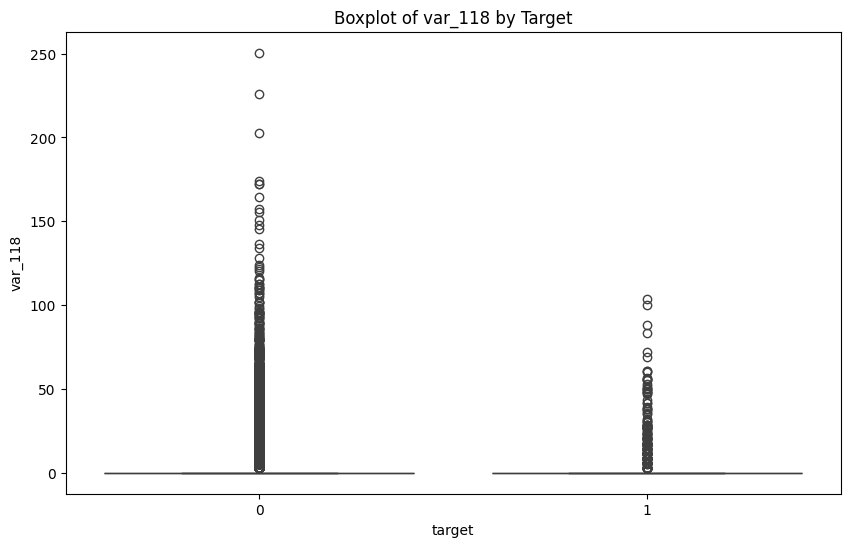

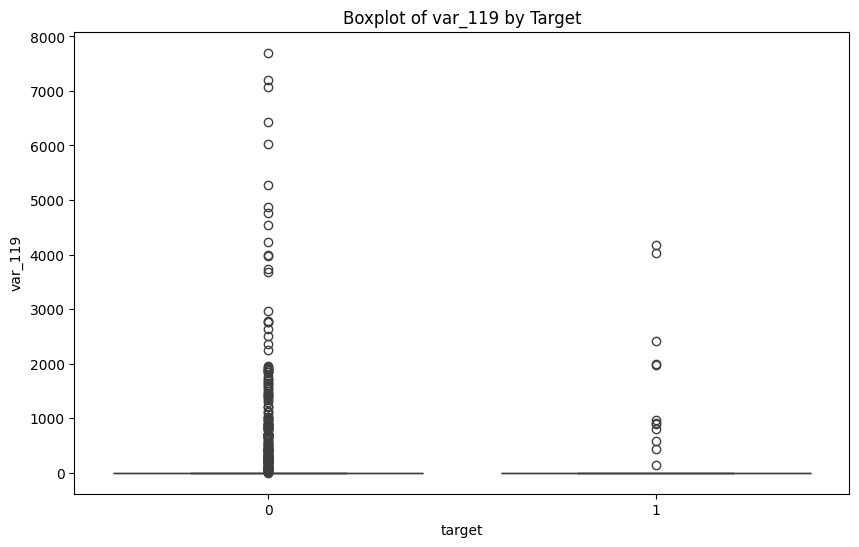

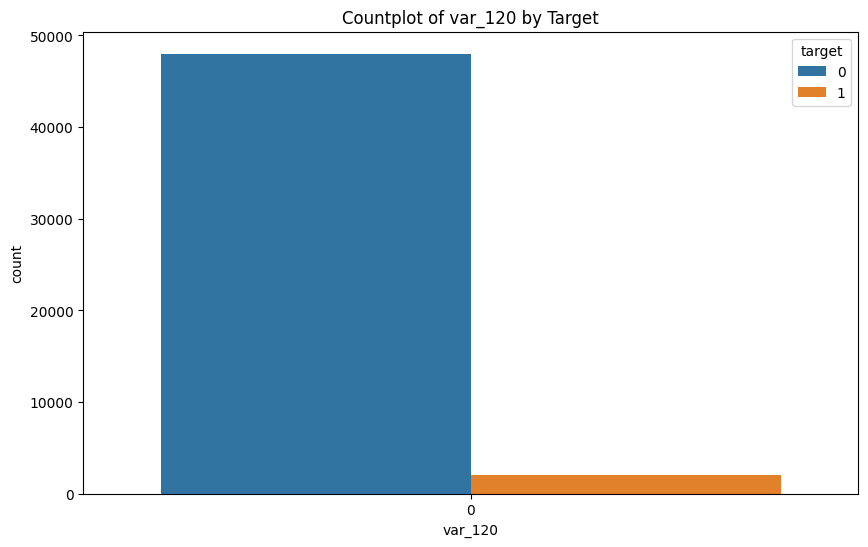

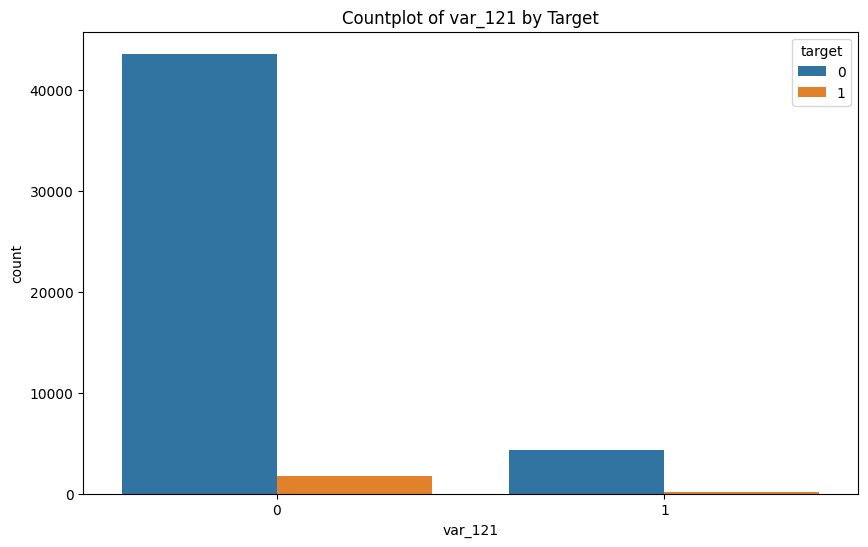

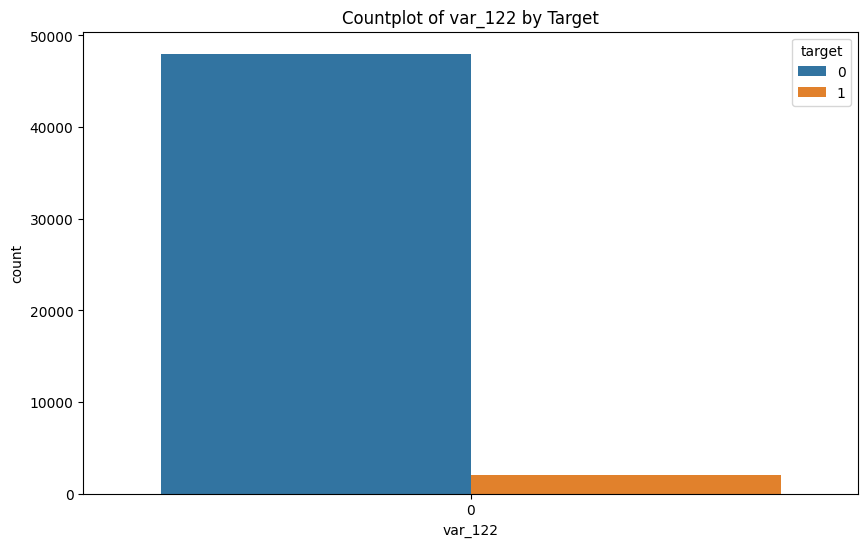

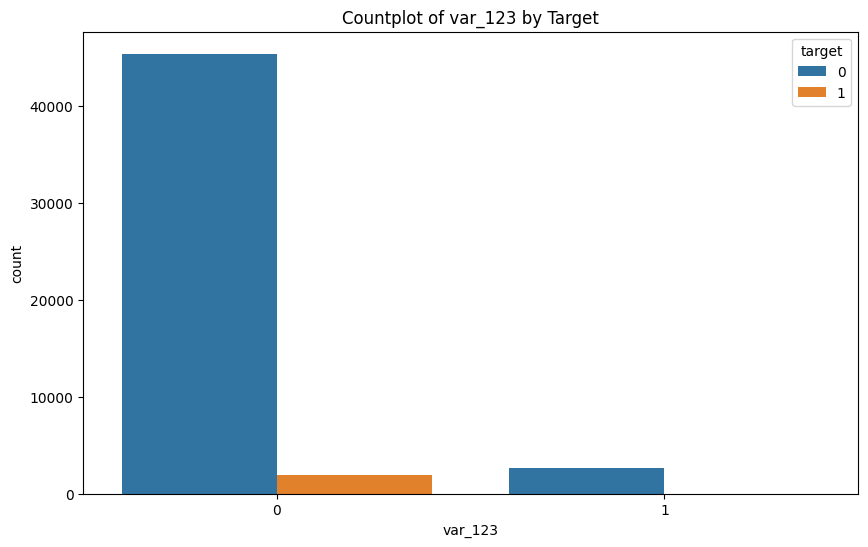

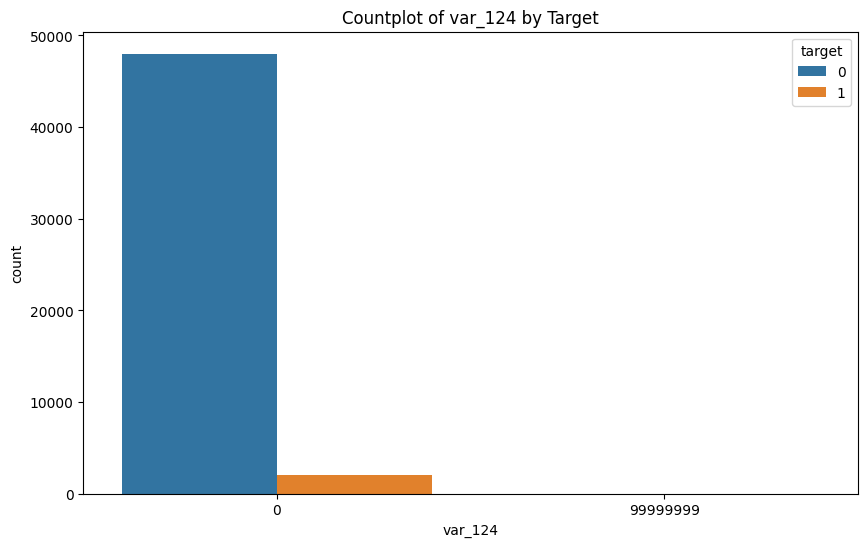

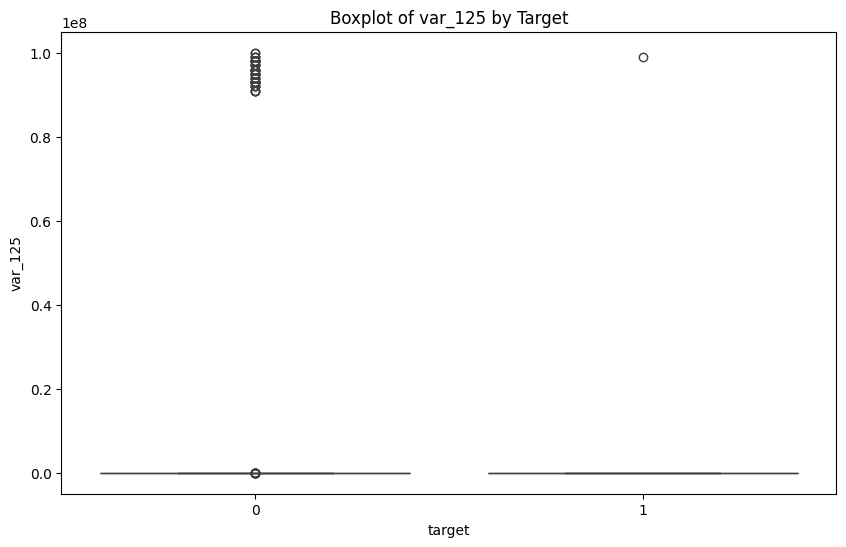

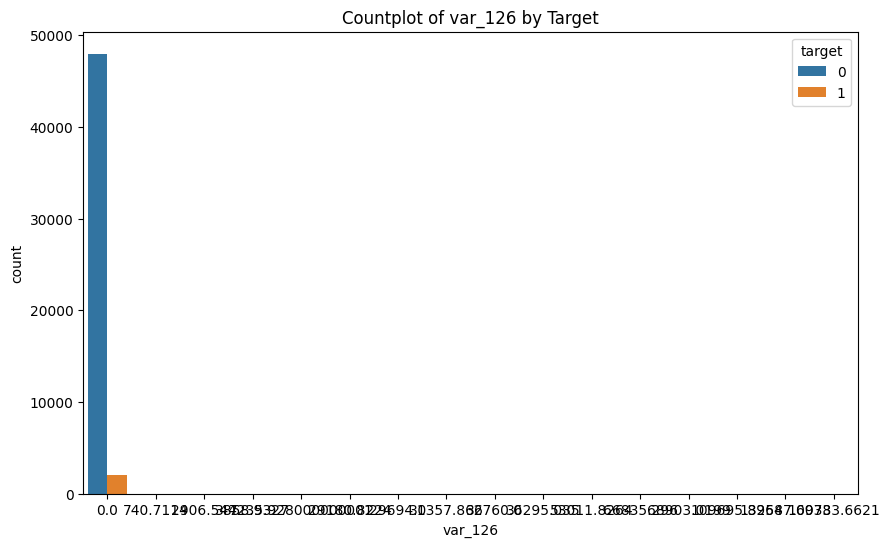

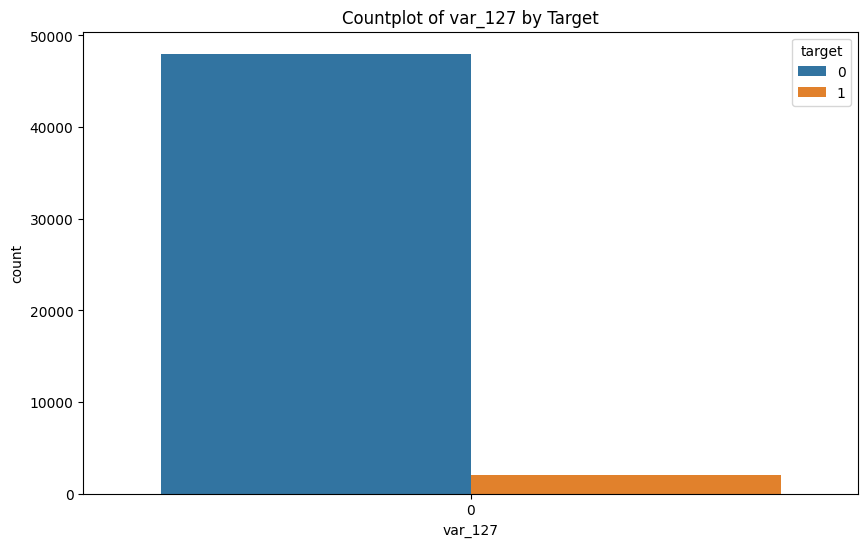

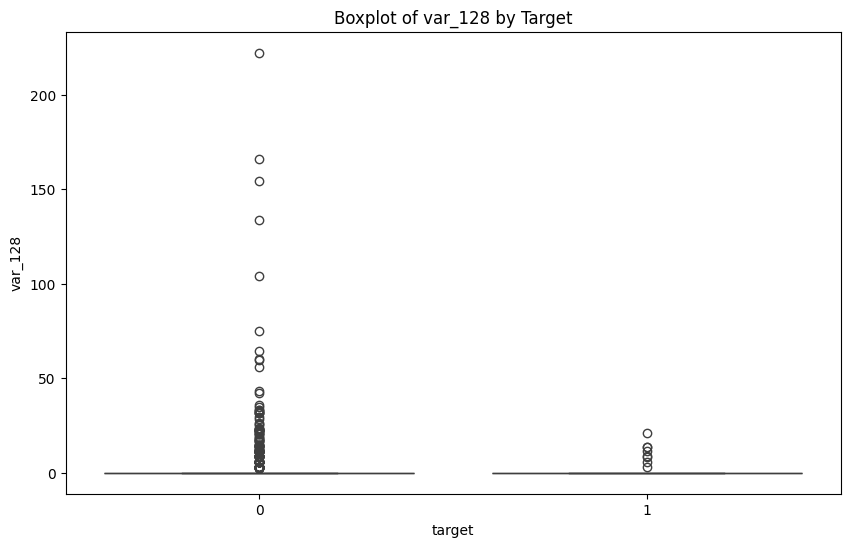

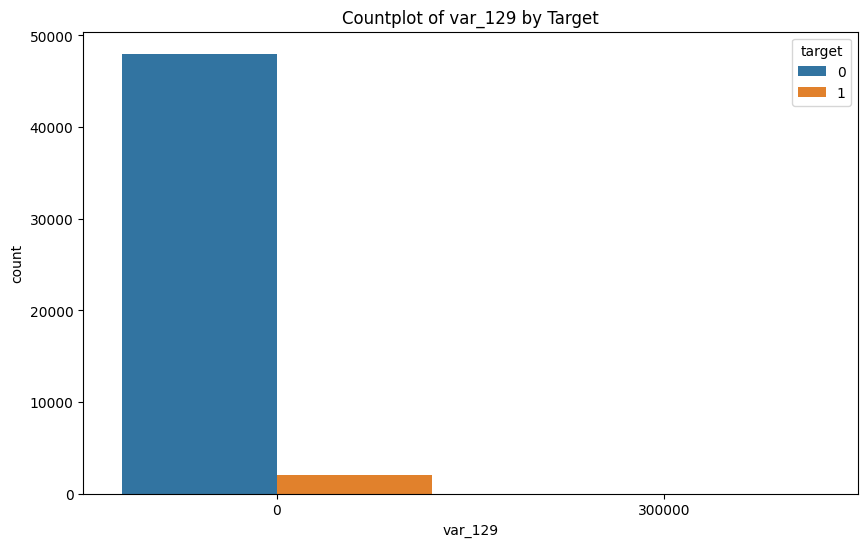

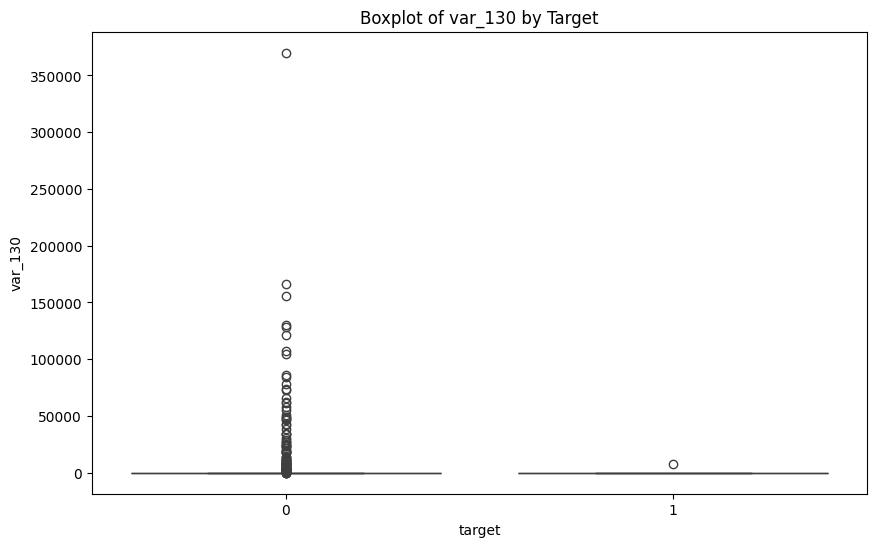

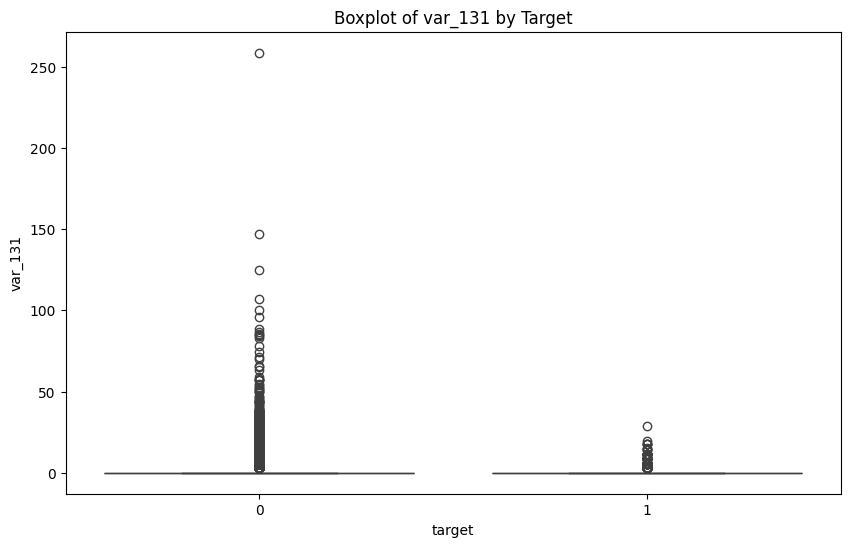

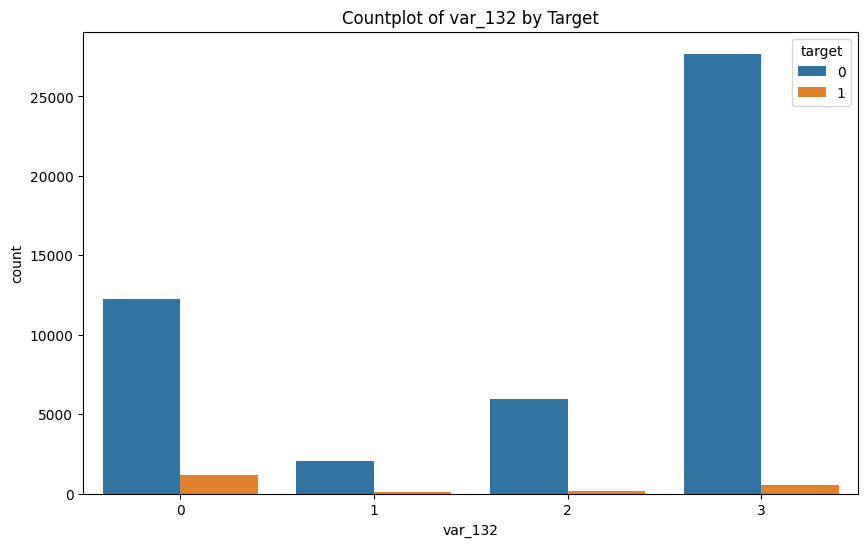

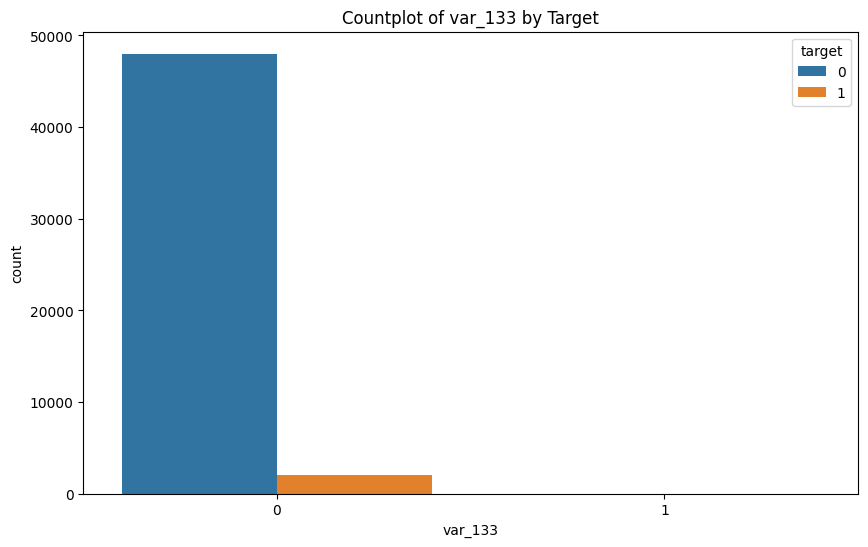

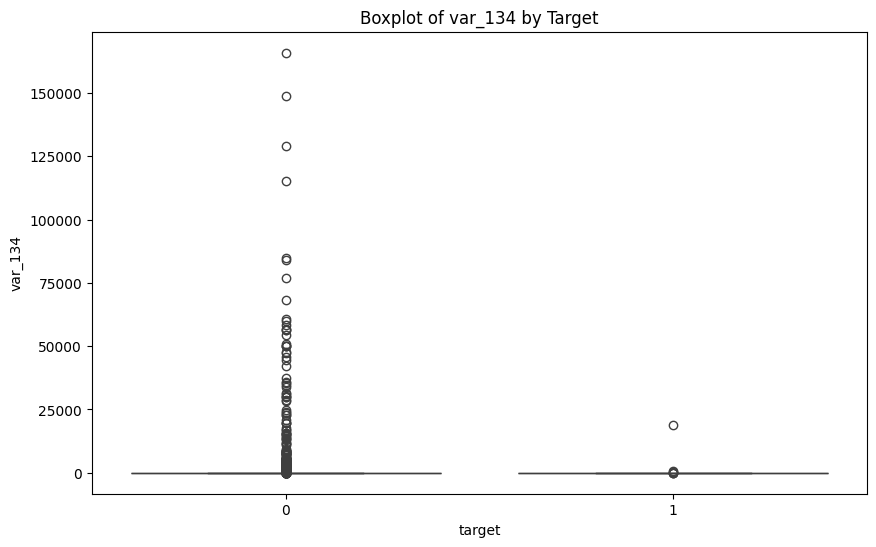

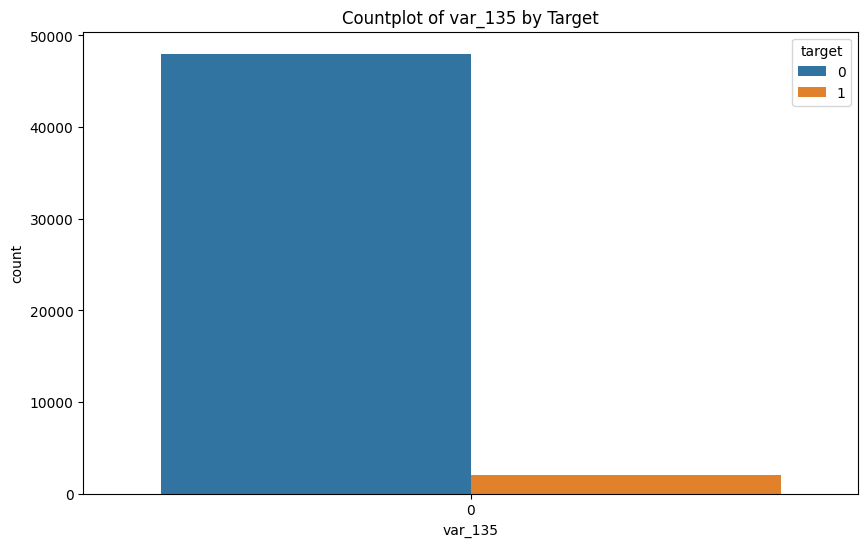

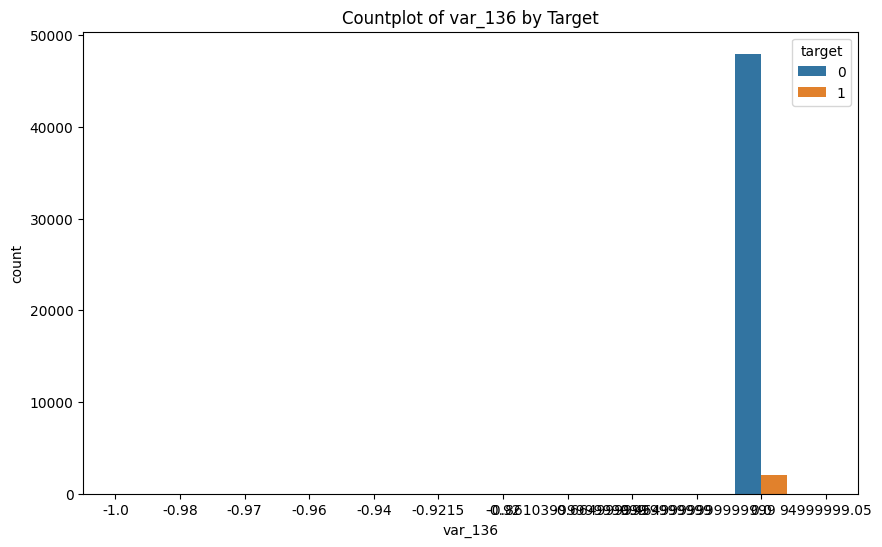

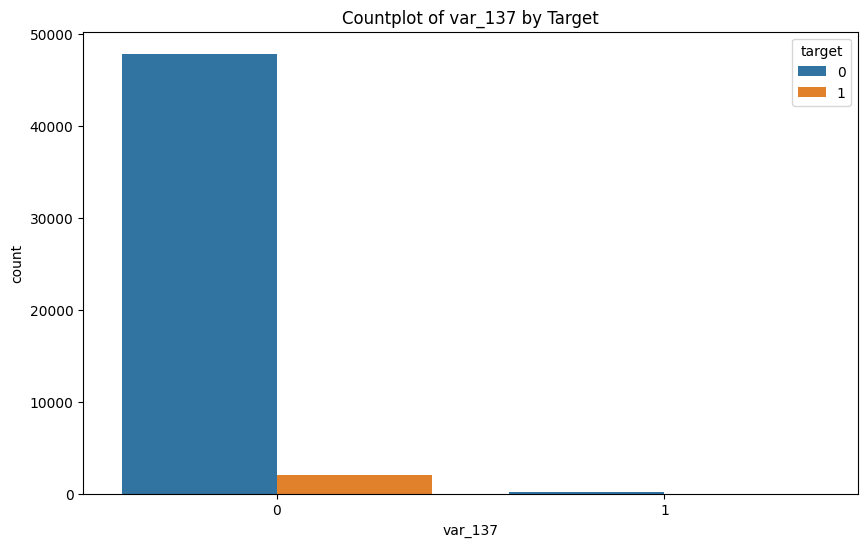

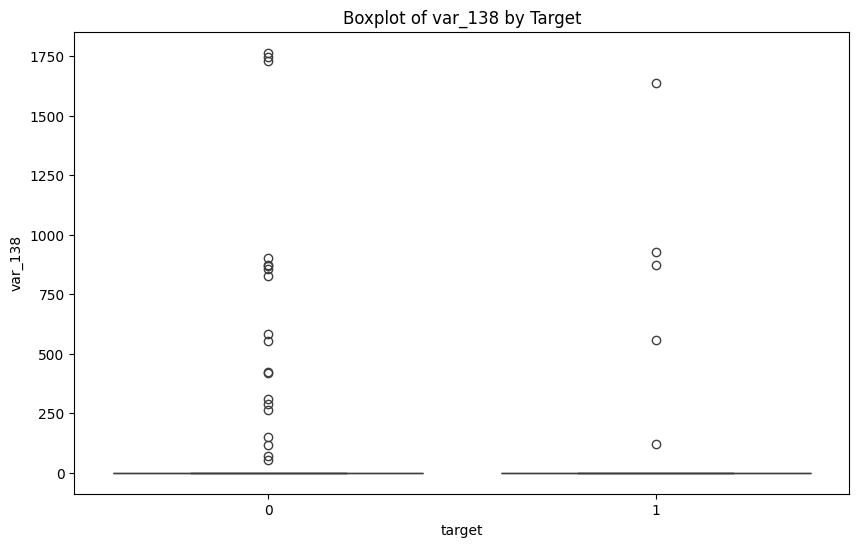

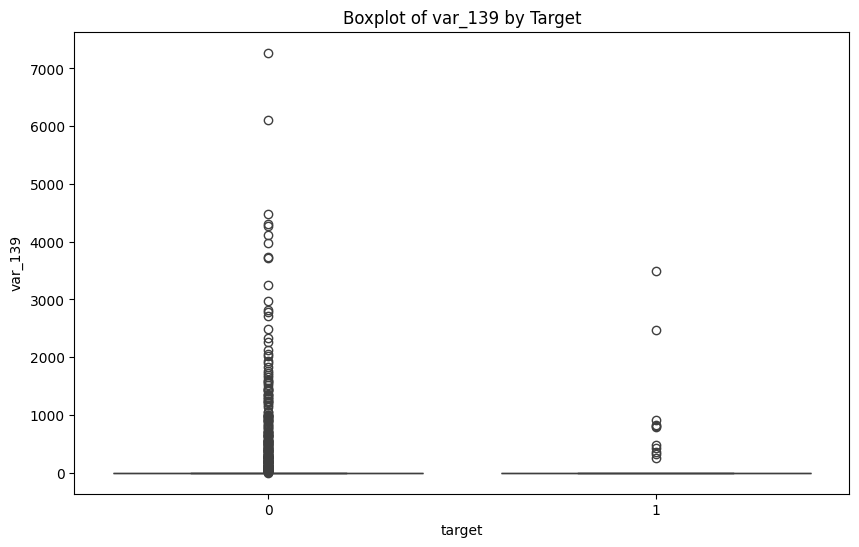

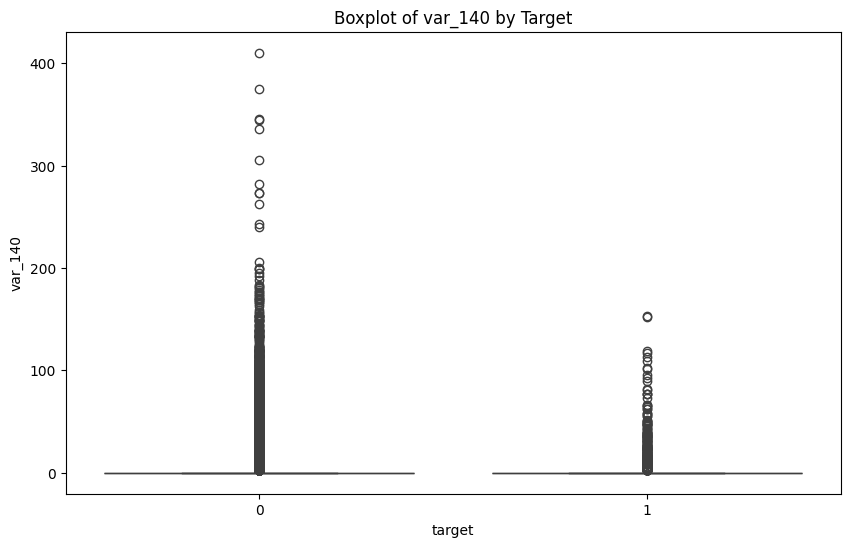

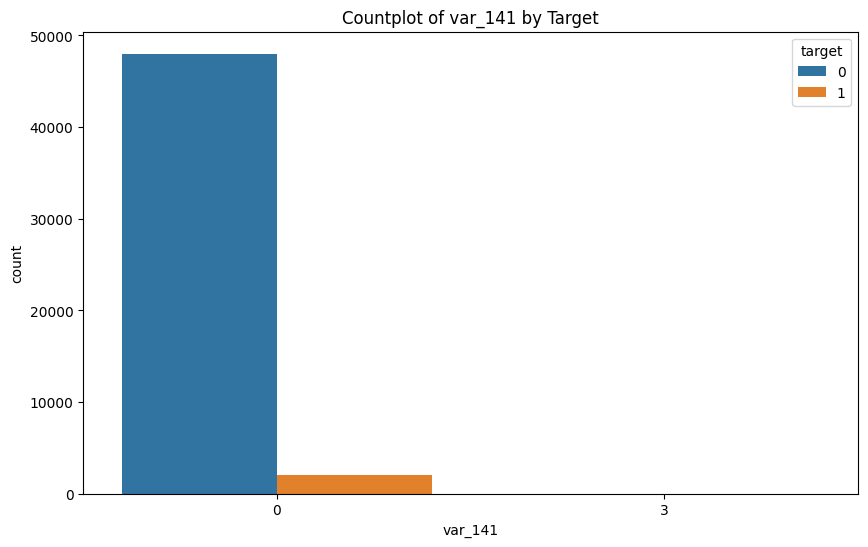

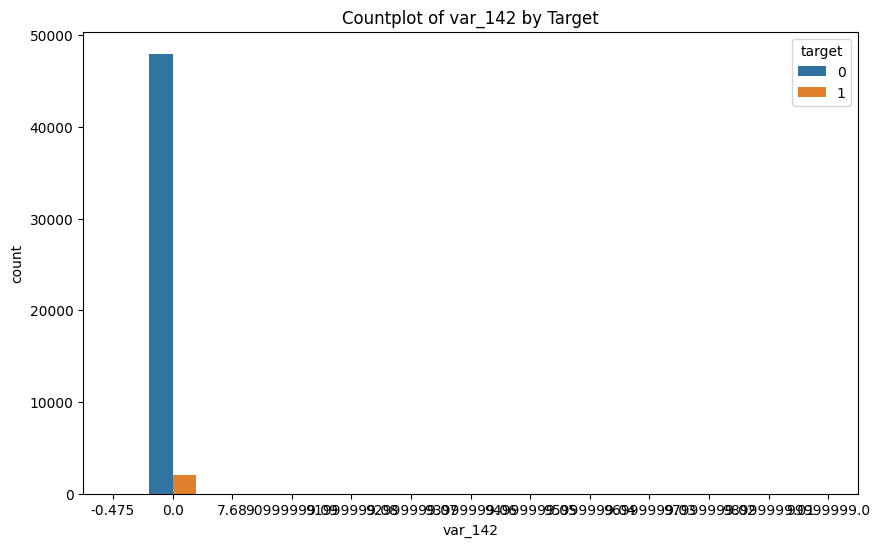

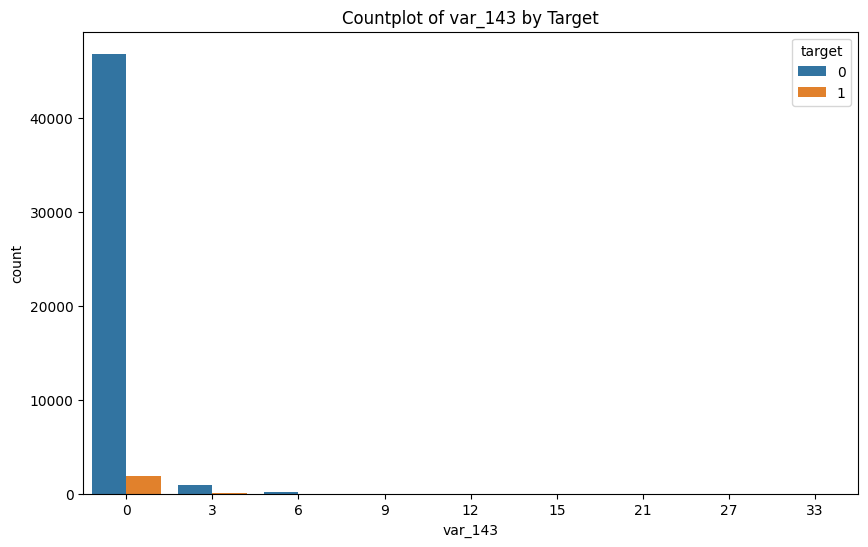

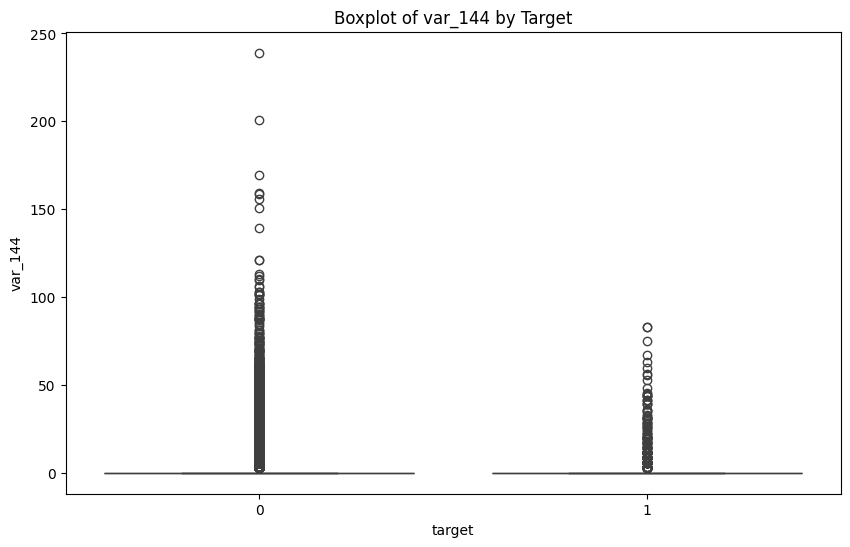

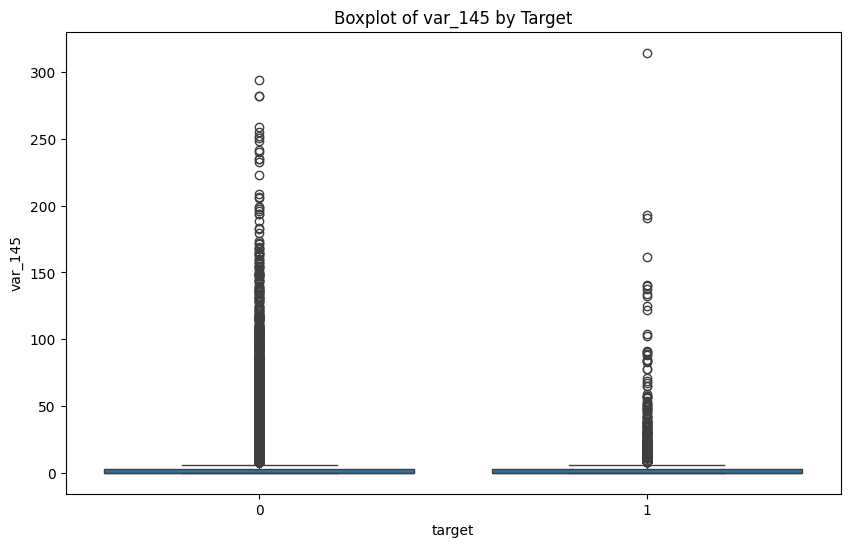

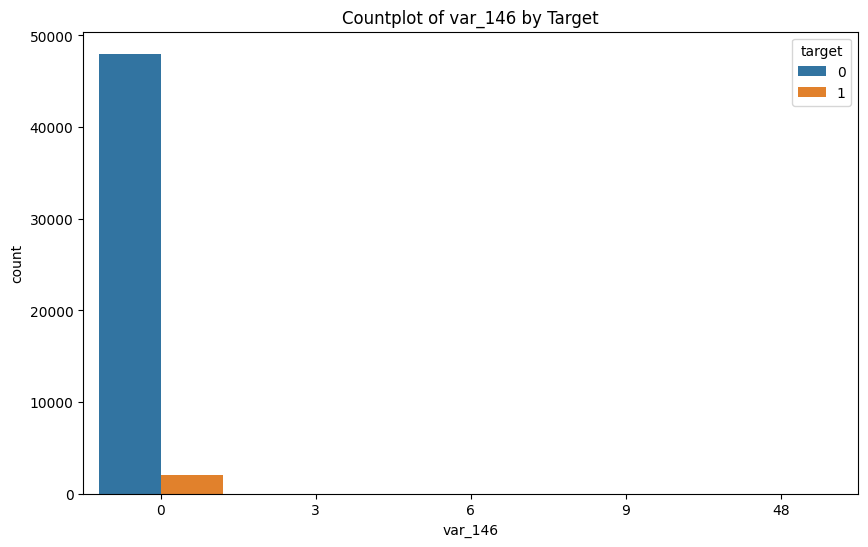

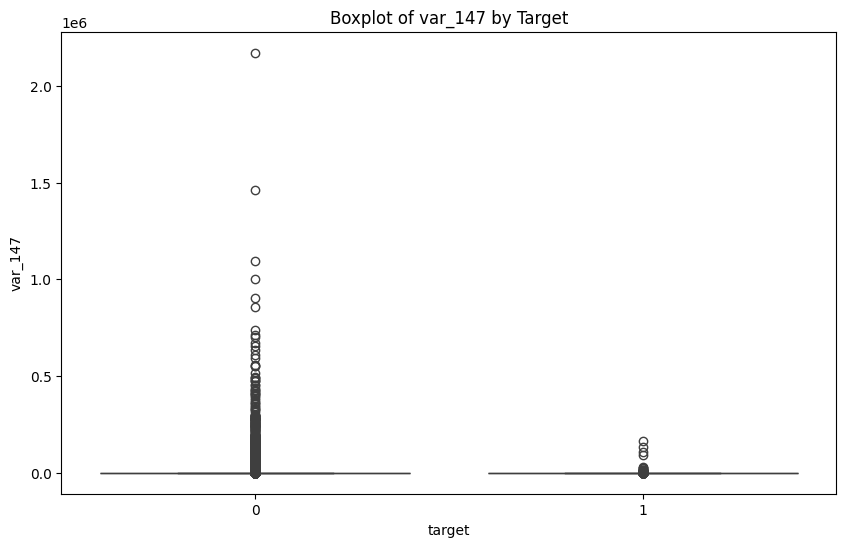

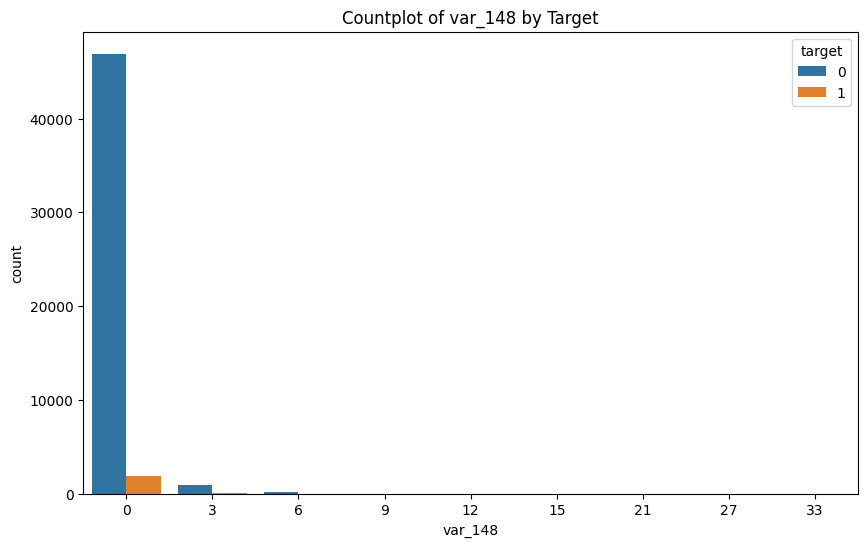

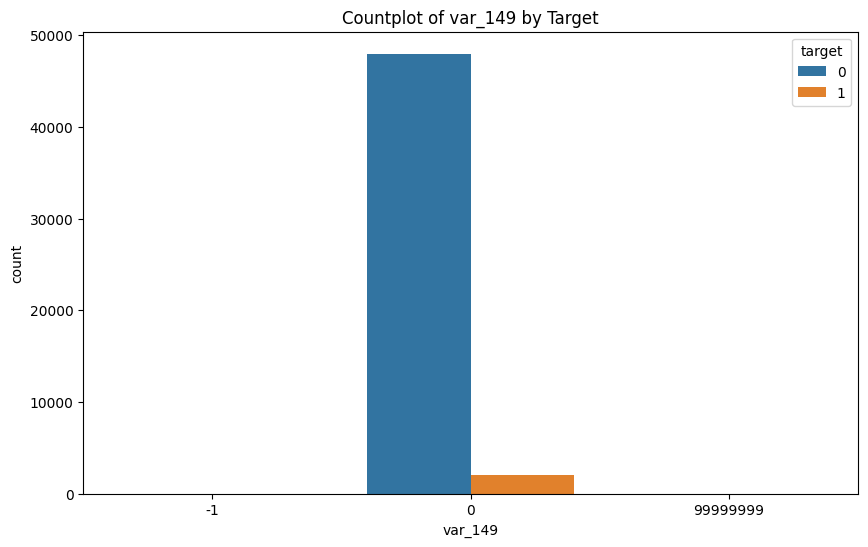

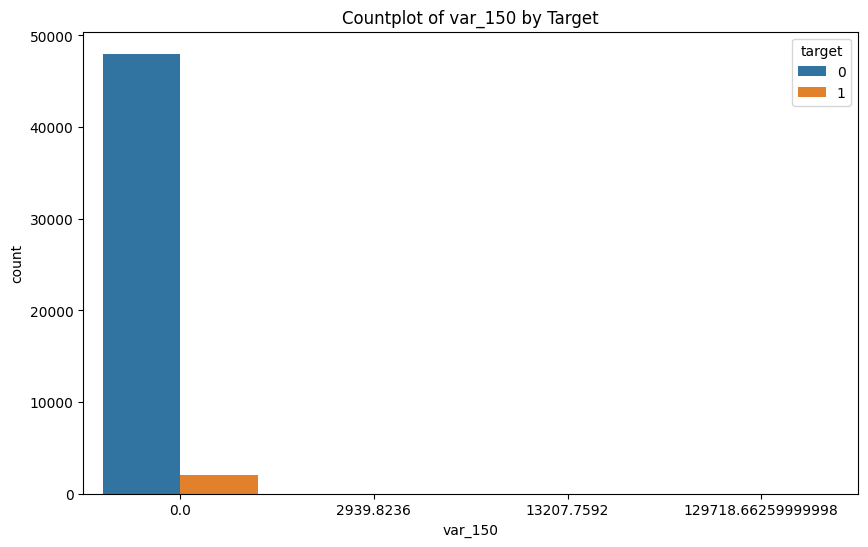

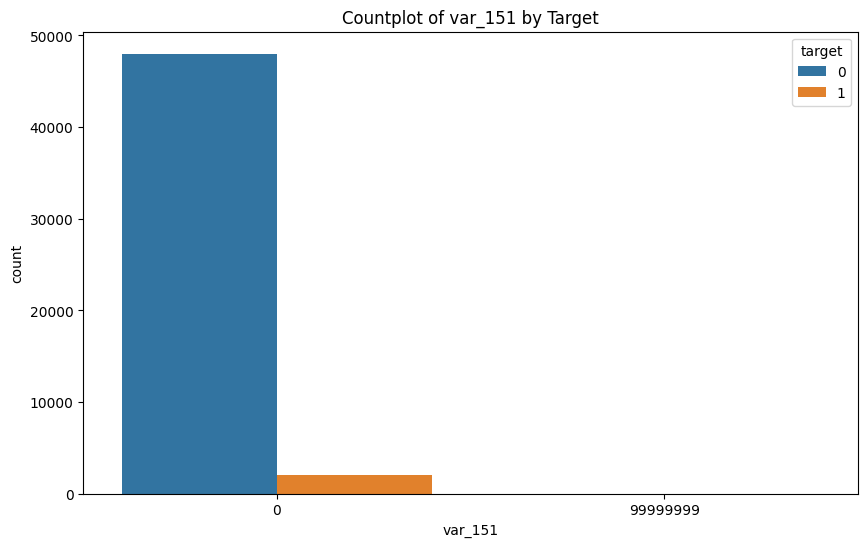

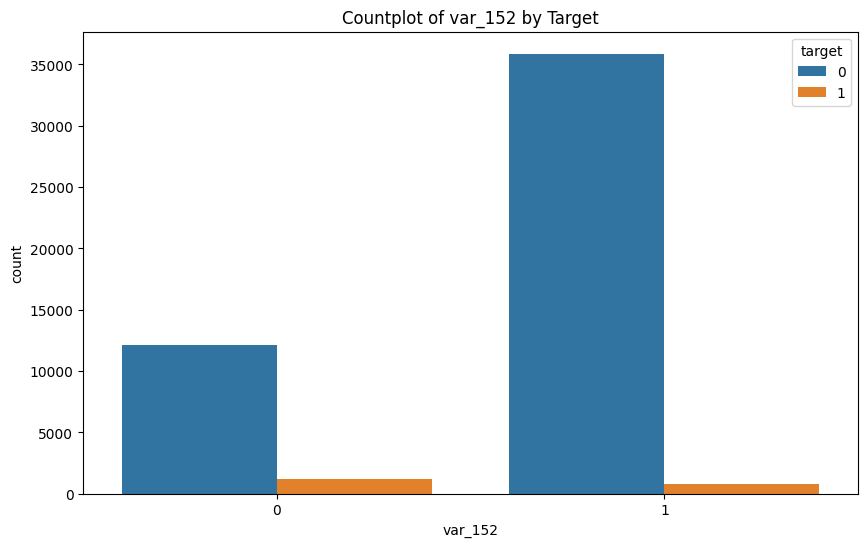

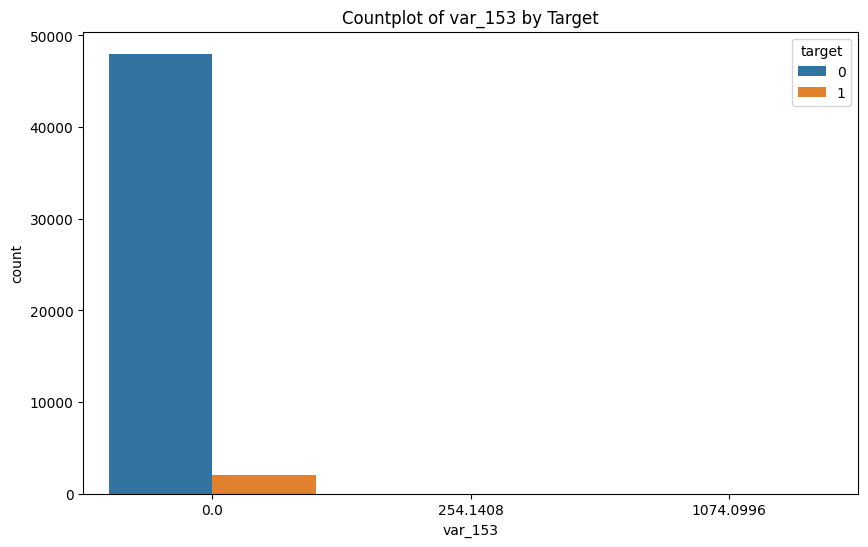

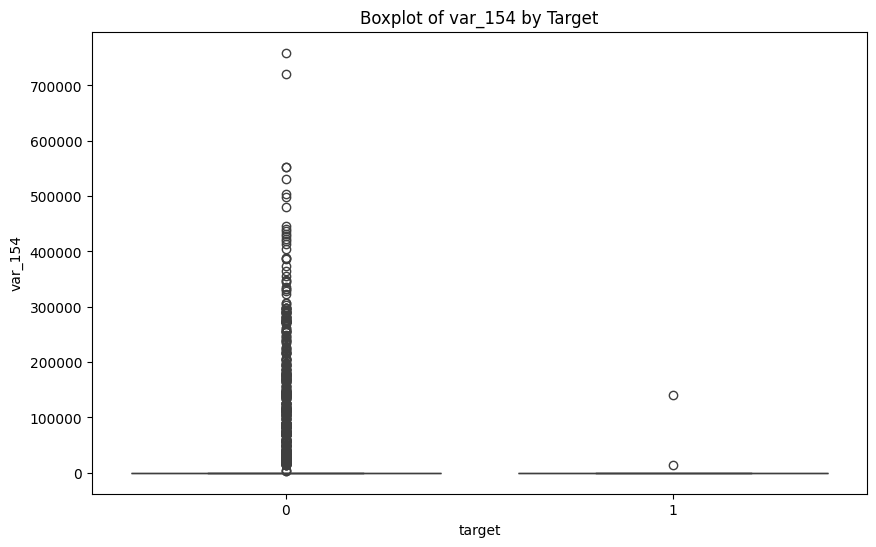

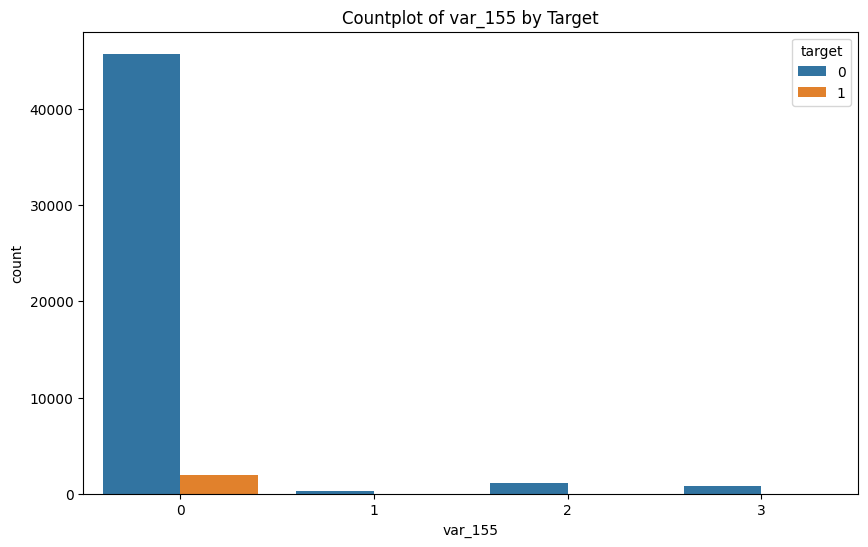

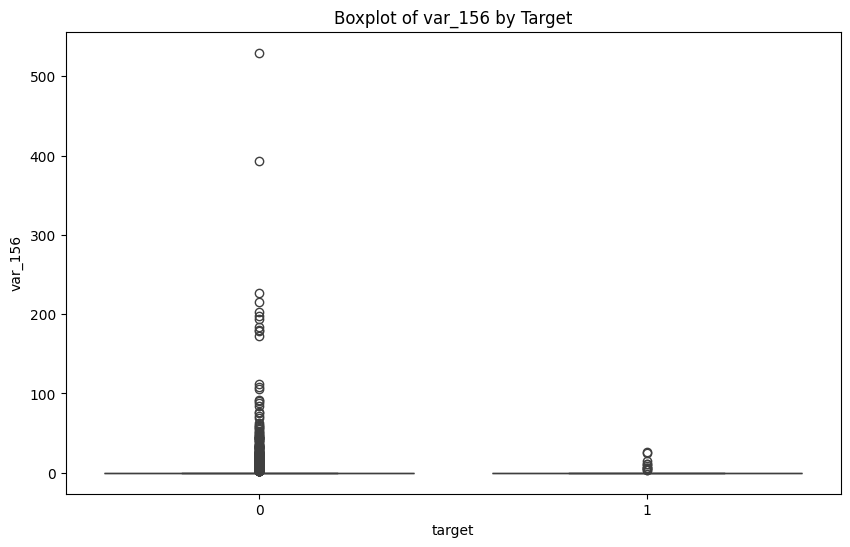

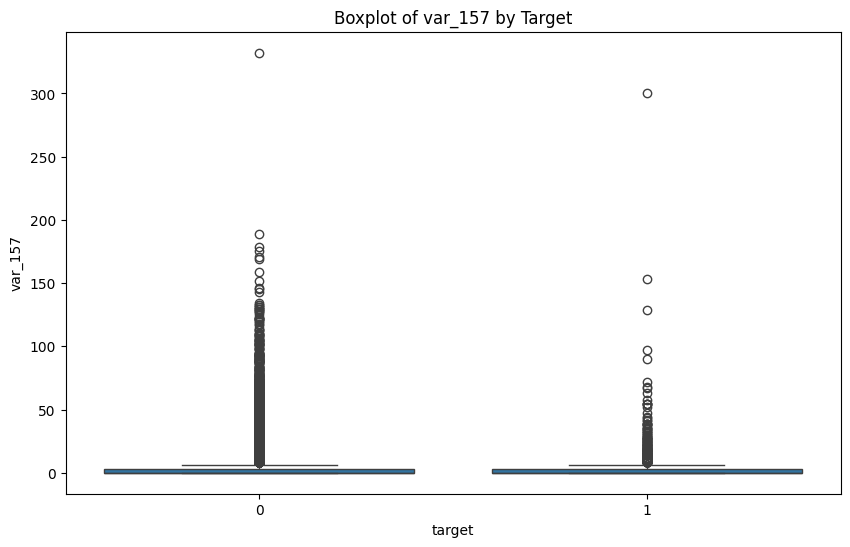

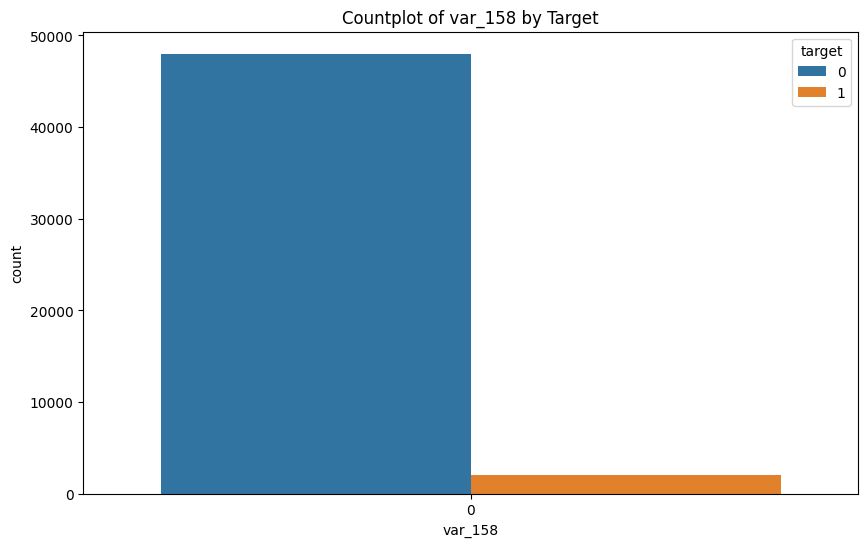

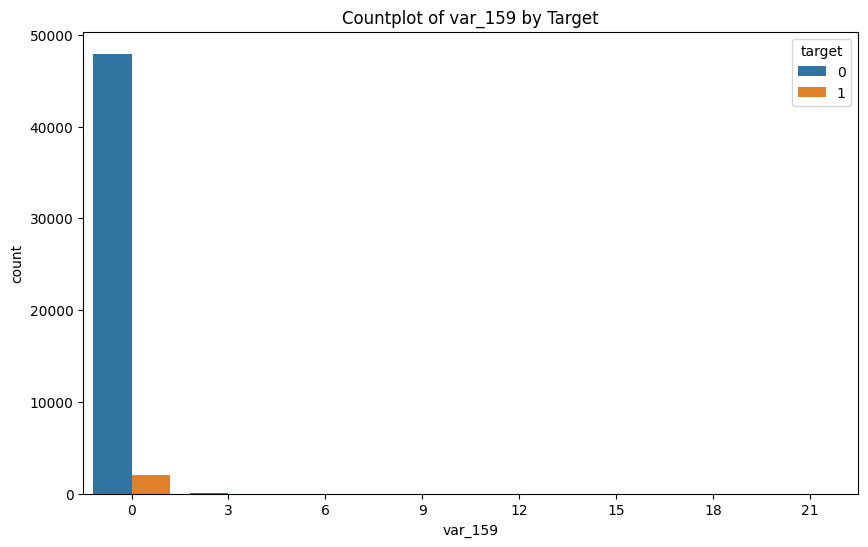

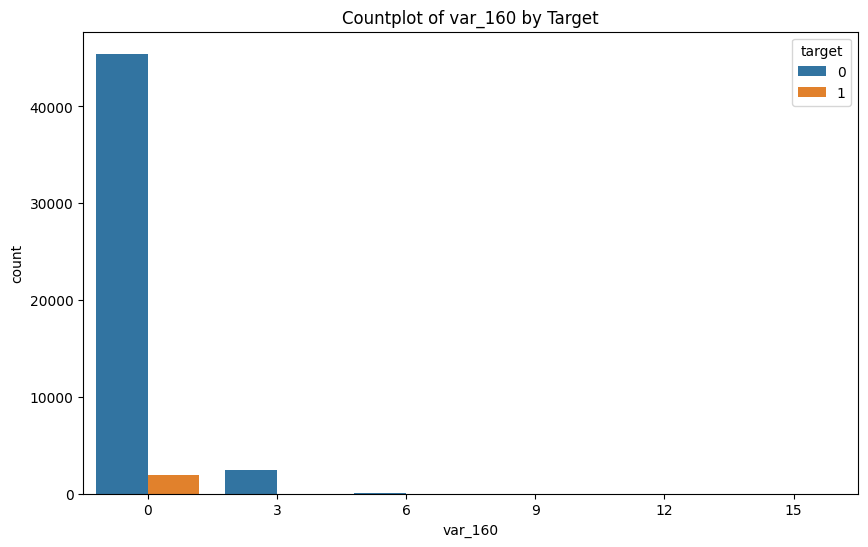

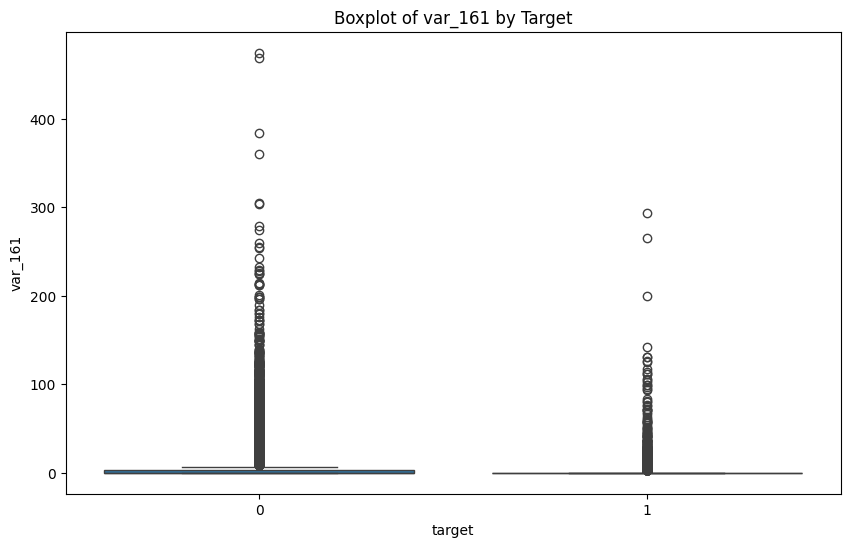

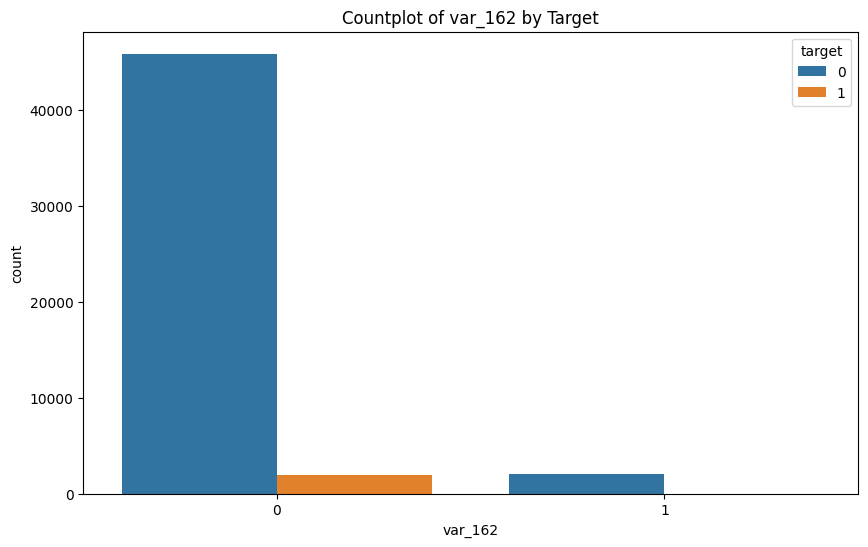

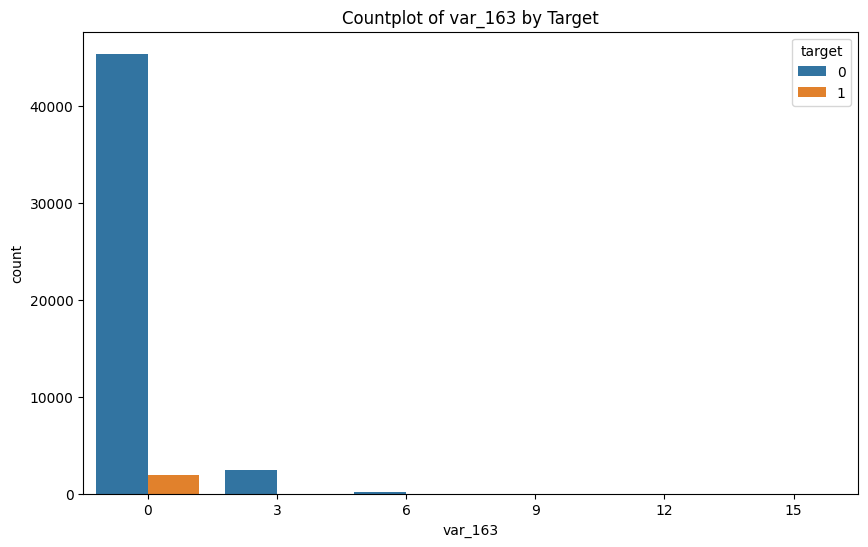

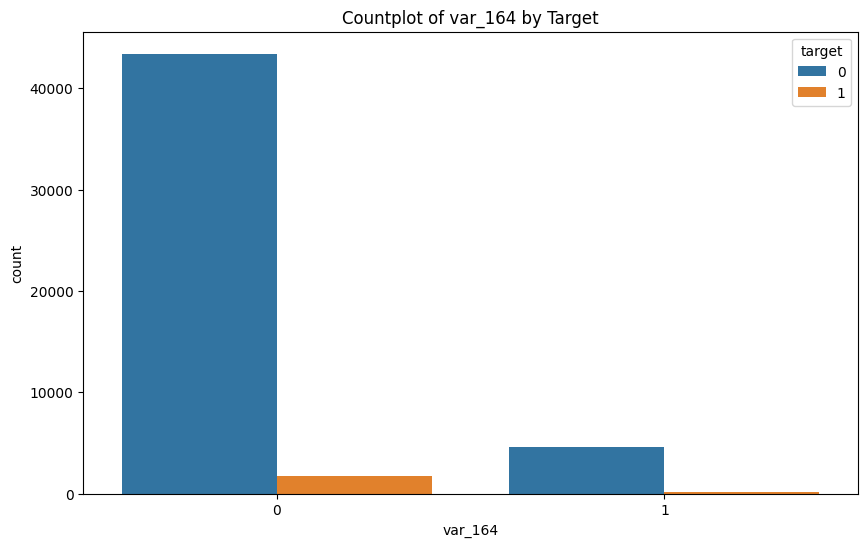

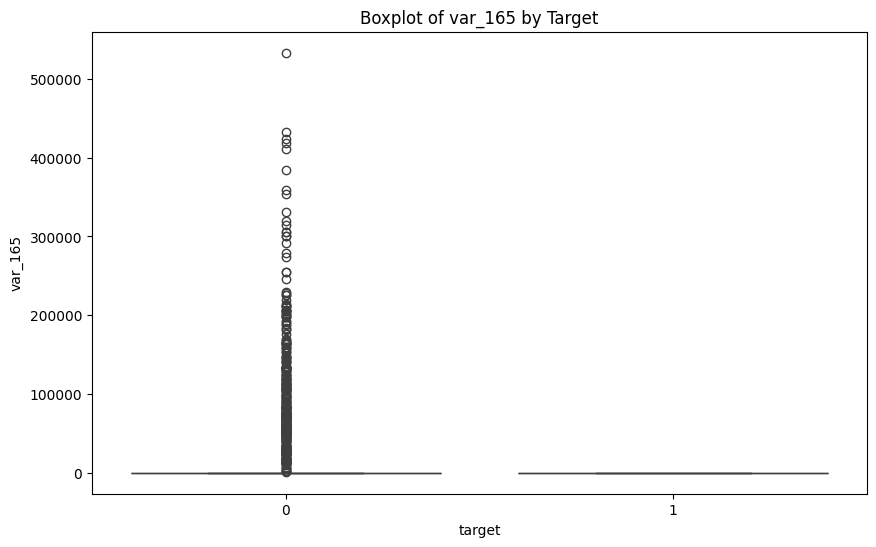

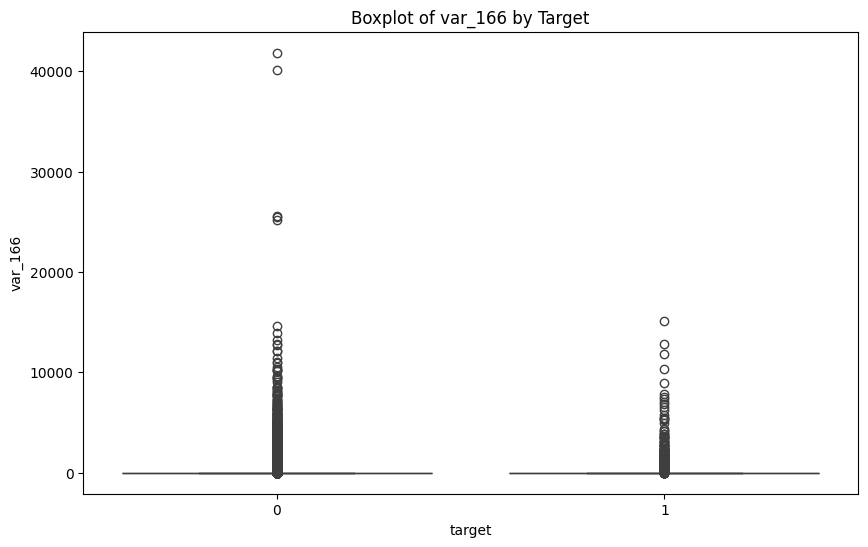

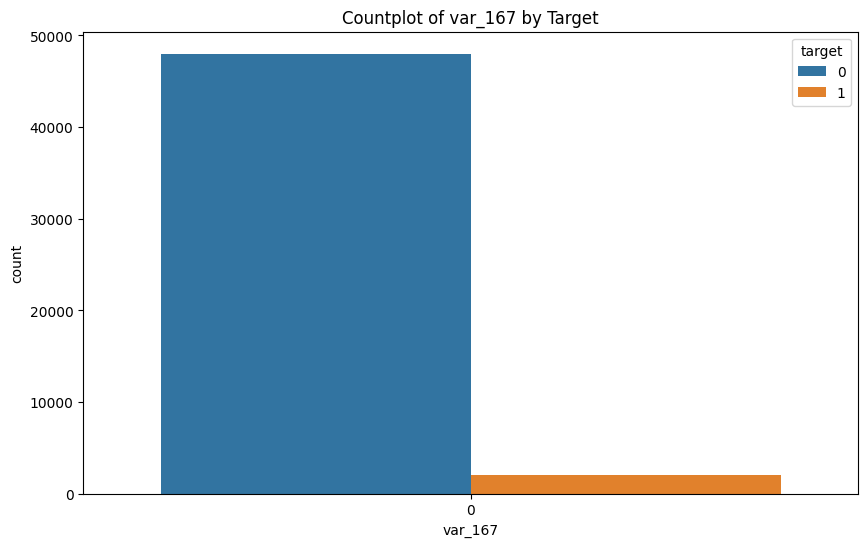

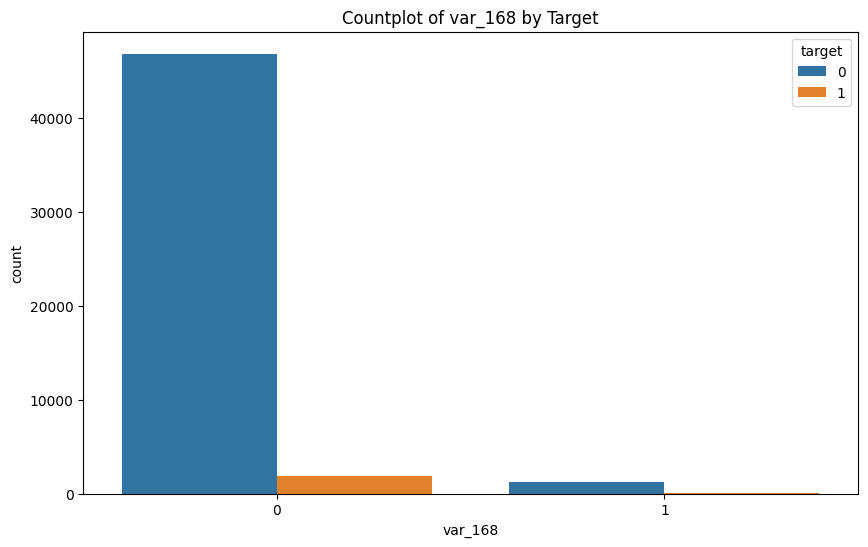

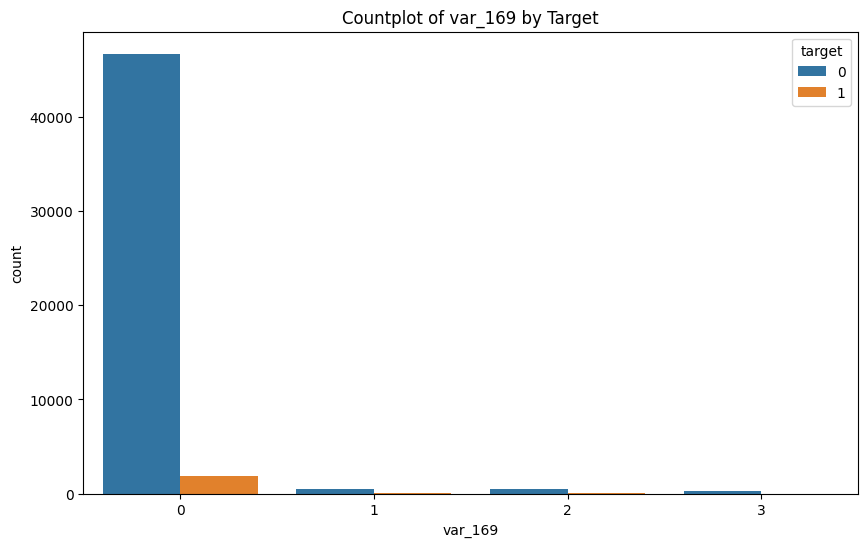

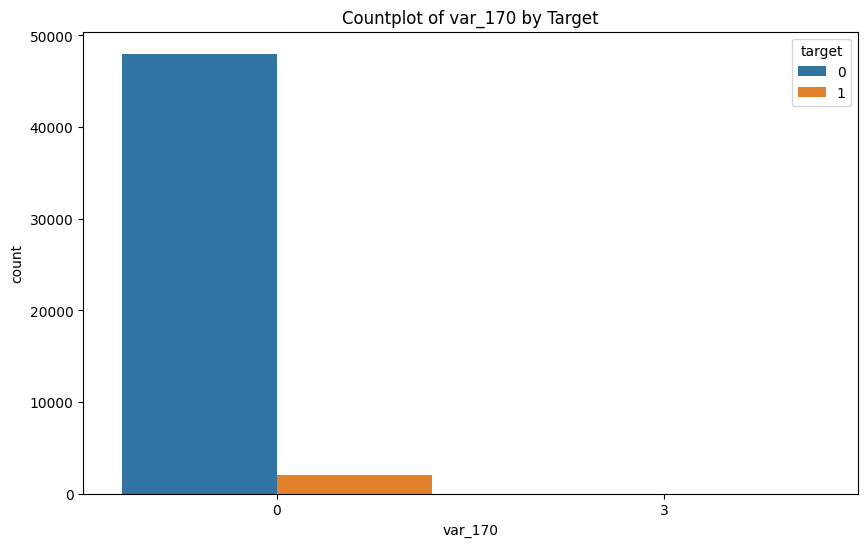

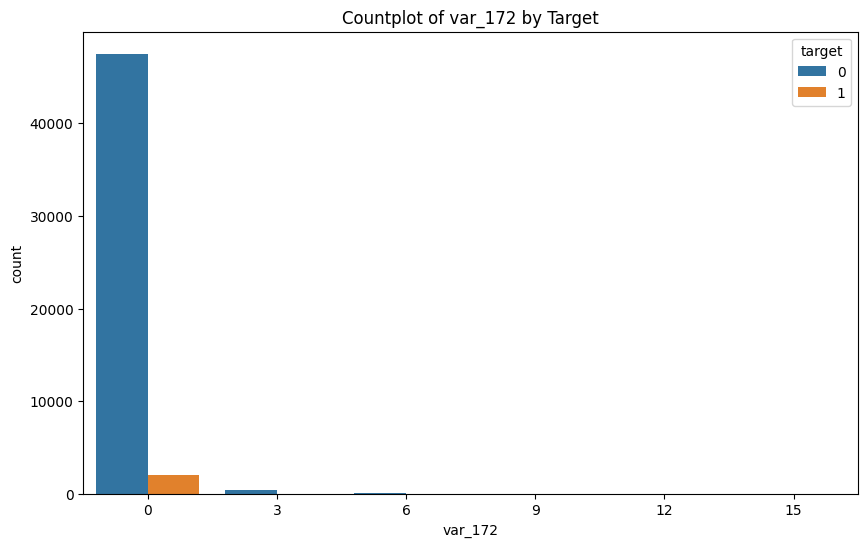

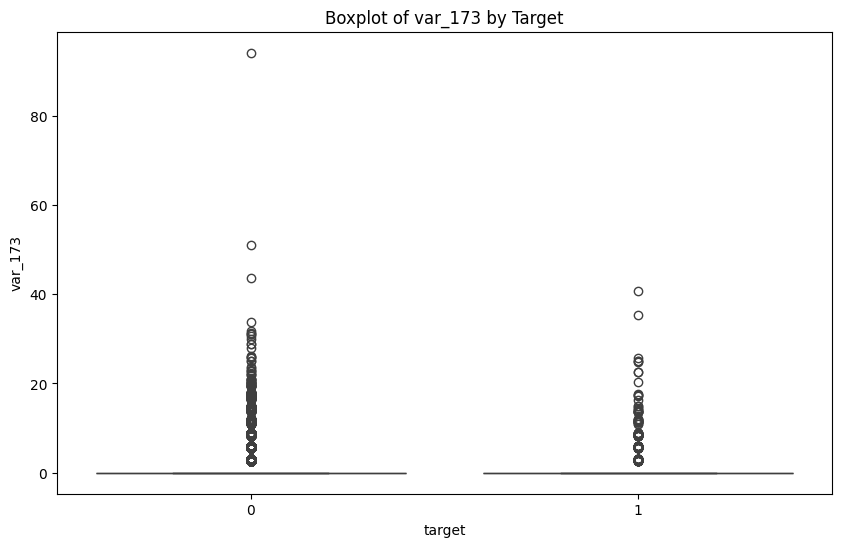

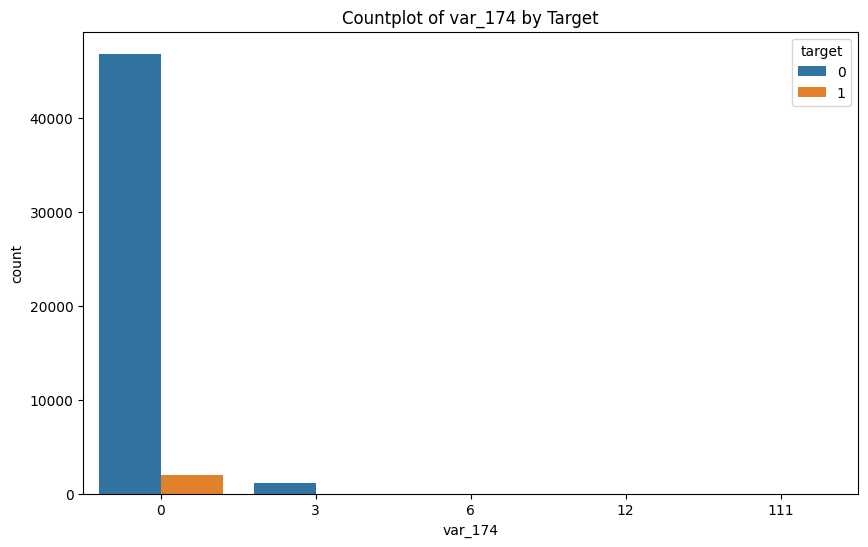

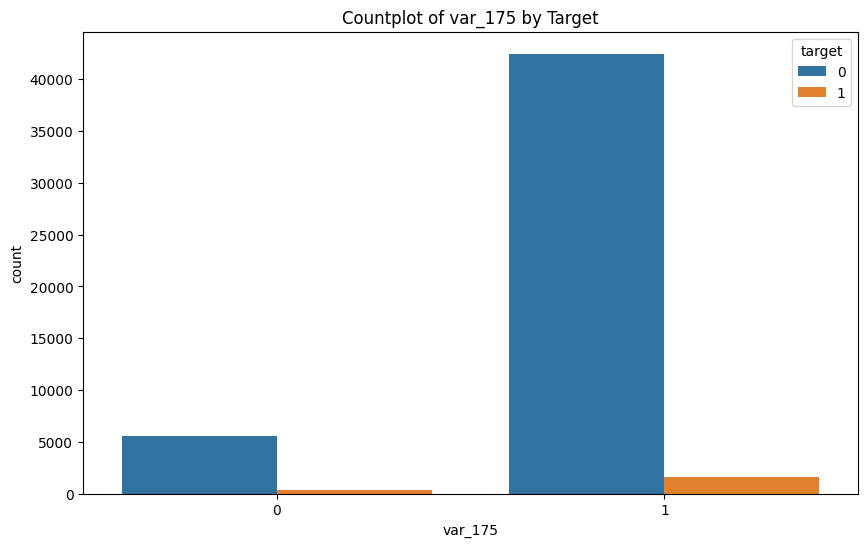

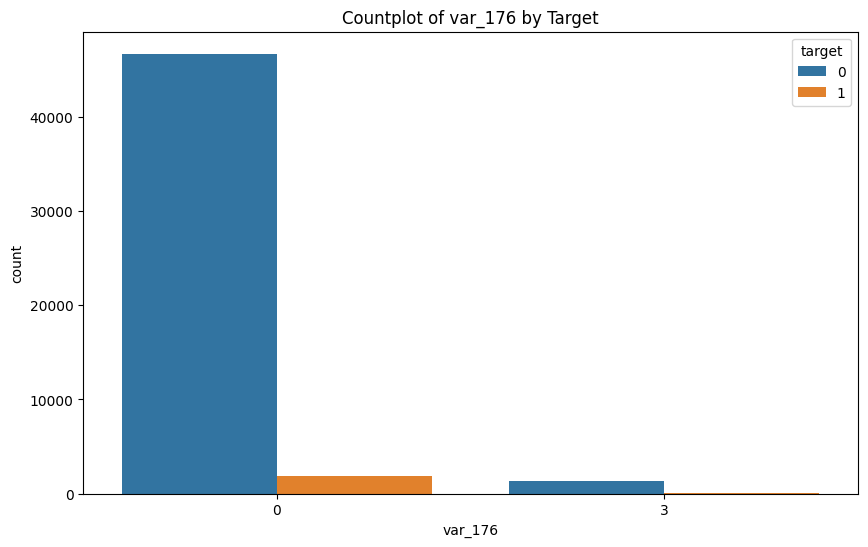

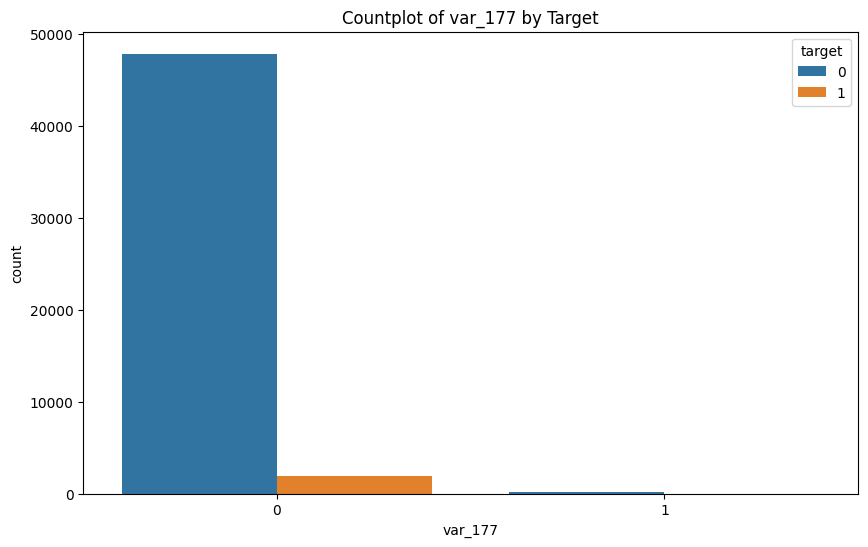

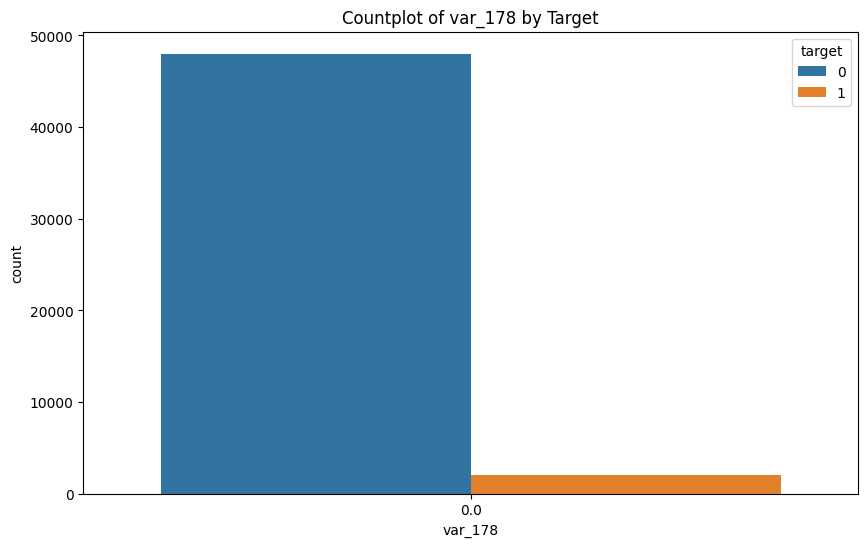

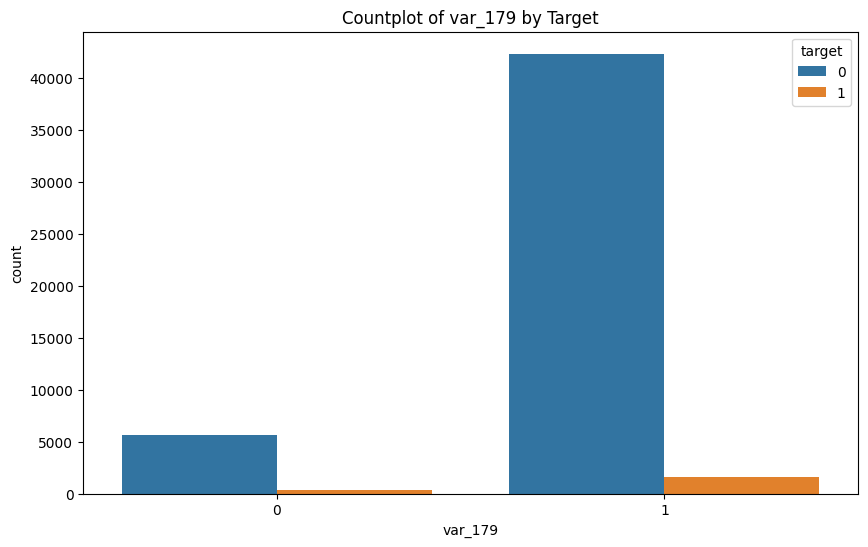

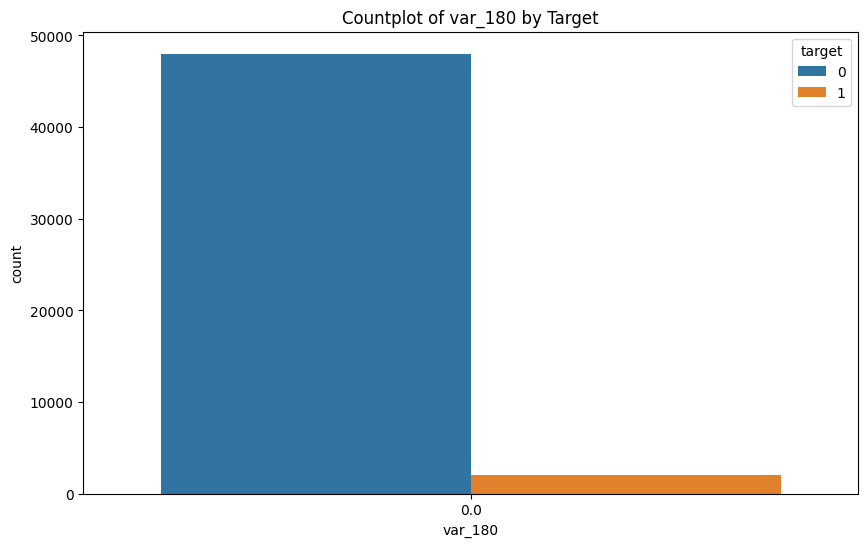

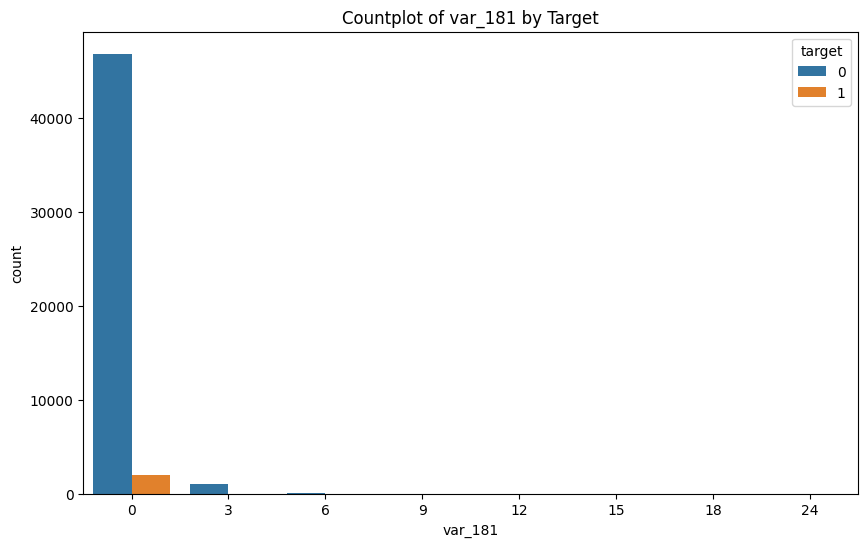

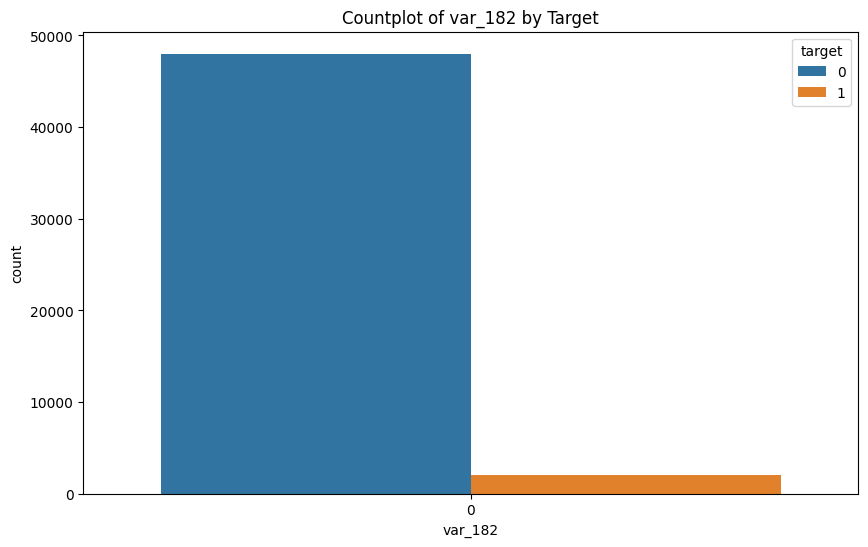

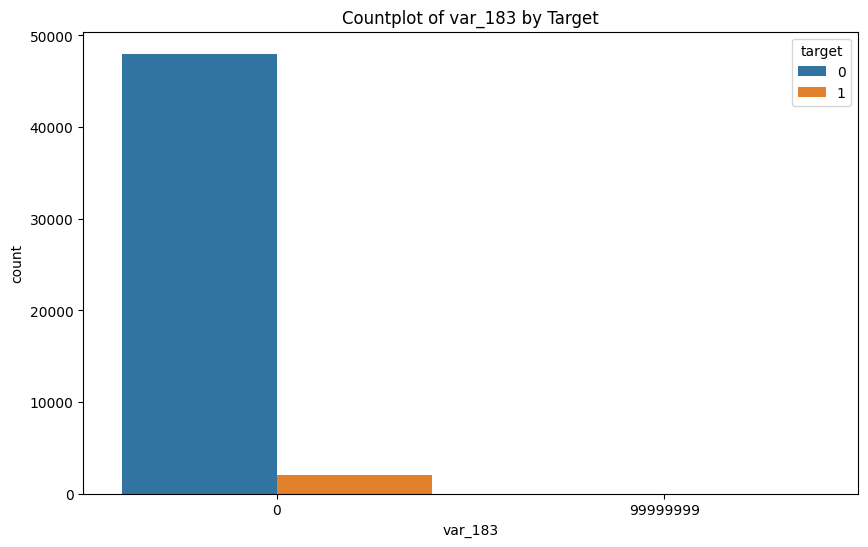

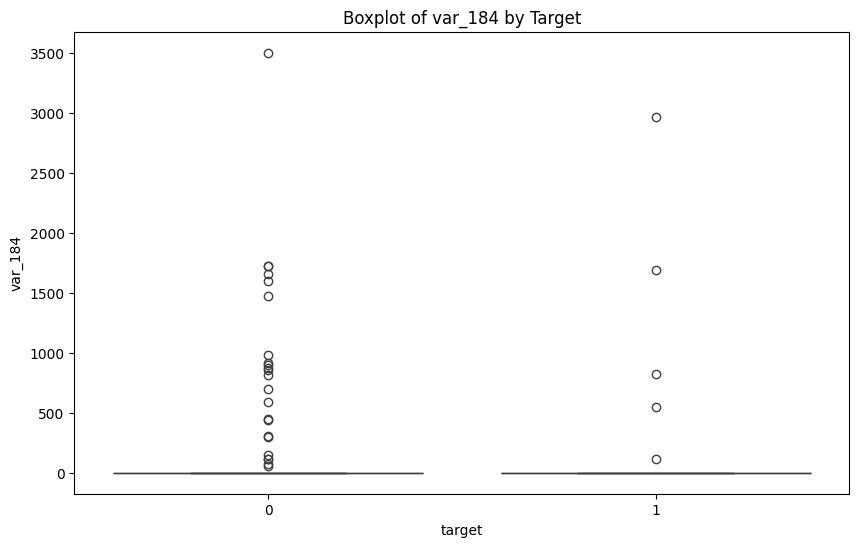

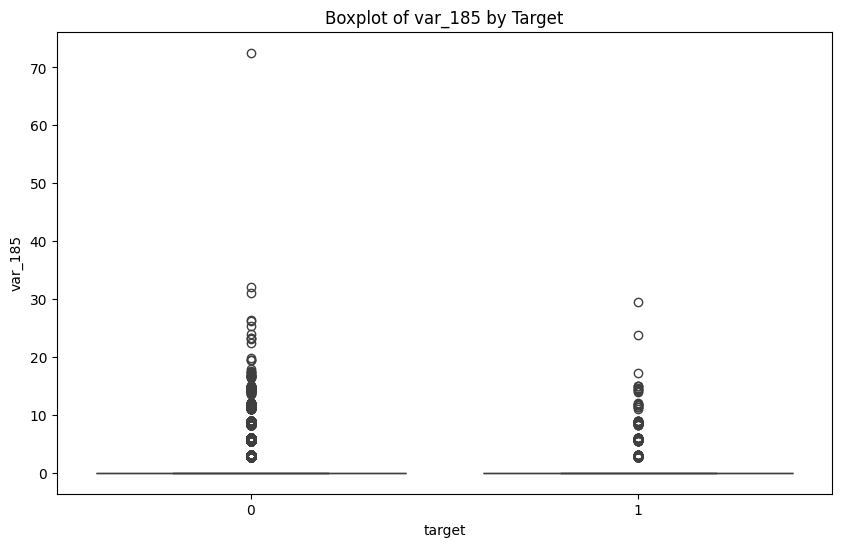

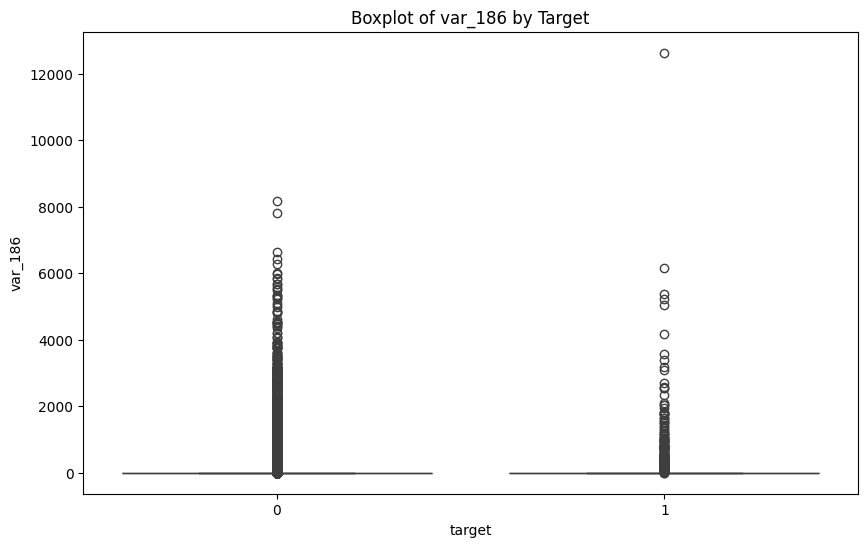

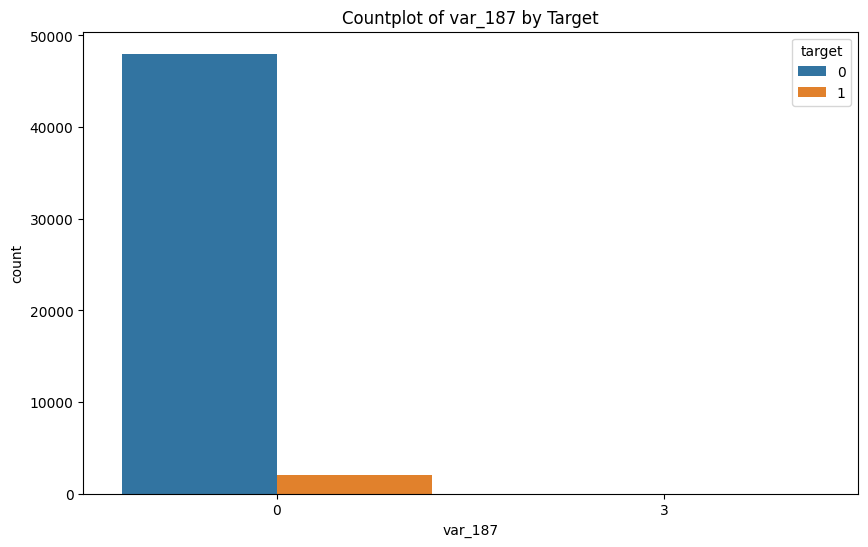

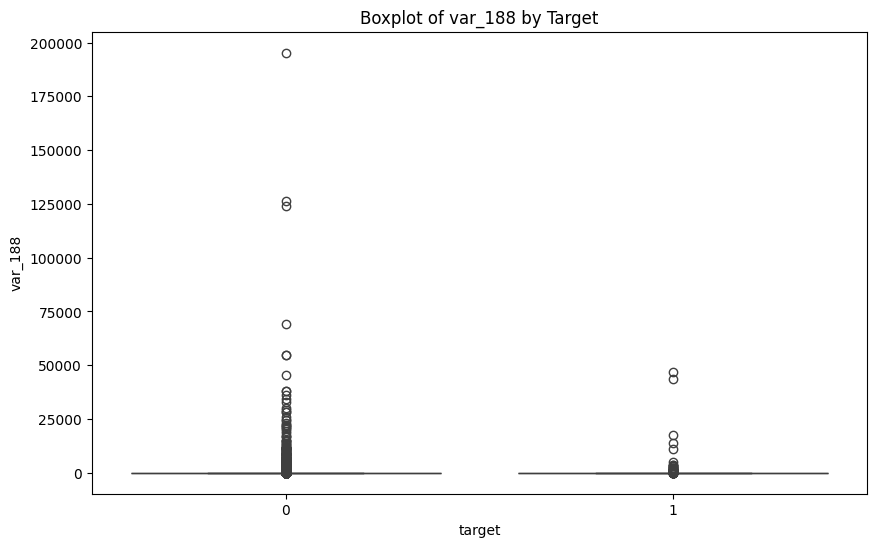

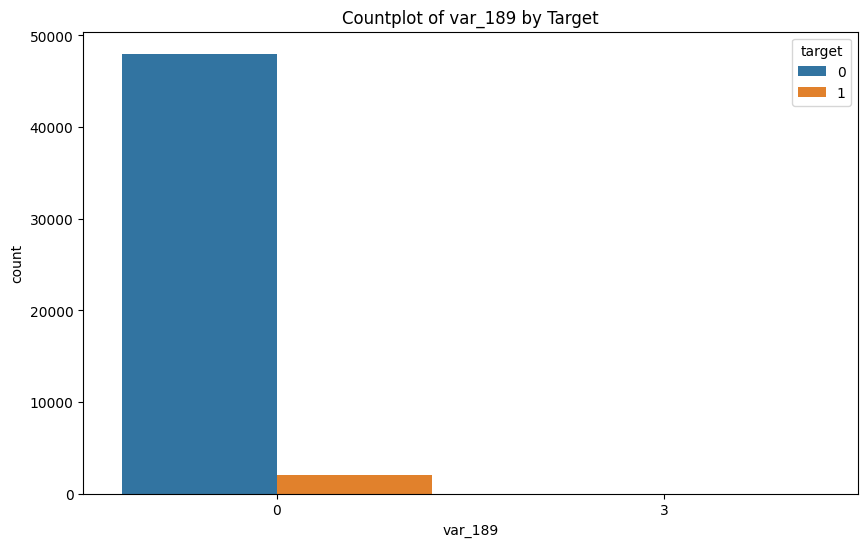

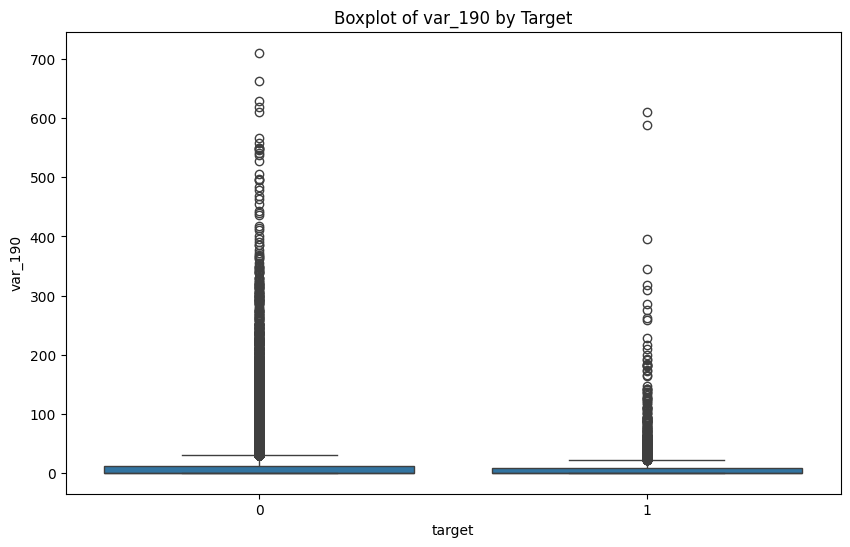

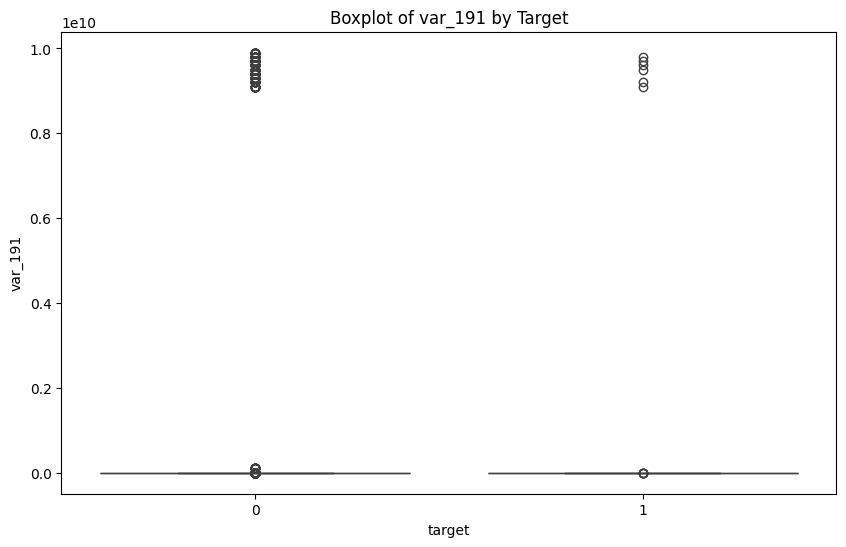

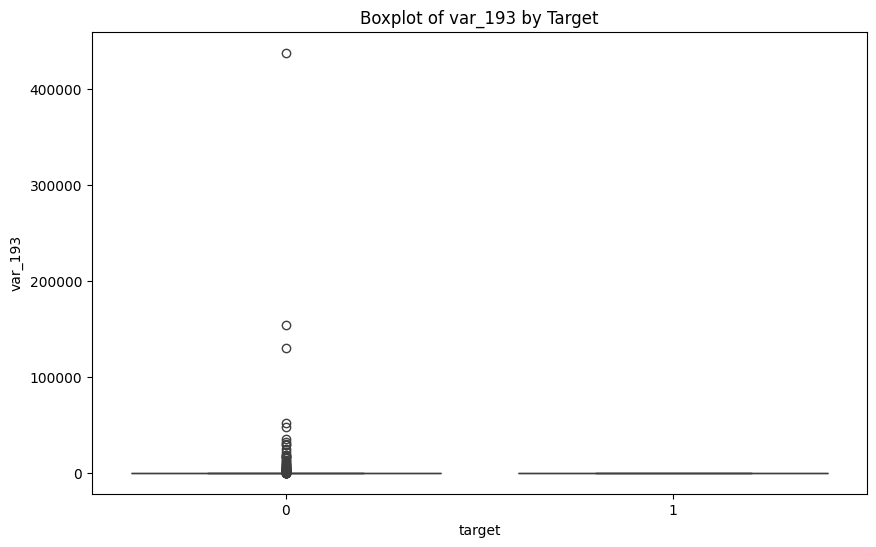

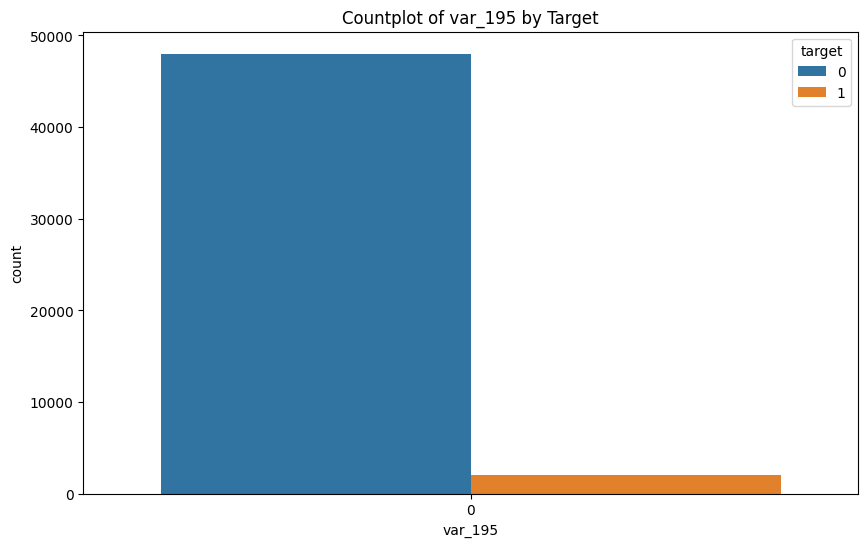

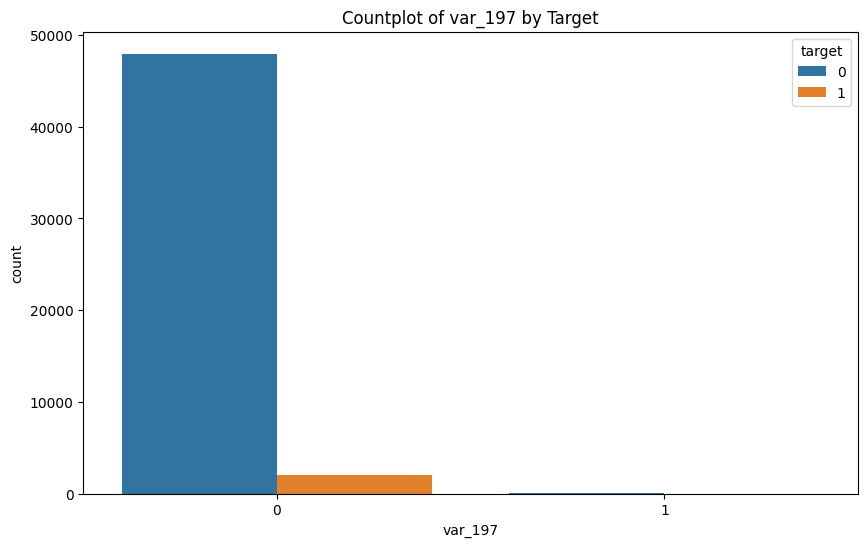

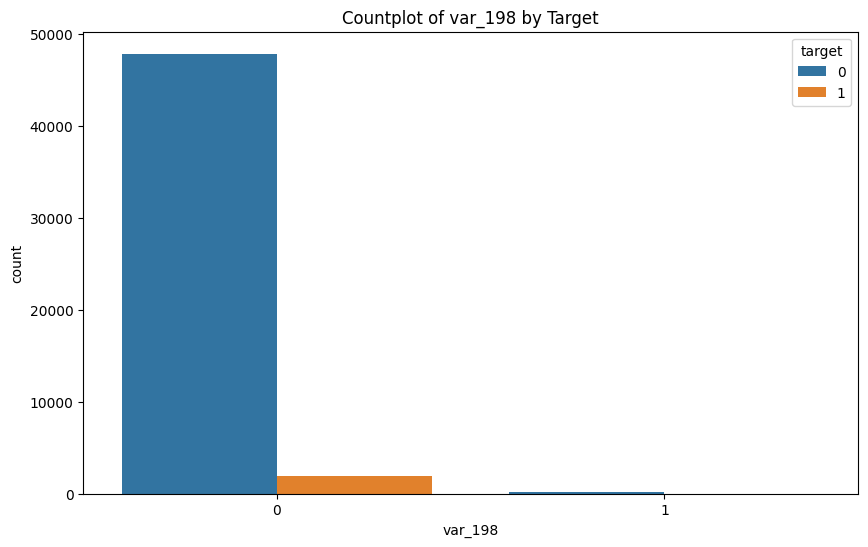

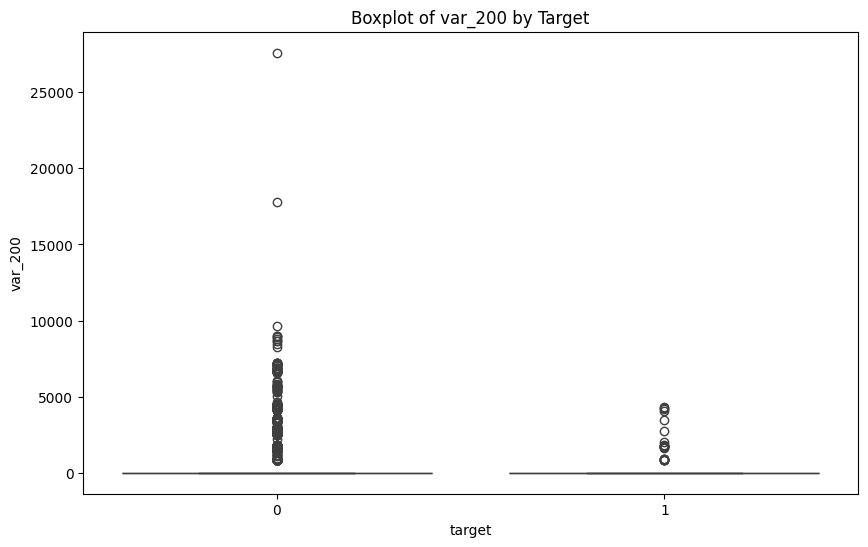

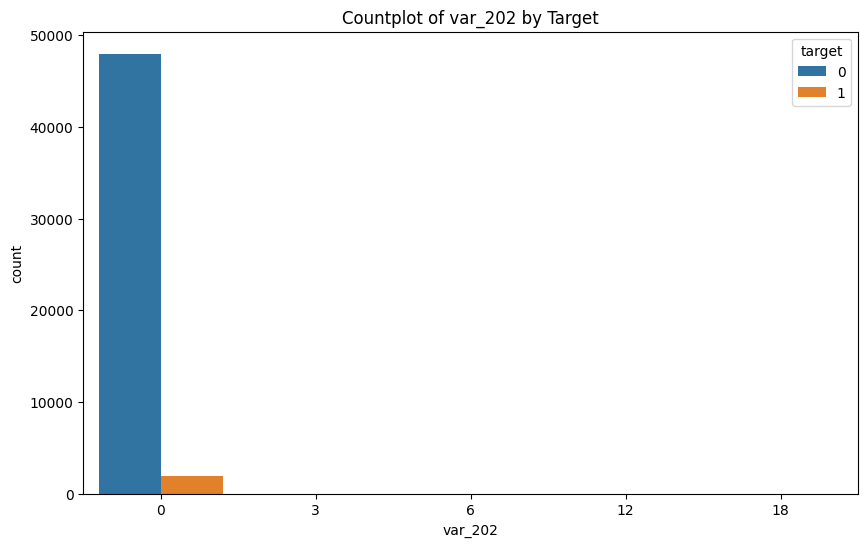

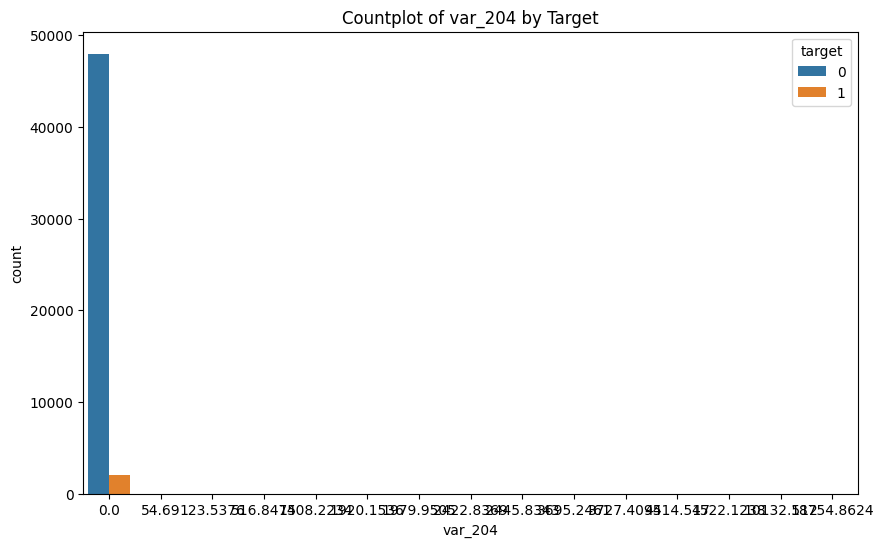

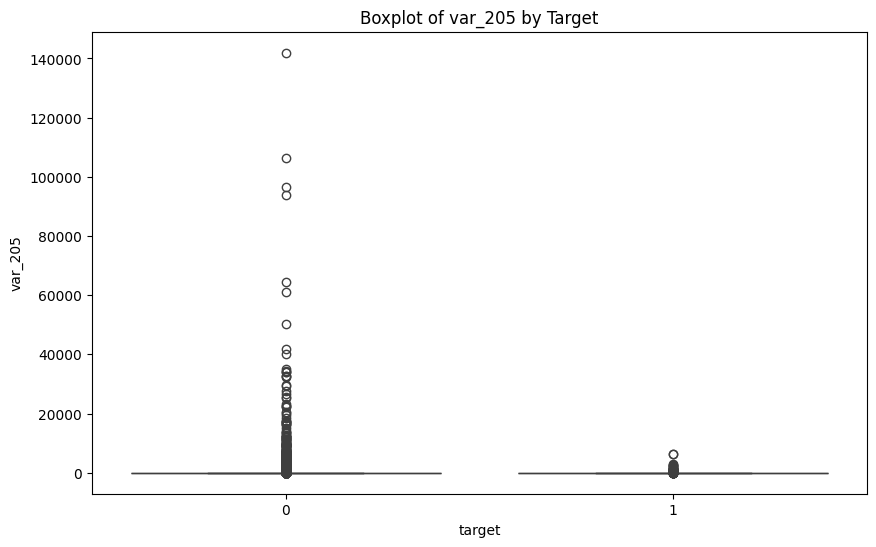

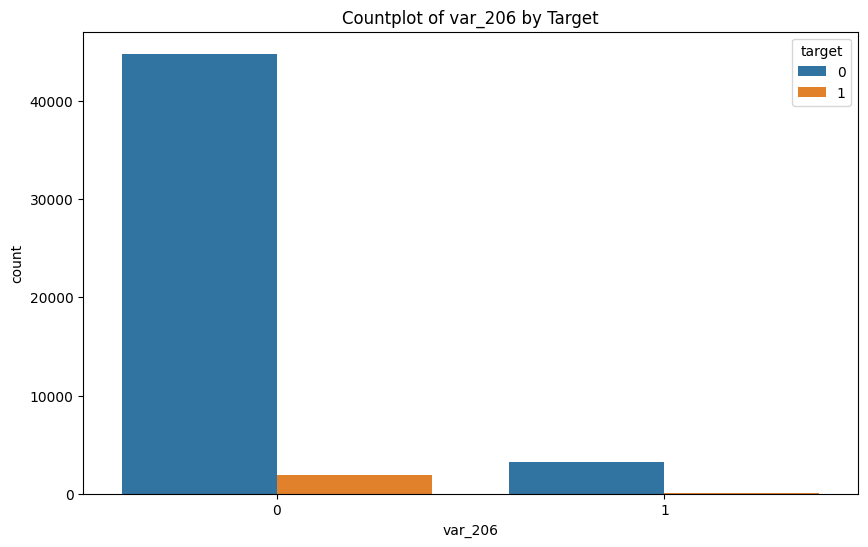

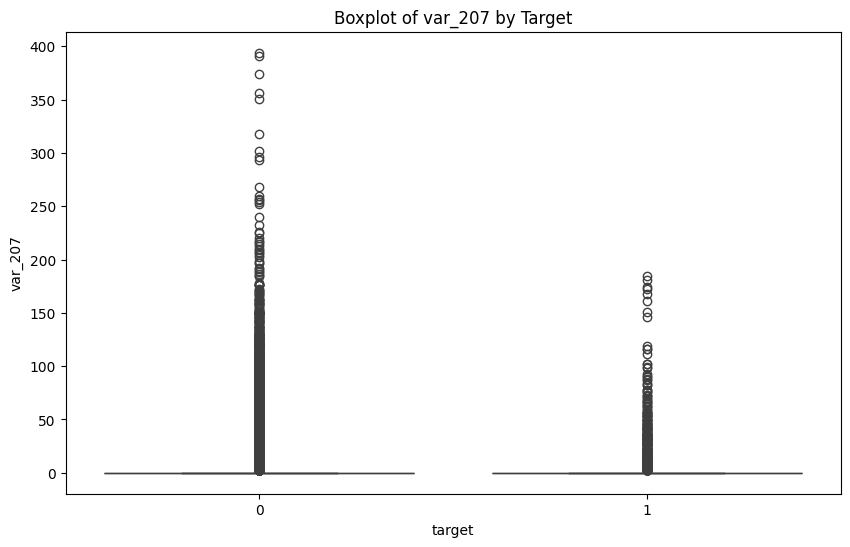

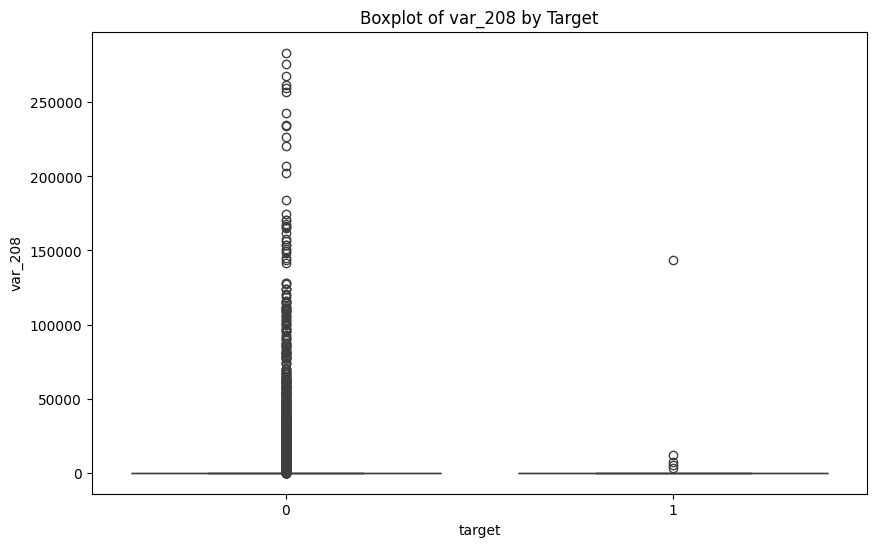

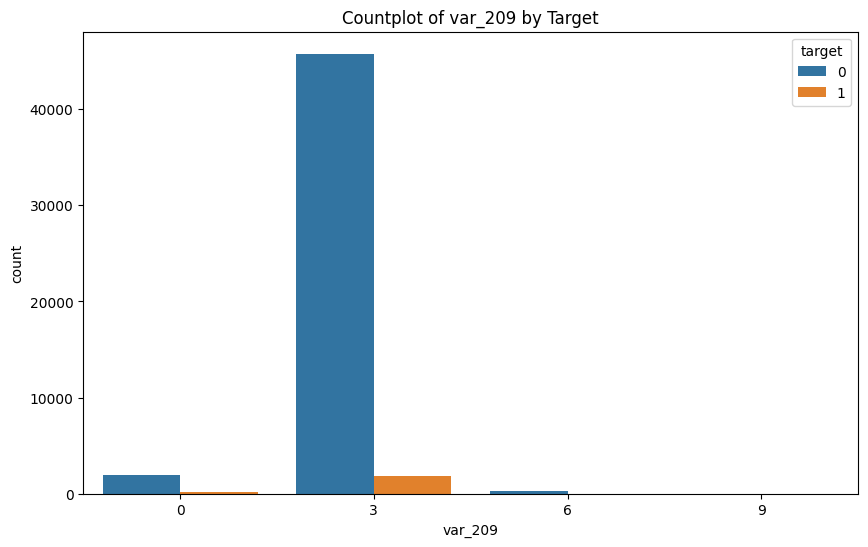

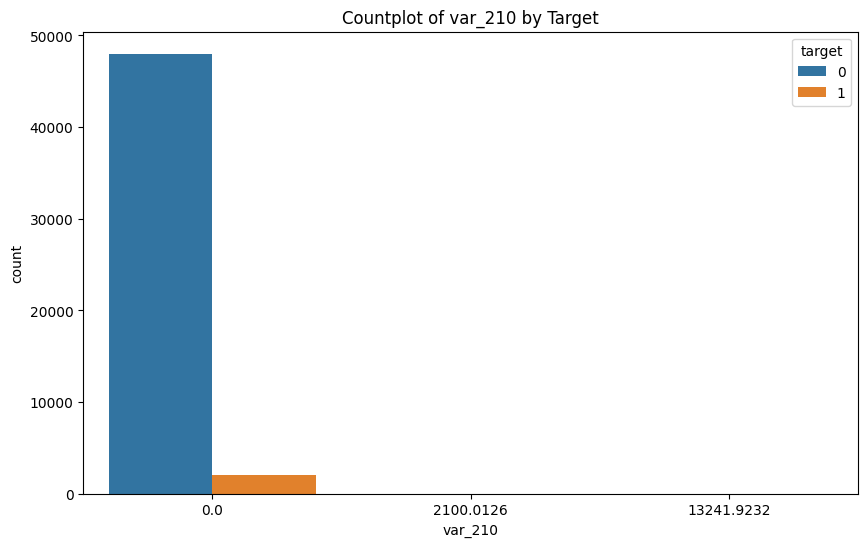

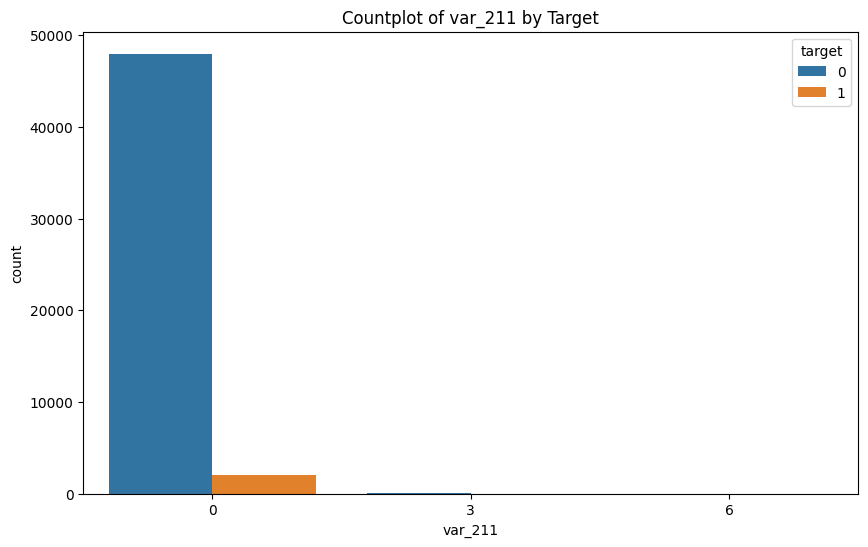

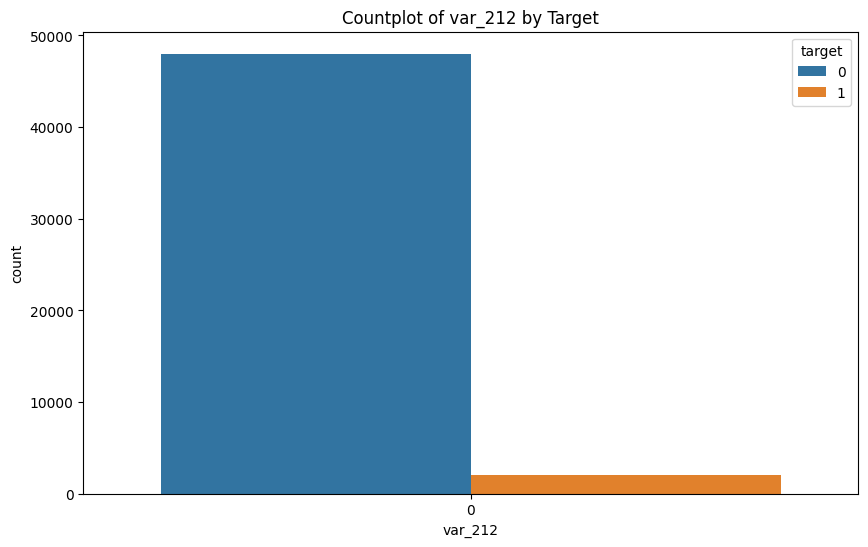

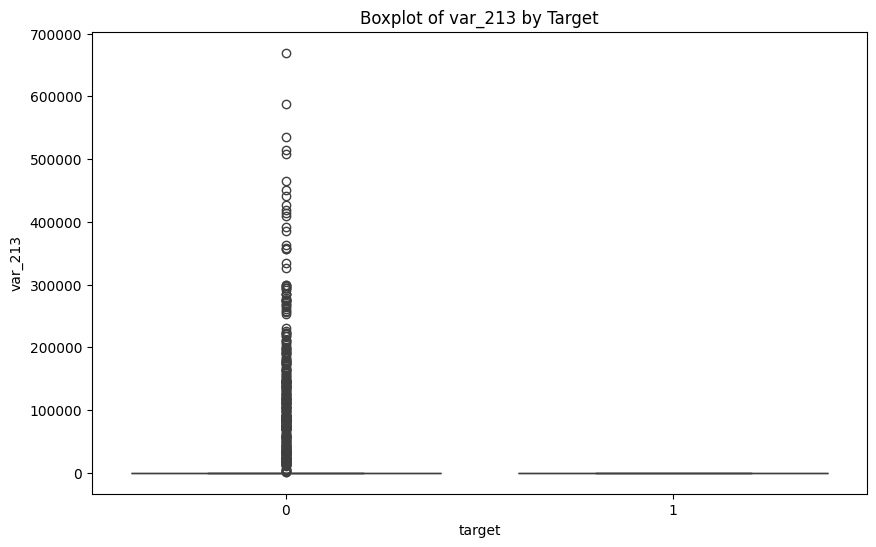

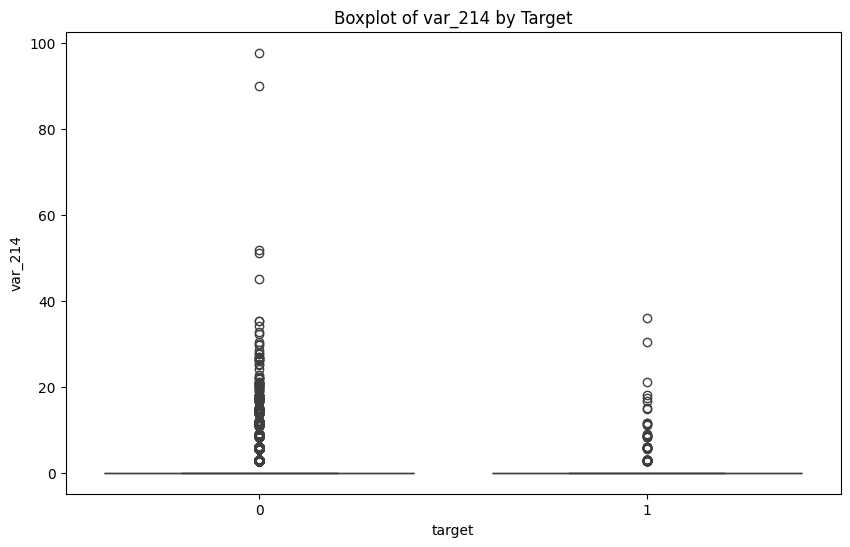

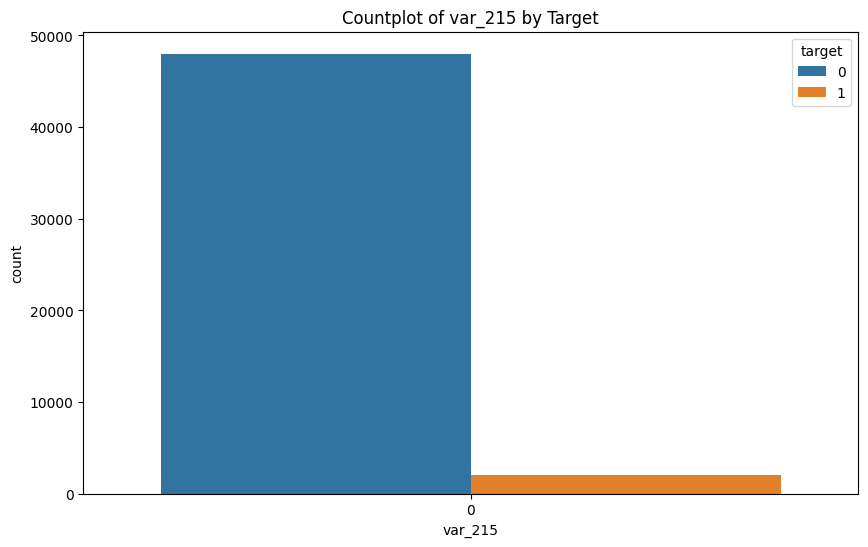

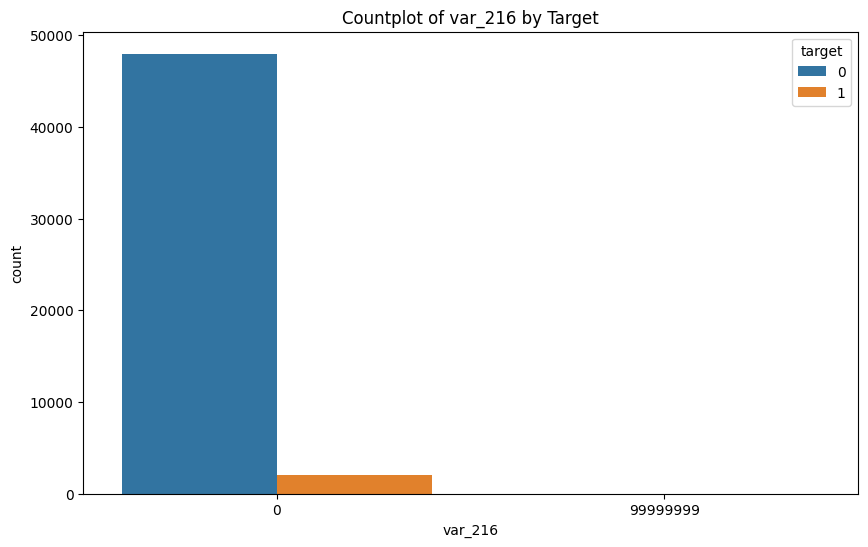

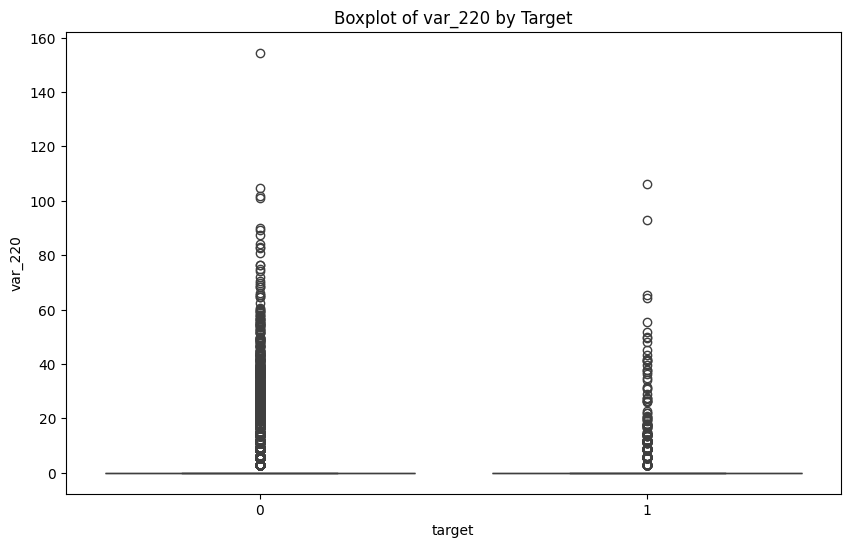

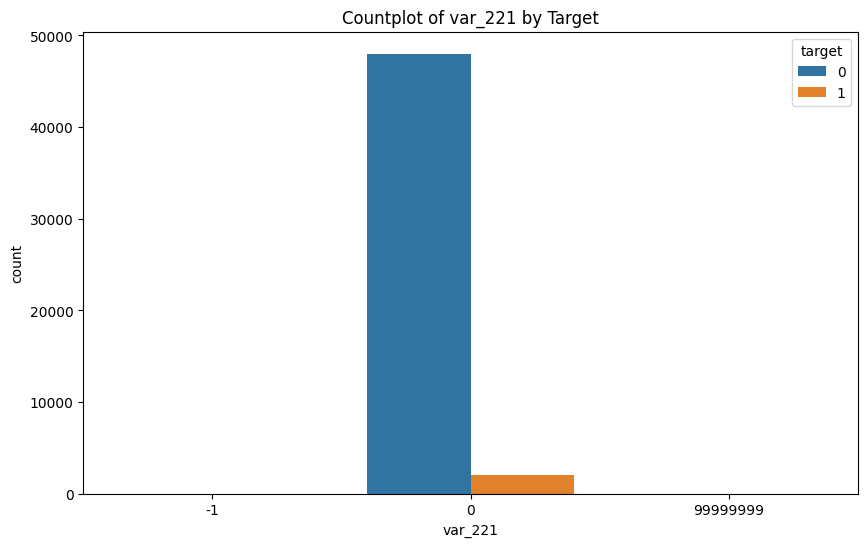

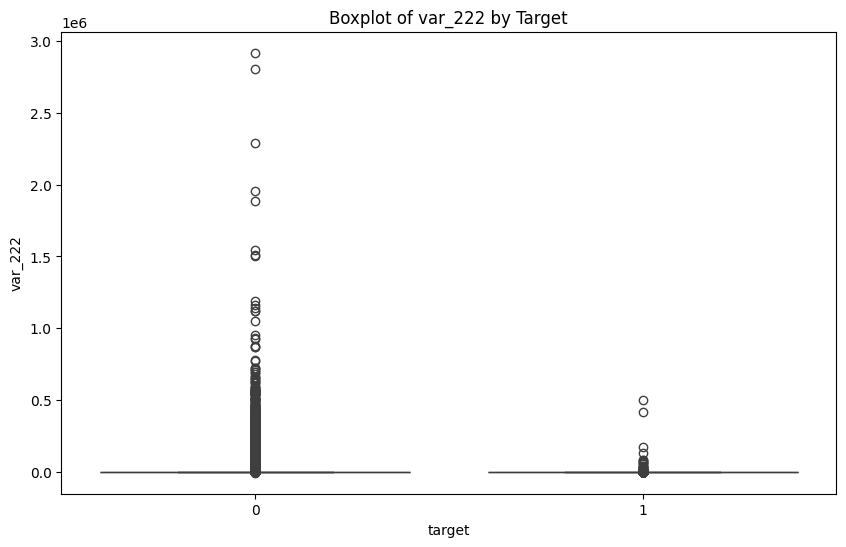

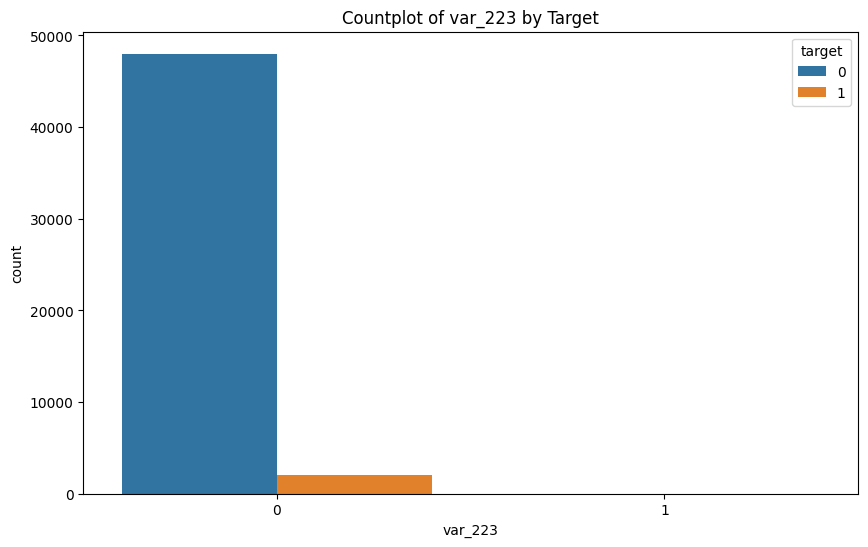

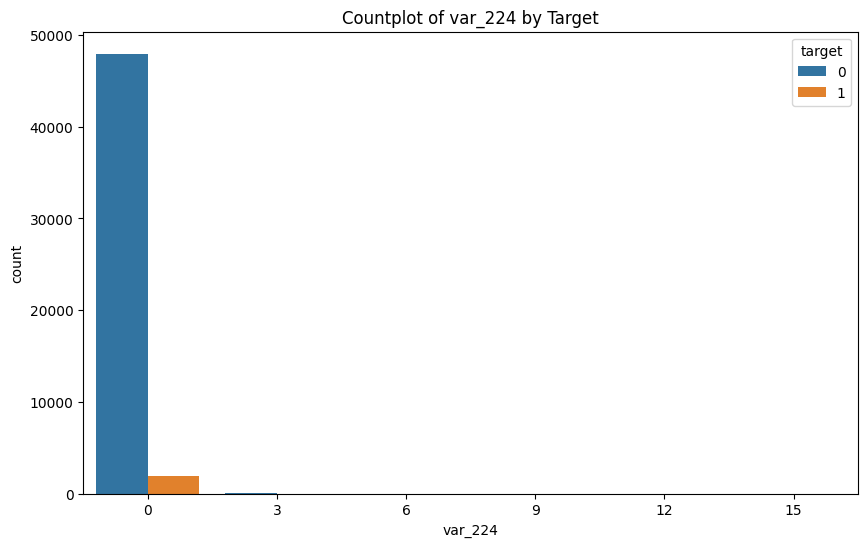

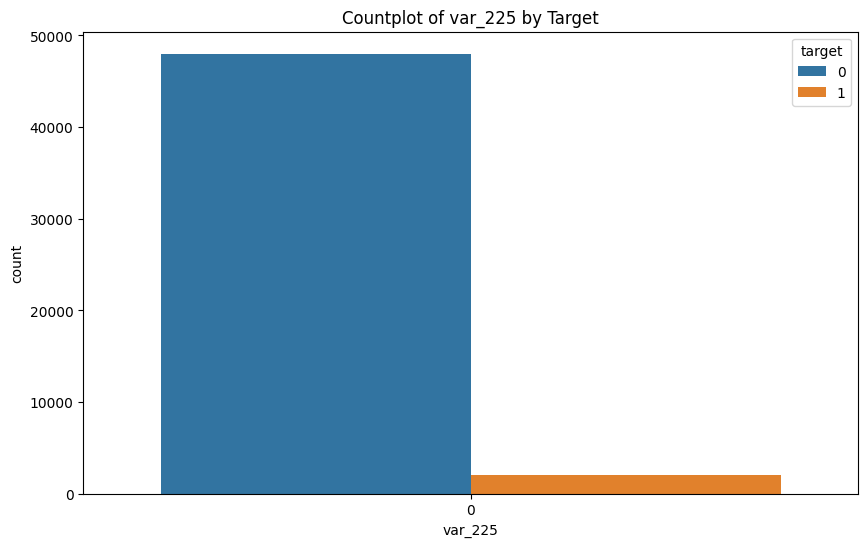

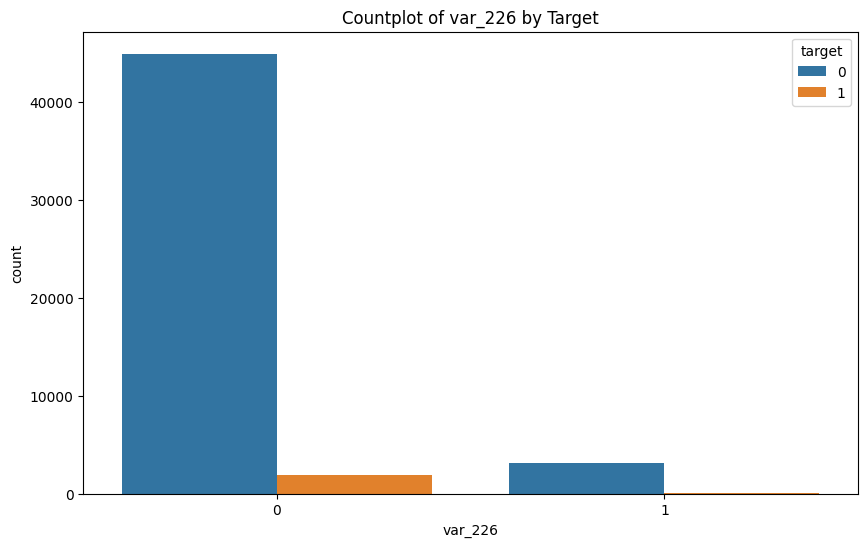

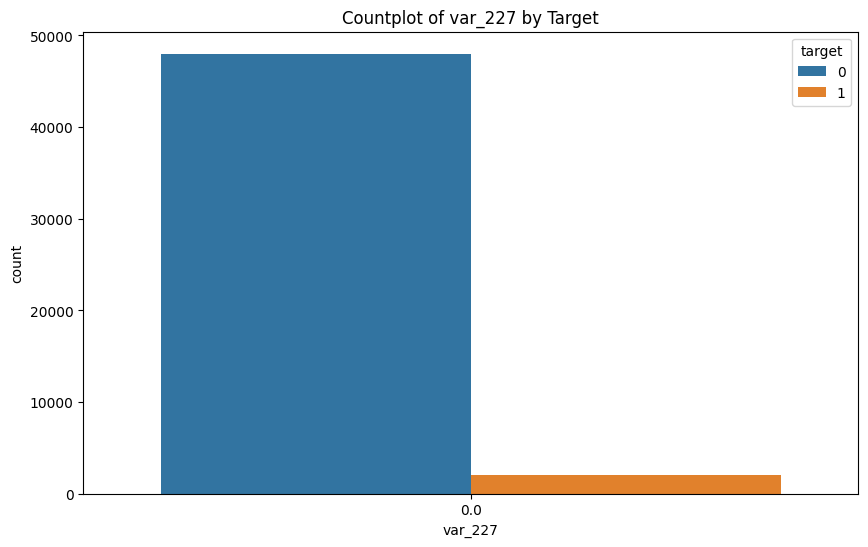

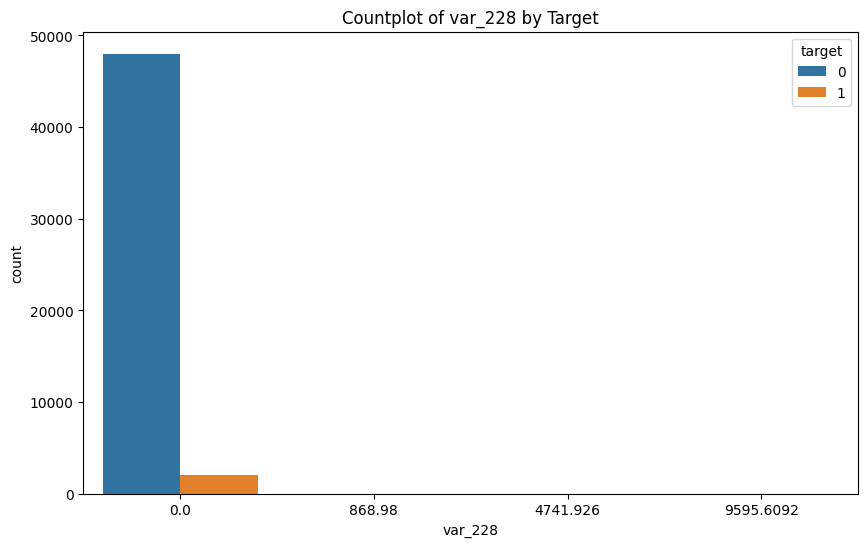

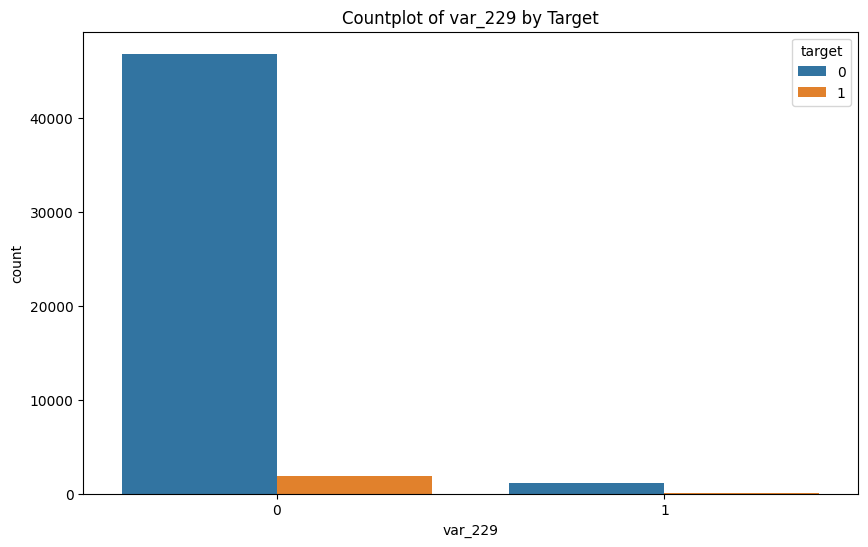

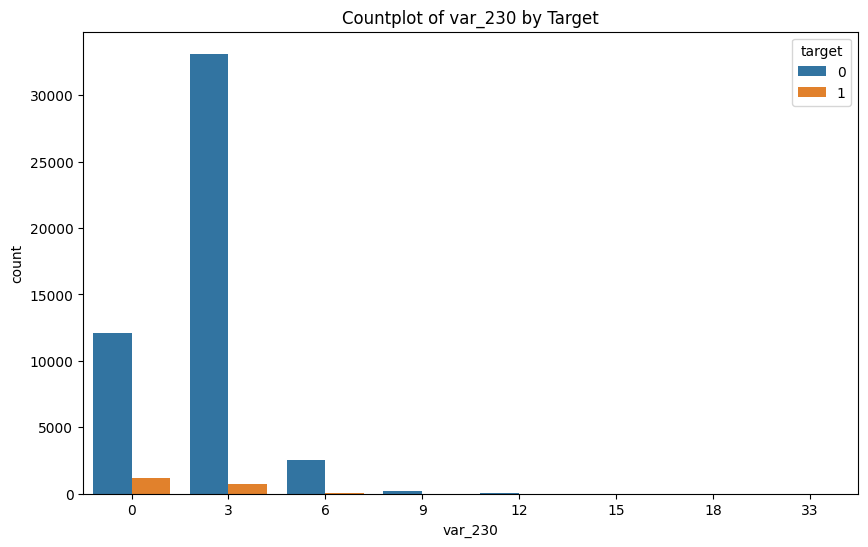

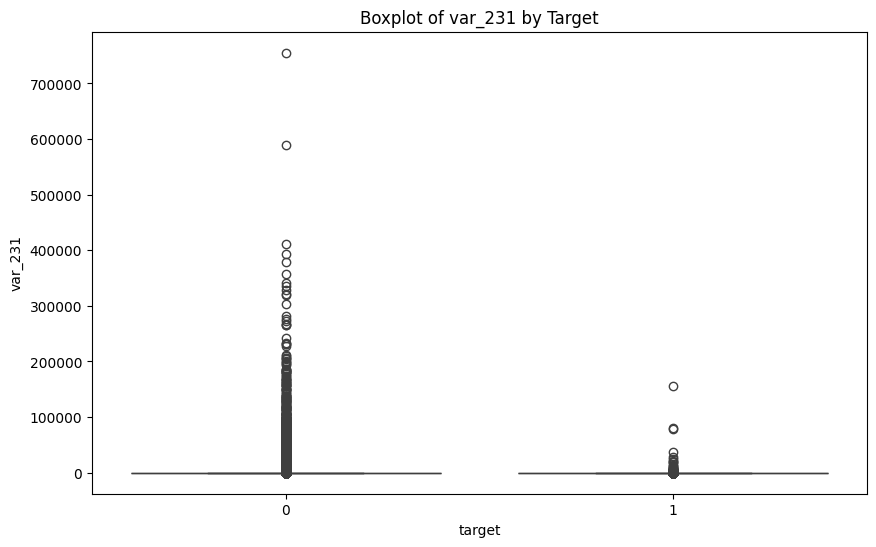

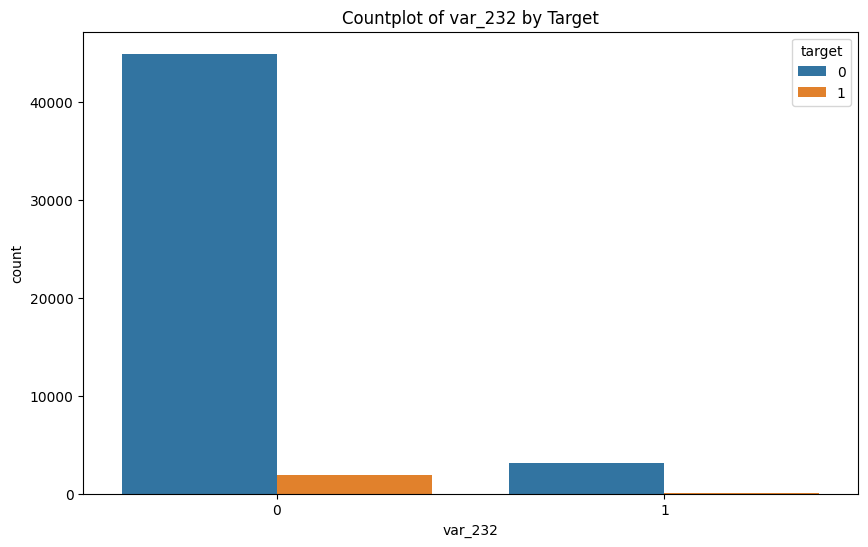

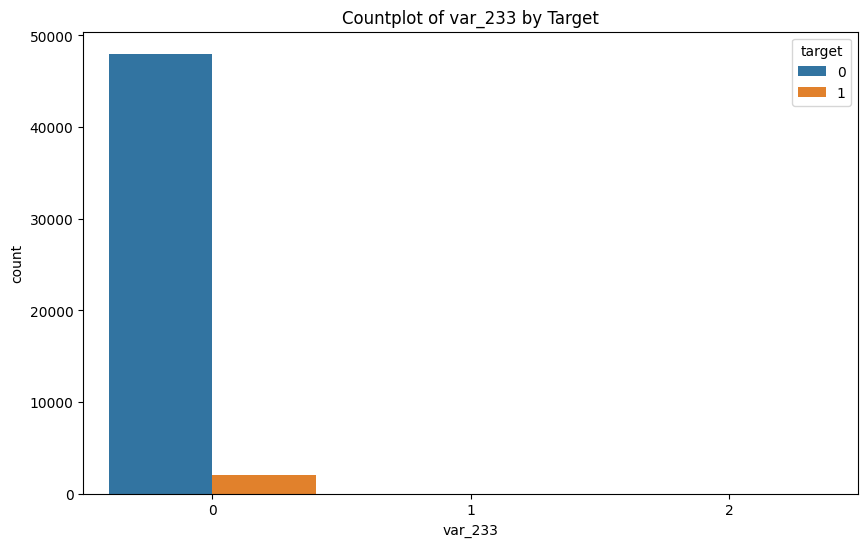

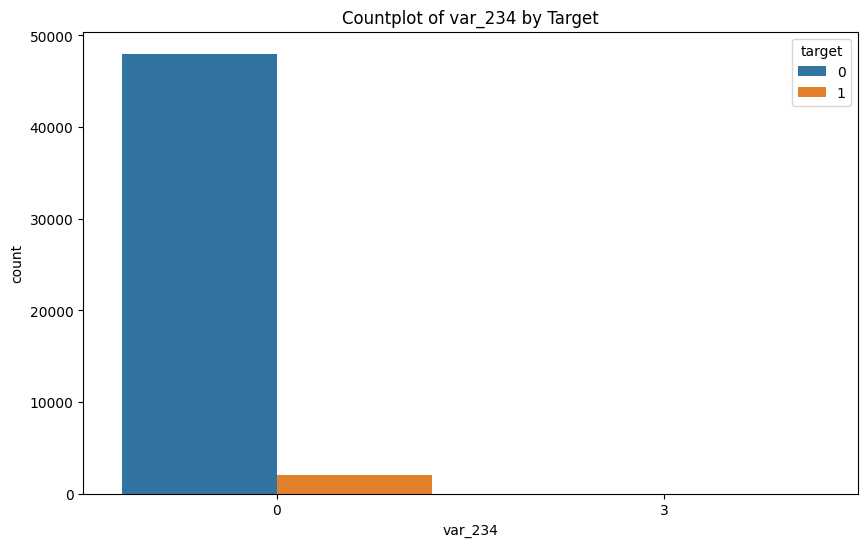

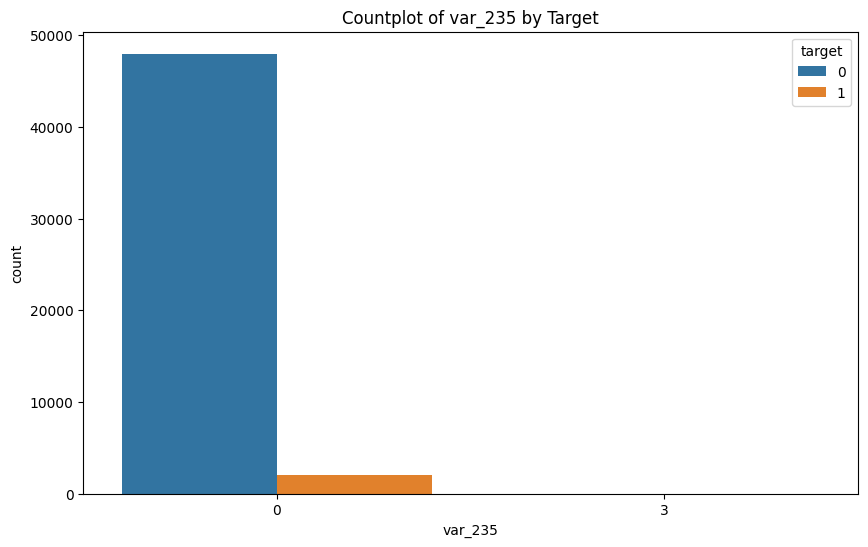

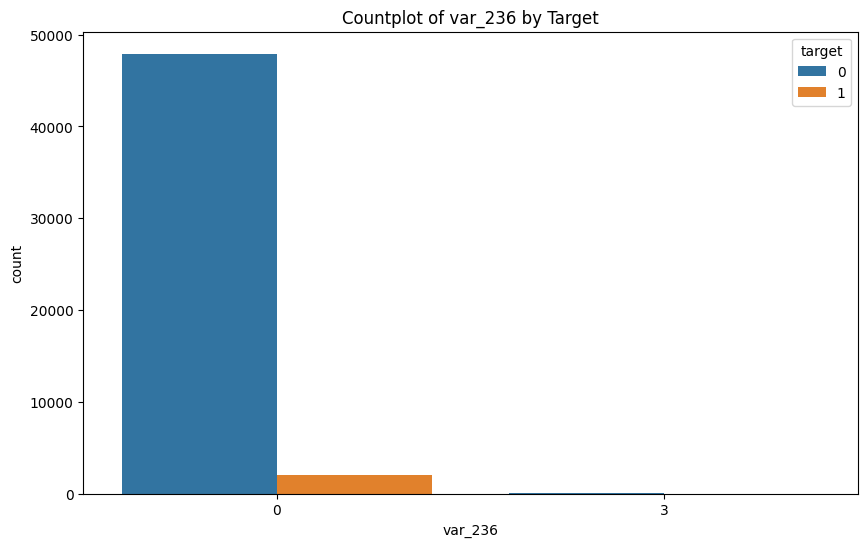

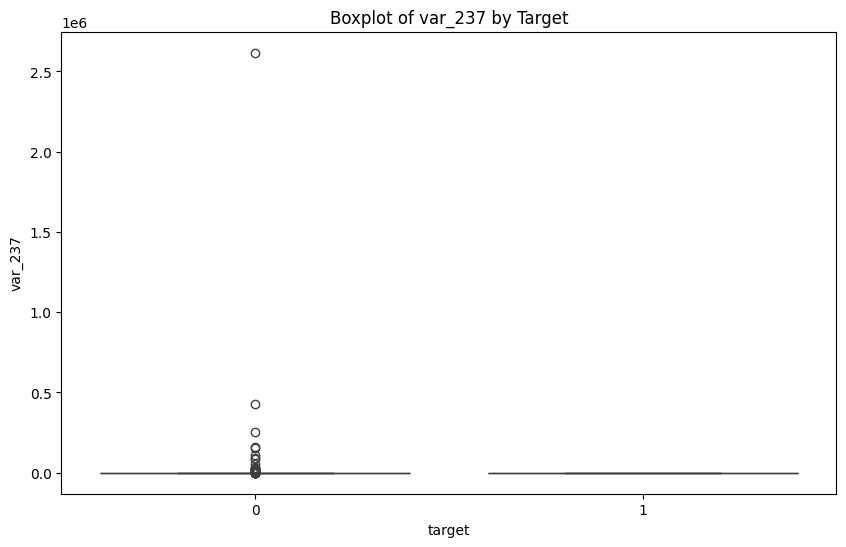

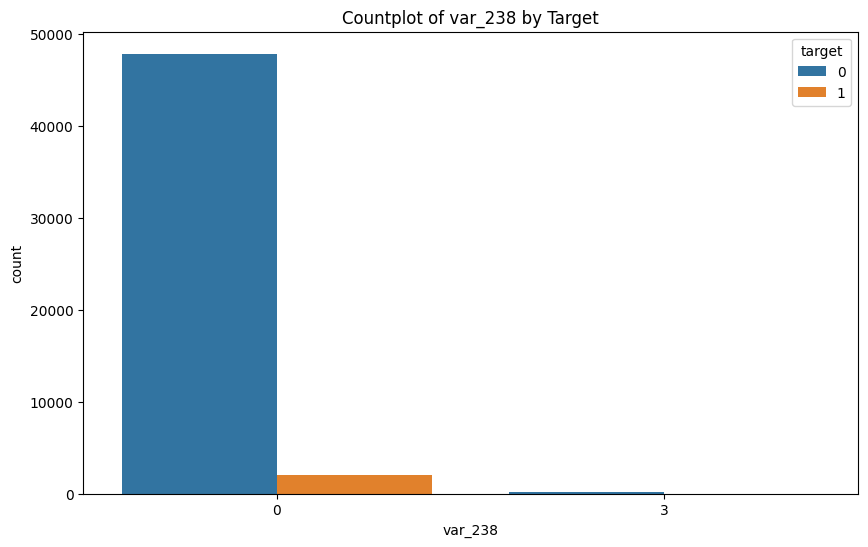

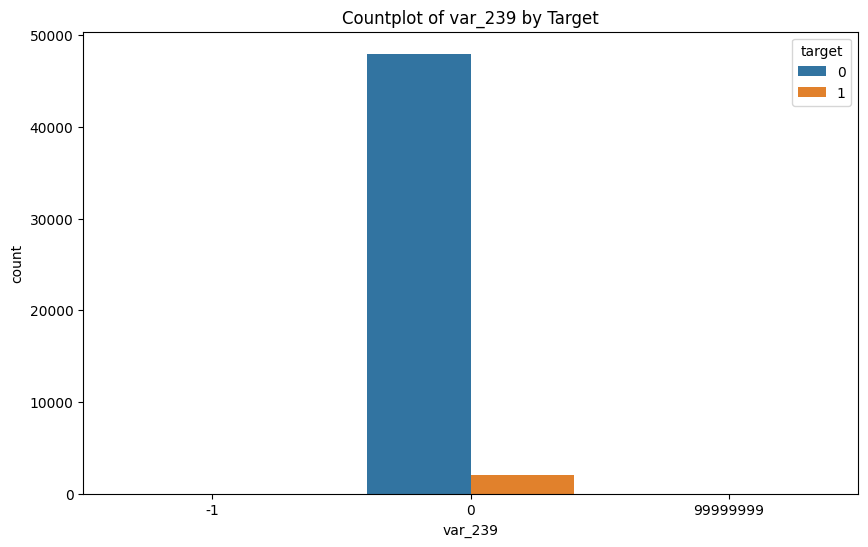

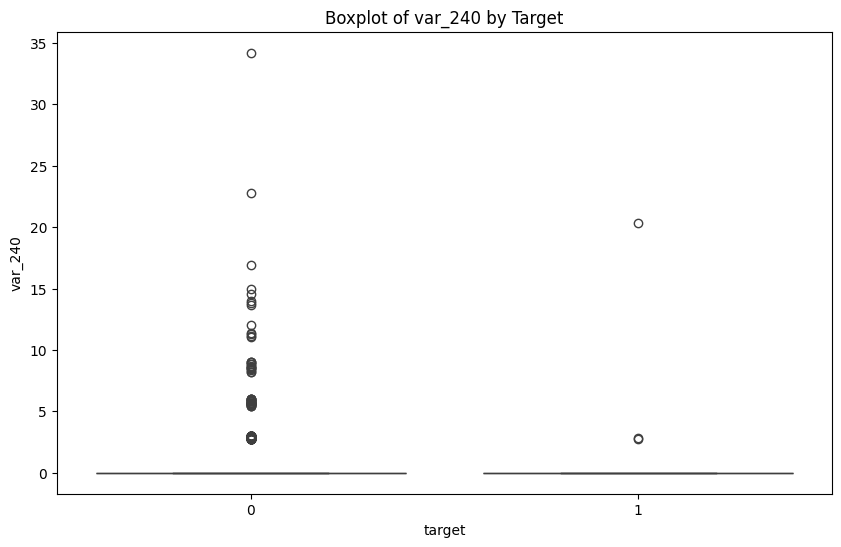

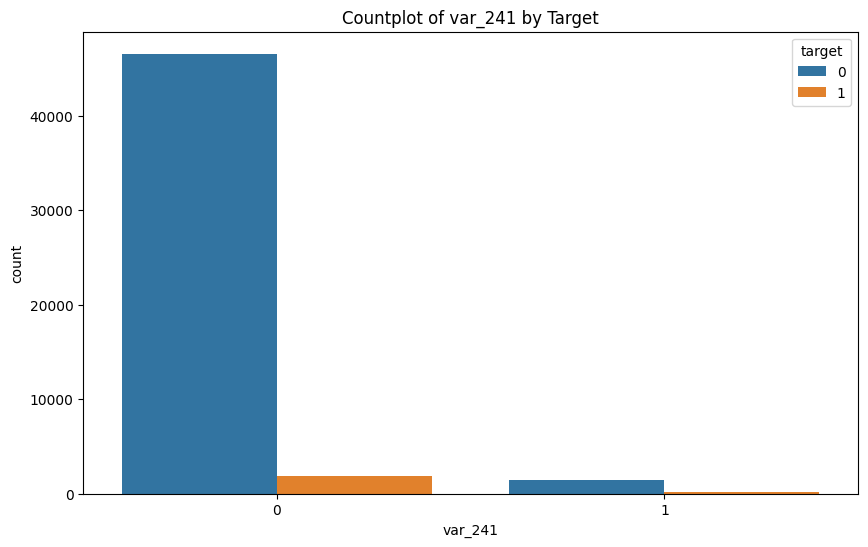

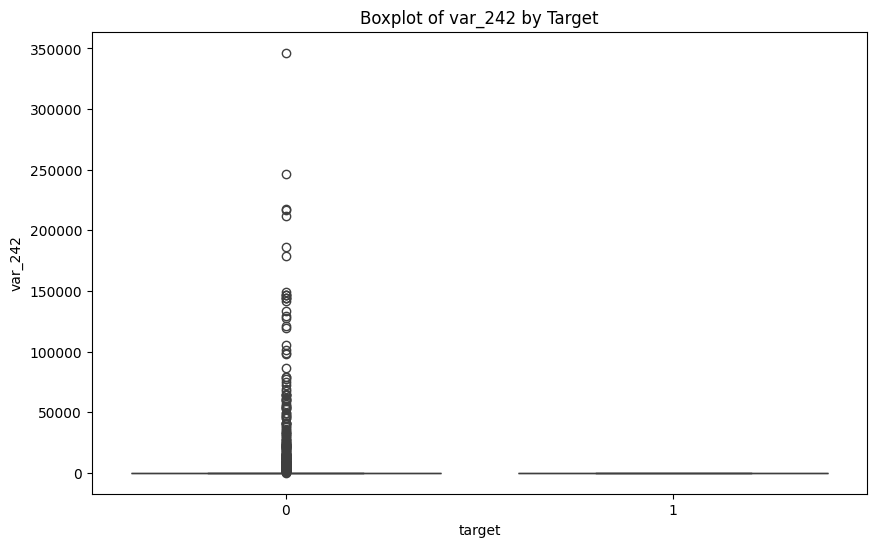

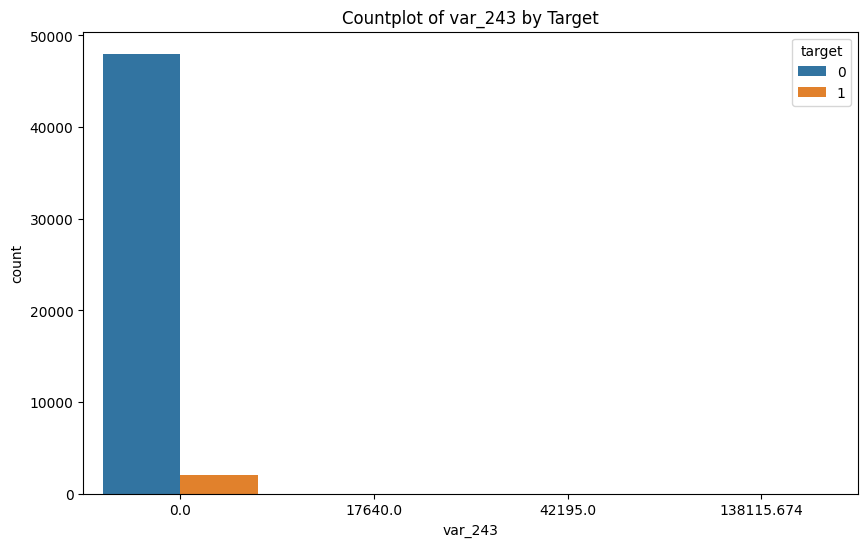

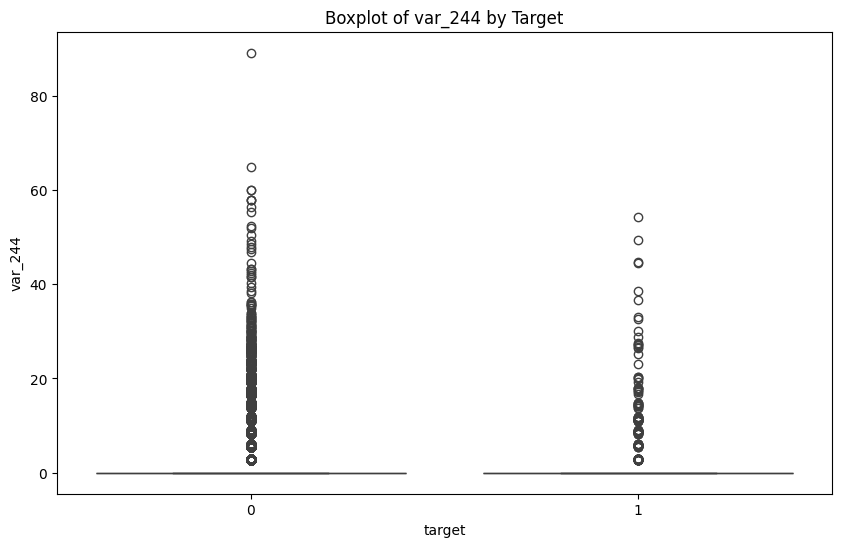

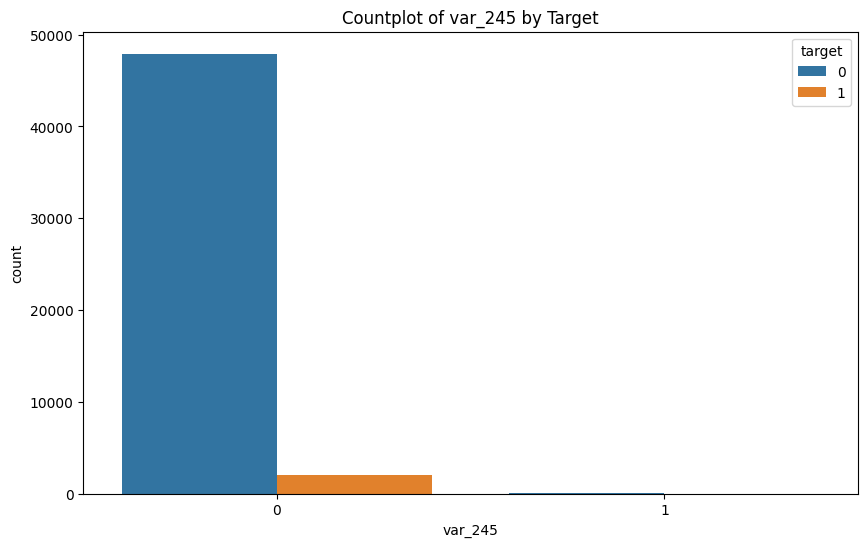

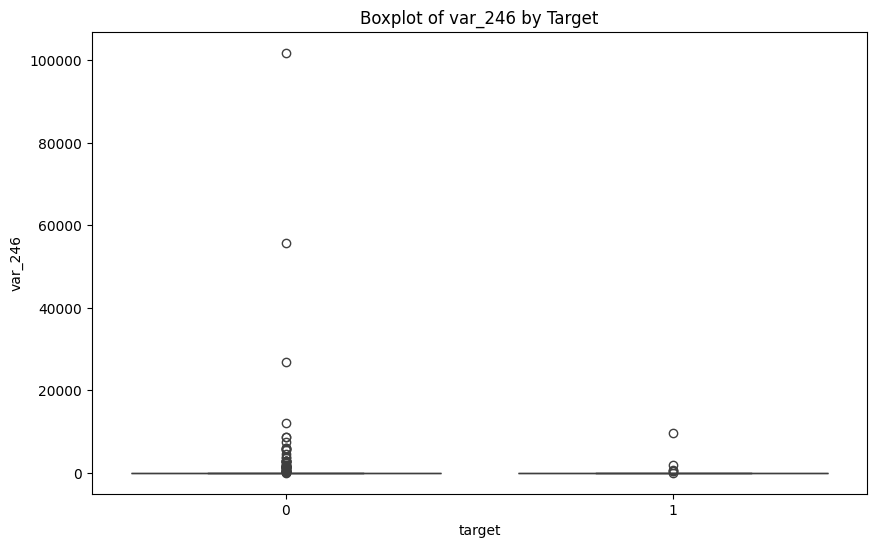

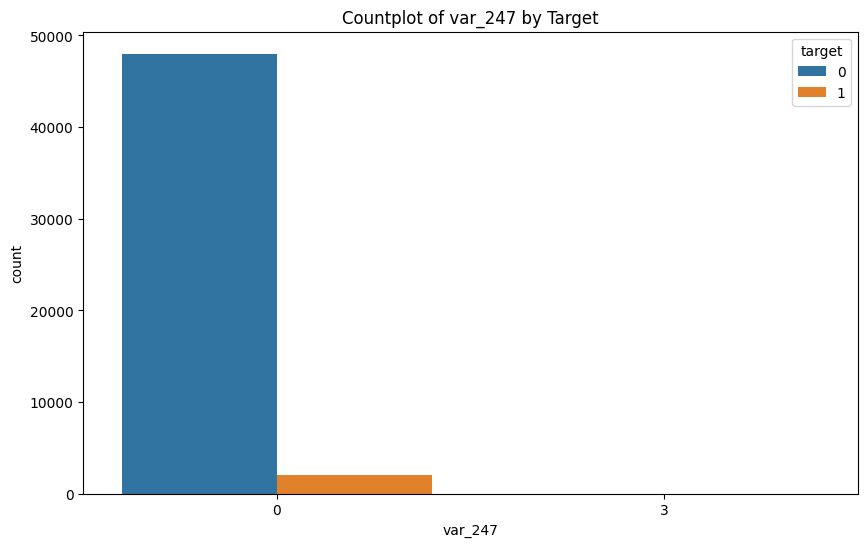

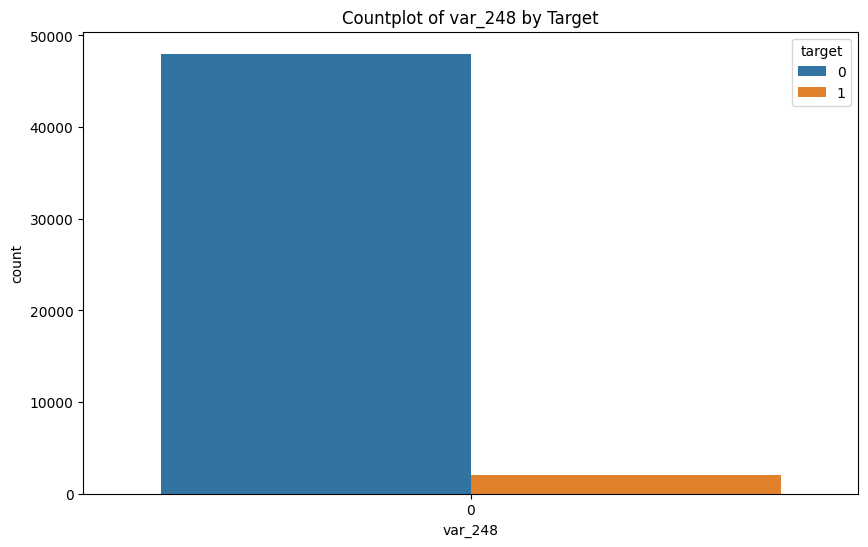

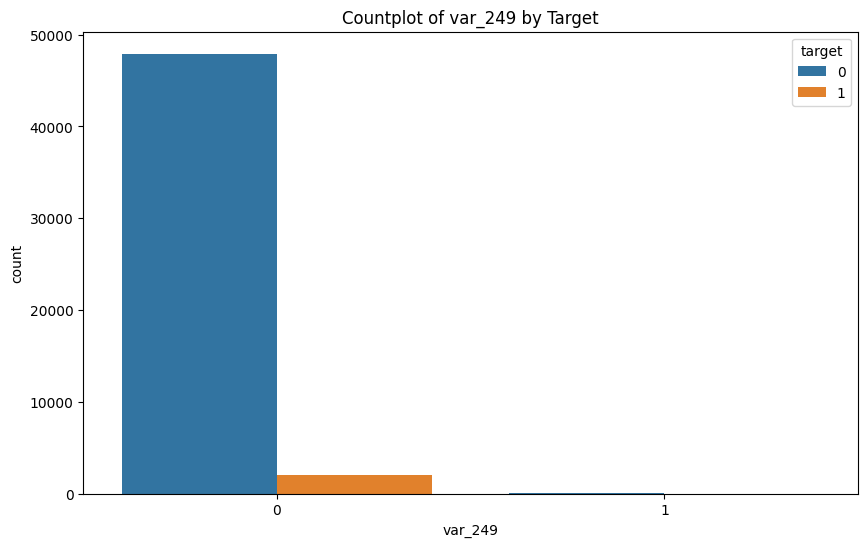

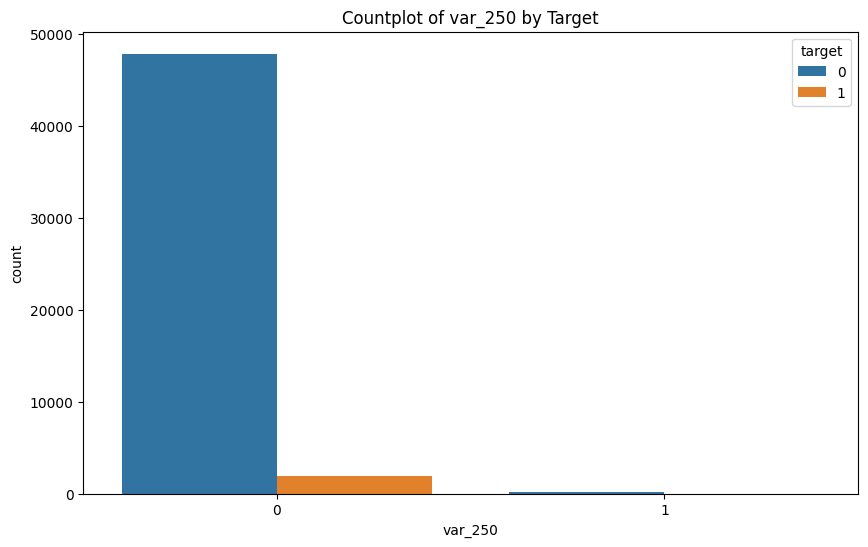

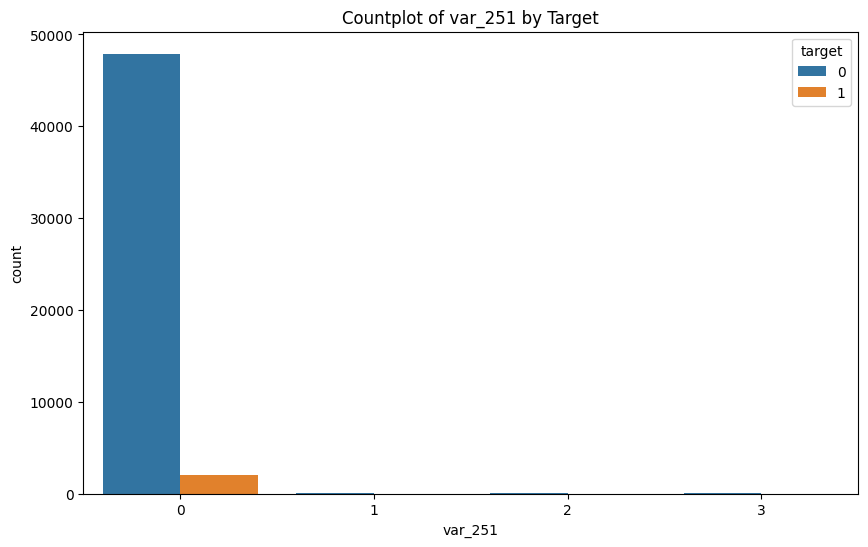

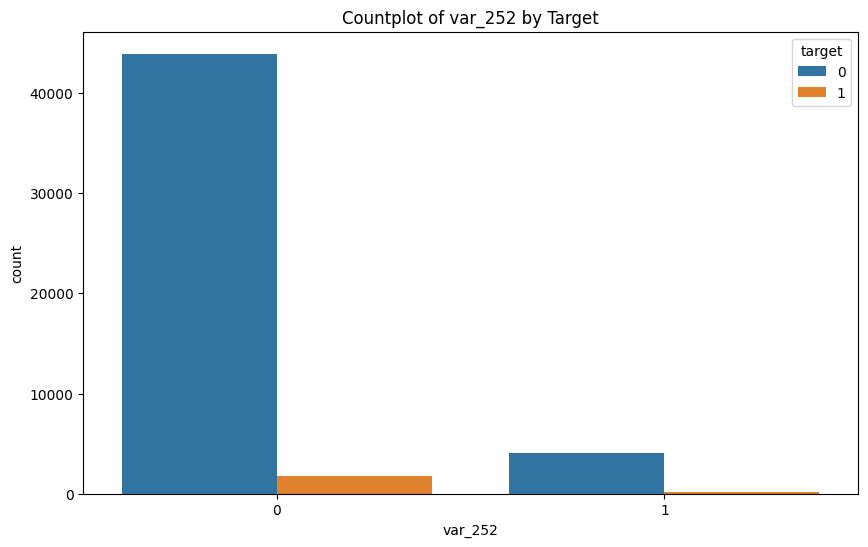

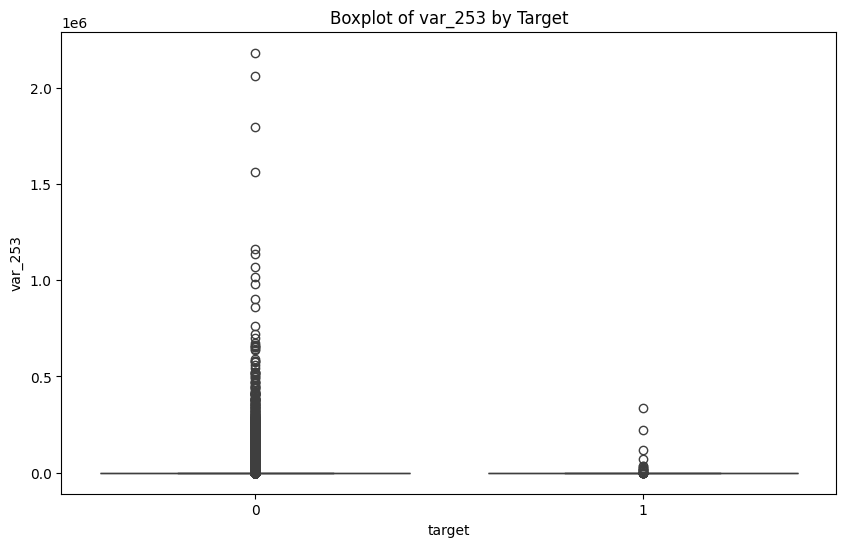

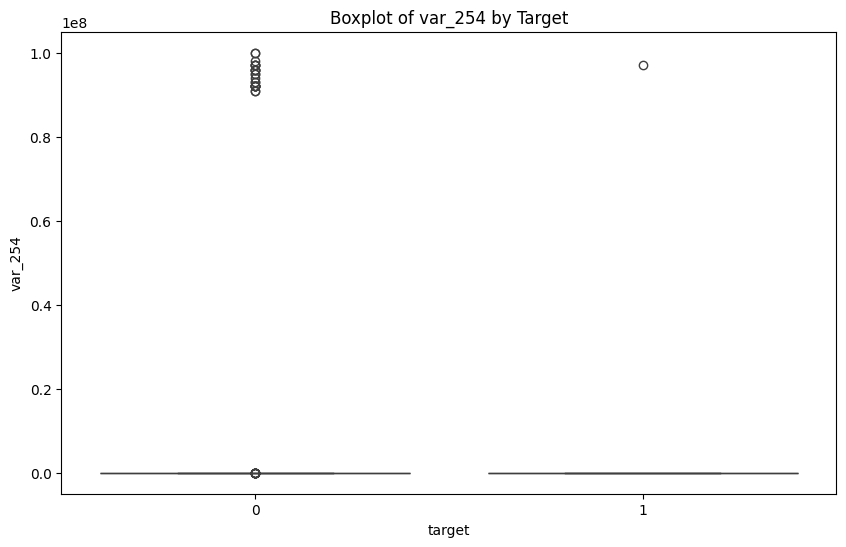

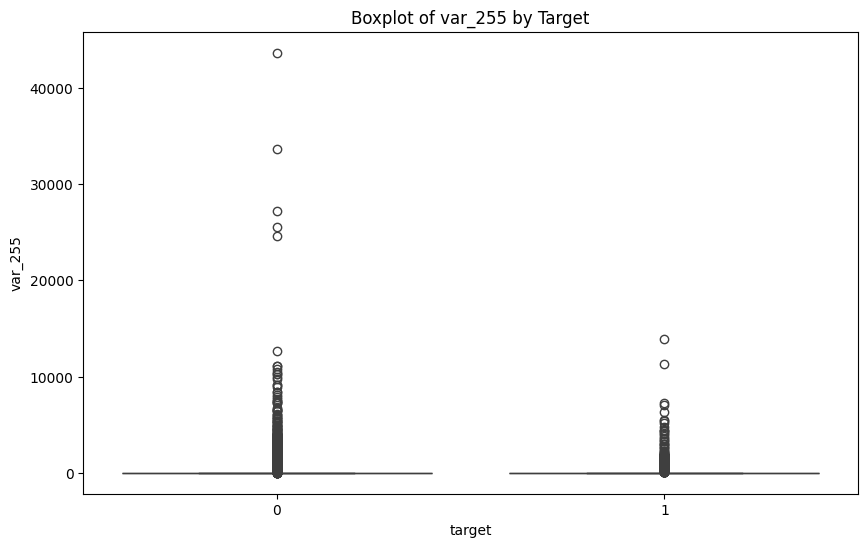

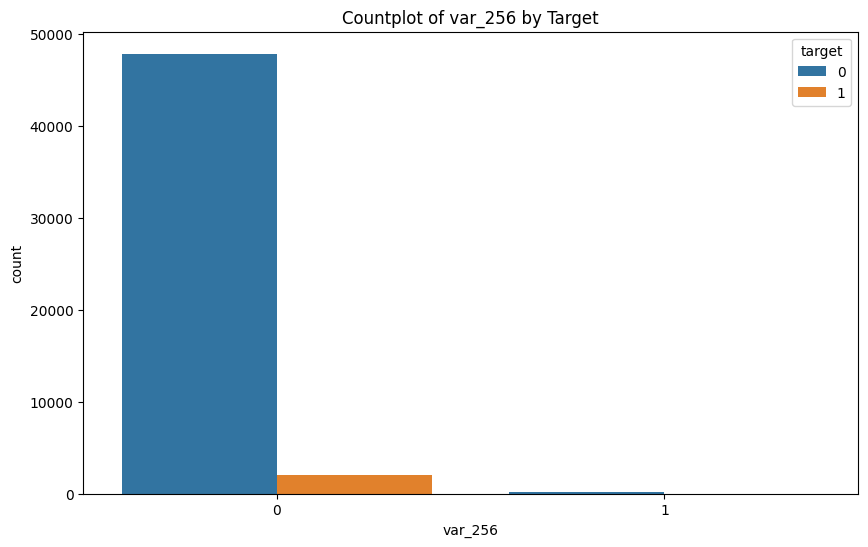

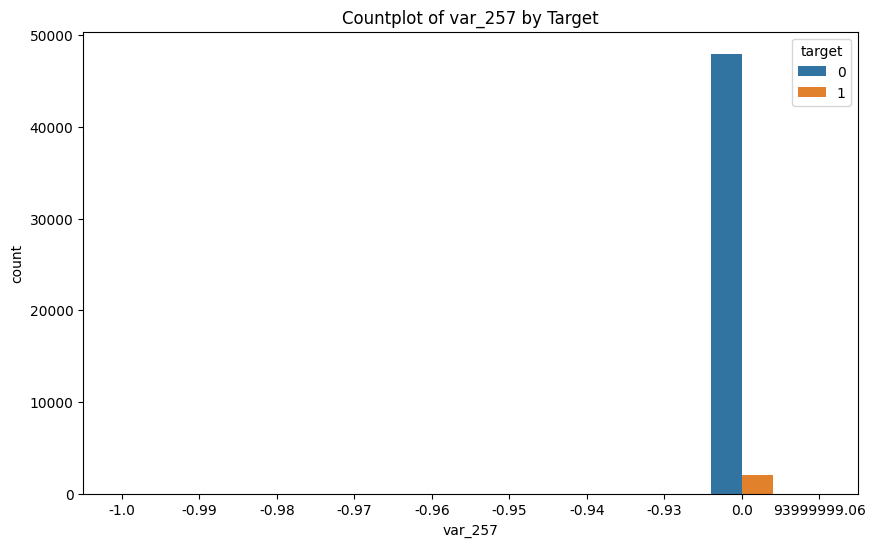

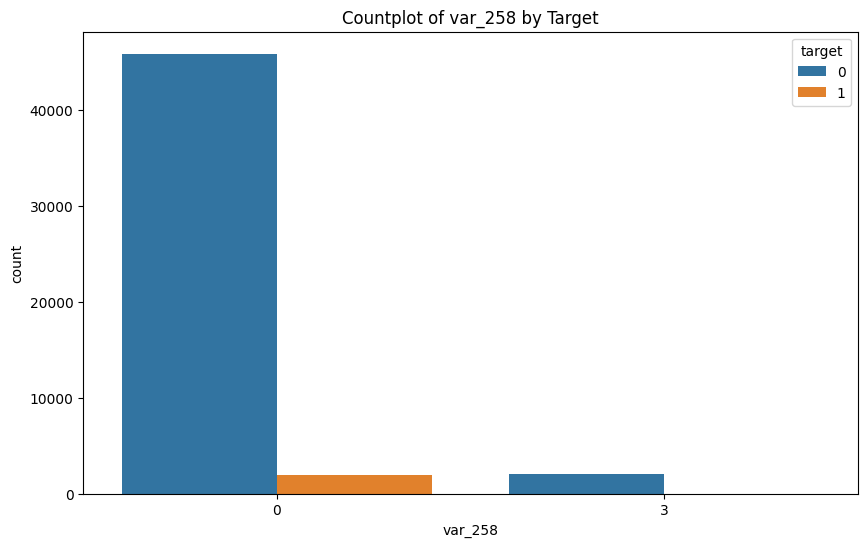

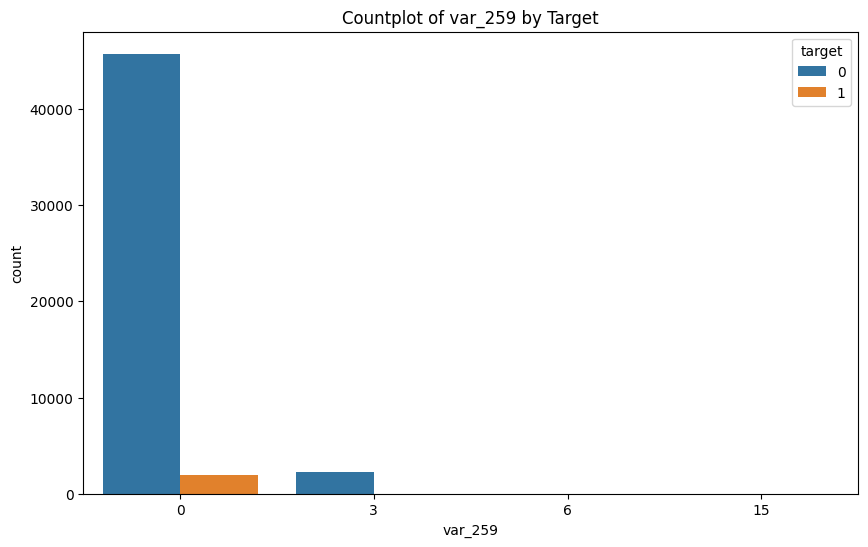

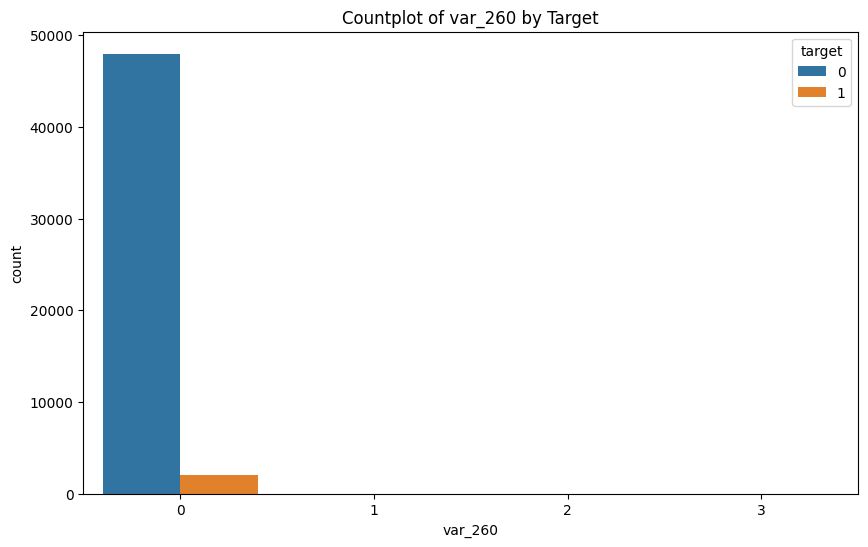

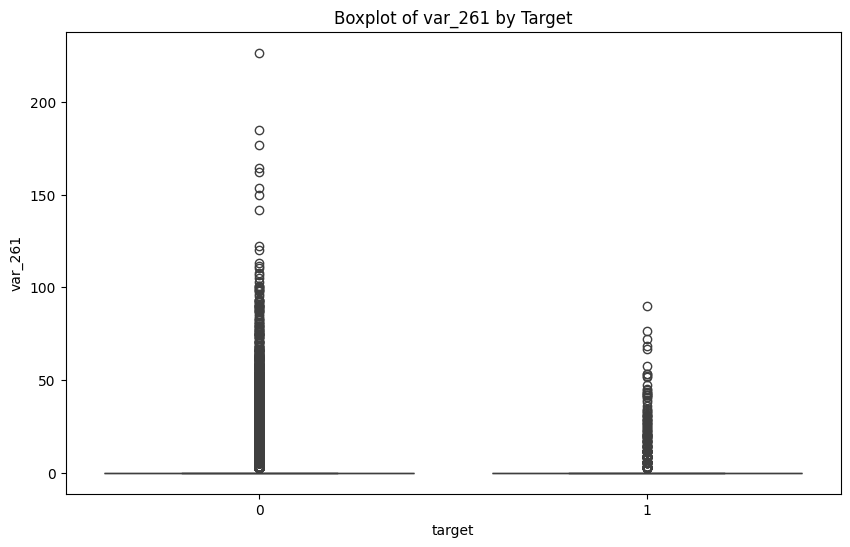

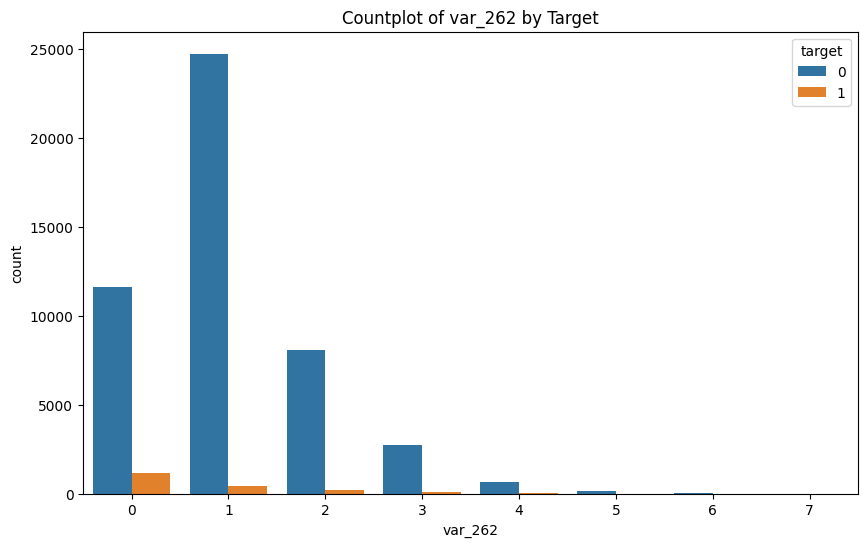

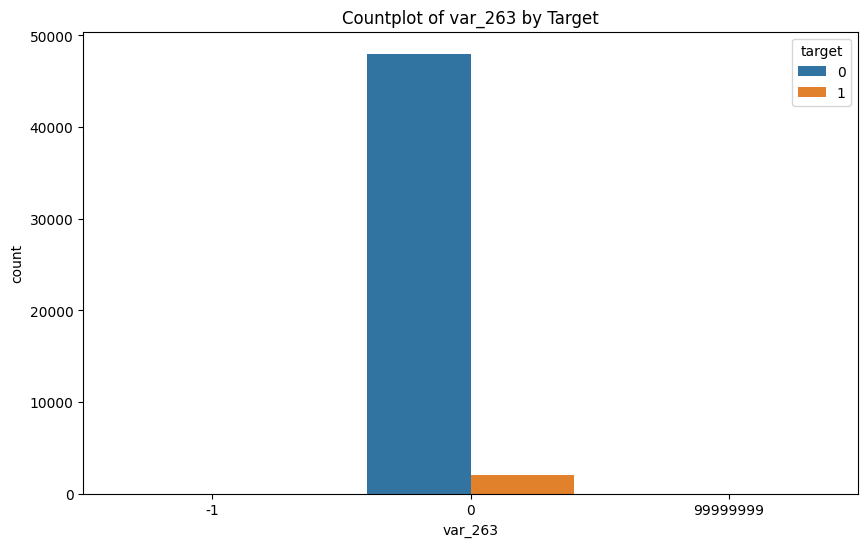

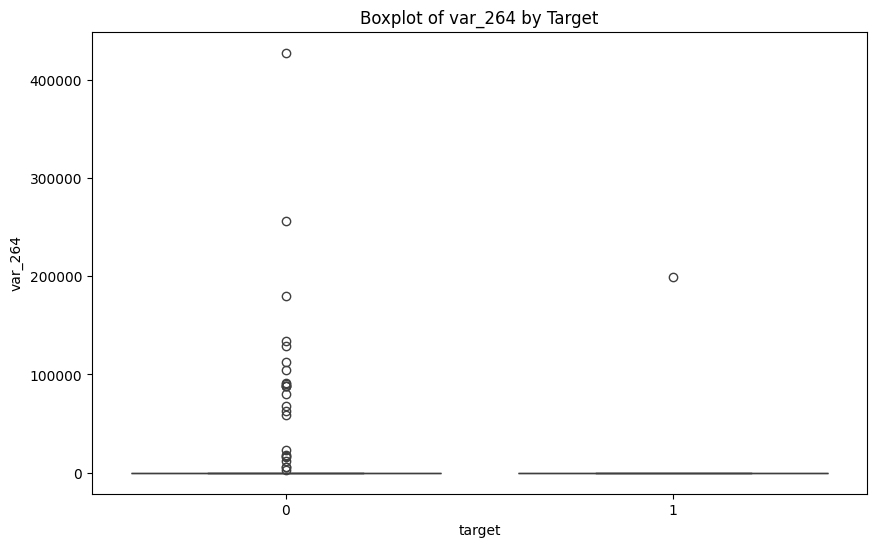

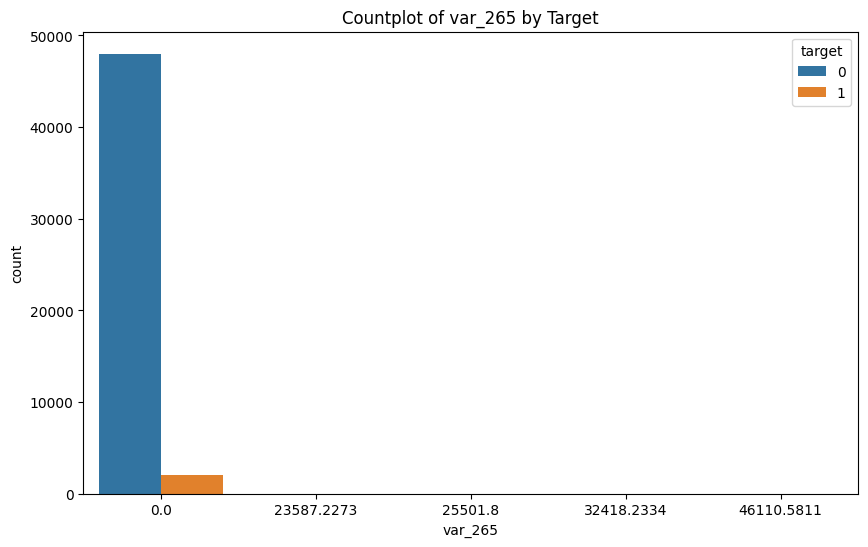

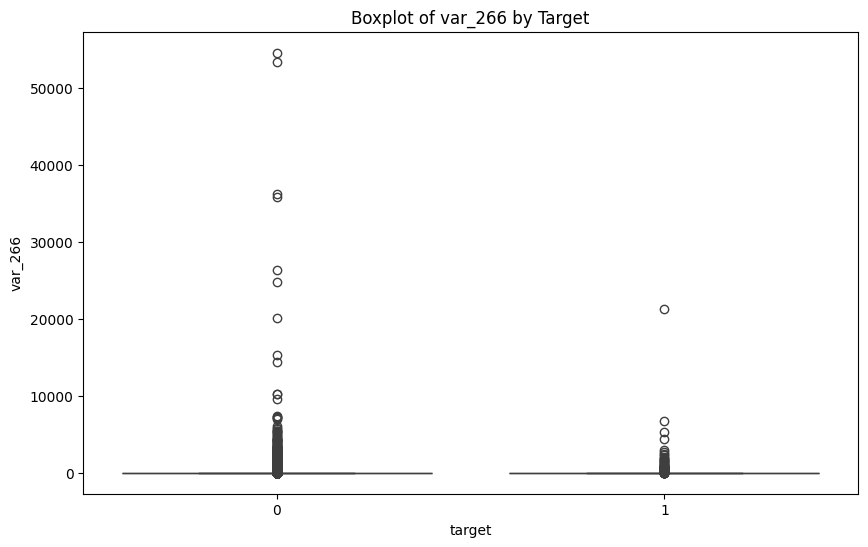

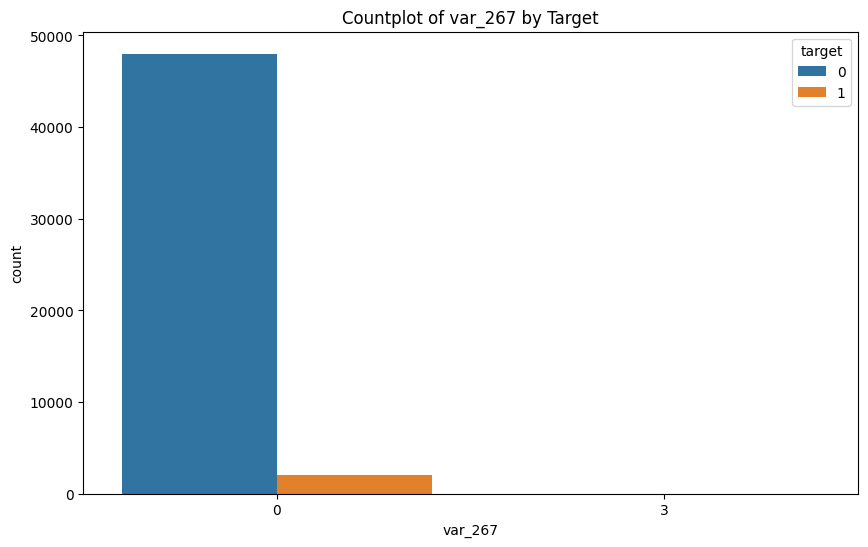

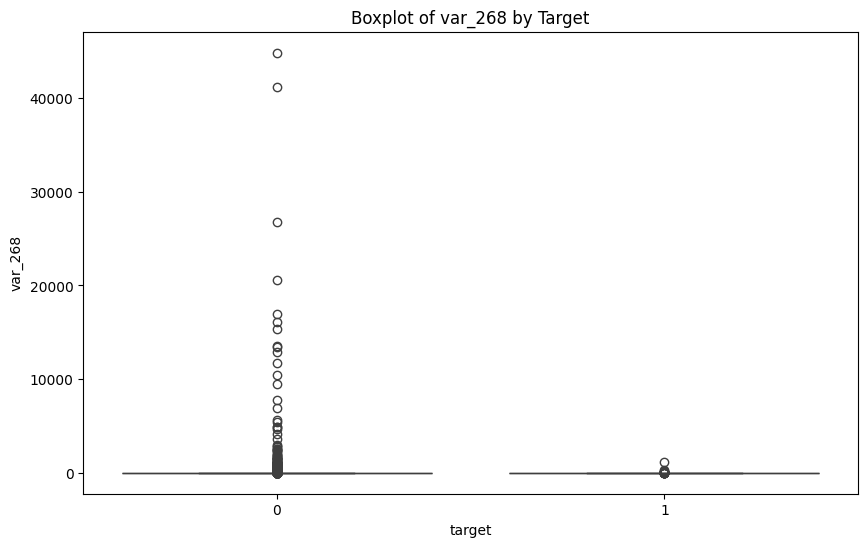

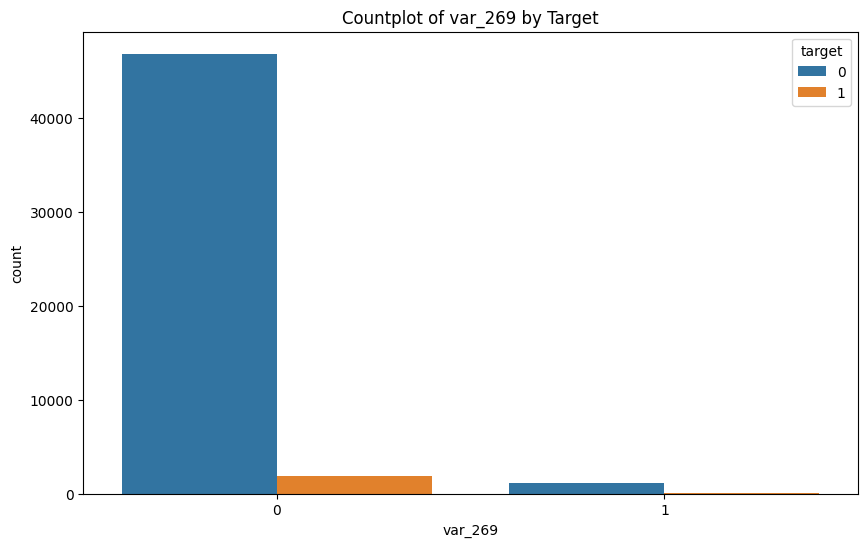

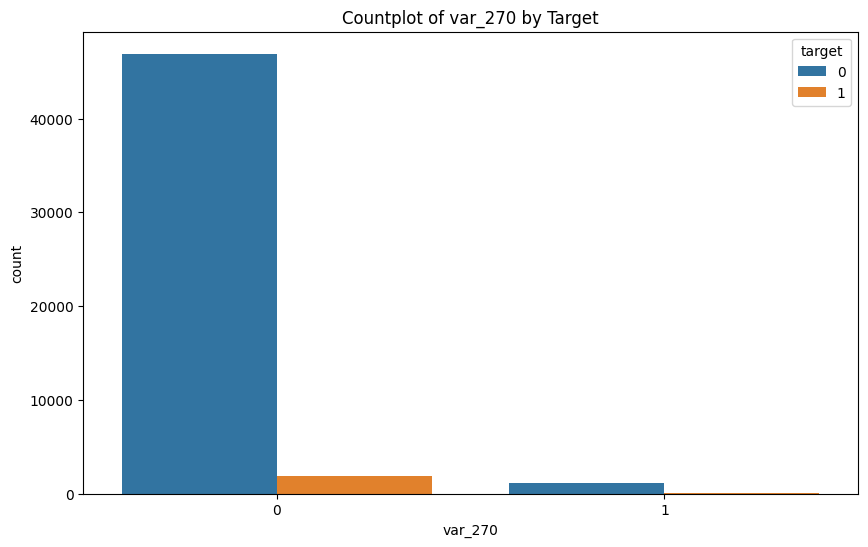

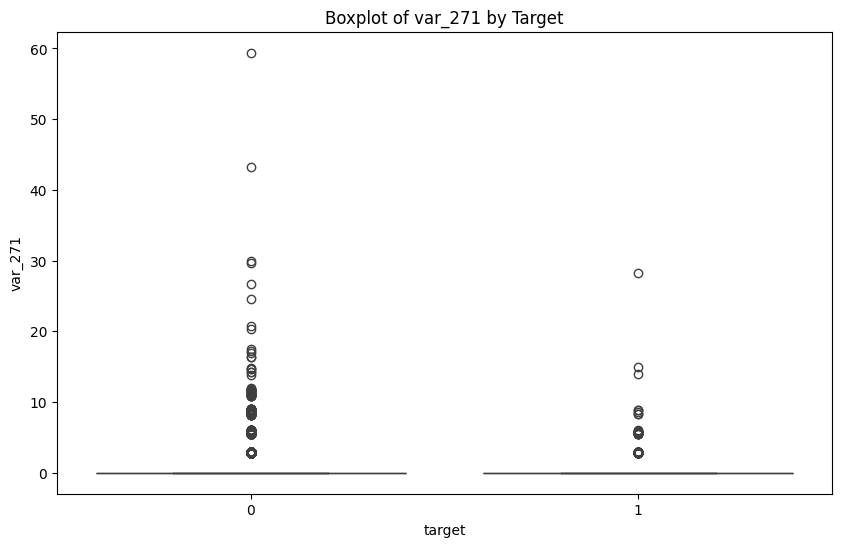

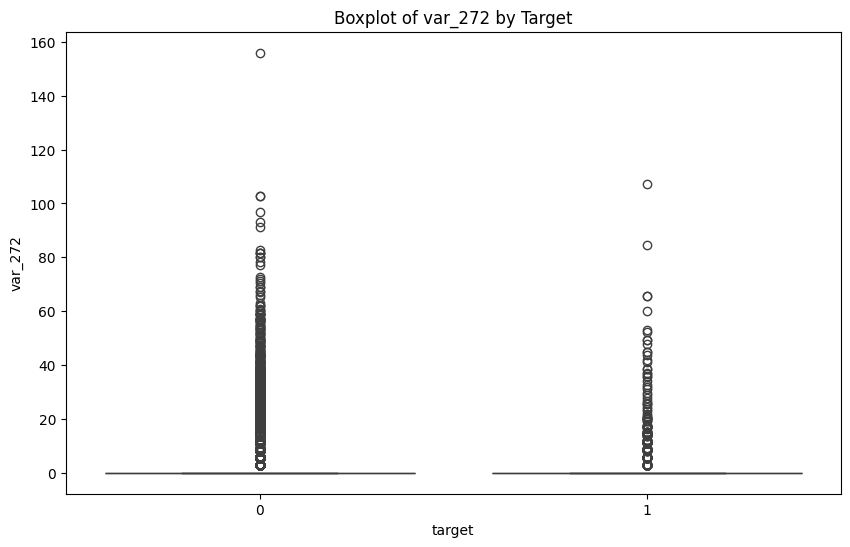

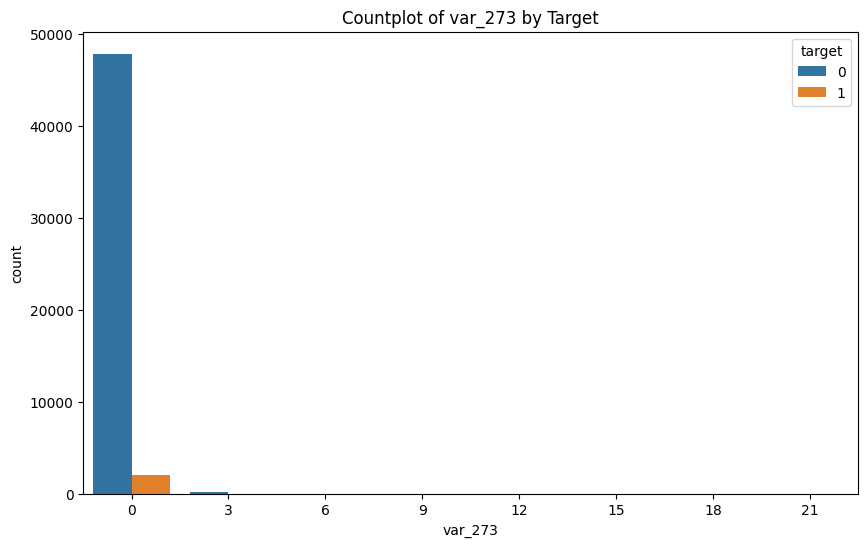

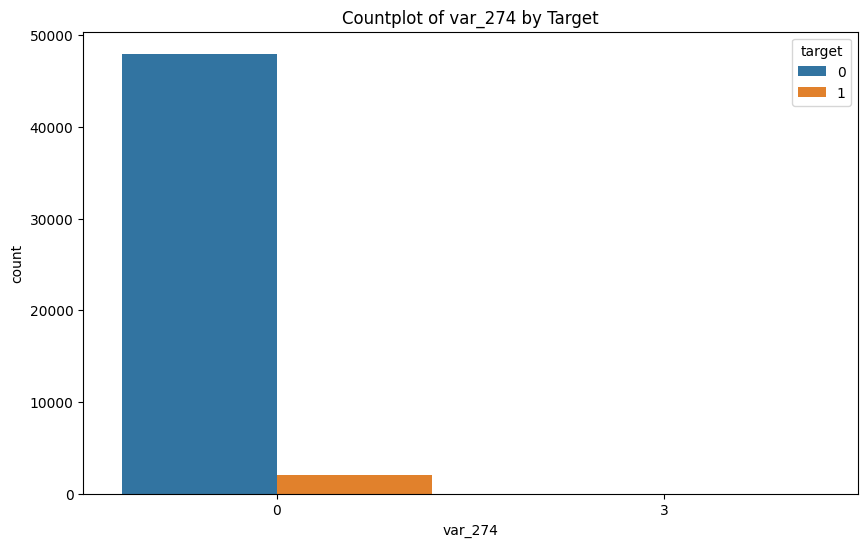

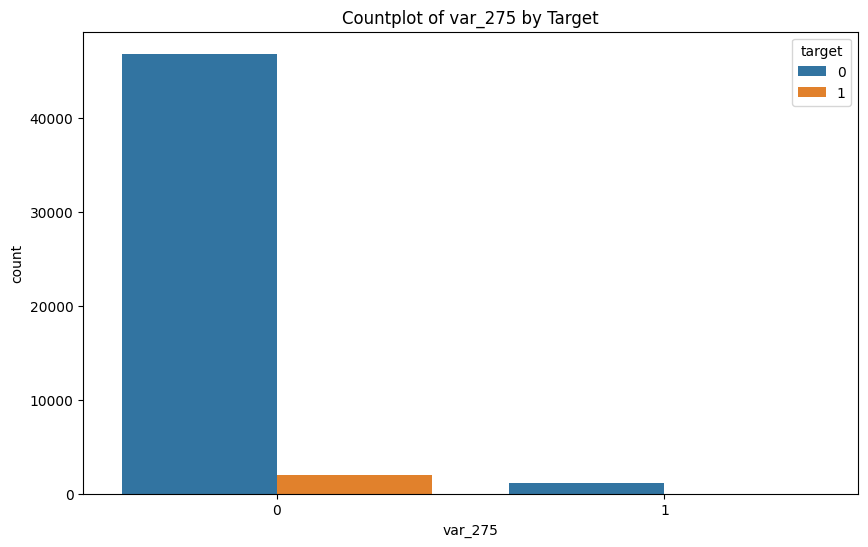

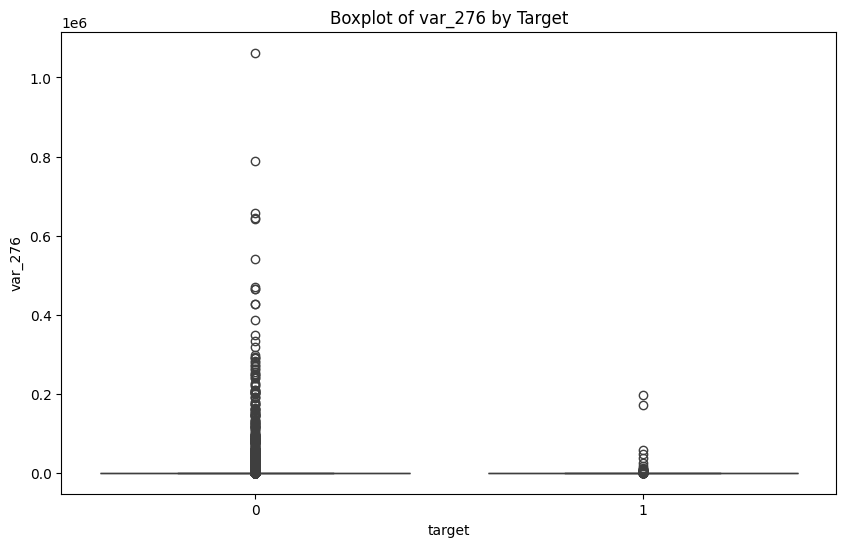

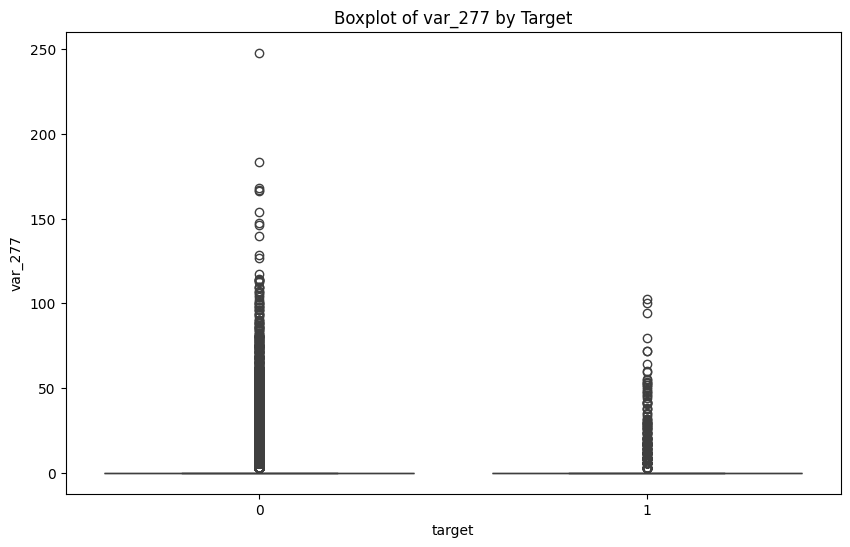

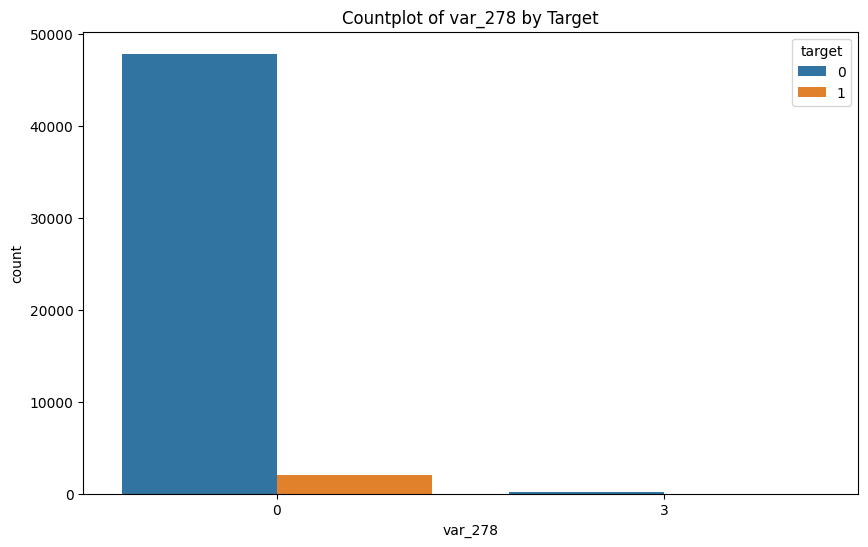

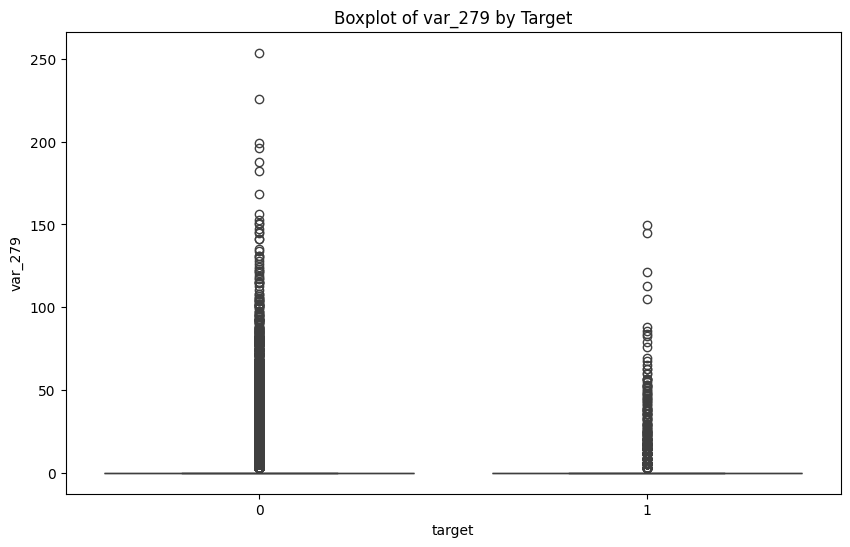

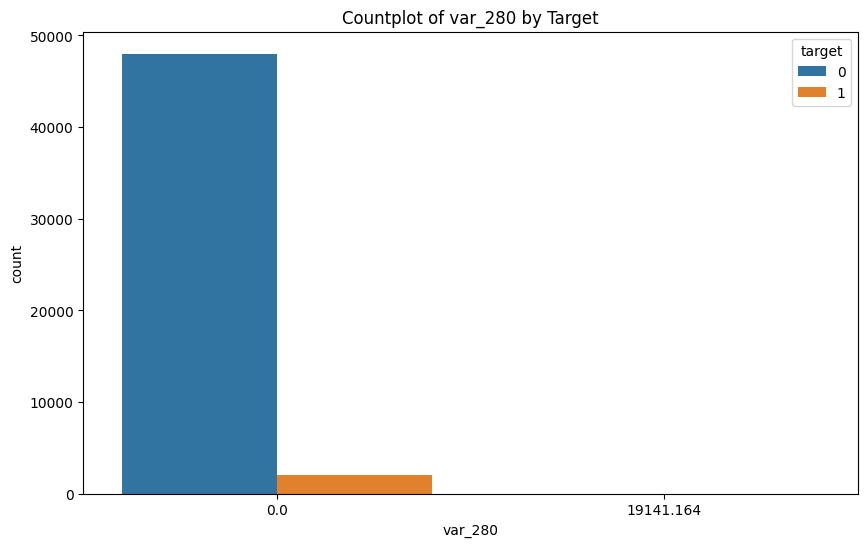

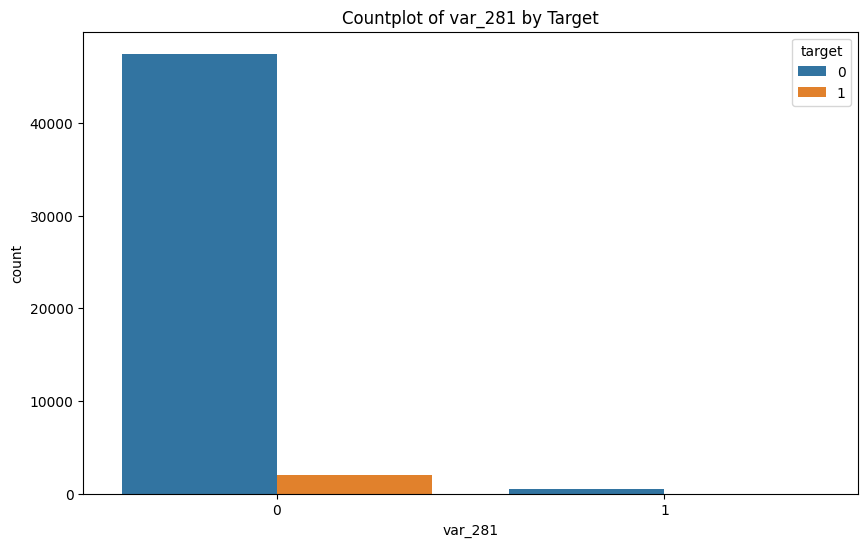

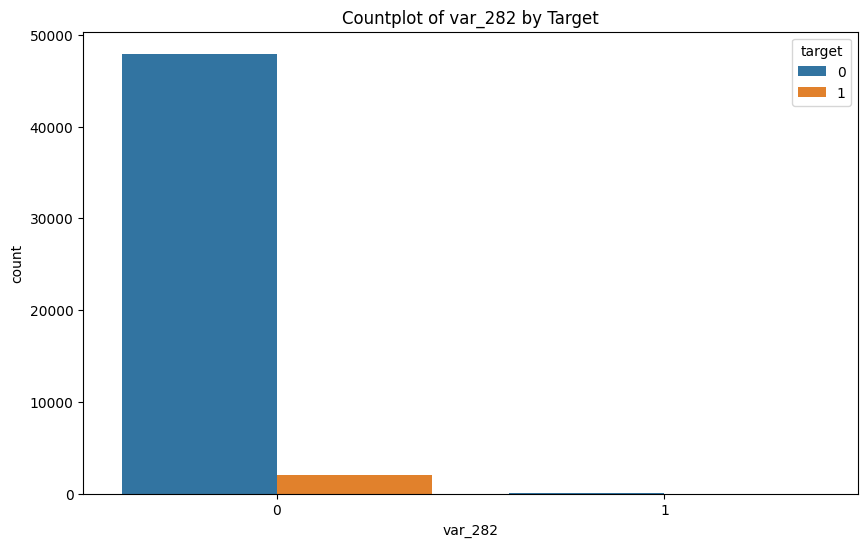

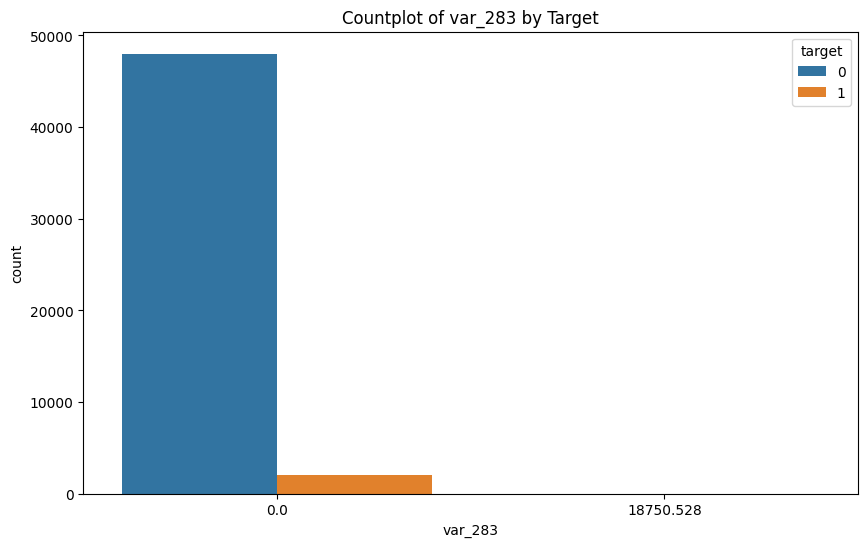

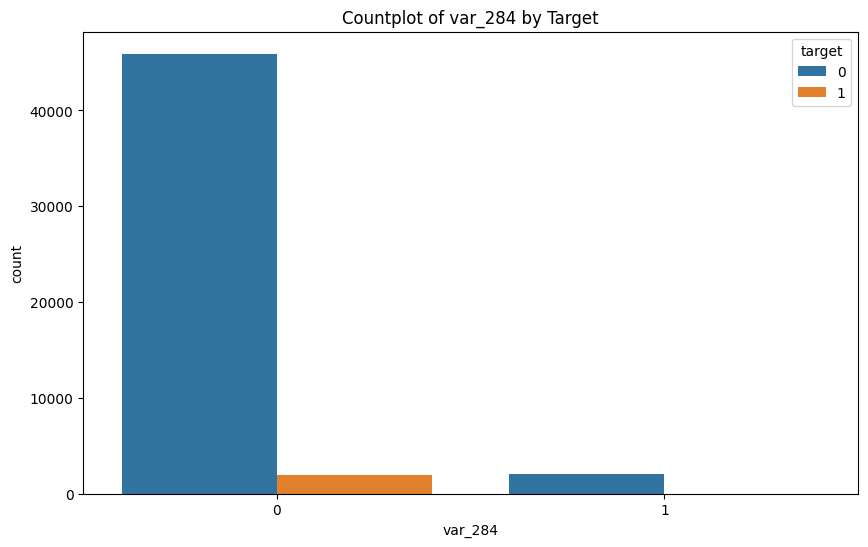

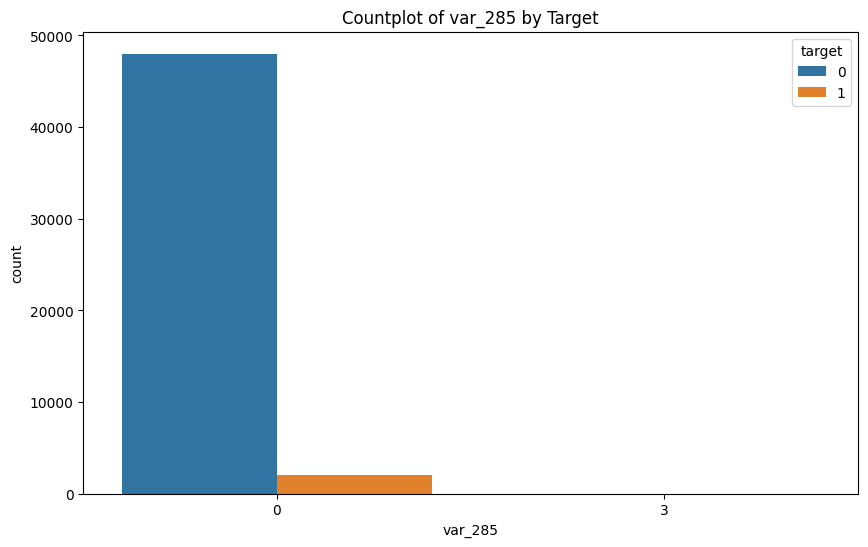

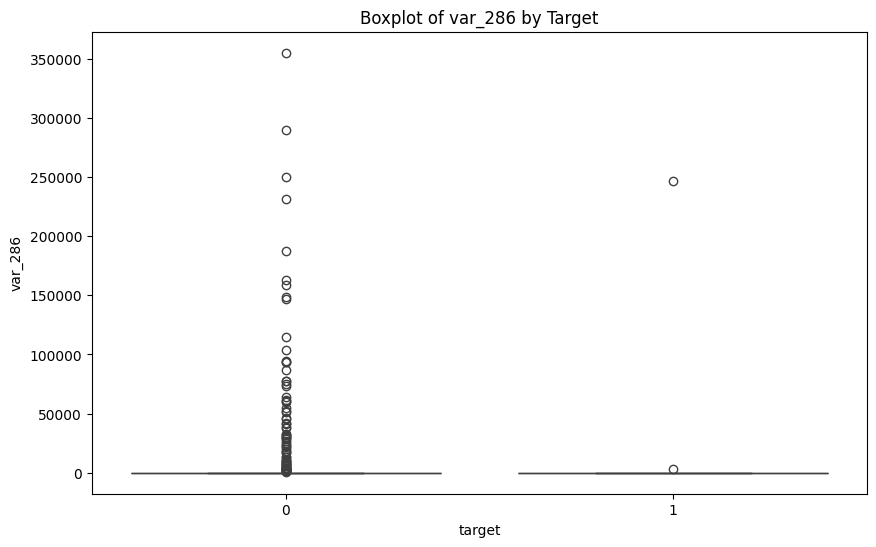

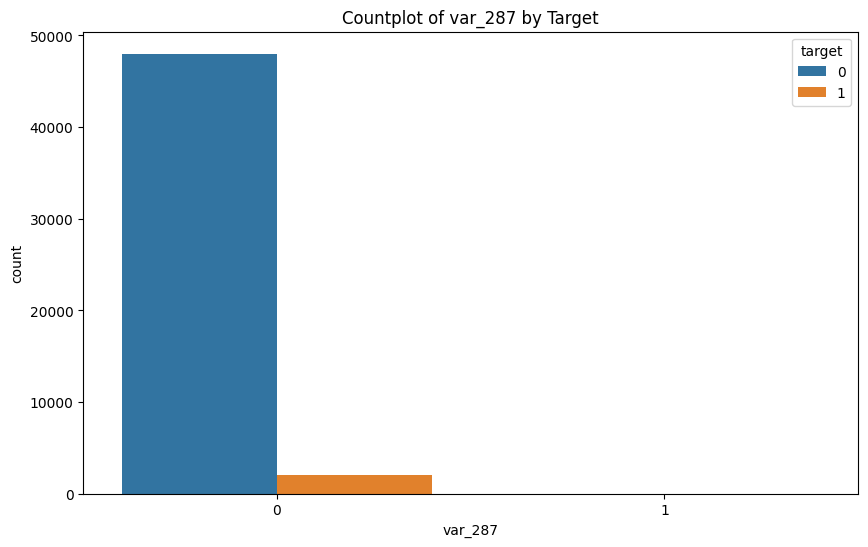

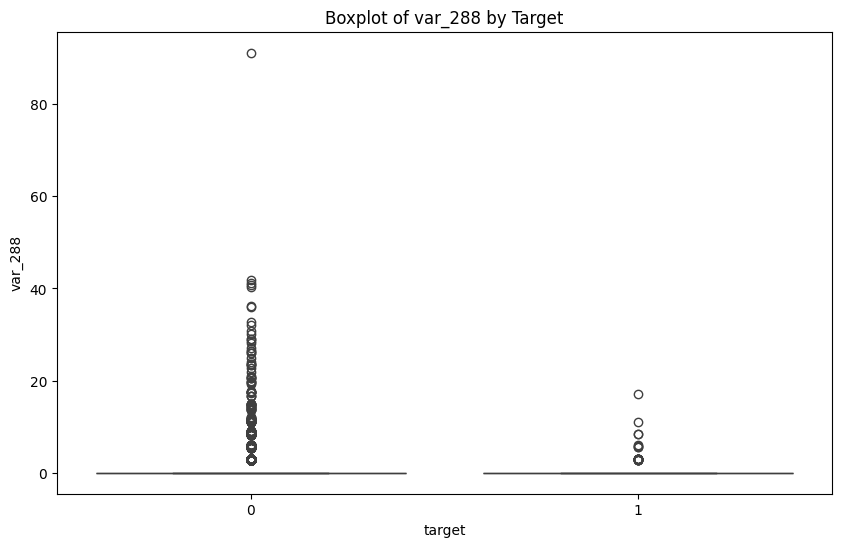

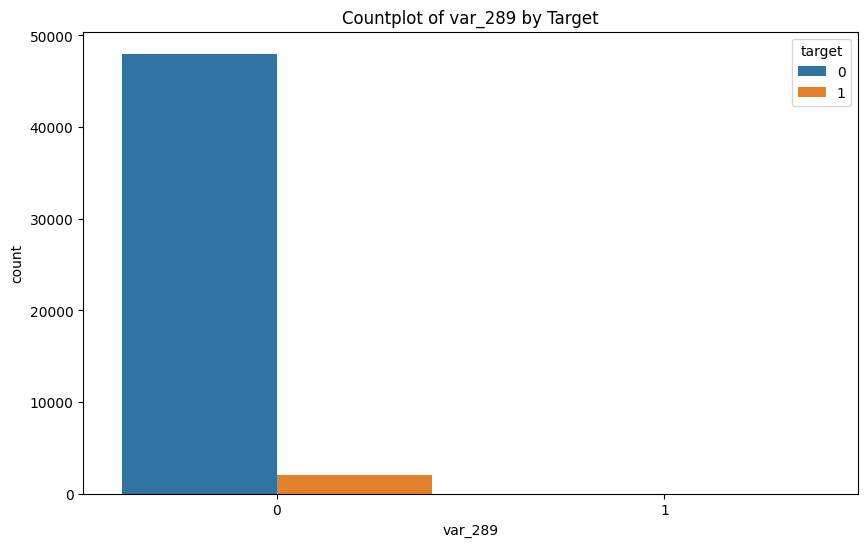

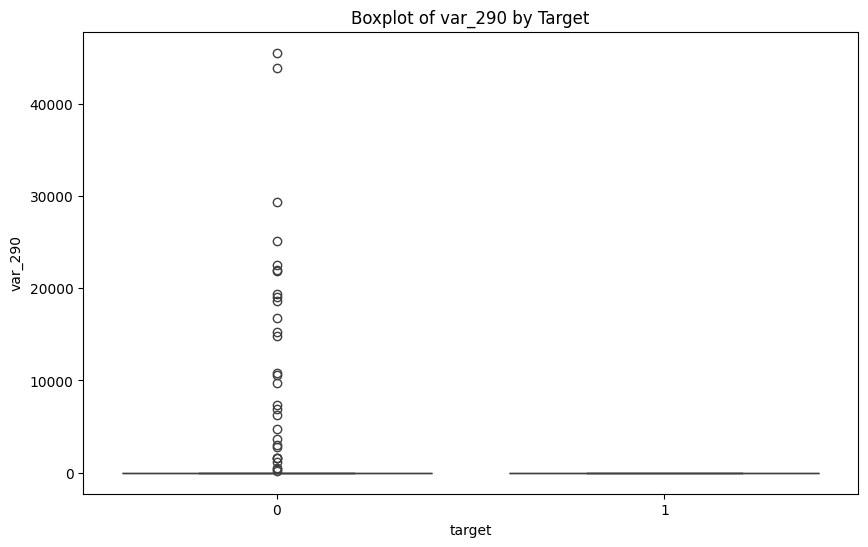

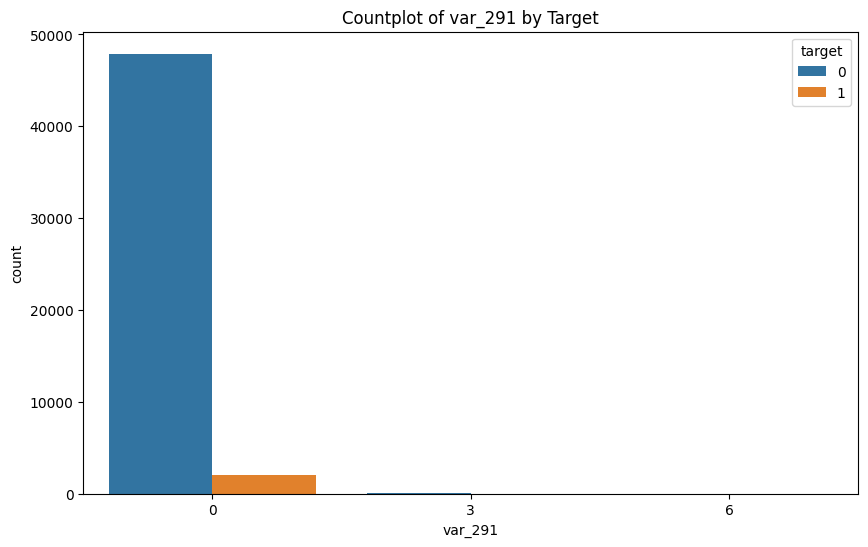

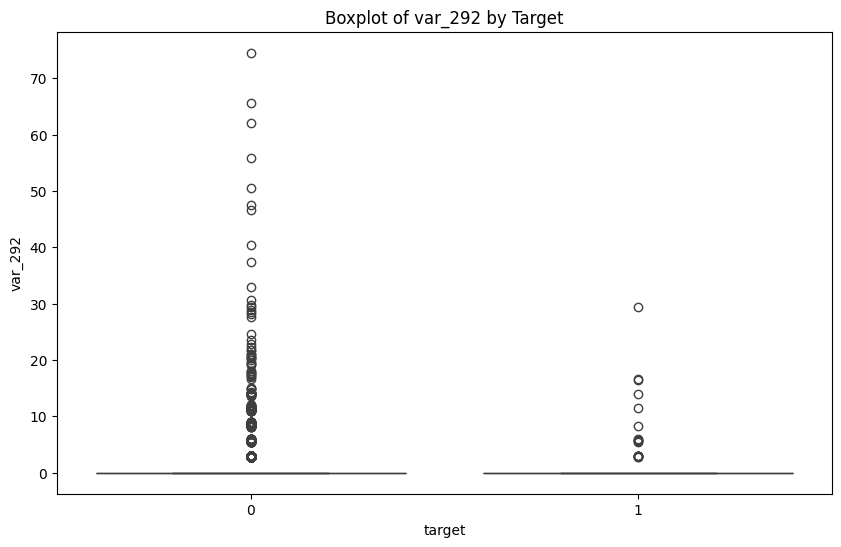

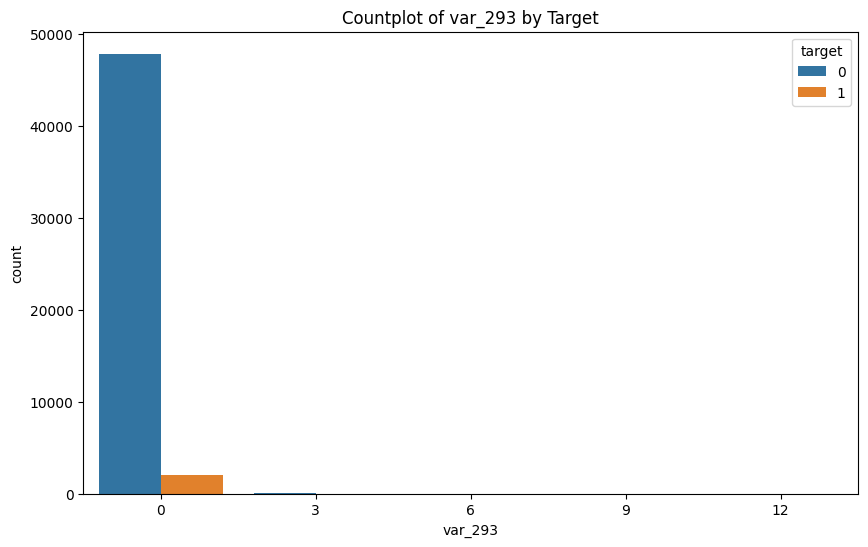

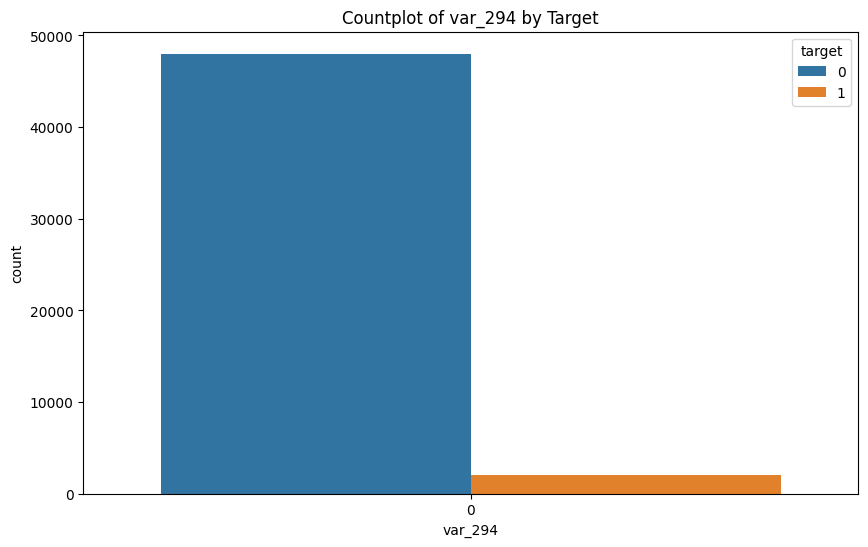

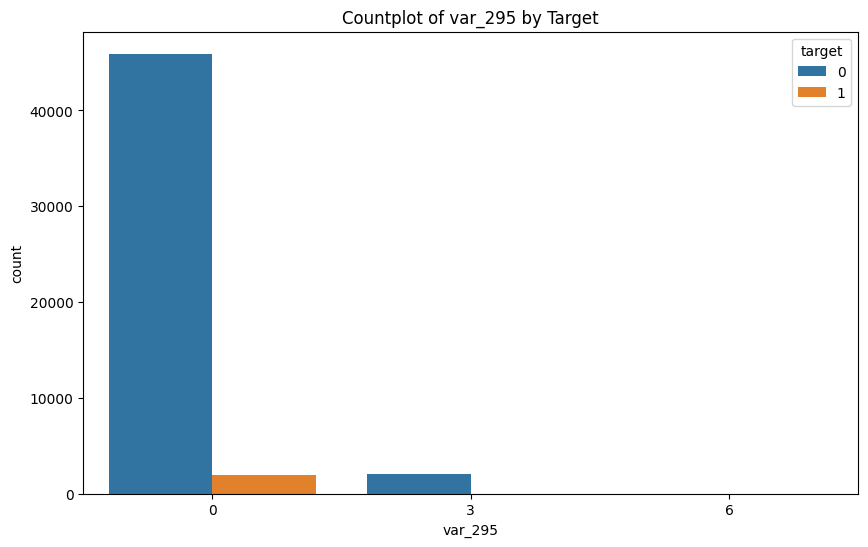

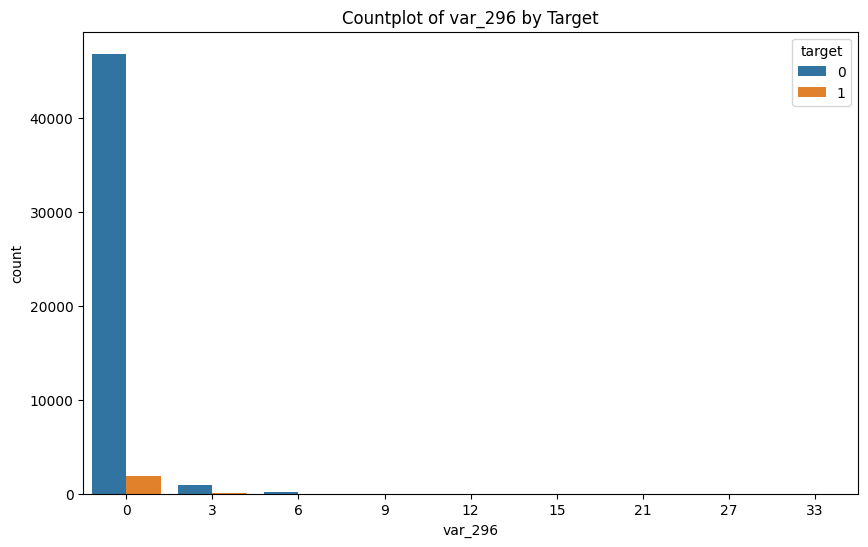

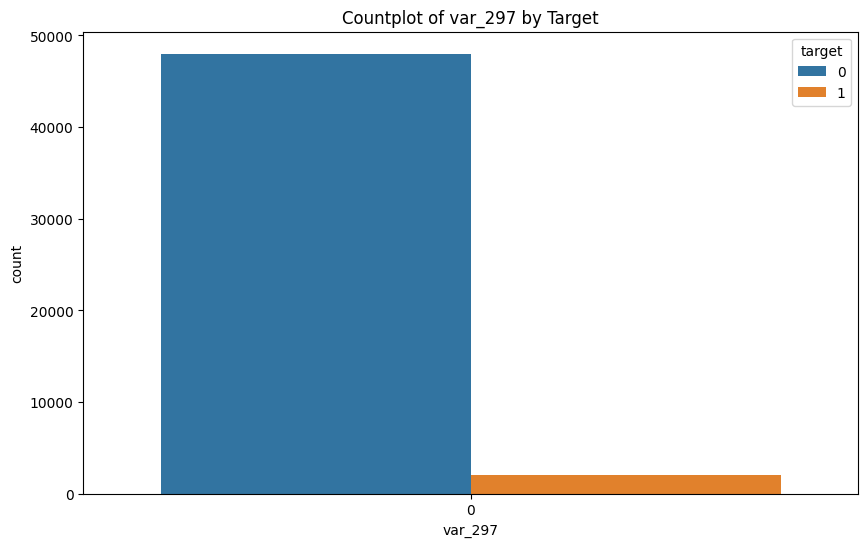

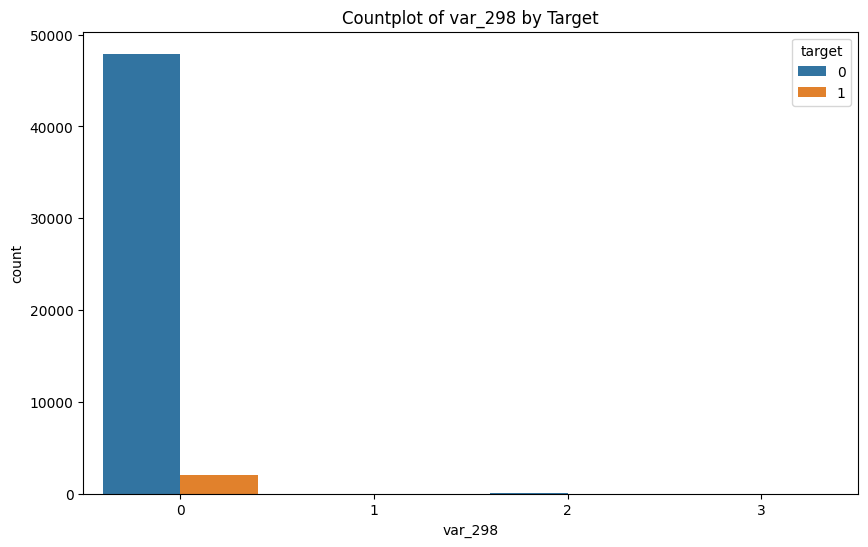

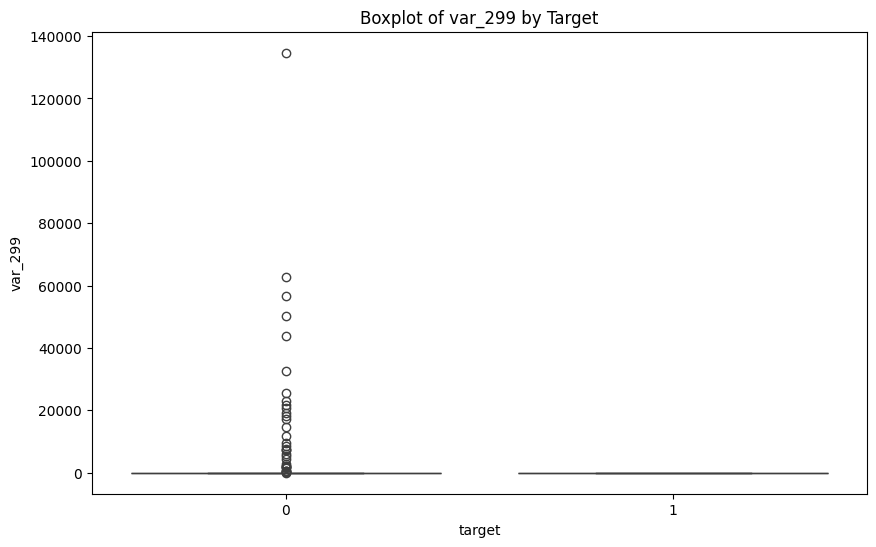

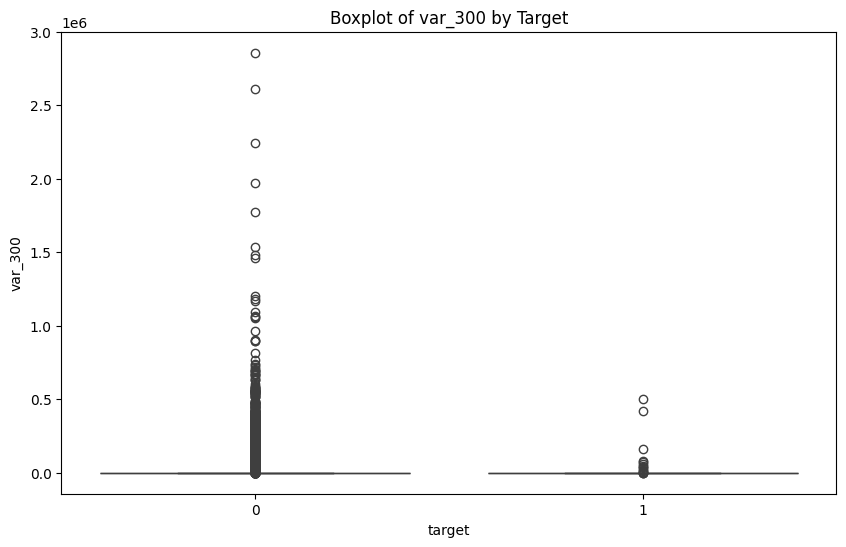

In [14]:
import seaborn as sns
import matplotlib.pyplot as plt


for col in df3.columns:
    if col == 'target':
        continue

    # Determine if the column is continuous or discrete
    # Here we assume a threshold for the number of unique values to determine discreteness
    # This is a simple heuristic and might need adjustment
    if df3[col].nunique() > 20:  # Adjust this threshold as necessary
        plt.figure(figsize=(10, 6))
        sns.boxplot(x='target', y=col, data=df3)
        plt.title(f'Boxplot of {col} by Target')
    else:
        plt.figure(figsize=(10, 6))
        sns.countplot(x=col, hue='target', data=df3)
        plt.title(f'Countplot of {col} by Target')
    plt.show()


In [15]:
target_column_name = 'target'

# List excluding the target column
X_feature = [column for column in df3.columns if column != target_column_name]

# Indices for these features
X_index = list(range(len(X_feature)))

print("Features:", X_feature)
print("Indices:", X_index)

Features: ['var_1', 'var_2', 'var_3', 'var_4', 'var_5', 'var_6', 'var_7', 'var_8', 'var_9', 'var_10', 'var_11', 'var_12', 'var_13', 'var_14', 'var_15', 'var_16', 'var_17', 'var_18', 'var_19', 'var_20', 'var_21', 'var_22', 'var_23', 'var_24', 'var_25', 'var_26', 'var_27', 'var_28', 'var_29', 'var_30', 'var_31', 'var_32', 'var_33', 'var_34', 'var_35', 'var_36', 'var_37', 'var_38', 'var_39', 'var_40', 'var_41', 'var_42', 'var_43', 'var_44', 'var_45', 'var_46', 'var_47', 'var_48', 'var_49', 'var_50', 'var_51', 'var_52', 'var_53', 'var_54', 'var_55', 'var_56', 'var_57', 'var_58', 'var_59', 'var_60', 'var_61', 'var_62', 'var_63', 'var_64', 'var_65', 'var_66', 'var_67', 'var_68', 'var_69', 'var_70', 'var_71', 'var_72', 'var_73', 'var_74', 'var_75', 'var_76', 'var_77', 'var_78', 'var_79', 'var_80', 'var_81', 'var_82', 'var_83', 'var_84', 'var_85', 'var_86', 'var_87', 'var_88', 'var_89', 'var_90', 'var_91', 'var_92', 'var_93', 'var_94', 'var_95', 'var_96', 'var_97', 'var_98', 'var_99', 'var_100

IndexError: index 15 is out of bounds for axis 0 with size 15

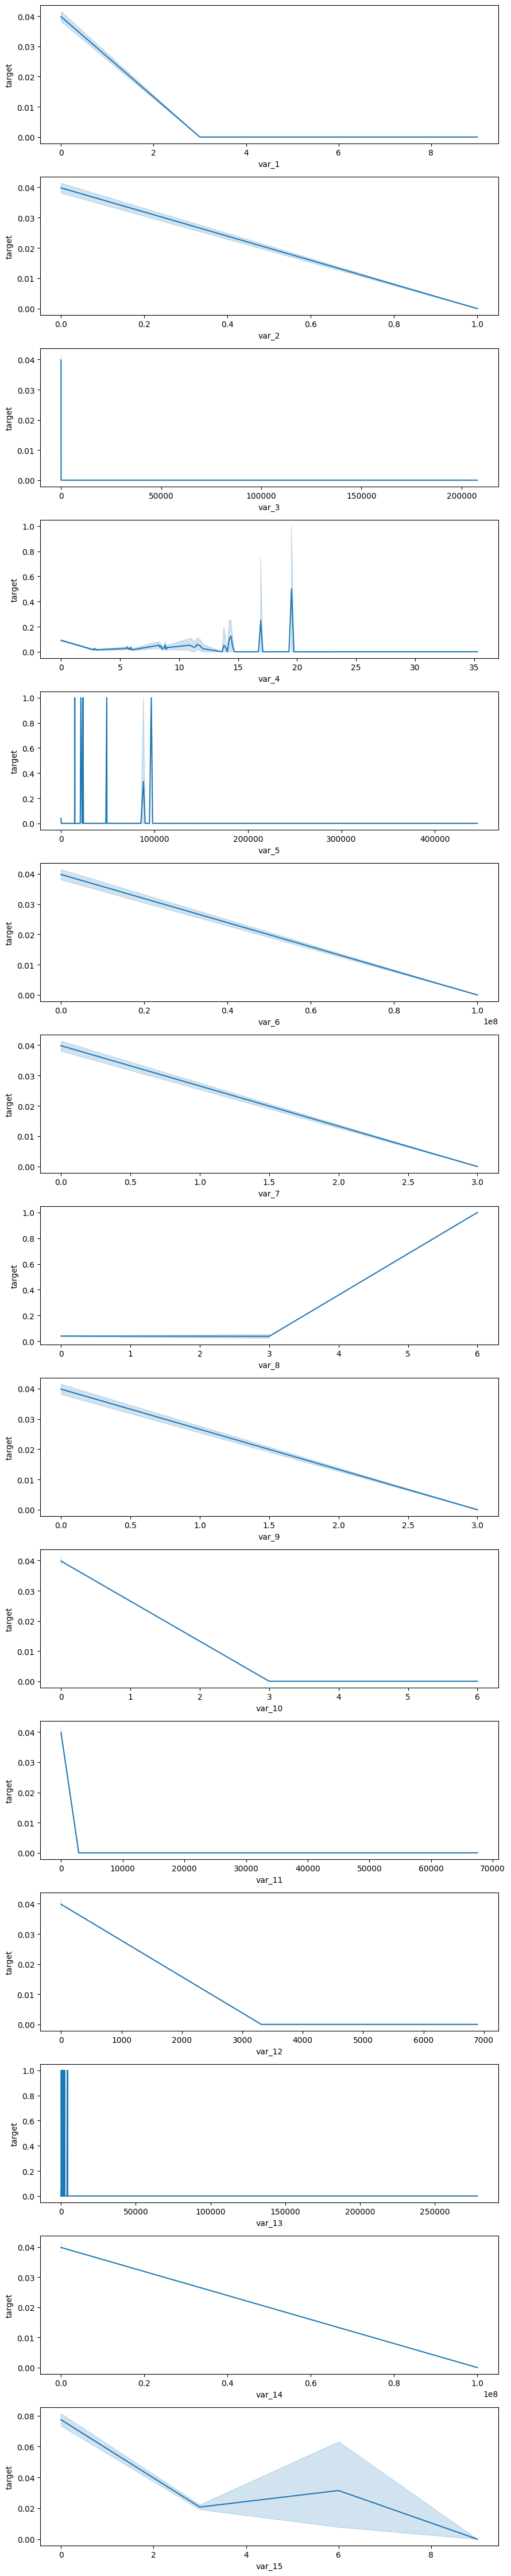

In [16]:
fig, ax = plt.subplots(15, 1, figsize=(9, 45))  # Adjusted figsize for clarity

for i, feature in enumerate(X_feature):
    sns.lineplot(data=df3, x=feature, y='target', ax=ax[i])
    plt.tight_layout()

#### Missing Value Handling

In [17]:
df3.isna().sum()

var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
          ..
var_297    0
var_298    0
var_299    0
var_300    0
target     0
Length: 301, dtype: int64

In [18]:
df3.isnull().sum()

var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
          ..
var_297    0
var_298    0
var_299    0
var_300    0
target     0
Length: 301, dtype: int64

In [19]:
df3.isnull().sum().sum()

0

In [20]:
df3.isnull().any().any()

False

In [21]:
count_nan = df3.isnull().sum()
print ('Count of NaN: ' + str(count_nan))

Count of NaN: var_1      0
var_2      0
var_3      0
var_4      0
var_5      0
          ..
var_297    0
var_298    0
var_299    0
var_300    0
target     0
Length: 301, dtype: int64


In [22]:
for column in df3.columns:
    print(f"============= {column} =================")
    display(df3[column].value_counts())
    print()

============= var_1 =================


0    49975
3       15
6        8
9        2
Name: var_1, dtype: int64


============= var_2 =================


0    49997
1        3
Name: var_2, dtype: int64


============= var_3 =================


0.0000         49975
121142.0394        1
861.0900           1
6211.5165          1
7134.8904          1
207901.3365        1
10308.2616         1
2641.0164          1
12644.1000         1
10281.6000         1
10385.4912         1
5194.1709          1
12542.3100         1
101195.4735        1
52105.7901         1
86718.0000         1
5209.9500          1
14629.9626         1
25905.4866         1
3583.3941          1
35685.9459         1
13297.0320         1
2928.9150          1
15028.0560         1
27.3000            1
16086.9720         1
Name: var_3, dtype: int64


============= var_4 =================


0.00     12803
2.79      2548
2.91      2546
2.82      2541
2.94      2531
         ...  
26.19        1
33.84        1
16.74        1
25.38        1
19.32        1
Name: var_4, Length: 75, dtype: int64


============= var_5 =================


0.0         49734
90000.0         5
83700.0         4
297000.0        3
82800.0         3
            ...  
19530.0         1
27300.0         1
8640.0          1
117180.0        1
14550.0         1
Name: var_5, Length: 222, dtype: int64


============= var_6 =================


0           49998
99999999        2
Name: var_6, dtype: int64


============= var_7 =================


0    49995
3        5
Name: var_7, dtype: int64


============= var_8 =================


0    49417
3      582
6        1
Name: var_8, dtype: int64


============= var_9 =================


0    49996
3        4
Name: var_9, dtype: int64


============= var_10 =================


0    49998
3        1
6        1
Name: var_10, dtype: int64


============= var_11 =================


0.0000        49998
67511.0397        1
2875.9488         1
Name: var_11, dtype: int64


============= var_12 =================


0.0000       49998
6891.4596        1
3316.2600        1
Name: var_12, dtype: int64


============= var_13 =================


0.0000       49807
5497.2000        1
795.7194         1
58.9764          1
440.2800         1
             ...  
853.6290         1
914.5200         1
188.8590         1
91.9512          1
1527.6087        1
Name: var_13, Length: 194, dtype: int64


============= var_14 =================


0           49999
99999999        1
Name: var_14, dtype: int64


============= var_15 =================


3    33063
0    16807
6      127
9        3
Name: var_15, dtype: int64


============= var_16 =================


0.0000        49899
62732.7024        1
52462.3008        1
29878.2300        1
5084.7342         1
              ...  
1595.3202         1
5950.4820         1
1612.0455         1
190.5228          1
12581.1126        1
Name: var_16, Length: 102, dtype: int64


============= var_17 =================


0.00     40607
2.97       471
3.00       468
2.76       466
2.94       462
         ...  
25.65        1
34.56        1
35.28        1
49.47        1
41.85        1
Name: var_17, Length: 118, dtype: int64


============= var_18 =================


0.0000       48586
2.7300           4
13.8000          3
56.4000          3
2.8500           2
             ...  
139.2192         1
4364.4249        1
758.9100         1
2299.0746        1
27.6000          1
Name: var_18, Length: 1399, dtype: int64


============= var_19 =================


0    49503
1      497
Name: var_19, dtype: int64


============= var_20 =================


0       49995
450         2
150         1
1260        1
300         1
Name: var_20, dtype: int64


============= var_21 =================


0.0000        16194
2.7300         1266
2.8200         1260
2.7600         1247
2.7900         1238
              ...  
4017.8754         1
71.0496           1
169.0620          1
13223.3283        1
2587.8216         1
Name: var_21, Length: 12703, dtype: int64


============= var_22 =================


0.0000         49803
89315.8200         1
14562.0702         1
25176.7860         1
27931.6206         1
               ...  
112126.6962        1
234392.4219        1
30739.5000         1
55581.7908         1
1763.5884          1
Name: var_22, Length: 198, dtype: int64


============= var_23 =================


0    50000
Name: var_23, dtype: int64


============= var_24 =================


0     49941
3        32
6        12
9         4
15        3
12        3
24        2
18        2
21        1
Name: var_24, dtype: int64


============= var_25 =================


0     49734
3       244
6        14
9         4
12        2
24        1
30        1
Name: var_25, dtype: int64


============= var_26 =================


0.0000       49766
27.6000          2
400.6548         1
259.1862         1
2570.7600        1
             ...  
1087.1088        1
819.1428         1
563.1432         1
731.1780         1
1593.3123        1
Name: var_26, Length: 234, dtype: int64


============= var_27 =================


0.0000         49678
285000.0000        4
84600.0000         4
85500.0000         3
70500.0000         3
               ...  
38689.6800         1
26419.3566         1
16737.4404         1
57000.0000         1
355645.2000        1
Name: var_27, Length: 280, dtype: int64


============= var_28 =================


0    49996
3        3
6        1
Name: var_28, dtype: int64


============= var_29 =================


1.96      4974
1.94      4944
1.90      4934
1.98      4924
1.82      4898
          ... 
114.84       1
86.00        1
95.95        1
186.24       1
20.46        1
Name: var_29, Length: 441, dtype: int64


============= var_30 =================


0.0000         47706
297.0000           2
10200.5100         2
29.7000            2
2.7900             2
               ...  
186189.6600        1
2422.6995          1
43270.9920         1
1638.2880          1
1075.7961          1
Name: var_30, Length: 2288, dtype: int64


============= var_31 =================


3     43084
0      5988
6       872
9        50
12        4
33        1
18        1
Name: var_31, dtype: int64


============= var_32 =================


0.00      49933
8.37          3
2.97          3
8.19          3
2.82          3
8.46          3
14.40         3
2.85          3
3.00          2
6.00          2
2.76          2
5.64          2
2.79          2
11.52         2
8.64          1
2.88          1
42.30         1
67.68         1
22.08         1
19.53         1
5.82          1
2.94          1
5.52          1
11.16         1
5.46          1
10.92         1
14.70         1
5.76          1
112.32        1
20.58         1
8.82          1
29.40         1
5.94          1
11.40         1
22.56         1
11.76         1
18.00         1
14.25         1
16.92         1
5.58          1
74.52         1
2.73          1
17.64         1
39.90         1
20.79         1
25.38         1
16.74         1
95.04         1
Name: var_32, dtype: int64


============= var_33 =================


0    50000
Name: var_33, dtype: int64


============= var_34 =================


0           49999
99999999        1
Name: var_34, dtype: int64


============= var_35 =================


0.0000         13332
2.9400          1258
2.8800          1238
2.9100          1229
2.9700          1214
               ...  
168.9618           1
495.1254           1
297397.5345        1
420.1200           1
2412.6498          1
Name: var_35, Length: 14663, dtype: int64


============= var_36 =================


0    49999
3        1
Name: var_36, dtype: int64


============= var_37 =================


0     48834
3       997
6       138
9        21
12        6
33        1
27        1
15        1
21        1
Name: var_37, dtype: int64


============= var_38 =================


0    48110
3     1889
6        1
Name: var_38, dtype: int64


============= var_39 =================


0.0000         49920
6290.9847          1
6458.1510          1
67787.1612         1
11176.8153         1
               ...  
122267.8215        1
105326.2092        1
6306.0840          1
27595.2900         1
246477.3906        1
Name: var_39, Length: 81, dtype: int64


============= var_40 =================


0.0000        49907
44698.4958        1
12154.7790        1
48992.4000        1
36845.6634        1
              ...  
74480.7393        1
36060.4800        1
3688.1400         1
8409.2400         1
23243.4270        1
Name: var_40, Length: 94, dtype: int64


============= var_41 =================


0.0000       43591
29.4000         14
57.0000         11
29.1000         11
27.6000         10
             ...  
247.2192         1
1842.0516        1
336.6924         1
1973.4507        1
680.7900         1
Name: var_41, Length: 5951, dtype: int64


============= var_42 =================


0.0000         49971
55800.5301         1
28500.0000         1
2999.8200          1
33479.5536         1
44550.0000         1
142859.3166        1
58347.2736         1
31020.8460         1
246244.3020        1
138000.0000        1
64020.0000         1
7694.2590          1
8550.0000          1
6719.0760          1
2877.0000          1
1904.2068          1
57546.8700         1
3941.9205          1
30697.7004         1
114000.0000        1
28200.0000         1
10830.0000         1
29788.7562         1
14356.2600         1
415159.0272        1
7425.0000          1
11040.0000         1
279.0000           1
125092.1331        1
Name: var_42, dtype: int64


============= var_43 =================


0    49954
1       46
Name: var_43, dtype: int64


============= var_44 =================


0    50000
Name: var_44, dtype: int64


============= var_45 =================


0    49965
3       33
6        2
Name: var_45, dtype: int64


============= var_46 =================


112618.539856    1038
111445.430066    1020
110272.320276     991
114964.759436     984
107926.100695     974
                 ... 
76508.985600        1
107094.621000       1
94712.992200        1
38244.878700        1
90958.684800        1
Name: var_46, Length: 40059, dtype: int64


============= var_47 =================


0.0000         47857
58800.0000        16
90000.0000        13
57000.0000        12
297000.0000       12
               ...  
30890.3235         1
49285.7340         1
44640.0000         1
106920.0000        1
10920.0000         1
Name: var_47, Length: 1153, dtype: int64


============= var_48 =================


0.0000        49939
61262.4012        2
3848.5800         1
4757.7432         1
78082.0560        1
              ...  
11100.1122        1
4010.6784         1
30877.0560        1
69861.6996        1
2176.6833         1
Name: var_48, Length: 61, dtype: int64


============= var_49 =================


99    19711
3     14651
1      9656
2      5705
0       277
Name: var_49, dtype: int64


============= var_50 =================


0.00      33817
2.82        576
2.97        570
2.76        560
2.91        555
          ...  
82.65         1
68.40         1
66.96         1
158.34        1
126.90        1
Name: var_50, Length: 369, dtype: int64


============= var_51 =================


0     49494
3       402
6        82
9        16
12        4
15        2
Name: var_51, dtype: int64


============= var_52 =================


0    47808
1     2192
Name: var_52, dtype: int64


============= var_53 =================


0    49965
1       35
Name: var_53, dtype: int64


============= var_54 =================


0    49494
1      506
Name: var_54, dtype: int64


============= var_55 =================


0.0000       16194
2.7360         142
2.6784         124
2.6505         116
2.6208         109
             ...  
60.2700          1
2081.5368        1
9.3786           1
1666.8330        1
986.3136         1
Name: var_55, Length: 17312, dtype: int64


============= var_56 =================


0    49897
1      103
Name: var_56, dtype: int64


============= var_57 =================


0.0       44352
57.0        126
58.8        113
59.4        110
54.6        105
          ...  
2479.5        1
1419.6        1
1309.5        1
4276.8        1
1555.2        1
Name: var_57, Length: 1217, dtype: int64


============= var_58 =================


0      46584
3       3306
6        107
9          1
15         1
111        1
Name: var_58, dtype: int64


============= var_59 =================


0     49988
3         6
6         4
9         1
12        1
Name: var_59, dtype: int64


============= var_60 =================


0           49975
99999999       25
Name: var_60, dtype: int64


============= var_61 =================


0    50000
Name: var_61, dtype: int64


============= var_62 =================


3     42832
0      5912
6      1173
9        77
12        4
33        1
18        1
Name: var_62, dtype: int64


============= var_63 =================


0     49732
3       264
6         3
12        1
Name: var_63, dtype: int64


============= var_64 =================


0.0000         47857
214.6728           3
42000.0000         3
33445.1520         3
13088.8815         2
               ...  
138847.5297        1
122632.2504        1
228855.0000        1
14292.8532         1
35425.8135         1
Name: var_64, Length: 2091, dtype: int64


============= var_65 =================


0.0000         49998
22.4652            1
209834.4000        1
Name: var_65, dtype: int64


============= var_66 =================


0    49999
3        1
Name: var_66, dtype: int64


============= var_67 =================


0    49999
1        1
Name: var_67, dtype: int64


============= var_68 =================


0    49646
3      198
2      120
1       36
Name: var_68, dtype: int64


============= var_69 =================


0    49999
3        1
Name: var_69, dtype: int64


============= var_70 =================


1    47935
0     2065
Name: var_70, dtype: int64


============= var_71 =================


0    49995
1        5
Name: var_71, dtype: int64


============= var_72 =================


0        49998
36000        1
15000        1
Name: var_72, dtype: int64


============= var_73 =================


0       49999
3000        1
Name: var_73, dtype: int64


============= var_74 =================


2    35918
1     7211
0     6654
3      217
Name: var_74, dtype: int64


============= var_75 =================


0.0000       16807
3.0000        1266
2.7300        1256
2.8200        1253
2.9700        1239
             ...  
990.7200         1
567.1008         1
47.0115          1
7.9524           1
2266.4286        1
Name: var_75, Length: 10458, dtype: int64


============= var_76 =================


0.0000      19463
0.0900         82
0.0846         75
0.0819         74
0.0882         73
            ...  
843.5808        1
746.7732        1
68.5152         1
579.1770        1
59.1552         1
Name: var_76, Length: 10207, dtype: int64


============= var_77 =================


 0.000000e+00    49963
 1.000000e+08        6
 9.800000e+07        4
-1.000000e+00        3
 9.400000e+07        3
 9.200000e+07        3
 9.100000e+07        3
-9.100000e-01        2
 9.700000e+07        2
-9.500000e-01        2
 9.600000e+07        2
 9.900000e+07        2
-9.900000e-01        1
 9.500000e+07        1
-3.333333e-01        1
-9.400000e-01        1
 9.500000e-01        1
Name: var_77, dtype: int64


============= var_78 =================


0.0000        49965
19398.2841        1
15180.7650        1
7062.8796         1
1719.3696         1
4677.3648         1
2107.1772         1
24114.6996        1
10716.7764        1
565.8105          1
86272.0062        1
490.3200          1
4215.5616         1
5616.6000         1
10233.6090        1
1435.6902         1
4399.5384         1
22816.4391        1
131.4144          1
39805.4547        1
68.2158           1
11283.6807        1
40201.1304        1
156.2679          1
7984.8945         1
2729.3652         1
5671.0200         1
19037.5929        1
598.6332          1
4537.7430         1
14300.1474        1
1869.9420         1
36286.5321        1
16091.2962        1
28052.9802        1
1118.6622         1
Name: var_78, dtype: int64


============= var_79 =================


0.00         48867
139500.00       11
141000.00       10
29700.00         9
86400.00         9
             ...  
40455.00         1
84670.50         1
170286.66        1
27302.73         1
49980.00         1
Name: var_79, Length: 649, dtype: int64


============= var_80 =================


0    50000
Name: var_80, dtype: int64


============= var_81 =================


0    50000
Name: var_81, dtype: int64


============= var_82 =================


0    43499
1     6501
Name: var_82, dtype: int64


============= var_83 =================


0    45982
1     4018
Name: var_83, dtype: int64


============= var_84 =================


0    49809
3      191
Name: var_84, dtype: int64


============= var_85 =================


0.0000        48834
1188.5400        12
1175.7600        10
1278.0000        10
1162.9800         9
              ...  
291.0000          1
11554.8129        1
2161.4292         1
436.1175          1
4185.0558         1
Name: var_85, Length: 1075, dtype: int64


============= var_86 =================


0.0000         48023
171000.0000        2
28.2000            2
23805.9003         2
176400.0000        2
               ...  
67476.6180         1
35831.1744         1
229841.0145        1
3590.3400          1
934.7337           1
Name: var_86, Length: 1970, dtype: int64


============= var_87 =================


0    50000
Name: var_87, dtype: int64


============= var_88 =================


0    48110
1     1890
Name: var_88, dtype: int64


============= var_89 =================


0.0    50000
Name: var_89, dtype: int64


============= var_90 =================


0.0000         49988
160080.0000        1
28500.0000         1
73498.9416         1
147000.0000        1
3000.0000          1
1724.2500          1
112800.0000        1
232050.0000        1
120000.0000        1
89100.3564         1
82800.0000         1
15015.0000         1
Name: var_90, dtype: int64


============= var_91 =================


0.0000       42312
58.8000         47
58.2000         43
60.0000         42
59.4000         40
             ...  
532.6398         1
1637.6742        1
104.4600         1
44.2176          1
660.3663         1
Name: var_91, Length: 6464, dtype: int64


============= var_92 =================


0    50000
Name: var_92, dtype: int64


============= var_93 =================


0.0000       42319
29.1000         17
27.9000         13
29.4000         12
30.0000         12
             ...  
3266.9109        1
57.9600          1
363.4134         1
361.4772         1
954.0216         1
Name: var_93, Length: 7130, dtype: int64


============= var_94 =================


0    49807
3      192
6        1
Name: var_94, dtype: int64


============= var_95 =================


0     49972
3        15
6         7
15        1
12        1
21        1
24        1
9         1
18        1
Name: var_95, dtype: int64


============= var_96 =================


0.00     46750
2.97       215
2.91       184
2.85       181
2.73       179
         ...  
32.67        1
34.56        1
19.95        1
52.38        1
38.22        1
Name: var_96, Length: 120, dtype: int64


============= var_97 =================


0    50000
Name: var_97, dtype: int64


============= var_98 =================


 0.000000e+00    49925
 9.600000e+09        9
 9.900000e+09        7
-9.600000e-01        6
 9.100000e+09        6
 1.000000e+08        6
 9.200000e+09        5
 9.700000e+09        4
-9.200000e-01        4
 9.400000e+09        4
 9.800000e+09        4
 9.500000e+09        3
-9.100000e-01        2
 9.300000e+09        2
 3.135904e-01        1
-9.400000e-01        1
-9.900000e-01        1
-9.300000e-01        1
 6.079580e+00        1
-9.394262e-01        1
 3.398479e+00        1
-8.966693e-01        1
 1.829618e+00        1
 2.544527e+00        1
-9.102769e-01        1
-9.700000e-01        1
-4.471945e-01        1
Name: var_98, dtype: int64


============= var_99 =================


0    50000
Name: var_99, dtype: int64


============= var_100 =================


0.00     46750
2.88       196
2.76       189
2.91       188
2.73       177
         ...  
59.22        1
30.69        1
43.20        1
22.32        1
41.16        1
Name: var_100, Length: 120, dtype: int64


============= var_101 =================


0.0000        48586
4424.2830         1
2589.6906         1
440.2752          1
27145.1385        1
              ...  
4364.4249         1
978.9612          1
2080.6149         1
249.5868          1
21.2040           1
Name: var_101, Length: 1415, dtype: int64


============= var_102 =================


0.000000e+00    49941
3.341857e+06        1
2.867743e+03        1
2.981526e+04        1
3.780000e+04        1
1.603036e+05        1
6.271222e+03        1
7.025760e+04        1
7.849061e+04        1
2.552418e+05        1
7.672896e+02        1
2.894743e+04        1
1.543782e+04        1
1.689984e+02        1
2.778447e+04        1
7.316592e+04        1
5.326275e+04        1
5.763370e+03        1
1.733639e+03        1
7.832484e+04        1
6.975792e+04        1
1.383166e+04        1
2.058741e+04        1
7.975229e+04        1
7.293164e+04        1
5.435298e+02        1
2.161370e+04        1
4.459235e+05        1
1.666412e+04        1
5.275589e+04        1
6.809192e+04        1
1.031852e+03        1
7.935543e+02        1
9.667020e+01        1
2.785077e+04        1
6.587831e+04        1
1.418952e+04        1
1.103118e+05        1
4.235731e+03        1
2.959989e+04        1
5.159700e+03        1
2.155002e+04        1
3.214111e+03        1
3.138345e+04        1
6.105296e+03        1
3.393124e+


============= var_103 =================


0    47416
1     2584
Name: var_103, dtype: int64


============= var_104 =================


0    49999
3        1
Name: var_104, dtype: int64


============= var_105 =================


0.0000       45649
58.2000         82
60.0000         82
59.4000         80
57.6000         79
             ...  
2100.0000        1
74.6955          1
769.5000         1
9120.0000        1
2554.2000        1
Name: var_105, Length: 904, dtype: int64


============= var_106 =================


0    49954
1       46
Name: var_106, dtype: int64


============= var_107 =================


3      46173
6       3413
0        281
9        125
12         6
18         1
114        1
Name: var_107, dtype: int64


============= var_108 =================


 0.000000e+00    48646
-9.500000e-01      128
-9.600000e-01      122
-1.000000e+00      117
-9.300000e-01      115
-9.100000e-01      110
-9.800000e-01      110
-9.400000e-01      106
-9.200000e-01      104
-9.700000e-01      102
-9.900000e-01       94
 9.100000e+07       30
 9.200000e+07       28
 9.400000e+07       28
 9.700000e+07       27
 9.800000e+07       25
 1.000000e+08       24
 9.600000e+07       22
 9.500000e+07       22
 9.900000e+07       20
 9.300000e+07       15
-4.900000e-01        1
 9.700000e-01        1
-3.266667e-01        1
 9.800000e-01        1
 9.500000e-01        1
Name: var_108, dtype: int64


============= var_109 =================


0.00     46694
2.82       214
2.91       213
2.97       205
2.85       202
         ...  
36.66        1
49.98        1
66.24        1
27.60        1
17.10        1
Name: var_109, Length: 124, dtype: int64


============= var_110 =================


23.00     1639
22.08     1639
22.31     1391
20.93     1379
22.77     1372
          ... 
9.90         1
8.46         1
18.81        1
4.70         1
104.00       1
Name: var_110, Length: 797, dtype: int64


============= var_111 =================


0           49997
99999999        3
Name: var_111, dtype: int64


============= var_112 =================


0    50000
Name: var_112, dtype: int64


============= var_113 =================


0    50000
Name: var_113, dtype: int64


============= var_114 =================


0    46584
1     3416
Name: var_114, dtype: int64


============= var_115 =================


0.0000         49929
121209.4380        1
17340.5466         1
35015.2800         1
12117.1527         1
               ...  
3545.9808          1
5310.3300          1
51246.4887         1
37167.3900         1
14519.7657         1
Name: var_115, Length: 72, dtype: int64


============= var_116 =================


0    49995
3        5
Name: var_116, dtype: int64


============= var_117 =================


0    47719
1     2281
Name: var_117, dtype: int64


============= var_118 =================


0.00      43491
2.82        205
2.79        181
2.91        179
2.88        169
          ...  
55.20         1
65.52         1
82.32         1
157.32        1
112.86        1
Name: var_118, Length: 327, dtype: int64


============= var_119 =================


0.0000       49809
7192.8402        1
287.0124         1
829.5798         1
55.9674          1
             ...  
1370.4900        1
862.3395         1
914.5200         1
194.7000         1
1642.5900        1
Name: var_119, Length: 192, dtype: int64


============= var_120 =================


0    50000
Name: var_120, dtype: int64


============= var_121 =================


0    45424
1     4576
Name: var_121, dtype: int64


============= var_122 =================


0    50000
Name: var_122, dtype: int64


============= var_123 =================


0    47350
1     2650
Name: var_123, dtype: int64


============= var_124 =================


0           49999
99999999        1
Name: var_124, dtype: int64


============= var_125 =================


 0.000000e+00    49927
 9.300000e+07        9
 9.600000e+07        7
 9.800000e+07        7
 9.500000e+07        5
 9.700000e+07        4
 9.900000e+07        4
-1.000000e+00        4
 9.200000e+07        4
 9.400000e+07        4
-9.500000e-01        4
 9.100000e+07        4
-9.200000e-01        3
 1.000000e+08        2
-9.900000e-01        1
 3.840000e+00        1
-9.400000e-01        1
 9.400000e-01        1
-6.466667e-01        1
 2.450000e+00        1
 9.700000e-01        1
 3.760000e+00        1
-9.800000e-01        1
-9.600000e-01        1
-9.100000e-01        1
 5.000000e-01        1
Name: var_125, dtype: int64


============= var_126 =================


0.0000         49985
66835.2960         1
68903.0199         1
29180.8224         1
29694.0000         1
36295.0350         1
109695.8964        1
31357.8660         1
2906.5440          1
32760.0000         1
3858.9327          1
53011.8264         1
7235.9280          1
132587.0073        1
740.7114           1
169383.6621        1
Name: var_126, dtype: int64


============= var_127 =================


0    50000
Name: var_127, dtype: int64


============= var_128 =================


0.00      49851
2.79          6
11.88         4
5.46          4
5.88          4
          ...  
60.00         1
23.52         1
22.56         1
20.79         1
154.56        1
Name: var_128, Length: 87, dtype: int64


============= var_129 =================


0         49999
300000        1
Name: var_129, dtype: int64


============= var_130 =================


0.0000        49899
65460.2112        1
48714.9936        1
62602.0416        1
5475.8676         1
              ...  
1611.7668         1
8616.7296         1
1595.0766         1
256.4856          1
18295.1424        1
Name: var_130, Length: 102, dtype: int64


============= var_131 =================


0.00     43499
2.76       372
2.82       371
2.79       368
2.91       364
         ...  
84.60        1
47.04        1
27.30        1
36.00        1
52.38        1
Name: var_131, Length: 167, dtype: int64


============= var_132 =================


3    28212
0    13476
2     6158
1     2154
Name: var_132, dtype: int64


============= var_133 =================


0    49999
1        1
Name: var_133, dtype: int64


============= var_134 =================


0.0000        49732
56400.0000        2
2850.0000         2
1104.0000         2
3021.1434         1
              ...  
1124.9784         1
11745.1152        1
3662.2164         1
33845.6118        1
54611.0838        1
Name: var_134, Length: 266, dtype: int64


============= var_135 =================


0    50000
Name: var_135, dtype: int64


============= var_136 =================


 0.000000e+00    49985
-9.400000e-01        3
-9.800000e-01        2
-1.000000e+00        2
-4.650000e-01        1
-8.610400e-01        1
-9.215000e-01        1
-9.200000e-01        1
 9.500000e+07        1
-9.700000e-01        1
-9.600000e-01        1
-6.650000e-01        1
Name: var_136, dtype: int64


============= var_137 =================


0    49803
1      197
Name: var_137, dtype: int64


============= var_138 =================


0.0000       49976
873.0000         2
1728.0000        1
828.0000         1
1746.0000        1
552.0000         1
902.1000         1
310.2000         1
558.0000         1
116.4000         1
148.5000         1
120.0000         1
72.0516          1
928.2000         1
418.5000         1
264.6000         1
855.0000         1
54.6000          1
1764.0000        1
423.0000         1
288.0000         1
1638.0000        1
582.0000         1
870.0000         1
Name: var_138, dtype: int64


============= var_139 =================


0.0000       49799
17.0775          1
2339.3916        1
1457.5500        1
4487.0454        1
             ...  
227.7552         1
574.7544         1
701.3340         1
978.8502         1
1593.3123        1
Name: var_139, Length: 202, dtype: int64


============= var_140 =================


0.00      42418
2.85        192
2.73        185
2.97        180
2.79        174
          ...  
87.00         1
158.76        1
80.64         1
172.80        1
111.15        1
Name: var_140, Length: 460, dtype: int64


============= var_141 =================


0    49998
3        2
Name: var_141, dtype: int64


============= var_142 =================


 0.000000e+00    49967
 9.900000e+07        7
 9.400000e+07        4
 1.000000e+08        4
 9.500000e+07        3
 9.700000e+07        3
 9.600000e+07        3
 9.800000e+07        2
 9.300000e+07        2
 9.100000e+07        2
 7.680000e+00        1
 9.200000e+07        1
-4.750000e-01        1
Name: var_142, dtype: int64


============= var_143 =================


0     48791
3      1028
6       149
9        22
12        6
33        1
27        1
15        1
21        1
Name: var_143, dtype: int64


============= var_144 =================


0.00      44522
2.85        191
2.88        185
2.94        176
3.00        175
          ...  
73.71         1
53.58         1
87.00         1
83.16         1
239.04        1
Name: var_144, Length: 293, dtype: int64


============= var_145 =================


0.00      32167
2.76        599
2.91        570
2.85        568
2.88        554
          ...  
121.26        1
171.12        1
250.56        1
103.68        1
119.70        1
Name: var_145, Length: 459, dtype: int64


============= var_146 =================


0     49993
3         3
6         2
48        1
9         1
Name: var_146, dtype: int64


============= var_147 =================


0.0000         43499
276.0000          32
294.0000          31
546.0000          30
273.0000          28
               ...  
488880.0000        1
136.6200           1
514.2228           1
2539.2000          1
0.9996             1
Name: var_147, Length: 3829, dtype: int64


============= var_148 =================


0     48834
3       997
6       138
9        21
12        6
33        1
27        1
15        1
21        1
Name: var_148, dtype: int64


============= var_149 =================


 0           49984
 99999999       15
-1               1
Name: var_149, dtype: int64


============= var_150 =================


0.0000         49997
13207.7592         1
129718.6626        1
2939.8236          1
Name: var_150, dtype: int64


============= var_151 =================


0           49998
99999999        2
Name: var_151, dtype: int64


============= var_152 =================


1    36668
0    13332
Name: var_152, dtype: int64


============= var_153 =================


0.0000       49998
1074.0996        1
254.1408         1
Name: var_153, dtype: int64


============= var_154 =================


0.0         49503
273000.0        9
86400.0         8
83700.0         7
142500.0        6
            ...  
15000.0         1
34920.0         1
61380.0         1
42025.5         1
504000.0        1
Name: var_154, Length: 336, dtype: int64


============= var_155 =================


0    47702
2     1141
3      835
1      322
Name: var_155, dtype: int64


============= var_156 =================


0.00     49766
2.85        11
2.97         6
2.73         6
2.82         6
         ...  
30.36        1
3.00         1
22.08        1
20.37        1
24.00        1
Name: var_156, Length: 135, dtype: int64


============= var_157 =================


0.00      33357
2.88        669
2.85        646
2.82        639
2.73        638
          ...  
108.30        1
77.76         1
117.18        1
108.00        1
62.37         1
Name: var_157, Length: 344, dtype: int64


============= var_158 =================


0    50000
Name: var_158, dtype: int64


============= var_159 =================


0     49925
3        36
6        22
9        10
12        3
15        2
21        1
18        1
Name: var_159, dtype: int64


============= var_160 =================


0     47416
3      2472
6        95
9        11
12        4
15        2
Name: var_160, dtype: int64


============= var_161 =================


0.00      35803
2.79        483
2.88        479
2.73        471
2.91        468
          ...  
101.52        1
125.40        1
106.56        1
116.85        1
189.00        1
Name: var_161, Length: 459, dtype: int64


============= var_162 =================


0    47877
1     2123
Name: var_162, dtype: int64


============= var_163 =================


0     47350
3      2482
6       141
9        18
12        7
15        2
Name: var_163, dtype: int64


============= var_164 =================


0    45188
1     4812
Name: var_164, dtype: int64


============= var_165 =================


0.0000         49651
90425.8080         2
46793.0952         2
49833.3456         1
63058.3272         1
               ...  
74322.5700         1
58650.0000         1
44640.0000         1
200928.6033        1
418306.4700        1
Name: var_165, Length: 348, dtype: int64


============= var_166 =================


0.0000       42390
58.8000         45
60.0000         44
55.2000         44
57.0000         41
             ...  
2627.9484        1
1013.8296        1
515.6229         1
719.8479         1
673.9821         1
Name: var_166, Length: 6336, dtype: int64


============= var_167 =================


0    50000
Name: var_167, dtype: int64


============= var_168 =================


0    48702
1     1298
Name: var_168, dtype: int64


============= var_169 =================


0    48578
2      571
1      542
3      309
Name: var_169, dtype: int64


============= var_170 =================


0    49999
3        1
Name: var_170, dtype: int64


============= var_171 =================


0    50000
Name: var_171, dtype: int64


============= var_172 =================


0     49503
3       416
6        68
9         8
12        3
15        2
Name: var_172, dtype: int64


============= var_173 =================


0.00     44685
2.97       351
2.76       334
2.73       334
2.94       328
         ...  
27.90        1
31.68        1
19.11        1
30.00        1
43.68        1
Name: var_173, Length: 97, dtype: int64


============= var_174 =================


0      48790
3       1204
6          4
12         1
111        1
Name: var_174, dtype: int64


============= var_175 =================


1    44088
0     5912
Name: var_175, dtype: int64


============= var_176 =================


0    48600
3     1400
Name: var_176, dtype: int64


============= var_177 =================


0    49809
1      191
Name: var_177, dtype: int64


============= var_178 =================


0.0    50000
Name: var_178, dtype: int64


============= var_179 =================


1    44012
0     5988
Name: var_179, dtype: int64


============= var_180 =================


0.0    50000
Name: var_180, dtype: int64


============= var_181 =================


0     48867
3      1035
6        64
9        17
12       13
24        2
15        1
18        1
Name: var_181, dtype: int64


============= var_182 =================


0    50000
Name: var_182, dtype: int64


============= var_183 =================


0           49999
99999999        1
Name: var_183, dtype: int64


============= var_184 =================


0.0000       49972
1728.0000        2
116.4000         2
861.3000         1
900.0000         1
979.2000         1
697.5000         1
1600.5000        1
303.6000         1
546.0000         1
112.8000         1
148.5000         1
912.0000         1
71.3088          1
2970.0000        1
436.5000         1
3505.2000        1
819.0000         1
60.0000          1
1656.0000        1
445.5000         1
873.0000         1
297.0000         1
1692.0000        1
1475.3466        1
588.0000         1
828.0000         1
Name: var_184, dtype: int64


============= var_185 =================


0.00     42591
2.85       545
2.73       545
2.91       536
2.97       533
         ...  
22.32        1
23.04        1
18.00        1
72.54        1
16.38        1
Name: var_185, Length: 74, dtype: int64


============= var_186 =================


0.0000       43491
58.8000         12
28.5000         11
30.0000         11
55.8000         10
             ...  
695.6565         1
428.5638         1
2681.5800        1
1003.4844        1
626.3268         1
Name: var_186, Length: 6046, dtype: int64


============= var_187 =================


0    49998
3        2
Name: var_187, dtype: int64


============= var_188 =================


0.00       47563
148.50        26
276.00        20
141.00        20
273.00        19
           ...  
102.90         1
965.25         1
99.75          1
60.48          1
3243.00        1
Name: var_188, Length: 1002, dtype: int64


============= var_189 =================


0    49997
3        3
Name: var_189, dtype: int64


============= var_190 =================


0.00      25252
2.79        576
3.00        569
2.91        540
2.76        539
          ...  
313.95        1
317.79        1
339.15        1
377.88        1
386.34        1
Name: var_190, Length: 811, dtype: int64


============= var_191 =================


 0.000000e+00    48630
-9.500000e-01      122
-9.800000e-01      119
-9.100000e-01      117
-9.400000e-01      115
-9.900000e-01      114
-9.700000e-01      111
-9.600000e-01      108
-9.300000e-01      104
-1.000000e+00      103
-9.200000e-01       95
 9.500000e+09       32
 9.700000e+09       29
 9.800000e+09       24
 9.100000e+09       24
 9.600000e+09       24
 9.300000e+09       24
 9.900000e+09       24
 9.400000e+09       22
 9.200000e+09       21
 1.000000e+08       17
 3.720000e+00        2
-8.496154e-01        1
 1.445714e+00        1
 1.173333e+00        1
-4.550000e-01        1
 1.415385e-01        1
-4.650000e-01        1
-9.900000e-02        1
 5.500000e+00        1
 3.640000e-01        1
-3.215306e-01        1
 1.508737e-01        1
-3.233333e-01        1
-4.745250e-01        1
 2.286430e+00        1
-3.066667e-01        1
-7.760000e-01        1
-6.666667e-01        1
 1.617778e+00        1
-8.000000e-01        1
Name: var_191, dtype: int64


============= var_192 =================


0.00      42319
2.79        188
2.73        183
2.85        182
2.76        181
          ...  
93.84         1
78.12         1
267.84        1
150.00        1
129.72        1
Name: var_192, Length: 479, dtype: int64


============= var_193 =================


0.0000         49861
18305.6700         1
883.4208           1
546.2730           1
1164.0582          1
               ...  
3312.4968          1
24305.6400         1
2791.1439          1
130330.4844        1
1128.3666          1
Name: var_193, Length: 140, dtype: int64


============= var_194 =================


0    49861
1      139
Name: var_194, dtype: int64


============= var_195 =================


0    50000
Name: var_195, dtype: int64


============= var_196 =================


0    50000
Name: var_196, dtype: int64


============= var_197 =================


0    49951
1       49
Name: var_197, dtype: int64


============= var_198 =================


0    49807
1      193
Name: var_198, dtype: int64


============= var_199 =================


0    49809
3      191
Name: var_199, dtype: int64


============= var_200 =================


0.0        49417
828.0         22
819.0         22
882.0         20
1746.0        20
           ...  
4032.0         1
5940.0         1
5049.0         1
6984.0         1
17820.0        1
Name: var_200, Length: 113, dtype: int64


============= var_201 =================


0    50000
Name: var_201, dtype: int64


============= var_202 =================


0     49976
3        16
6         6
12        1
18        1
Name: var_202, dtype: int64


============= var_203 =================


0.0        44359
59.4         115
58.8         112
55.2         111
54.6         108
           ...  
28.2           1
13017.6        1
1267.2         1
2948.4         1
6768.0         1
Name: var_203, Length: 1198, dtype: int64


============= var_204 =================


0.0000        49986
123.5376          1
2422.8369         1
4514.5170         1
2445.8343         1
1979.9505         1
4522.1238         1
3727.4094         1
18754.8624        1
10132.5120        1
3695.2461         1
1408.2234         1
1920.1536         1
516.8475          1
54.6900           1
Name: var_204, dtype: int64


============= var_205 =================


0.0000        49116
55.2000           3
14.7000           3
2.8500            2
13.9500           2
              ...  
4427.8542         1
892.4664          1
8.2650            1
536.6550          1
35011.5900        1
Name: var_205, Length: 873, dtype: int64


============= var_206 =================


0    46694
1     3306
Name: var_206, dtype: int64


============= var_207 =================


0.00      40972
2.97        216
2.88        210
2.85        205
2.73        199
          ...  
164.16        1
256.50        1
293.76        1
139.50        1
206.61        1
Name: var_207, Length: 524, dtype: int64


============= var_208 =================


0.0000        49096
9580.6557         4
9699.9903         3
938.7078          3
28200.0000        3
              ...  
1806.2079         1
15642.6336        1
52838.7132        1
326.6634          1
8982.5736         1
Name: var_208, Length: 856, dtype: int64


============= var_209 =================


3    47610
0     2065
6      319
9        6
Name: var_209, dtype: int64


============= var_210 =================


0.0000        49998
13241.9232        1
2100.0126         1
Name: var_210, dtype: int64


============= var_211 =================


0    49954
3       36
6       10
Name: var_211, dtype: int64


============= var_212 =================


0    50000
Name: var_212, dtype: int64


============= var_213 =================


0.0000         49651
84600.0000         6
90000.0000         5
89100.0000         5
72750.0000         4
               ...  
40740.0000         1
46035.0000         1
151633.3182        1
12668.8596         1
514500.0000        1
Name: var_213, Length: 271, dtype: int64


============= var_214 =================


0.00     47674
2.94       160
2.88       155
2.97       148
2.91       146
         ...  
51.00        1
30.03        1
28.50        1
34.20        1
25.92        1
Name: var_214, Length: 97, dtype: int64


============= var_215 =================


0    50000
Name: var_215, dtype: int64


============= var_216 =================


0           49975
99999999       25
Name: var_216, dtype: int64


============= var_217 =================


0           49998
99999999        2
Name: var_217, dtype: int64


============= var_218 =================


0    49773
1      227
Name: var_218, dtype: int64


============= var_219 =================


0    49958
1       42
Name: var_219, dtype: int64


============= var_220 =================


0.00     44359
2.73       222
2.76       219
2.85       217
2.88       216
         ...  
39.00        1
40.32        1
57.33        1
68.40        1
60.00        1
Name: var_220, Length: 219, dtype: int64


============= var_221 =================


 0           49992
-1               4
 99999999        4
Name: var_221, dtype: int64


============= var_222 =================


0.0000        14327
2.7600         1285
2.7300         1283
2.7900         1242
2.8800         1242
              ...  
1497.7200         1
42407.0190        1
43200.0000        1
169.8600          1
2242.0584         1
Name: var_222, Length: 13351, dtype: int64


============= var_223 =================


0    49999
1        1
Name: var_223, dtype: int64


============= var_224 =================


0     49945
3        42
6        10
12        1
9         1
15        1
Name: var_224, dtype: int64


============= var_225 =================


0    50000
Name: var_225, dtype: int64


============= var_226 =================


0    46750
1     3250
Name: var_226, dtype: int64


============= var_227 =================


0.0    50000
Name: var_227, dtype: int64


============= var_228 =================


0.0000       49997
868.9800         1
4741.9260        1
9595.6092        1
Name: var_228, dtype: int64


============= var_229 =================


0    48791
1     1209
Name: var_229, dtype: int64


============= var_230 =================


3     33882
0     13332
6      2531
9       226
12       22
15        5
33        1
18        1
Name: var_230, dtype: int64


============= var_231 =================


0.0000      15237
2.7600       1245
2.9400       1238
2.8200       1230
2.8500       1228
            ...  
109.0476        1
883.5906        1
57.8946         1
556.6539        1
166.2108        1
Name: var_231, Length: 13319, dtype: int64


============= var_232 =================


0    46750
1     3250
Name: var_232, dtype: int64


============= var_233 =================


0    49997
2        2
1        1
Name: var_233, dtype: int64


============= var_234 =================


0    49997
3        3
Name: var_234, dtype: int64


============= var_235 =================


0    49975
3       25
Name: var_235, dtype: int64


============= var_236 =================


0    49907
3       93
Name: var_236, dtype: int64


============= var_237 =================


0.000000e+00    49967
8.400780e+01        1
1.118833e+05        1
1.574277e+05        1
2.063535e+04        1
2.551206e+05        1
3.609144e+02        1
1.818685e+04        1
1.564927e+05        1
2.616753e+06        1
9.411900e+02        1
9.437225e+04        1
8.473015e+04        1
7.049039e+03        1
5.508291e+04        1
2.387917e+04        1
5.135130e+02        1
3.095750e+03        1
7.801275e+03        1
1.923877e+04        1
1.643760e+04        1
3.738042e+02        1
7.528320e+01        1
3.358602e+02        1
7.616256e+02        1
6.331478e+03        1
1.491961e+04        1
3.328815e+03        1
3.149019e+04        1
5.292000e+03        1
3.011791e+04        1
2.979510e+04        1
1.382166e+02        1
4.308149e+05        1
Name: var_237, dtype: int64


============= var_238 =================


0    49861
3      139
Name: var_238, dtype: int64


============= var_239 =================


 0           49984
 99999999       15
-1               1
Name: var_239, dtype: int64


============= var_240 =================


0.00     49773
2.85        25
2.97        22
2.73        20
3.00        19
2.79        17
2.76        15
2.88        15
2.91        14
2.94        13
2.82        13
6.00         5
5.58         4
5.88         4
5.46         3
5.64         3
9.00         3
5.70         3
8.64         2
8.55         2
8.19         2
5.52         2
8.82         2
16.92        1
8.46         1
14.55        1
13.95        1
8.73         1
11.40        1
11.16        1
22.80        1
13.80        1
12.00        1
34.20        1
11.04        1
13.65        1
15.00        1
8.37         1
5.82         1
11.28        1
5.94         1
20.37        1
Name: var_240, dtype: int64


============= var_241 =================


0    48395
1     1605
Name: var_241, dtype: int64


============= var_242 =================


0.0000        49801
4693.5390         2
14893.5585        2
2790.0000         2
86449.9905        1
              ...  
21000.0672        1
6340.6434         1
64161.7713        1
22296.7584        1
15851.6358        1
Name: var_242, Length: 197, dtype: int64


============= var_243 =================


0.000         49997
42195.000         1
17640.000         1
138115.674        1
Name: var_243, dtype: int64


============= var_244 =================


0.00     45649
2.85       199
2.94       192
3.00       189
2.97       187
         ...  
50.49        1
51.87        1
47.94        1
44.64        1
39.48        1
Name: var_244, Length: 148, dtype: int64


============= var_245 =================


0    49909
1       91
Name: var_245, dtype: int64


============= var_246 =================


0.0000         49945
2820.0000          2
1829.1000          1
5640.0000          1
195.3000           1
5616.0000          1
153.4500           1
1367.1000          1
3912.0900          1
1282.5000          1
9555.0000          1
697.5000           1
1620.0000          1
1911.0000          1
12000.0000         1
101.8500           1
101850.0000        1
2410.8000          1
1365.0000          1
564.0000           1
3528.0000          1
540.0000           1
5757.0000          1
1177.9200          1
1434.2625          1
349.2000           1
1681.5000          1
510.0000           1
291.0000           1
8613.0000          1
81.7095            1
8673.0000          1
1425.0000          1
55726.1280         1
378.3000           1
1485.0000          1
5940.0000          1
7532.0400          1
2880.0000          1
6081.9000          1
1455.0000          1
2790.0000          1
2642.7000          1
4561.9200          1
2940.0000          1
1855.2600          1
44.1000            1
427.5000     


============= var_247 =================


0    49999
3        1
Name: var_247, dtype: int64


============= var_248 =================


0    50000
Name: var_248, dtype: int64


============= var_249 =================


0    49907
1       93
Name: var_249, dtype: int64


============= var_250 =================


0    49809
1      191
Name: var_250, dtype: int64


============= var_251 =================


0    49897
2       44
1       34
3       25
Name: var_251, dtype: int64


============= var_252 =================


0    45729
1     4271
Name: var_252, dtype: int64


============= var_253 =================


0.0000         47706
71.2785            2
4948.9026          2
1080.0000          2
24480.0180         1
               ...  
28944.9843         1
165424.3776        1
1770.8688          1
32761.2936         1
802.5315           1
Name: var_253, Length: 2292, dtype: int64


============= var_254 =================


 0.000000e+00    49962
 9.200000e+07        7
 9.700000e+07        5
 9.600000e+07        4
 9.300000e+07        2
-9.200000e-01        2
 9.100000e+07        2
 1.000000e+08        2
 9.500000e+07        2
-9.500000e-01        1
 9.400000e+07        1
 9.800000e+07        1
-9.300000e-01        1
-7.275000e-01        1
-9.100000e-01        1
-9.900000e-01        1
 1.395000e+00        1
-1.000000e+00        1
-9.800000e-01        1
-9.700000e-01        1
 9.700529e-01        1
Name: var_254, dtype: int64


============= var_255 =================


0.0000       45642
57.6000         97
59.4000         81
60.0000         78
55.2000         78
             ...  
940.8000         1
3017.3325        1
2565.0000        1
82.8000          1
4017.6000        1
Name: var_255, Length: 909, dtype: int64


============= var_256 =================


0    49795
1      205
Name: var_256, dtype: int64


============= var_257 =================


 0.00           49989
-0.98               3
-0.94               1
-0.99               1
 93999999.06        1
-0.95               1
-0.97               1
-0.93               1
-1.00               1
-0.96               1
Name: var_257, dtype: int64


============= var_258 =================


0    47877
3     2123
Name: var_258, dtype: int64


============= var_259 =================


0     47719
3      2261
6        19
15        1
Name: var_259, dtype: int64


============= var_260 =================


0    49965
2       16
3       14
1        5
Name: var_260, dtype: int64


============= var_261 =================


0.00      44475
2.94        193
2.79        183
2.82        176
2.76        174
          ...  
104.88        1
50.76         1
98.01         1
62.37         1
74.10         1
Name: var_261, Length: 297, dtype: int64


============= var_262 =================


1    25197
0    12803
2     8303
3     2867
4      663
5      137
6       25
7        5
Name: var_262, dtype: int64


============= var_263 =================


 0           49992
-1               4
 99999999        4
Name: var_263, dtype: int64


============= var_264 =================


0.0000         49975
88200.0000         2
5760.0000          2
62700.0000         1
180000.0000        1
16740.0000         1
91200.0000         1
199500.0000        1
256500.0000        1
87900.0000         1
58800.0000         1
133650.0000        1
427500.0000        1
23400.0000         1
129000.0000        1
16473.6000         1
67680.0000         1
112289.2176        1
104340.0000        1
90437.3400         1
79794.0000         1
17820.0000         1
12000.0000         1
2730.0000          1
Name: var_264, dtype: int64


============= var_265 =================


0.0000        49996
32418.2334        1
46110.5811        1
25501.8000        1
23587.2273        1
Name: var_265, dtype: int64


============= var_266 =================


0.0000       46750
149.5161         5
152.8416         5
156.0258         4
276.0000         4
             ...  
740.6580         1
41.3568          1
13.6206          1
1861.2000        1
1280.6400        1
Name: var_266, Length: 3136, dtype: int64


============= var_267 =================


0    49995
3        5
Name: var_267, dtype: int64


============= var_268 =================


0.0000       49687
0.9975           2
30.2022          2
18.7812          2
108.3975         1
             ...  
1.7751           1
28.4556          1
188.2608         1
9501.8430        1
6.6816           1
Name: var_268, Length: 311, dtype: int64


============= var_269 =================


0    48791
1     1209
Name: var_269, dtype: int64


============= var_270 =================


0    48834
1     1166
Name: var_270, dtype: int64


============= var_271 =================


0.00     47563
2.82       225
2.79       223
2.88       214
2.85       205
2.97       199
2.94       197
3.00       191
2.73       186
2.91       182
2.76       179
5.64        38
5.88        38
5.46        35
5.76        30
5.52        30
5.70        29
5.82        27
5.58        27
6.00        25
5.94        24
8.64        10
9.00        10
8.73        10
8.46         9
8.55         9
8.82         8
8.28         8
8.19         7
8.91         6
10.92        5
8.37         5
11.76        4
11.16        4
11.64        3
11.88        3
11.52        3
11.40        3
16.38        2
14.70        2
11.04        2
14.25        2
16.92        1
59.40        1
28.20        1
12.00        1
30.00        1
15.00        1
20.37        1
17.46        1
13.95        1
43.20        1
13.80        1
29.70        1
17.28        1
20.79        1
26.73        1
24.57        1
14.85        1
11.28        1
Name: var_271, dtype: int64


============= var_272 =================


0.00      44352
2.73        251
2.97        217
2.94        213
2.79        211
          ...  
72.00         1
107.16        1
46.56         1
82.80         1
59.40         1
Name: var_272, Length: 220, dtype: int64


============= var_273 =================


0     49803
3       155
6        21
9        13
12        4
15        2
21        1
18        1
Name: var_273, dtype: int64


============= var_274 =================


0    49986
3       14
Name: var_274, dtype: int64


============= var_275 =================


0    48790
1     1210
Name: var_275, dtype: int64


============= var_276 =================


0.0000         46694
1440.0000         17
855.0000          13
279.0000          13
1470.0000         11
               ...  
967.2600           1
14210.5194         1
201.6000           1
334454.8200        1
309.6900           1
Name: var_276, Length: 2345, dtype: int64


============= var_277 =================


0.00      43591
2.82        189
2.97        185
2.76        177
2.73        173
          ...  
139.50        1
128.25        1
64.17         1
114.00        1
112.86        1
Name: var_277, Length: 313, dtype: int64


============= var_278 =================


0    49809
3      191
Name: var_278, dtype: int64


============= var_279 =================


0.00      42390
2.88        220
2.82        199
2.94        197
2.91        195
          ...  
150.00        1
147.00        1
84.00         1
94.08         1
145.08        1
Name: var_279, Length: 356, dtype: int64


============= var_280 =================


0.000        49999
19141.164        1
Name: var_280, dtype: int64


============= var_281 =================


0    49417
1      583
Name: var_281, dtype: int64


============= var_282 =================


0    49925
1       75
Name: var_282, dtype: int64


============= var_283 =================


0.000        49999
18750.528        1
Name: var_283, dtype: int64


============= var_284 =================


0    47887
1     2113
Name: var_284, dtype: int64


============= var_285 =================


0    49998
3        2
Name: var_285, dtype: int64


============= var_286 =================


0.0000         49920
8343.4671          1
6194.5530          1
64052.6448         1
13002.3264         1
               ...  
163091.3283        1
103956.8832        1
10720.6806         1
25111.7139         1
246477.3906        1
Name: var_286, Length: 81, dtype: int64


============= var_287 =================


0    49999
1        1
Name: var_287, dtype: int64


============= var_288 =================


0.00     48930
2.76        80
2.73        70
2.79        70
2.82        70
         ...  
20.79        1
19.95        1
28.50        1
21.84        1
35.88        1
Name: var_288, Length: 84, dtype: int64


============= var_289 =================


0    49995
1        5
Name: var_289, dtype: int64


============= var_290 =================


0.0000        49970
16738.0476        1
2995.3452         1
1563.8310         1
14807.9715        1
7377.4302         1
4729.9800         1
385.4100          1
43831.3134        1
507.5010          1
10804.2624        1
25132.4352        1
1160.5500         1
1579.0593         1
6258.1155         1
22518.3231        1
29295.3375        1
45503.5308        1
10617.6384        1
21840.7392        1
18655.9767        1
19348.8000        1
3700.7400         1
18985.4400        1
6903.7812         1
2768.5560         1
9727.5519         1
148.0290          1
21994.9587        1
15285.8895        1
1541.2146         1
Name: var_290, dtype: int64


============= var_291 =================


0    49897
3      102
6        1
Name: var_291, dtype: int64


============= var_292 =================


0.00     49379
3.00        41
2.82        40
2.97        37
2.79        30
         ...  
22.32        1
33.00        1
28.80        1
65.55        1
17.28        1
Name: var_292, Length: 85, dtype: int64


============= var_293 =================


0     49869
3       106
6        18
9         5
12        2
Name: var_293, dtype: int64


============= var_294 =================


0    50000
Name: var_294, dtype: int64


============= var_295 =================


0    47887
3     2105
6        8
Name: var_295, dtype: int64


============= var_296 =================


0     48791
3      1028
6       149
9        22
12        6
33        1
27        1
15        1
21        1
Name: var_296, dtype: int64


============= var_297 =================


0    50000
Name: var_297, dtype: int64


============= var_298 =================


0    49916
2       49
1       25
3       10
Name: var_298, dtype: int64


============= var_299 =================


0.0000         49965
32521.0842         1
18087.5646         1
7748.2845          1
1922.4288          1
8615.4642          1
2107.1772          1
25456.3017         1
11802.0126         1
645.4800           1
134666.6811        1
559.5162           1
4336.8039          1
7197.8316          1
14599.0044         1
2045.0640          1
5982.8118          1
23114.5551         1
127.3077           1
50232.9600         1
71.1186            1
17276.4372         1
62684.0181         1
178.4079           1
9544.7016          1
2863.0530          1
7433.9100          1
21736.0341         1
580.4928           1
5226.3624          1
19064.3055         1
1830.5748          1
56705.9085         1
20696.3757         1
43881.3645         1
1606.5777          1
Name: var_299, dtype: int64


============= var_300 =================


0.0000         48110
38220.0000         2
70584.6000         2
176853.8772        2
145674.6000        2
               ...  
107302.4382        1
97753.5090         1
276530.5818        1
193298.2029        1
23658.4746         1
Name: var_300, Length: 1878, dtype: int64


============= target =================


0    48009
1     1991
Name: target, dtype: int64

In [23]:
#check percentage missing value
percent_missing = df3.isnull().sum() * 100 / len(df3)
missing_value_df = pd.DataFrame({'column_name': df3.columns,
                                 'percent_missing': percent_missing})
missing_value_df

column_name  percent_missing
var_1         var_1              0.0
var_2         var_2              0.0
var_3         var_3              0.0
var_4         var_4              0.0
var_5         var_5              0.0
...             ...              ...
var_297     var_297              0.0
var_298     var_298              0.0
var_299     var_299              0.0
var_300     var_300              0.0
target       target              0.0

[301 rows x 2 columns]

### Assignment 3 : Lakukan Feature Engineering
1. Lakukan teknik-teknik feature engineering dan analisa jika diperlukan teknik tertentu maka lakukan, jika tidak maka tuliskan alasannya. Misal tidak perlu missing value handling karena setelah dicek tidak ada missing value di dalam dataset.

Feature Engineering
1. Drop duplicate
2. Feature Scalling
* Unsupervised tidak perlu di-splitting

#### Drop Duplicated

In [24]:
# Drop Duplicates

print(f"Dataframe dimension before duplication drop {df3.shape[0]}")

# drop duplicate data
df = df3.drop_duplicates().reset_index(drop=True)

print(f"Dataframe dimension after duplication drop {df.shape[0]}")

Dataframe dimension before duplication drop 50000
Dataframe dimension after duplication drop 49902


#### Feature Scaling

Do Feature scalling using Standar Scaller, without splitting and do in predictor variables (variables X) only.

In [25]:
X = df.drop('target', axis=1).values
y = df['target'].values

In [26]:
# Feature Scalling
# The goal is to transform the values in the column into a normal distribution (mean = 0, standard deviation = 1)
# Do only at predictor columns, target columns is target
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X)
X_std = scaler.transform(X)
X_std

array([[-0.02054839, -0.0077538 , -0.01218867, ..., -0.03886691,
        -0.01498685, -0.12012452],
       [-0.02054839, -0.0077538 , -0.01218867, ..., -0.03886691,
        -0.01498685, -0.12012452],
       [-0.02054839, -0.0077538 , -0.01218867, ..., -0.03886691,
        -0.01498685,  1.30937328],
       ...,
       [-0.02054839, -0.0077538 , -0.01218867, ..., -0.03886691,
        -0.01498685, -0.12012452],
       [-0.02054839, -0.0077538 , -0.01218867, ..., -0.03886691,
        -0.01498685, -0.12012452],
       [-0.02054839, -0.0077538 , -0.01218867, ..., -0.03886691,
        -0.01498685, -0.12012452]])

In [27]:
#assign without column target
new_df = pd.DataFrame(data = X_std, columns = features[:-1])
new_df.head()

var_1     var_2     var_3     var_4     var_5     var_6    var_7  \
0 -0.020548 -0.007754 -0.012189 -1.152089 -0.055636 -0.006331 -0.01001   
1 -0.020548 -0.007754 -0.012189 -0.056884 -0.055636 -0.006331 -0.01001   
2 -0.020548 -0.007754 -0.012189  0.994512 -0.055636 -0.006331 -0.01001   
3 -0.020548 -0.007754 -0.012189  3.995372 -0.055636 -0.006331 -0.01001   
4 -0.020548 -0.007754 -0.012189  0.950704 -0.055636 -0.006331 -0.01001   

      var_8     var_9    var_10  ...   var_291   var_292   var_293  var_294  \
0 -0.108631 -0.008953 -0.006006  ... -0.045265 -0.074238 -0.046304      0.0   
1 -0.108631 -0.008953 -0.006006  ... -0.045265 -0.074238 -0.046304      0.0   
2 -0.108631 -0.008953 -0.006006  ... -0.045265 -0.074238 -0.046304      0.0   
3 -0.108631 -0.008953 -0.006006  ... -0.045265 -0.074238 -0.046304      0.0   
4 -0.108631 -0.008953 -0.006006  ... -0.045265 -0.074238 -0.046304      0.0   

    var_295  var_296  var_297   var_298   var_299   var_300  
0 -0.209864 -0.13973      0.0 -0.038867 -0.014987 -0.120125  
1 -0.209864 -0.13973      0.0 -0.038867 -0.014987 -0.120125  
2  4.727736 -0.13973      0.0 -0.038867 -0.014987  1.309373  
3 -0.209864 -0.13973      0.0 -0.038867 -0.014987 -0.120125  
4 -0.209864 -0.13973      0.0 -0.038867 -0.014987 -0.120125  

[5 rows x 300 columns]

In [28]:
new_df.describe()

var_1         var_2         var_3         var_4         var_5  \
count  4.990200e+04  4.990200e+04  4.990200e+04  4.990200e+04  4.990200e+04   
mean  -8.828033e-18  4.574203e-18  7.154978e-18 -2.235486e-16  4.008212e-17   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -2.054839e-02 -7.753802e-03 -1.218867e-02 -1.152089e+00 -5.563574e-02   
25%   -2.054839e-02 -7.753802e-03 -1.218867e-02 -1.152089e+00 -5.563574e-02   
50%   -2.054839e-02 -7.753802e-03 -1.218867e-02 -1.116445e-01 -5.563574e-02   
75%   -2.054839e-02 -7.753802e-03 -1.218867e-02 -5.688426e-02 -5.563574e-02   
max    8.312045e+01  1.289690e+02  1.621807e+02  1.172751e+01  4.058488e+01   

              var_6         var_7         var_8         var_9        var_10  \
count  4.990200e+04  4.990200e+04  4.990200e+04  4.990200e+04  4.990200e+04   
mean   3.844466e-18  1.352682e-18 -2.705365e-18  2.491783e-19 -5.339536e-19   
std    1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00  1.000010e+00   
min   -6.330889e-03 -1.001032e-02 -1.086307e-01 -8.953409e-03 -6.005997e-03   
25%   -6.330889e-03 -1.001032e-02 -1.086307e-01 -8.953409e-03 -6.005997e-03   
50%   -6.330889e-03 -1.001032e-02 -1.086307e-01 -8.953409e-03 -6.005997e-03   
75%   -6.330889e-03 -1.001032e-02 -1.086307e-01 -8.953409e-03 -6.005997e-03   
max    1.579557e+02  9.989695e+01  1.845606e+01  1.116893e+02  1.998015e+02   

       ...       var_291       var_292       var_293  var_294       var_295  \
count  ...  4.990200e+04  4.990200e+04  4.990200e+04  49902.0  4.990200e+04   
mean   ...  2.235486e-17 -1.032310e-18  1.131982e-17      0.0  4.604460e-17   
std    ...  1.000010e+00  1.000010e+00  1.000010e+00      0.0  1.000010e+00   
min    ... -4.526535e-02 -7.423802e-02 -4.630415e-02      0.0 -2.098643e-01   
25%    ... -4.526535e-02 -7.423802e-02 -4.630415e-02      0.0 -2.098643e-01   
50%    ... -4.526535e-02 -7.423802e-02 -4.630415e-02      0.0 -2.098643e-01   
75%    ... -4.526535e-02 -7.423802e-02 -4.630415e-02      0.0 -2.098643e-01   
max    ...  4.339380e+01  6.475802e+01  5.596994e+01      0.0  9.665336e+00   

            var_296  var_297       var_298       var_299       var_300  
count  4.990200e+04  49902.0  4.990200e+04  4.990200e+04  4.990200e+04  
mean   1.918673e-17      0.0  5.232745e-18 -6.905800e-18  2.433049e-17  
std    1.000010e+00      0.0  1.000010e+00  1.000010e+00  1.000010e+00  
min   -1.397301e-01      0.0 -3.886691e-02 -1.498685e-02 -1.201245e-01  
25%   -1.397301e-01      0.0 -3.886691e-02 -1.498685e-02 -1.201245e-01  
50%   -1.397301e-01      0.0 -3.886691e-02 -1.498685e-02 -1.201245e-01  
75%   -1.397301e-01      0.0 -3.886691e-02 -1.498685e-02 -1.201245e-01  
max    5.283054e+01      0.0  3.799126e+01  1.616058e+02  6.015542e+01  

[8 rows x 300 columns]

### Assignment 4. Modelling PCA dengan libraries Sklearn atau from Scratch (Pilih salah satu saja)
1. Modelling PCA dari sklearn atau PCA from scratch **(pilih salah satu saja)**
2. Lakukan pengecekan 95% distribusi dan plotting untuk nilai explained variance ratio (explained_variance_ratio) dengan cumulative explained variance (cumulative_explained_variance)
3. Pilih nilai PC diperoleh berapa banyak kolom untuk 95% distribusi
4. Lakukan Regresi atau klasifikasi, bandingkan evaluasinya dari data test untuk model yang dengan PCA maupun tanpa PCA -> Gunakan 1 model saja dari salah satu model diatas (boleh jika ditambahkan parameter model).

#### PCA

In [29]:
from sklearn.decomposition import PCA #proses PCA

pca = PCA()
#input n_component dicoba sebanyak kolom yang ada pada dataset
principal_components = pca.fit_transform(new_df)

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Cumulative explained variance
cumulative_explained_variance = np.cumsum(explained_variance_ratio)

In [30]:
print('Explained variance:', explained_variance_ratio)
print('Cumulative explained variance:', cumulative_explained_variance)

Explained variance: [8.34609782e-02 5.29118063e-02 4.36709354e-02 3.74911324e-02
 3.73733488e-02 3.44431657e-02 3.08186328e-02 2.97972327e-02
 2.76659412e-02 2.54236875e-02 2.50867687e-02 2.17098419e-02
 1.79393477e-02 1.77498813e-02 1.68246068e-02 1.51942128e-02
 1.49123193e-02 1.46817118e-02 1.43578219e-02 1.41995739e-02
 1.34917517e-02 1.32462267e-02 1.26256395e-02 1.24605904e-02
 1.19984578e-02 1.13112551e-02 1.10788753e-02 1.09560995e-02
 1.06301332e-02 1.04337682e-02 1.00016735e-02 9.53713965e-03
 8.93207779e-03 8.61308393e-03 8.47415026e-03 7.64654695e-03
 7.32118561e-03 7.19973379e-03 6.56756654e-03 6.34335951e-03
 6.03165483e-03 5.85872216e-03 5.84891188e-03 5.71204284e-03
 5.63204574e-03 5.20382121e-03 5.14767012e-03 5.07621839e-03
 4.85839933e-03 4.78800732e-03 4.69774594e-03 4.59984125e-03
 4.51347076e-03 4.24993319e-03 4.10044917e-03 3.96984420e-03
 3.87051877e-03 3.83037215e-03 3.77173464e-03 3.72813685e-03
 3.70310060e-03 3.59182270e-03 3.50532750e-03 3.47683415e-03
 3.4

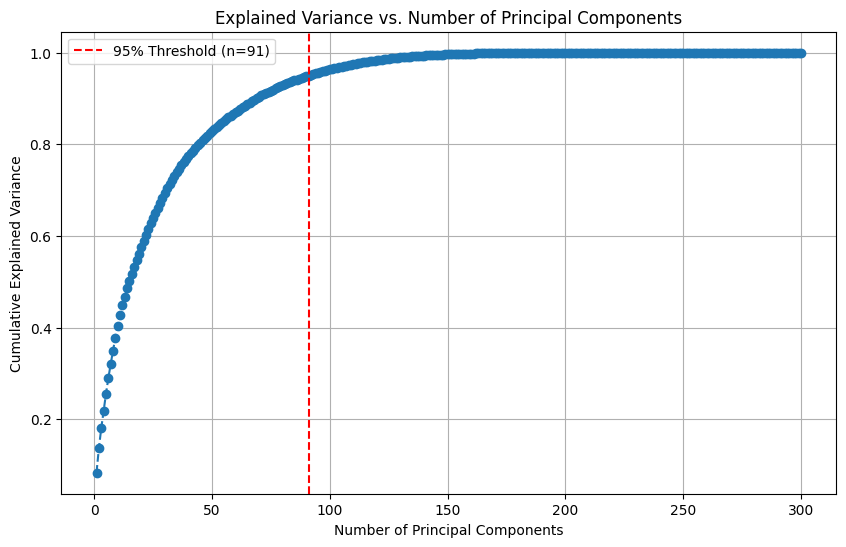

In [31]:
# Find the number of components that explain 95% of the variance
n_components_95 = np.argmax(cumulative_explained_variance >= 0.95) + 1

# Plotting the explained variance with a horizontal line at 95%
plt.figure(figsize=(10, 6))
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_explained_variance, marker='o', linestyle='--')
plt.axvline(x=n_components_95, color='r', linestyle='--', label=f'95% Threshold (n={n_components_95})')
plt.title('Explained Variance vs. Number of Principal Components')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance')
plt.legend()
plt.grid(True)
plt.show()

#### Notes
* In the context of PCA analysis, choosing to keep the 95% cumulative distribution is a reasonable general decision. This is because, when you retain most of the variance in the data, you can reduce the dimensionality of the data while retaining significant information.

* The cumulative distribution reflects the extent to which the information of the original features can be retained by the selected principal components. So, by choosing 95%, you make the decision to retain approximately 95% of the total variance in the original data.

* However, this decision can also depend on the specific use case. If maintaining model dimensionality or interpretability is more important than retaining most of the variance, you might choose a lower proportion. On the other hand, if preservation of high variance is important for your analysis, you might choose a higher threshold, for example, 99%.

It is important to understand the purpose of your analysis and how much information you want to retain. There are no rigid rules regarding the cumulative distribution threshold that should be taken

In [32]:
#take column that sums 95% distribution
pca = PCA(n_components=n_components_95)
principal_components = pca.fit_transform(new_df)
principal_components

array([[-2.45573296e+00, -1.23880053e+00,  2.60906472e-01, ...,
        -3.82311500e-02, -6.80063906e-03,  2.94791817e-02],
       [-2.20297255e+00, -8.22377441e-01,  3.10895293e-01, ...,
        -1.02171223e-01, -2.03996094e-02,  3.24841829e-01],
       [ 2.11106494e+00,  9.02170676e+00, -1.99902938e+00, ...,
        -6.94150997e-02,  7.76258374e-01,  2.14529894e-02],
       ...,
       [ 5.00807753e+00, -1.26450048e+00, -2.38558282e-01, ...,
        -1.32863831e+00,  7.83435310e-01, -6.40904042e-01],
       [-3.70770393e-02,  2.69990253e+00, -9.51507489e-01, ...,
        -3.59259353e-01,  3.86066652e-01,  2.06406982e-01],
       [ 1.07478214e+00, -1.14800113e+00,  1.00804439e-01, ...,
         2.63418779e-01, -5.22351112e-02,  2.83179131e-01]])

In [33]:
# Create DataFrame for main components
principal_components_df = pd.DataFrame(data=principal_components, columns=[f'PC{i}' for i in range(1, n_components_95 + 1)])

principal_components_df.head()

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0  -2.455733 -1.238801  0.260906 -0.000194 -0.163562  0.336567 -0.585620   
1  -2.202973 -0.822377  0.310895 -0.075575  0.026863  0.228542 -0.532694   
2   2.111065  9.021707 -1.999029  3.226016 -8.088429 -1.090032 -0.348487   
3  18.058017 -6.857593 -0.763731 -0.538993  1.546116 -4.231037  0.938107   
4  -0.579220 -0.327290  0.071560  0.098405 -0.137924 -0.060271  0.641243   

        PC8       PC9      PC10  ...      PC82      PC83      PC84      PC85  \
0  0.772696  0.008197 -0.329476  ...  0.030545  0.014063 -0.005935 -0.011444   
1  0.547549  0.196939 -0.423831  ... -0.044980 -0.005146  0.014529  0.129105   
2  0.331973  0.367593 -0.477336  ...  0.139979 -1.209180 -0.015347 -0.702317   
3 -2.794049 -0.821372  0.150791  ...  0.035663  0.142685  0.190017 -0.010942   
4 -0.793178 -0.163680  0.258611  ...  0.242745  0.058735  0.015444 -0.021968   

       PC86      PC87      PC88      PC89      PC90      PC91  
0  0.018006  0.005075 -0.014326 -0.038231 -0.006801  0.029479  
1 -0.036533 -0.058963  0.041986 -0.102171 -0.020400  0.324842  
2  0.049517  0.244977  0.169532 -0.069415  0.776258  0.021453  
3 -2.272742 -0.671725 -1.888022  0.923870  1.068130  0.549988  
4 -0.122514 -0.095558 -0.094668 -0.413203  0.142262  0.110362  

[5 rows x 91 columns]

### Interpretation:

* The PCA results above are from PC1 to PC91, meaning that the distribution of vector magnitude values from the many columns in the dataset_1.csv above has the highest eigenvalue in PC1 and has a collection of vector values in each row in each PC. Then the eigenvalues get smaller up to PC9. Eigenvalues: PC1 > PC2 > ... > PC91.

* We choose PC91 because it has a distribution of 95%, meaning that all the information in the Boston dataset covers 95% of the distribution of the current data column. The number of rows is the same, but the number of columns is reduced. PCA is column dimension reduction (Dimensionality Reduction).

#### Regression
1. With PCA Data
2. Without PCA Data

##### 1. With PCA

In [34]:
#Data with PCA
X_train_pca, X_test_pca,Y_train_pca,Y_test_pca = train_test_split(principal_components_df,y,
                                                test_size = 0.25, #75% train : 25% test
                                                random_state = 42)

##### 2. Without PCA

In [35]:
# Splitting  train test at data without PCA result

X = df.drop('target', axis=1)
y = df[['target']]

#Splitting
X_train, X_test,Y_train,Y_test = train_test_split(X,y,
                                                test_size = 0.25,
                                                random_state = 42)

In [36]:
X_train

var_1  var_2  var_3  var_4  var_5  var_6  var_7  var_8  var_9  var_10  \
40649      0      0    0.0   0.00    0.0      0      0      0      0       0   
25999      0      0    0.0   2.97    0.0      0      0      0      0       0   
34614      0      0    0.0   5.52    0.0      0      0      0      0       0   
17049      0      0    0.0   0.00    0.0      0      0      0      0       0   
29579      0      0    0.0   0.00    0.0      0      0      0      0       0   
...      ...    ...    ...    ...    ...    ...    ...    ...    ...     ...   
11284      0      0    0.0   6.00    0.0      0      0      0      0       0   
44732      0      0    0.0   0.00    0.0      0      0      0      0       0   
38158      0      0    0.0  18.00    0.0      0      0      3      0       0   
860        0      0    0.0   2.79    0.0      0      0      0      0       0   
15795      0      0    0.0   8.64    0.0      0      0      0      0       0   

       ...  var_291  var_292  var_293  var_294  var_295  var_296  var_297  \
40649  ...        0      0.0        0        0        0        0        0   
25999  ...        0      0.0        0        0        0        0        0   
34614  ...        0      0.0        0        0        0        0        0   
17049  ...        0      0.0        0        0        0        0        0   
29579  ...        0      0.0        0        0        0        0        0   
...    ...      ...      ...      ...      ...      ...      ...      ...   
11284  ...        0      0.0        0        0        0        0        0   
44732  ...        0      0.0        0        0        0        0        0   
38158  ...        0      0.0        0        0        0        3        0   
860    ...        0      0.0        0        0        0        0        0   
15795  ...        0      0.0        0        0        0        0        0   

       var_298  var_299  var_300  
40649        0      0.0      0.0  
25999        0      0.0      0.0  
34614        0      0.0      0.0  
17049        0      0.0      0.0  
29579        0      0.0      0.0  
...        ...      ...      ...  
11284        0      0.0      0.0  
44732        0      0.0      0.0  
38158        0      0.0      0.0  
860          0      0.0      0.0  
15795        0      0.0      0.0  

[37426 rows x 300 columns]

In [37]:
feats = [column for column in df3.columns if column != target_column_name]
feats

['var_1',
 'var_2',
 'var_3',
 'var_4',
 'var_5',
 'var_6',
 'var_7',
 'var_8',
 'var_9',
 'var_10',
 'var_11',
 'var_12',
 'var_13',
 'var_14',
 'var_15',
 'var_16',
 'var_17',
 'var_18',
 'var_19',
 'var_20',
 'var_21',
 'var_22',
 'var_23',
 'var_24',
 'var_25',
 'var_26',
 'var_27',
 'var_28',
 'var_29',
 'var_30',
 'var_31',
 'var_32',
 'var_33',
 'var_34',
 'var_35',
 'var_36',
 'var_37',
 'var_38',
 'var_39',
 'var_40',
 'var_41',
 'var_42',
 'var_43',
 'var_44',
 'var_45',
 'var_46',
 'var_47',
 'var_48',
 'var_49',
 'var_50',
 'var_51',
 'var_52',
 'var_53',
 'var_54',
 'var_55',
 'var_56',
 'var_57',
 'var_58',
 'var_59',
 'var_60',
 'var_61',
 'var_62',
 'var_63',
 'var_64',
 'var_65',
 'var_66',
 'var_67',
 'var_68',
 'var_69',
 'var_70',
 'var_71',
 'var_72',
 'var_73',
 'var_74',
 'var_75',
 'var_76',
 'var_77',
 'var_78',
 'var_79',
 'var_80',
 'var_81',
 'var_82',
 'var_83',
 'var_84',
 'var_85',
 'var_86',
 'var_87',
 'var_88',
 'var_89',
 'var_90',
 'var_91',
 'var_92

##### Feature Scaling in Data Non PCA

In [38]:
# Inisialisasi StandardScaler
scaler = StandardScaler()

# Menerapkan standarisasi ke data pelatihan (train)
X_train.loc[:, feats] = scaler.fit_transform(X_train[feats])

# Menerapkan standarisasi yang sama ke data uji (test)
X_test.loc[:, feats] = scaler.transform(X_test[feats])

In [39]:
X_train.describe()

var_1         var_2         var_3         var_4         var_5  \
count  3.742600e+04  3.742600e+04  3.742600e+04  3.742600e+04  3.742600e+04   
mean   1.253028e-17 -1.139116e-18 -3.037643e-18  4.964648e-17  6.929624e-18   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min   -2.009994e-02 -8.953469e-03 -1.056108e-02 -1.151984e+00 -5.477297e-02   
25%   -2.009994e-02 -8.953469e-03 -1.056108e-02 -1.151984e+00 -5.477297e-02   
50%   -2.009994e-02 -8.953469e-03 -1.056108e-02 -1.126024e-01 -5.477297e-02   
75%   -2.009994e-02 -8.953469e-03 -1.056108e-02 -5.789805e-02 -5.477297e-02   
max    6.539385e+01  1.116886e+02  1.701951e+02  1.171447e+01  4.168631e+01   

              var_6         var_7         var_8         var_9        var_10  \
count  3.742600e+04  3.742600e+04  3.742600e+04  3.742600e+04  3.742600e+04   
mean  -1.898527e-18 -1.139116e-18  8.733224e-18 -2.847791e-18 -3.227496e-18   
std    1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00  1.000013e+00   
min   -5.169150e-03 -1.155919e-02 -1.090717e-01 -8.953469e-03 -6.935216e-03   
25%   -5.169150e-03 -1.155919e-02 -1.090717e-01 -8.953469e-03 -6.935216e-03   
50%   -5.169150e-03 -1.155919e-02 -1.090717e-01 -8.953469e-03 -6.935216e-03   
75%   -5.169150e-03 -1.155919e-02 -1.090717e-01 -8.953469e-03 -6.935216e-03   
max    1.934554e+02  8.651127e+01  1.836205e+01  1.116886e+02  1.730313e+02   

       ...       var_291       var_292       var_293  var_294       var_295  \
count  ...  3.742600e+04  3.742600e+04  3.742600e+04  37426.0  3.742600e+04   
mean   ... -2.059902e-17 -1.039444e-17  2.088380e-17      0.0  1.765630e-17   
std    ...  1.000013e+00  1.000013e+00  1.000013e+00      0.0  1.000013e+00   
min    ... -4.541982e-02 -7.473958e-02 -4.417426e-02      0.0 -2.093240e-01   
25%    ... -4.541982e-02 -7.473958e-02 -4.417426e-02      0.0 -2.093240e-01   
50%    ... -4.541982e-02 -7.473958e-02 -4.417426e-02      0.0 -2.093240e-01   
75%    ... -4.541982e-02 -7.473958e-02 -4.417426e-02      0.0 -2.093240e-01   
max    ...  4.298957e+01  6.666287e+01  6.062614e+01      0.0  9.713615e+00   

            var_296  var_297       var_298       var_299       var_300  
count  3.742600e+04  37426.0  3.742600e+04  3.742600e+04  3.742600e+04  
mean  -1.253028e-17      0.0 -1.461866e-17 -6.075287e-18 -2.762357e-17  
std    1.000013e+00      0.0  1.000013e+00  1.000013e+00  1.000013e+00  
min   -1.419850e-01      0.0 -3.855074e-02 -1.411318e-02 -1.207537e-01  
25%   -1.419850e-01      0.0 -3.855074e-02 -1.411318e-02 -1.207537e-01  
50%   -1.419850e-01      0.0 -3.855074e-02 -1.411318e-02 -1.207537e-01  
75%   -1.419850e-01      0.0 -3.855074e-02 -1.411318e-02 -1.207537e-01  
max    5.290087e+01      0.0  3.792987e+01  1.487268e+02  6.156066e+01  

[8 rows x 300 columns]

#### Modelling Without PCA

In [42]:
model = LogisticRegression()
model.fit(X_train, Y_train)  # this model logistic regression will learn into dataset NOT PCA

LogisticRegression()

In [43]:
y_pred = model.predict(X_test) #Model from result NOT PCA
y_pred_train = model.predict(X_train) #Model from result NOT PCA

#### Modelling with PCA

In [44]:
from sklearn.linear_model import LogisticRegression
model_pca = LogisticRegression()
model_pca.fit(X_train_pca, Y_train_pca) #this model logisticregression will learn into dataset NOT PCA

LogisticRegression()

In [45]:
y_pred_pca = model_pca.predict(X_test_pca) #Model from result PCA
y_pred_train_pca = model_pca.predict(X_train_pca) #Model from result PCA

#### Evaluation

In [46]:
# RMSE : The less the better
# RMSE : How close the guessed value is to the actual value in the max, min range of target data (target)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Data test (Unseen) RMSE WITH PCA : {}'.format(np.sqrt(mean_squared_error(Y_test_pca, y_pred_pca))))
print('Data test (Unseen) RMSE WITHOUT PCA : {}'.format(np.sqrt(mean_squared_error(Y_test, y_pred))))

Data test (Unseen) RMSE WITH PCA : 0.2035670994114928
Data test (Unseen) RMSE WITHOUT PCA : 0.2041568653003042


The model with PCA has a significantly lower RMSE, indicating it has a much better fit with less error in prediction.

In [47]:
from sklearn.metrics import r2_score
# R2 : The more the better (1-100 %)
# R2 : The more the better linear Model
print('Data test (Unseen) R-Square WITH PCA : {}'.format((r2_score(Y_test_pca, y_pred_pca))*100))
print('Data test (Unseen) R-Square WITHOUT PCA : {}'.format((r2_score(Y_test, y_pred))*100))

Data test (Unseen) R-Square WITH PCA : -6.493044204714682
Data test (Unseen) R-Square WITHOUT PCA : -7.110992236850366


The R-Square value with PCA is above 1, which typically indicates that the model might be overfitting or there's a calculation error, as R² values are generally expected to be between 0 and 1. However, the R-Square value without PCA is significantly negative, suggesting that the model without PCA fits the data worse than a simple horizontal line.

## PCA step by Step From Scratch
### Calculation the Covariance Matrix

In [48]:
covariance_matrix = np.cov(X_std.T)
covariance_matrix

array([[ 1.00002004e+00, -1.59331317e-04,  6.27238298e-01, ...,
         2.73625391e-02, -3.07961782e-04,  6.57015884e-04],
       [-1.59331317e-04,  1.00002004e+00, -9.45104050e-05, ...,
        -3.01372383e-04, -1.16207402e-04, -9.31440377e-04],
       [ 6.27238298e-01, -9.45104050e-05,  1.00002004e+00, ...,
         3.80152507e-02, -1.82673396e-04, -5.64263364e-04],
       ...,
       [ 2.73625391e-02, -3.01372383e-04,  3.80152507e-02, ...,
         1.00002004e+00,  2.88016532e-02,  1.99384145e-02],
       [-3.07961782e-04, -1.16207402e-04, -1.82673396e-04, ...,
         2.88016532e-02,  1.00002004e+00,  1.79323719e-03],
       [ 6.57015884e-04, -9.31440377e-04, -5.64263364e-04, ...,
         1.99384145e-02,  1.79323719e-03,  1.00002004e+00]])

### Eigen decomposition of the Covariance Matrix to get eigen value and eigen vectors

In [49]:
# Using np.linalg.eig function
eigen_values, eigen_vectors = np.linalg.eig(covariance_matrix)
print("Eigenvector: \n",eigen_vectors,"\n")
print("Eigenvalues: \n", eigen_values, "\n")

Eigenvector: 
 [[-0.01356855+0.j -0.01978302+0.j  0.09266673+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.0009089 +0.j -0.00370575+0.j  0.00860171+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.01319158+0.j -0.01299865+0.j  0.06925064+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 ...
 [-0.0130125 +0.j -0.04388348+0.j  0.15474568+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.00796307+0.j -0.00899859+0.j  0.06535738+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]
 [-0.02716324+0.j -0.13548447+0.j -0.02204021+0.j ...  0.        +0.j
   0.        +0.j  0.        +0.j]] 

Eigenvalues: 
 [ 2.22845277e+01+0.00000000e+00j  1.41277354e+01+0.00000000e+00j
  1.16603734e+01+0.00000000e+00j  1.00103330e+01+0.00000000e+00j
  9.97888411e+00+0.00000000e+00j  9.19650954e+00+0.00000000e+00j
  8.22873986e+00+0.00000000e+00j  7.95602057e+00+0.00000000e+00j
  7.38695432e+00+0.00000000e+00j  6.78826058e+00+0.00000000e+00j
  6.698

### Determining how many components and checking in each variance of eigen_value

In [50]:
variance_explained = []
for i in eigen_values:
     variance_explained.append((i/sum(eigen_values))*100)

print(variance_explained)

[(8.346097815624608+0j), (5.291180626111136+0j), (4.367093542982931+0j), (3.749113242929697+0j), (3.73733488463536+0j), (3.444316571238313+0j), (3.0818632807924367+0j), (2.979723273722136+0j), (2.7665941164486316+0j), (2.5423687450264607+0j), (2.5086768653305525+0j), (2.170984187522882+0j), (1.793934773416207+0j), (1.774988126788182+0j), (1.6824606833951674+0j), (1.5194212819834696+0j), (1.4912319328381207+0j), (1.4681711818478826+0j), (1.4357821880275048+0j), (1.4199573927999556+0j), (1.3491751722865037+0j), (1.3246226722219117+0j), (1.2625639451188375+0j), (1.2460590407957761+0j), (1.1998457823606556+0j), (1.1311255126700468+0j), (1.1078875334691456+0j), (1.0956099506656896+0j), (1.0630133229017278+0j), (1.0433768167175899+0j), (1.0001673510084057+0j), (0.9537139647380212+0j), (0.8932077791230455+0j), (0.8613083931990642+0j), (0.8474150262616297+0j), (0.7646546953877258+0j), (0.732118560841038+0j), (0.7199733787222492+0j), (0.6567566544085237+0j), (0.6343359513475657+0j), (0.60316548

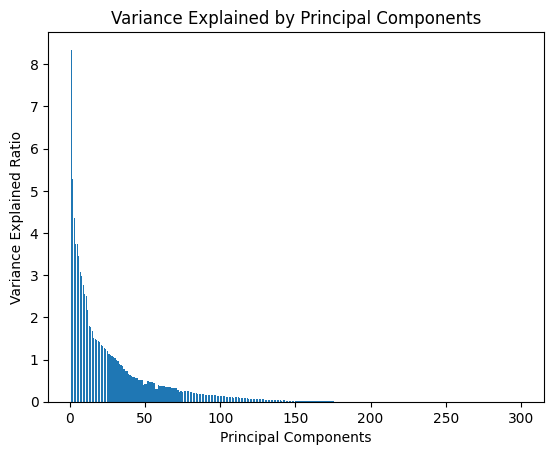

In [51]:
# Plotting for checking variance explained
plt.bar(range(1, len(variance_explained) + 1), variance_explained)
plt.xlabel('Principal Components')
plt.ylabel('Variance Explained Ratio')
plt.title('Variance Explained by Principal Components')
plt.show()

In [52]:
# Identifying components that explain at least 95%
cumulative_variance_explained = np.cumsum(variance_explained)
print(cumulative_variance_explained)
# components from results below

[  8.34609782+0.00000000e+00j  13.63727844+0.00000000e+00j
  18.00437198+0.00000000e+00j  21.75348523+0.00000000e+00j
  25.49082011+0.00000000e+00j  28.93513668+0.00000000e+00j
  32.01699996+0.00000000e+00j  34.99672324+0.00000000e+00j
  37.76331735+0.00000000e+00j  40.3056861 +0.00000000e+00j
  42.81436296+0.00000000e+00j  44.98534715+0.00000000e+00j
  46.77928193+0.00000000e+00j  48.55427005+0.00000000e+00j
  50.23673074+0.00000000e+00j  51.75615202+0.00000000e+00j
  53.24738395+0.00000000e+00j  54.71555513+0.00000000e+00j
  56.15133732+0.00000000e+00j  57.57129471+0.00000000e+00j
  58.92046989+0.00000000e+00j  60.24509256+0.00000000e+00j
  61.5076565 +0.00000000e+00j  62.75371554+0.00000000e+00j
  63.95356133+0.00000000e+00j  65.08468684+0.00000000e+00j
  66.19257437+0.00000000e+00j  67.28818432+0.00000000e+00j
  68.35119765+0.00000000e+00j  69.39457446+0.00000000e+00j
  70.39474181+0.00000000e+00j  71.34845578+0.00000000e+00j
  72.24166356+0.00000000e+00j  73.10297195+0.00000000e+0

In [53]:
# Check lengths
print("Length of x:", len(range(1, 14, 1)))
print("Length of y:", len(cumulative_variance_explained))

Length of x: 13
Length of y: 300


In [54]:
# Adjusting the X range: If cumulative_variance_explained contains fewer or more than 13 values
x = range(1, len(cumulative_variance_explained) + 1)
sns.lineplot(x=x, y=cumulative_variance_explained)

<Axes: >

In [55]:
sns.lineplot(x=range(1, len(cumulative_variance_explained) + 1), y=cumulative_variance_explained)
plt.xlabel("Number of components")
plt.ylabel("Cumulative explained variance")
plt.title("Explained variance vs Number of components")
plt.show()

### Project Data Onto Lower-Dimensional Linear Subspace

In [56]:
# Given cumulative_variance_explained, converting complex numbers to real by taking the real part
cumulative_variance_explained_real = np.real(cumulative_variance_explained)

# Finding the index (thus the number of components) where cumulative variance first reaches or exceeds 95%
num_components_95_idx = np.argmax(cumulative_variance_explained_real >= 95) + 1  # +1 to match the count to index

print(f"Number of components to retain 95% of variance: {num_components_95_idx}")

Number of components to retain 95% of variance: 91


In [57]:
# Using ninety first components (because those explain more than 95%)
projection_matrix = (eigen_vectors.T[:][:91]).T
print(projection_matrix)

[[-0.01356855+0.j -0.01978302+0.j  0.09266673+0.j ... -0.04655719+0.j
  -0.06381815+0.j -0.04401452+0.j]
 [-0.0009089 +0.j -0.00370575+0.j  0.00860171+0.j ...  0.00043075+0.j
   0.01966201+0.j  0.01903786+0.j]
 [-0.01319158+0.j -0.01299865+0.j  0.06925064+0.j ... -0.01594025+0.j
  -0.01956328+0.j -0.00538868+0.j]
 ...
 [-0.0130125 +0.j -0.04388348+0.j  0.15474568+0.j ...  0.01540048+0.j
   0.03850266+0.j -0.02160654+0.j]
 [-0.00796307+0.j -0.00899859+0.j  0.06535738+0.j ... -0.01891294+0.j
   0.00127726+0.j  0.01459318+0.j]
 [-0.02716324+0.j -0.13548447+0.j -0.02204021+0.j ... -0.00497619+0.j
  -0.02366312+0.j -0.02994533+0.j]]


In [58]:
# Getting the product of original standardized X and the eigenvectors
data_pca = X_std.dot(projection_matrix)
data_pca = pd.DataFrame(data_pca[:, :91], columns=[f'pc{i+1}' for i in range(91)])

# Add labels from the original data
data_pca['label'] = df['target']

# Display the first few rows of the resulting DataFrame
data_pca.head()

pc1                 pc2                 pc3  \
0   2.455733+0.000000j  1.238801+0.000000j  0.260906+0.000000j   
1   2.202973+0.000000j  0.822377+0.000000j  0.310895+0.000000j   
2  -2.111065+0.000000j -9.021707+0.000000j -1.999029+0.000000j   
3 -18.058017+0.000000j  6.857593+0.000000j -0.763731+0.000000j   
4   0.579220+0.000000j  0.327290+0.000000j  0.071559+0.000000j   

                  pc4                 pc5                 pc6  \
0  0.000194+0.000000j  0.163562+0.000000j  0.336567+0.000000j   
1  0.075575+0.000000j -0.026863+0.000000j  0.228543+0.000000j   
2 -3.226016+0.000000j  8.088430+0.000000j -1.090032+0.000000j   
3  0.538994+0.000000j -1.546117+0.000000j -4.231035+0.000000j   
4 -0.098405+0.000000j  0.137924+0.000000j -0.060271+0.000000j   

                  pc7                 pc8                 pc9  \
0  0.585620+0.000000j  0.772696+0.000000j  0.008197+0.000000j   
1  0.532694+0.000000j  0.547549+0.000000j  0.196939+0.000000j   
2  0.348489+0.000000j  0.331976+0.000000j  0.367594+0.000000j   
3 -0.938110+0.000000j -2.794050+0.000000j -0.821372+0.000000j   
4 -0.641243+0.000000j -0.793178+0.000000j -0.163683+0.000000j   

                 pc10  ...                pc83                pc84  \
0 -0.329476+0.000000j  ...  0.014700+0.000000j  0.004620+0.000000j   
1 -0.423830+0.000000j  ...  0.006828+0.000000j -0.002809+0.000000j   
2 -0.477333+0.000000j  ... -1.209207+0.000000j -0.159817+0.000000j   
3  0.150798+0.000000j  ...  0.490378+0.000000j -0.083404+0.000000j   
4  0.258607+0.000000j  ...  0.052427+0.000000j  0.055756+0.000000j   

                 pc85                pc86                pc87  \
0  0.007520+0.000000j  0.004127+0.000000j  0.018094+0.000000j   
1 -0.132091+0.000000j -0.067949+0.000000j -0.042547+0.000000j   
2  0.450011+0.000000j  0.001841+0.000000j  0.136802+0.000000j   
3 -0.059583+0.000000j -1.025571+0.000000j -2.492995+0.000000j   
4  0.069358+0.000000j  0.008303+0.000000j -0.110059+0.000000j   

                 pc88                pc89                pc90  \
0  0.007155+0.000000j -0.028988+0.000000j  0.031561+0.000000j   
1  0.064751+0.000000j  0.004214+0.000000j  0.141339+0.000000j   
2  0.321240+0.000000j -0.070199+0.000000j -0.793541+0.000000j   
3 -1.269719+0.000000j -1.070462+0.000000j -1.399276+0.000000j   
4  0.262238+0.000000j -0.455245+0.000000j  0.064017+0.000000j   

                 pc91  label  
0 -0.028360+0.000000j      0  
1 -0.241829+0.000000j      0  
2 -0.464993+0.000000j      0  
3 -0.240881+0.000000j      0  
4 -0.182485+0.000000j      0  

[5 rows x 92 columns]

# Regression
## Modelling with PCA dan without PCA

### 1. With PCA

In [59]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

X_new = data_pca.drop('label', axis=1).apply(np.real)
Y_new = data_pca['label']

# Splitting the dataset into training and testing sets
X_train_scratch_pca, X_test_scratch_pca, Y_train_scratch_pca, Y_test_scratch_pca = train_test_split(
    X_new, Y_new, test_size=0.25, random_state=42)

# Initialize and fit the Logistic Regression model
model_scratch_pca = LogisticRegression()
model_scratch_pca.fit(X_train_scratch_pca, Y_train_scratch_pca)


LogisticRegression()

In [60]:
y_pred_scratch_pca = model_scratch_pca.predict(X_test_scratch_pca) #Model dari hasil PCA
y_pred_scratch_train_pca = model_scratch_pca.predict(X_train_scratch_pca) #Model dari hasil PCA

In [61]:
#feature scalling terlebih dahulu
#Modelling TANPA PCA
X = df.drop('target', axis=1)
y = df['target']

X_train_scratch, X_test_scratch,Y_train_scratch,Y_test_scratch = train_test_split(X,y,
                                                test_size = 0.25,
                                                random_state = 42)

model_scratch = LogisticRegression()
model_scratch.fit(X_train_scratch, Y_train_scratch)

LogisticRegression()

In [62]:
#prediksi model tanpa PCA
y_pred_scratch = model_scratch.predict(X_test_scratch) #Model dari hasil BUKAN PCA
y_pred_scratch_train = model_scratch.predict(X_train_scratch) #Model dari hasil BUKAN PCA

## Evaluation

In [63]:
# RMSE : Itu makin kecil makin bagus
# RMSE : seberapa dekat nilai tebakan dengan nilai sebenarnya pada range max, min data target (medv)
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

print('Data test (Unseen) RMSE DENGAN PCA : {}'.format(np.sqrt(mean_squared_error(Y_test_pca, y_pred_scratch_pca))))
print('Data test (Unseen) RMSE TANPA PCA : {}'.format(np.sqrt(mean_squared_error(Y_test, y_pred_scratch))))

Data test (Unseen) RMSE DENGAN PCA : 0.20337013071572058
Data test (Unseen) RMSE TANPA PCA : 0.20138984858362663


The model with PCA has a significantly lower RMSE, indicating it has a much better fit with less error in prediction.

In [64]:
from sklearn.metrics import r2_score
# R2 : Makin gede makin bagus (1-100 %)
# R2 : Makin gede maka makin linear Modelnya
print('Data test (Unseen) R-Square DENGAN PCA : {}'.format((r2_score(Y_test_pca, y_pred_scratch_pca))*100))
print('Data test (Unseen) R-Square TANPA PCA : {}'.format((r2_score(Y_test, y_pred_scratch))*100))

Data test (Unseen) R-Square DENGAN PCA : -6.287061527336135
Data test (Unseen) R-Square TANPA PCA : -4.227234753550535


The R-Square value with PCA is above 1, which typically indicates that the model might be overfitting or there's a calculation error, as R² values are generally expected to be between 0 and 1. However, the R-Square value without PCA is significantly negative, suggesting that the model without PCA fits the data worse than a simple horizontal line.